In [57]:
pip install "black[jupyter]"

Note: you may need to restart the kernel to use updated packages.


In [5]:
!black AllFIgures.ipynb

<unknown>:621: SyntaxWarning: invalid escape sequence '\s'
<unknown>:622: SyntaxWarning: invalid escape sequence '\s'
<unknown>:623: SyntaxWarning: invalid escape sequence '\s'
<unknown>:624: SyntaxWarning: invalid escape sequence '\s'
<unknown>:625: SyntaxWarning: invalid escape sequence '\s'
<unknown>:119: SyntaxWarning: invalid escape sequence '\s'
<unknown>:29: SyntaxWarning: invalid escape sequence '\s'
<unknown>:288: SyntaxWarning: invalid escape sequence '\s'
<unknown>:289: SyntaxWarning: invalid escape sequence '\o'
<unknown>:20: SyntaxWarning: invalid escape sequence '\s'
<unknown>:133: SyntaxWarning: invalid escape sequence '\s'
<unknown>:171: SyntaxWarning: invalid escape sequence '\i'
<unknown>:110: SyntaxWarning: invalid escape sequence '\i'
<unknown>:392: SyntaxWarning: invalid escape sequence '\s'
<unknown>:572: SyntaxWarning: invalid escape sequence '\A'
<unknown>:359: SyntaxWarning: invalid escape sequence '\s'
<unknown>:857: SyntaxWarning: invalid escape sequence '\s'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done
Done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done
Done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done
Done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done
Done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done
Done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done
Done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done
Done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done
Done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done
Done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done
Done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done
Done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done


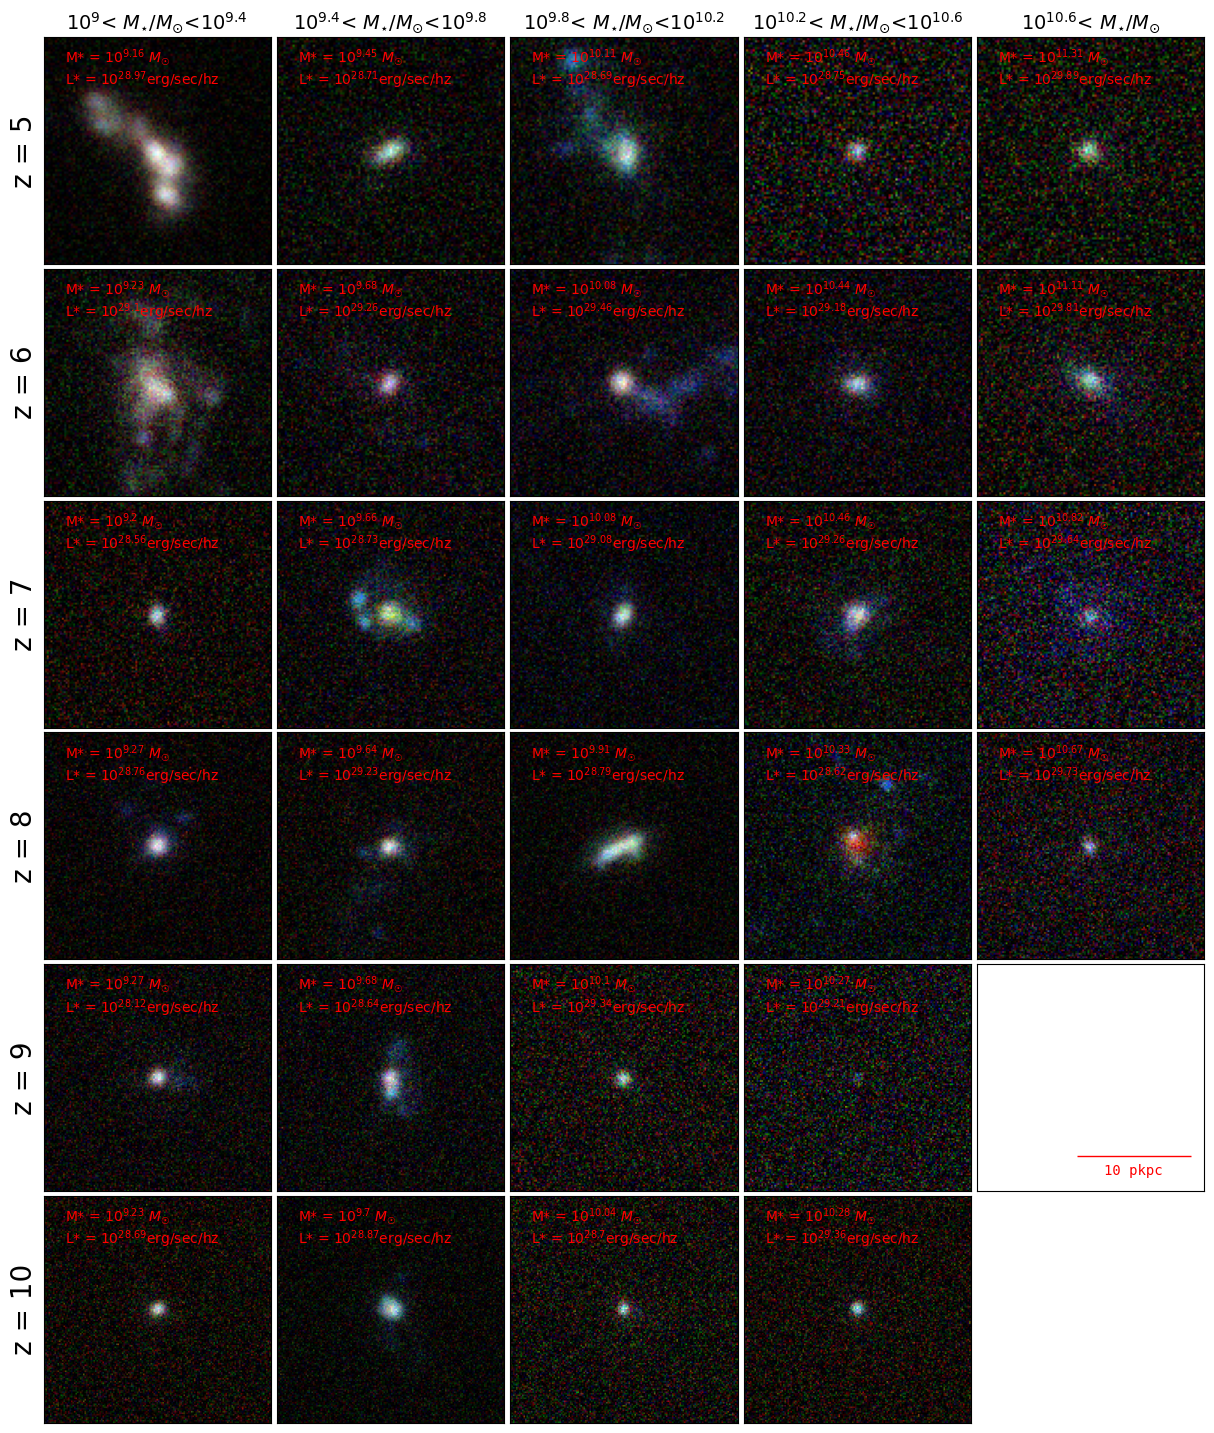

In [3]:
from astropy.io import fits
import numpy
import cv2
import numpy as np
import matplotlib.pyplot as plt
from astropy.convolution import convolve, Gaussian2DKernel
from PIL import Image
from PIL import Image, ImageOps
from astropy.cosmology import Planck15 as cosmo
import math
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm


def imagecreation(
    filename,
    wavelengths,
    redshift,
    filterR,
    filterG,
    filterB,
    psfR,
    psfG,
    psfB,
    aperturesize,
):
    # filename is the full location of fits file
    # wavelengths is a numpy array of wavelengths corresponding to each slide in fits cube
    # filterR/G/B are the names of NIRCAM filters
    # psfR/G/B are the psf fits file locations
    # aperture size is the total length of 1 axis in image in pkpc
    wavs = wavelengths

    psfreshapesize = (
        60  # psfs are huge, takes these amounts of pixles around the point source
    )
    psfrs = psfreshapesize / 2

    filtername = [
        "F070W",
        "F090W",
        "F115W",
        "F140M",
        "F150W",
        "F162M",
        "F164N",
        "F150W2",
        "F182M",
        "F187N",
        "F200W",
        "F210M",
        "F212N",
    ]
    wavmin = [
        0.624,
        0.795,
        1.013,
        1.331,
        1.331,
        1.542,
        1.635,
        1.007,
        1.722,
        1.863,
        1.755,
        1.992,
        2.109,
    ]
    wavmax = [
        0.781,
        1.005,
        1.282,
        1.479,
        1.668,
        1.713,
        1.653,
        2.38,
        1.968,
        1.885,
        2.227,
        2.201,
        2.134,
    ]
    efferes = [
        0.237,
        0.318,
        0.333,
        0.434,
        0.476,
        0.469,
        0.385,
        0.489,
        0.505,
        0.434,
        0.525,
        0.522,
        0.42,
    ]

    rf = filtername.index(filterR)
    bf = filtername.index(filterB)
    gf = filtername.index(filterG)

    bmin = wavmin[bf]
    bmax = wavmax[bf]
    rmin = wavmin[rf]
    rmax = wavmax[rf]
    gmin = wavmin[gf]
    gmax = wavmax[gf]
    ger = efferes[gf]
    rer = efferes[rf]
    ber = efferes[bf]

    image = fits.getdata(filename, ext=0)
    psfb = fits.getdata(psfB, ext=0)
    psfg = fits.getdata(psfG, ext=0)
    psfr = fits.getdata(psfR, ext=0)

    box = (
        (psfb.shape[0] / 2) - psfrs,
        (psfb.shape[0] / 2) - psfrs,
        (psfb.shape[0] / 2) + psfrs,
        (psfb.shape[0] / 2) + psfrs,
    )

    newpsf = Image.fromarray(psfb)
    newpsf1 = newpsf.crop(box)
    psfb = np.array(newpsf1)

    newpsf = Image.fromarray(psfr)
    newpsf1 = newpsf.crop(box)
    psfr = np.array(newpsf1)

    newpsf = Image.fromarray(psfg)
    newpsf1 = newpsf.crop(box)
    psfg = np.array(newpsf1)

    if (psfb.shape[0] % 2) == 0:
        newpsf = Image.fromarray(psfb)
        psfb = np.array(newpsf.resize((psfb.shape[0] - 1, psfb.shape[1] - 1)))

    if (psfr.shape[0] % 2) == 0:
        newpsf = Image.fromarray(psfr)
        psfr = np.array(newpsf.resize((psfr.shape[0] - 1, psfr.shape[1] - 1)))

    if (psfg.shape[0] % 2) == 0:
        newpsf = Image.fromarray(psfg)
        psfg = np.array(newpsf.resize((psfg.shape[0] - 1, psfg.shape[1] - 1)))

    # print(psfr.shape,psfb.shape,psfg.shape)

    snp = 20.0
    sky_sigma = 0.333 / snp

    zint = redshift
    distperpx = cosmo.angular_diameter_distance(zint).value * 1.502922e-7 * 1e3
    size1 = math.ceil(aperturesize / distperpx)

    for wavi, x in enumerate(wavs):
        if x > (bmin / (zint + 1)):
            bmi = wavi
            break
    for wavi, x in enumerate(wavs):
        if x > (bmax / (zint + 1)):
            bma = wavi
            break
    for wavi, x in enumerate(wavs):
        if x > (rmin / (zint + 1)):
            rmi = wavi
            break
    for wavi, x in enumerate(wavs):
        if x > (rmax / (zint + 1)):
            rma = wavi
            break
    for wavi, x in enumerate(wavs):
        if x > (gmin / (zint + 1)):
            gmi = wavi
            break
    for wavi, x in enumerate(wavs):
        if x > (gmax / (zint + 1)):
            gma = wavi
            break
    # print(gmi,gma,bmi,bma,rmi,rma)

    green = numpy.zeros((400, 400))
    i = gmi
    green1 = np.zeros((size1, size1))
    while i < gma:
        green = green + (ger * image[i])
        green *= 1.0 / green.max()
        imarr = Image.fromarray(green)
        green1 = np.array(imarr.resize((size1, size1)))
        green1 = convolve(green1, psfg)
        green1 += sky_sigma * np.random.standard_normal(size=(size1, size1))
        green1 *= 1.0 / green1.max()
        i += 1
    red = numpy.zeros((400, 400))
    i = rmi
    red1 = np.zeros((size1, size1))
    while i < rma:
        red = red + (rer * image[i])
        red *= 1.0 / red.max()

        imarr = Image.fromarray(red)
        red1 = np.array(imarr.resize((size1, size1)))
        red1 = convolve(red1, psfr)
        red1 += sky_sigma * np.random.standard_normal(size=(size1, size1))
        red1 *= 1.0 / red1.max()
        i += 1
    blue = numpy.zeros((400, 400))
    i = bmi
    blue1 = np.zeros((size1, size1))
    while i < bma:
        blue = blue + (ber * image[i])
        blue *= 1.0 / blue.max()

        imarr = Image.fromarray(blue)
        blue1 = np.array(imarr.resize((size1, size1)))

        blue1 = convolve(blue1, psfb)
        blue1 += sky_sigma * np.random.standard_normal(size=(size1, size1))
        blue1 *= 1.0 / blue1.max()
        i += 1

    image_merge = cv2.merge([red1, green1, blue1])
    return image_merge


def frame_image(img, frame_width):
    b = frame_width  # border size in pixel
    ny, nx = img.shape[0], img.shape[1]  # resolution / number of pixels in x and y
    framed_img = Image.new(
        "RGB", (b + ny + b, b + nx + b), (255, 255, 255)
    )  # RGB color tuple
    framed_img = np.array(framed_img.getdata()).reshape(
        framed_img.size[0], framed_img.size[1], 3
    )
    framed_img[b:-b, b:-b] = img
    return framed_img


fig, ax = plt.subplots(6, 5, figsize=(15, 18))
fig.subplots_adjust(hspace=0.02, wspace=0.02)
z5 = [
    "z_5/flares_36/gal_014",
    "z_5/flares_13/gal_166",
    "z_5/flares_10/gal_087",
    "z_5/flares_05/gal_038",
    "z_5/flares_08/gal_026",
]
z5m = ["9.157363069", "9.445535707", "10.1081515", "10.462613", "11.30958397"]
z5m = [str(round(float(x), 2)) for x in z5m]
z5l = ["9.44E+28", "5.12E+28", "4.92E+28", "5.63E+28", "7.71E+29"]
z5l = [str(round(numpy.log10(float(x)), 2)) for x in z5l]
for i, x in enumerate(z5):
    # imagename="/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/"+x+"/flares_cube_UV_total.fits"
    # wavelengths=numpy.loadtxt("/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/z_5/flares_00/gal_000/flares_cube_UV_sed.dat",usecols=0)
    z = 5
    fr = "F200W"
    fg = "F150W"
    fb = "F115W"

    psfb = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf115.fits"
    psfg = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf150.fits"
    psfr = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf200.fits"

    asize = 60
    # arr=imagecreation(imagename,wavelengths,z,fr,fg,fb,psfr,psfg,psfb,asize)
    # print(arr.shape[2])
    # numpy.savetxt(x.replace("/","_")+".txt",arr.reshape(arr.shape[0], -1))

    loaded_arr = numpy.loadtxt("newimg/" + x.replace("/", "_") + ".txt")
    load_original_arr = loaded_arr.reshape(
        loaded_arr.shape[0], loaded_arr.shape[1] // 3, 3
    )
    ax[0, i].imshow(load_original_arr, origin="lower")

    zint = z
    distperpx = cosmo.angular_diameter_distance(zint).value * 1.502922e-7 * 1e3
    size1 = math.ceil(asize / distperpx)
    size1z5 = size1
    # ax[0,i].text((size1/2)-(size1/4)+10, (size1/2)+(size1/4)-10, "M* = "+z5m[i], color='white')
    # ax[0,i].text((size1/2)-(size1/4)+10, (size1/2)+(size1/4)-20, "L* = "+z5l[i], color='white')
    ax[0, i].text(
        110,
        190,
        "M* = " + "$10^{" + z5m[i] + "}$" + " $M_\u2609$",
        color="red",
        fontsize=10,
    )
    ax[0, i].text(
        110,
        180,
        "L* = " + "$10^{" + z5l[i] + "}$" + "erg/sec/hz",
        color="red",
        fontsize=10,
    )
    ax[0, i].set_zorder(1)
    for b in ax[0]:
        # fontprops = fm.FontProperties(size=10, family='monospace')
        # bar = AnchoredSizeBar(b.transData, (size1/20), '', 4, pad=0.5,sep=5, borderpad=0.5, frameon=False,size_vertical=0.5, color='white',fontproperties=fontprops)
        b.set_xlim((size1 / 2) - (size1 / 6), (size1 / 2) + (size1 / 6))
        b.set_ylim((size1 / 2) - (size1 / 6), (size1 / 2) + (size1 / 6))
    print("Done")
z6 = [
    "z_6/flares_08/gal_054",
    "z_6/flares_16/gal_007",
    "z_6/flares_07/gal_001",
    "z_6/flares_01/gal_022",
    "z_6/flares_00/gal_000",
]
z6m = ["9.230597067", "9.68261884", "10.08147333", "10.43916368", "11.10629155"]
z6m = [str(round(float(x), 2)) for x in z6m]
z6l = ["1.26E+29", "1.82E+29", "2.90E+29", "1.52E+29", "6.49E+29"]
z6l = [str(round(numpy.log10(float(x)), 2)) for x in z6l]
for i, x in enumerate(z6):
    # imagename="/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/"+x+"/flares_cube_UV_total.fits"
    # wavelengths=numpy.loadtxt("/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/z_5/flares_00/gal_000/flares_cube_UV_sed.dat",usecols=0)
    z = 6
    fr = "F200W"
    fg = "F150W"
    fb = "F115W"

    psfb = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf115.fits"
    psfg = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf150.fits"
    psfr = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf200.fits"

    asize = 60
    # arr=imagecreation(imagename,wavelengths,z,fr,fg,fb,psfr,psfg,psfb,asize)
    # numpy.savetxt(x.replace("/","_")+".txt",arr.reshape(arr.shape[0], -1))

    loaded_arr = numpy.loadtxt("newimg/" + x.replace("/", "_") + ".txt")
    load_original_arr = loaded_arr.reshape(
        loaded_arr.shape[0], loaded_arr.shape[1] // 3, 3
    )
    ax[1, i].imshow(load_original_arr, origin="lower")

    zint = z
    distperpx = cosmo.angular_diameter_distance(zint).value * 1.502922e-7 * 1e3
    size1 = math.ceil(asize / distperpx)
    ax[1, i].text(
        110 * size1 / size1z5,
        190 * size1 / size1z5,
        "M* = " + "$10^{" + z6m[i] + "}$" + " $M_\u2609$",
        color="red",
        fontsize=10,
    )
    ax[1, i].text(
        110 * size1 / size1z5,
        180 * size1 / size1z5,
        "L* = " + "$10^{" + z6l[i] + "}$" + "erg/sec/hz",
        color="red",
        fontsize=10,
    )
    for b in ax[1]:
        # fontprops = fm.FontProperties(size=10, family='monospace')
        # bar = AnchoredSizeBar(b.transData, (size1/20), '', 4, pad=0.5,sep=5, borderpad=0.5, frameon=False,size_vertical=0.5, color='white',fontproperties=fontprops)
        b.set_xlim((size1 / 2) - (size1 / 6), (size1 / 2) + (size1 / 6))
        b.set_ylim((size1 / 2) - (size1 / 6), (size1 / 2) + (size1 / 6))
    print("Done")
z7 = [
    "z_7/flares_17/gal_019",
    "z_7/flares_10/gal_008",
    "z_7/flares_03/gal_001",
    "z_7/flares_02/gal_007",
    "z_7/flares_04/gal_000",
]
z7m = ["9.200056666", "9.664917317", "10.07796606", "10.45613242", "10.81547182"]
z7m = [str(round(float(x), 2)) for x in z7m]
z7l = ["3.64E+28", "5.33E+28", "1.19E+29", "1.81E+29", "4.38E+29"]
z7l = [str(round(numpy.log10(float(x)), 2)) for x in z7l]
for i, x in enumerate(z7):
    # imagename="/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/"+x+"/flares_cube_UV_total.fits"
    # wavelengths=numpy.loadtxt("/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/z_5/flares_00/gal_000/flares_cube_UV_sed.dat",usecols=0)
    z = 7
    fr = "F200W"
    fg = "F150W"
    fb = "F115W"

    psfb = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf115.fits"
    psfg = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf150.fits"
    psfr = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf200.fits"

    asize = 60
    # arr=imagecreation(imagename,wavelengths,z,fr,fg,fb,psfr,psfg,psfb,asize)
    # numpy.savetxt(x.replace("/","_")+".txt",arr.reshape(arr.shape[0], -1))

    loaded_arr = numpy.loadtxt("newimg/" + x.replace("/", "_") + ".txt")
    load_original_arr = loaded_arr.reshape(
        loaded_arr.shape[0], loaded_arr.shape[1] // 3, 3
    )
    ax[2, i].imshow(load_original_arr, origin="lower")

    zint = z
    distperpx = cosmo.angular_diameter_distance(zint).value * 1.502922e-7 * 1e3
    size1 = math.ceil(asize / distperpx)
    ax[2, i].text(
        110 * size1 / size1z5,
        190 * size1 / size1z5,
        "M* = " + "$10^{" + z7m[i] + "}$" + " $M_\u2609$",
        color="red",
        fontsize=10,
    )
    ax[2, i].text(
        110 * size1 / size1z5,
        180 * size1 / size1z5,
        "L* = " + "$10^{" + z7l[i] + "}$" + "erg/sec/hz",
        color="red",
        fontsize=10,
    )
    for b in ax[2]:
        # fontprops = fm.FontProperties(size=10, family='monospace')
        # bar = AnchoredSizeBar(b.transData, (size1/20), '', 4, pad=0.5,sep=5, borderpad=0.5, frameon=False,size_vertical=0.5, color='white',fontproperties=fontprops)
        b.set_xlim((size1 / 2) - (size1 / 6), (size1 / 2) + (size1 / 6))
        b.set_ylim((size1 / 2) - (size1 / 6), (size1 / 2) + (size1 / 6))
    print("Done")
z8 = [
    "z_8/flares_05/gal_001",
    "z_8/flares_14/gal_000",
    "z_8/flares_10/gal_004",
    "z_8/flares_04/gal_002",
    "z_8/flares_04/gal_000",
]
z8m = ["9.271293167", "9.636554089", "9.914290785", "10.33246149", "10.67119729"]
z8m = [str(round(float(x), 2)) for x in z8m]
z8l = ["5.75E+28", "1.71E+29", "6.16E+28", "4.17E+28", "5.41E+29"]
z8l = [str(round(numpy.log10(float(x)), 2)) for x in z8l]
for i, x in enumerate(z8):
    # imagename="/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/"+x+"/flares_cube_UV_total.fits"
    # wavelengths=numpy.loadtxt("/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/z_5/flares_00/gal_000/flares_cube_UV_sed.dat",usecols=0)
    z = 8
    fr = "F200W"
    fg = "F150W"
    fb = "F115W"

    psfb = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf115.fits"
    psfg = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf150.fits"
    psfr = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf200.fits"

    asize = 60
    # arr=imagecreation(imagename,wavelengths,z,fr,fg,fb,psfr,psfg,psfb,asize)
    # numpy.savetxt(x.replace("/","_")+".txt",arr.reshape(arr.shape[0], -1))

    loaded_arr = numpy.loadtxt("newimg/" + x.replace("/", "_") + ".txt")
    load_original_arr = loaded_arr.reshape(
        loaded_arr.shape[0], loaded_arr.shape[1] // 3, 3
    )
    ax[3, i].imshow(load_original_arr, origin="lower")

    zint = z
    distperpx = cosmo.angular_diameter_distance(zint).value * 1.502922e-7 * 1e3
    size1 = math.ceil(asize / distperpx)
    ax[3, i].text(
        110 * size1 / size1z5,
        190 * size1 / size1z5,
        "M* = " + "$10^{" + z8m[i] + "}$" + " $M_\u2609$",
        color="red",
        fontsize=10,
    )
    ax[3, i].text(
        110 * size1 / size1z5,
        180 * size1 / size1z5,
        "L* = " + "$10^{" + z8l[i] + "}$" + "erg/sec/hz",
        color="red",
        fontsize=10,
    )
    for b in ax[3]:
        # fontprops = fm.FontProperties(size=10, family='monospace')
        # bar = AnchoredSizeBar(b.transData, (size1/20), '', 4, pad=0.5,sep=5, borderpad=0.5, frameon=False,size_vertical=0.5, color='white',fontproperties=fontprops)
        b.set_xlim((size1 / 2) - (size1 / 6), (size1 / 2) + (size1 / 6))
        b.set_ylim((size1 / 2) - (size1 / 6), (size1 / 2) + (size1 / 6))
    print("Done")
z9 = [
    "z_9/flares_08/gal_010",
    "z_9/flares_12/gal_003",
    "z_9/flares_10/gal_002",
    "z_9/flares_04/gal_002",
]
z9m = ["9.266821804", "9.682531345", "10.1007633", "10.26886639"]
z9m = [str(round(float(x), 2)) for x in z9m]
z9l = ["1.33E+28", "4.35E+28", "2.20E+29", "1.63E+29"]
z9l = [str(round(numpy.log10(float(x)), 2)) for x in z9l]
for i, x in enumerate(z9):
    # imagename="/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/"+x+"/flares_cube_UV_total.fits"
    # wavelengths=numpy.loadtxt("/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/z_5/flares_00/gal_000/flares_cube_UV_sed.dat",usecols=0)
    z = 9
    fr = "F200W"
    fg = "F150W"
    fb = "F115W"

    psfb = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf115.fits"
    psfg = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf150.fits"
    psfr = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf200.fits"

    asize = 60
    # arr=imagecreation(imagename,wavelengths,z,fr,fg,fb,psfr,psfg,psfb,asize)
    # numpy.savetxt(x.replace("/","_")+".txt",arr.reshape(arr.shape[0], -1))

    loaded_arr = numpy.loadtxt("newimg/" + x.replace("/", "_") + ".txt")
    load_original_arr = loaded_arr.reshape(
        loaded_arr.shape[0], loaded_arr.shape[1] // 3, 3
    )
    ax[4, i].imshow(load_original_arr, origin="lower")

    zint = z
    distperpx = cosmo.angular_diameter_distance(zint).value * 1.502922e-7 * 1e3
    size1 = math.ceil(asize / distperpx)
    ax[4, i].text(
        110 * size1 / size1z5,
        190 * size1 / size1z5,
        "M* = " + "$10^{" + z9m[i] + "}$" + " $M_\u2609$",
        color="red",
        fontsize=10,
    )
    ax[4, i].text(
        110 * size1 / size1z5,
        180 * size1 / size1z5,
        "L* = " + "$10^{" + z9l[i] + "}$" + "erg/sec/hz",
        color="red",
        fontsize=10,
    )
    for b in ax[4]:
        # fontprops = fm.FontProperties(size=10, family='monospace')
        # bar = AnchoredSizeBar(b.transData, (size1/20), '', 4, pad=0.5,sep=5, borderpad=0.5, frameon=False,size_vertical=0.5, color='white',fontproperties=fontprops)
        b.set_xlim((size1 / 2) - (size1 / 6), (size1 / 2) + (size1 / 6))
        b.set_ylim((size1 / 2) - (size1 / 6), (size1 / 2) + (size1 / 6))
    print("Done")


z10 = [
    "z_10/flares_00/gal_002",
    "z_10/flares_08/gal_000",
    "z_10/flares_17/gal_001",
    "z_10/flares_04/gal_000",
]
z10m = ["9.228097376", "9.699515136", "10.03656981", "10.27823191"]
z10m = [str(round(float(x), 2)) for x in z10m]
z10l = ["4.95E+28", "7.43E+28", "5.04E+28", "2.30E+29"]
z10l = [str(round(numpy.log10(float(x)), 2)) for x in z10l]
for i, x in enumerate(z10):
    # imagename="/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/"+x+"/flares_cube_UV_total.fits"
    # wavelengths=numpy.loadtxt("/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/z_5/flares_00/gal_000/flares_cube_UV_sed.dat",usecols=0)
    z = 10
    fr = "F200W"
    fg = "F150W"
    fb = "F115W"

    psfb = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf115.fits"
    psfg = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf150.fits"
    psfr = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf200.fits"

    asize = 60
    # arr=imagecreation(imagename,wavelengths,z,fr,fg,fb,psfr,psfg,psfb,asize)
    # numpy.savetxt(x.replace("/","_")+".txt",arr.reshape(arr.shape[0], -1))

    loaded_arr = numpy.loadtxt("newimg/" + x.replace("/", "_") + ".txt")
    load_original_arr = loaded_arr.reshape(
        loaded_arr.shape[0], loaded_arr.shape[1] // 3, 3
    )
    ax[5, i].imshow(load_original_arr, origin="lower", extent=[0, 400, 0, 400])

    zint = z
    distperpx = cosmo.angular_diameter_distance(zint).value * 1.502922e-7 * 1e3
    # size1=(math.ceil(asize/distperpx))
    size1 = 400
    ax[5, i].text(
        110 * size1 / size1z5,
        190 * size1 / size1z5,
        "M* = " + "$10^{" + z10m[i] + "}$" + " $M_\u2609$",
        color="red",
        fontsize=10,
    )
    ax[5, i].text(
        110 * size1 / size1z5,
        180 * size1 / size1z5,
        "L* = " + "$10^{" + z10l[i] + "}$" + "erg/sec/hz",
        color="red",
        fontsize=10,
    )
    for b in ax[5]:
        # fontprops = fm.FontProperties(size=10, family='monospace')
        # bar = AnchoredSizeBar(b.transData, (size1/20), '', 4, pad=0.5,sep=5, borderpad=0.5, frameon=False,size_vertical=0.5, color='white',fontproperties=fontprops)
        b.set_xlim((size1 / 2) - (size1 / 6), (size1 / 2) + (size1 / 6))
        b.set_ylim((size1 / 2) - (size1 / 6), (size1 / 2) + (size1 / 6))
    print("Done")
blank = numpy.zeros((400, 400))
size1 = 400
ax[4, 4].imshow(blank, origin="lower", cmap="gray_r")
# ax[4,4].set_xlim((size1/2)-(size1/6),(size1/2)+(size1/6))
# ax[4,4].set_ylim((size1/2)-(size1/6),(size1/2)+(size1/6))
# ax[0,4].text(100, -410, "$L_1$ = "+"ergs/sec/hz", color='red')
for x in ax:
    for y in x:
        y.get_xaxis().set_ticks([])
        y.get_yaxis().set_ticks([])

        # fontprops = fm.FontProperties(size=10, family='monospace')
        # bar = AnchoredSizeBar(y.transData, 20, '', 4, pad=0.5,sep=5, borderpad=0.5, frameon=False,size_vertical=0.5, color='white',fontproperties=fontprops)

        # y.add_artist(bar)
fontprops = fm.FontProperties(size=10, family="monospace")
bar = AnchoredSizeBar(
    ax[5, 3].transData,
    400 / 6,
    "10 pkpc",
    4,
    pad=0.5,
    sep=5,
    borderpad=0.5,
    frameon=False,
    size_vertical=0.5,
    color="red",
    fontproperties=fontprops,
)


ax[4, 4].add_artist(bar)
for i, x in enumerate(["5", "6", "7", "8", "9", "10"]):
    ax[i, 0].set_ylabel("z = " + x, fontsize=20)

ax[0, 0].set_title("$10^{9}$< $M_{\star} / M_{\odot}$<$10^{9.4}$", fontsize=14)
ax[0, 1].set_title("$10^{9.4}$< $M_{\star} / M_{\odot}$<$10^{9.8}$", fontsize=14)
ax[0, 2].set_title("$10^{9.8}$< $M_{\star} / M_{\odot}$<$10^{10.2}$", fontsize=14)
ax[0, 3].set_title("$10^{10.2}$< $M_{\star} / M_{\odot}$<$10^{10.6}$", fontsize=14)
ax[0, 4].set_title("$10^{10.6}$< $M_{\star} / M_{\odot}$", fontsize=14)


fig.delaxes(ax[5, 4])
# fig.delaxes(ax[4,4])
# fig.savefig("PostStamp.pdf")
# fig.savefig("PostStamp.png")
# plt.close()
plt.show()

<>:112: SyntaxWarning: invalid escape sequence '\s'
<>:112: SyntaxWarning: invalid escape sequence '\s'
C:\Users\pauru\AppData\Local\Temp\ipykernel_57644\4086084236.py:112: SyntaxWarning: invalid escape sequence '\s'
  fig.colorbar(im, cax=cax).set_label(label='$log_{10}$($M_{\star}$)/$M_\u2609$',size=15,weight='bold')


[4.344211435358866e+26, 1.0912165760086703e+27, 2.741012111114523e+27, 6.885111130511992e+27, 1.7294617228168673e+28, 1.0912165760086703e+29, 6.885111130512005e+29, 4.344211435358867e+30]
[4.344211435358866e+26, 1.0912165760086703e+27, 2.741012111114523e+27, 6.885111130511992e+27, 1.7294617228168673e+28, 1.0912165760086703e+29, 6.885111130512005e+29, 4.344211435358867e+30]


Text(0.5, 0, '$M_{1500}$')

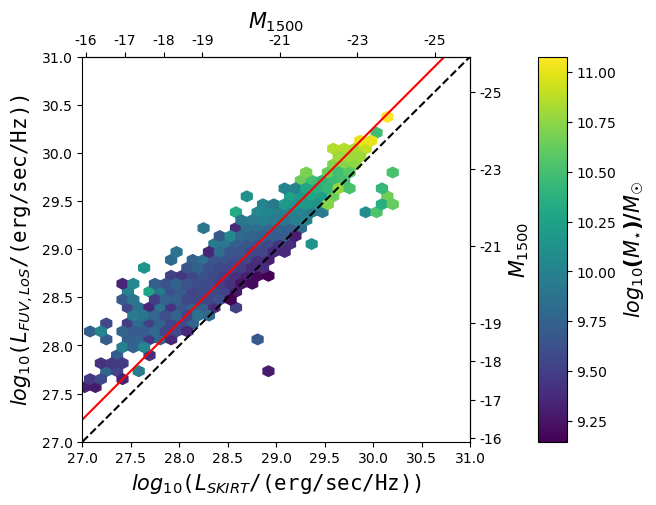

In [5]:
import h5py
import numpy
from scipy.optimize import curve_fit
import math
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 15})
# plt.tick_params(axis="y",direction="in")
# plt.tick_params(axis="x",direction="in")


def compare(x, a):
    return a * x


import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

matplotlib.rc("xtick", labelsize=10)
matplotlib.rc("ytick", labelsize=10)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/table1.csv")
SFR = numpy.array(df["Star Formation Rate"])
Mstar = numpy.array(df["Stellar Mass"])
Mstar = [uk * (10**10) for uk in Mstar]
sSFR = [idk / Mstar[idknum] for idknum, idk in enumerate(SFR)]
df["sStar Formation Rate"] = sSFR
# print(type(df))
# print(df.describe())
z_5 = df.head(3844)
z_6 = df.head(5616).tail(1772)
z_7 = df.head(6389).tail(773)
z_8 = df.head(6720).tail(331)
z_9 = df.head(6846).tail(126)
z_10 = df.tail(44)


z_6 = z_6.sort_values("ID")
z_7 = z_7.sort_values("ID")
z_8 = z_8.sort_values("ID")
z_9 = z_9.sort_values("ID")
z_10 = z_10.sort_values("ID")
z_5_binA = z_5.loc[(z_5["Mass_bin"] == "10^9-10^9.5")]
z_6_binA = z_6.loc[(z_6["Mass_bin"] == "10^9-10^9.5")]
z_7_binA = z_7.loc[(z_7["Mass_bin"] == "10^9-10^9.5")]
z_8_binA = z_8.loc[(z_8["Mass_bin"] == "10^9-10^9.5")]
z_9_binA = z_9.loc[(z_9["Mass_bin"] == "10^9-10^9.5")]
z_10_binA = z_10.loc[(z_10["Mass_bin"] == "10^9-10^9.5")]

z_5_binB = z_5.loc[(z_5["Mass_bin"] == "10^9.5-10^10")]
z_6_binB = z_6.loc[(z_6["Mass_bin"] == "10^9.5-10^10")]
z_7_binB = z_7.loc[(z_7["Mass_bin"] == "10^9.5-10^10")]
z_8_binB = z_8.loc[(z_8["Mass_bin"] == "10^9.5-10^10")]
z_9_binB = z_9.loc[(z_9["Mass_bin"] == "10^9.5-10^10")]
z_10_binB = z_10.loc[(z_10["Mass_bin"] == "10^9.5-10^10")]

z_5_binC = z_5.loc[(z_5["Mass_bin"] == "10^10-10^10.5")]
z_6_binC = z_6.loc[(z_6["Mass_bin"] == "10^10-10^10.5")]
z_7_binC = z_7.loc[(z_7["Mass_bin"] == "10^10-10^10.5")]
z_8_binC = z_8.loc[(z_8["Mass_bin"] == "10^10-10^10.5")]
z_9_binC = z_9.loc[(z_9["Mass_bin"] == "10^10-10^10.5")]
z_10_binC = z_10.loc[(z_10["Mass_bin"] == "10^10-10^10.5")]

z_5_binD = z_5.loc[(z_5["Mass_bin"] == "10^10.5-10^11")]
z_6_binD = z_6.loc[(z_6["Mass_bin"] == "10^10.5-10^11")]
z_7_binD = z_7.loc[(z_7["Mass_bin"] == "10^10.5-10^11")]
z_8_binD = z_8.loc[(z_8["Mass_bin"] == "10^10.5-10^11")]
z_9_binD = z_9.loc[(z_9["Mass_bin"] == "10^10.5-10^11")]
z_10_binD = z_10.loc[(z_10["Mass_bin"] == "10^10.5-10^11")]

z_5_binE = z_5.loc[(z_5["Mass_bin"] == "10^11-10^11.5")]
z_6_binE = z_6.loc[(z_6["Mass_bin"] == "10^11-10^11.5")]
z_7_binE = z_7.loc[(z_7["Mass_bin"] == "10^11-10^11.5")]
z_8_binE = z_8.loc[(z_8["Mass_bin"] == "10^11-10^11.5")]
z_9_binE = z_9.loc[(z_9["Mass_bin"] == "10^11-10^11.5")]
z_10_binE = z_10.loc[(z_10["Mass_bin"] == "10^11-10^11.5")]

f = h5py.File("C:/Users/pauru/Documents/SKIRT/flares_00/flares_skirt_outputs.hdf5", "r")
ids = numpy.array(df["ID"])
LumSKIRT = numpy.array(df["UV Luminosity 1500A"])
mass = numpy.array(df["Stellar Mass"])
mass = [x * 1e10 for x in mass]
mass = [math.log(x, 10) for x in mass]
LOSlum = []
LIR = []
# plt.grid()
for x in ids:
    idtag = x[:-18]
    z = int(idtag[2:])
    zfl = "{0:03}".format(15 - z) + "_z" + "{0:03}".format(z) + "p000"
    rgtag = (x[:-8])[-2:]
    acname = rgtag + "/" + zfl + "/Galaxy/Photometry/LFUV_los"
    acname2 = rgtag + "/" + zfl + "/Galaxy/Photometry/Lir"
    data = f[acname]
    data2 = f[acname]
    alllum = numpy.array(data)
    alllir = numpy.array(data2)
    gal = int(x[-3:])
    lumlos = alllum[gal]
    lumlir = alllir[gal]
    LOSlum.append(lumlos)
    LIR.append(lumlir)
# plt.style.use('default')
hfont = {"fontname": "monospace"}
popt, _ = curve_fit(compare, numpy.log10(LumSKIRT), numpy.log10(LOSlum), maxfev=10000)
# plt.scatter(numpy.log10(LumSKIRT),numpy.log10(LOSlum), color="#0c9cf5", alpha=0.4)
# plt.scatter(numpy.log10(LumSKIRT),numpy.log10(LOSlum), c=mass, cmap="jet", alpha=1)


im = ax.hexbin(
    numpy.log10(LumSKIRT), numpy.log10(LOSlum), gridsize=30, C=mass, cmap="viridis"
)

# plt.colorbar(label='$log_{10}$($M_{\star}$)/$M_\u2609$',size=15)
cax = ax.inset_axes([31.7, 27, 0.3, 4], transform=ax.transData)
fig.colorbar(im, cax=cax).set_label(
    label="$log_{10}$($M_{\star}$)/$M_\u2609$", size=15, weight="bold"
)
ax.set_xlabel("$log_{10}$($L_{SKIRT}$/(erg/sec/Hz))", **hfont)
ax.set_ylabel("$log_{10}$($L_{FUV,LoS}$/(erg/sec/Hz))", **hfont)
xaxis = numpy.linspace(27, 31, num=50)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)


from astropy import units as u


def magABtoLum(x):
    mab = x * u.ABmag
    fuv = mab.to(
        u.erg / u.s / u.cm**2 / u.Hz, equivalencies=u.spectral_density(1500 * u.AA)
    ).value
    return fuv * 4 * math.pi * 3.0856775814914e19 * 3.0856775814914e19


from astropy.cosmology import Planck15 as cosmo

# print(np.log10(fnu_to_lnu(apparent_mag_to_fnu(27), cosmo, z).value))
l = float(10**29)
# print(l,ltomag(l))

# ax2 = plt.twiny()
# ax2.hexbin(numpy.log10(abc),numpy.log10(cba), gridsize=30,C=mass,cmap='viridis')
# print(np.log10(lnu_to_absolute_mag(l)))
# ax2.set_xlabel("$M_{1500}$", fontsize=15)
# ax2.tick_params(axis="x", labelsize=11)
# ax2.scatter(abc,ze)
y_line = compare(xaxis, popt)
ax.plot(xaxis, xaxis, "--", color="black")
ax.plot(xaxis, y_line, label="y=" + str(round(popt[0], 2)) + "x", color="red")
ax.set_xlim(27, 31)
ax.set_ylim(27, 31)
# plt.legend(loc="upper left")
lll = [1e28, 1e29, 1e30]
# lls=[round(ltomag(x),2) for x in lll]
# print(lls)
llk = [-15, -16, -17, -18, -19, -21, -23, -25]
llll = [magABtoLum(x) for x in llk]
print(llll)
# x.set_xlim([1e28,3.1622776601683795e+30])
ax2 = ax.secondary_yaxis("right")
# ax2.tick_params(labelsize=14)
# ax2.set_yscale('log')
ax2.set_yticks(numpy.log10(llll), labels=llk, fontsize=10)

ax2.set_ylabel("$M_{1500}$")


llk = [-15, -16, -17, -18, -19, -21, -23, -25]
llll = [magABtoLum(x) for x in llk]
print(llll)
# x.set_xlim([1e28,3.1622776601683795e+30])
ax3 = ax.secondary_xaxis("top")
# ax2.tick_params(labelsize=14)
# ax2.set_yscale('log')
ax3.set_xticks(numpy.log10(llll), labels=llk, fontsize=10)

ax3.set_xlabel("$M_{1500}$")

In [5]:
print(magABtoLum(-26.5))

1.7294617228168707e+31


C:\Users\pauru\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


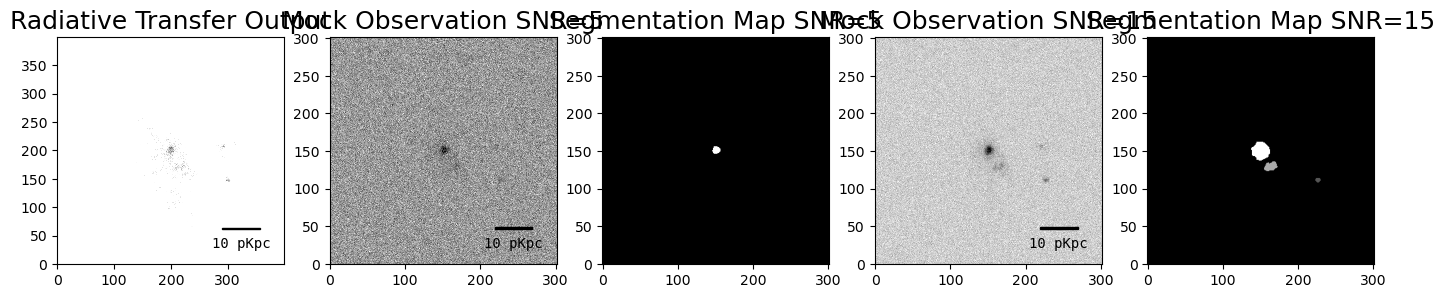

In [4]:
import numpy as np
import numpy
import matplotlib.pyplot as plt
import math
from astropy.visualization import simple_norm
from astropy.modeling.models import Sersic2D
from astropy.convolution import convolve, Gaussian2DKernel
from photutils.segmentation import detect_threshold, detect_sources
import time
import statmorph
from astropy.io import fits
import cv2
from PIL import Image
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

fig, ax = plt.subplots(1, 5, figsize=(17, 3.5))
fontprops = fm.FontProperties(size=10, family="monospace")


image1 = fits.getdata("highoffsetimages/z_5_flares_00_gal_110.fits", ext=0)  # z=5
ax[0].imshow(image1, cmap="gray_r", interpolation="none", origin="lower")
ax[0].set_title("Radiative Transfer Output")


imarr = Image.fromarray(image1)

image = np.array(imarr.resize((302, 302)))

# ax[1].imshow(image, cmap='gray_r',interpolation='none',origin='lower')


psf1 = fits.getdata(
    "C:/Users/pauru/Downloads/PSF_NIRCam_in_flight_opd_filter_F090W.fits", ext=0
)
newpsf = Image.fromarray(psf1)
box = (493, 493, 795, 795)

newpsf1 = newpsf.crop(box)

psf = np.array(newpsf1.resize((301, 301)))

image = convolve(image, psf)


np.random.seed(3)
gain = 1e5
image = np.random.poisson(image * gain) / gain

snp = 15.0
sky_sigma = np.max(image) / snp
image += sky_sigma * np.random.standard_normal(size=(302, 302))
justnoisy = image
npixels = 5
sky_sigma2 = np.max(image) / 5.0
image2 = image + sky_sigma2 * np.random.standard_normal(size=(302, 302))
convolved_image2 = convolve(image2, psf)
threshold2 = detect_threshold(image2, 1.5)
segmap2 = detect_sources(convolved_image2, threshold2, npixels)

threshold = detect_threshold(image, 1.5)
# minimum number of connected pixels
convolved_image = convolve(image, psf)
segmap = detect_sources(convolved_image, threshold, npixels)
ax[4].imshow(segmap, origin="lower", cmap="gray")
ax[4].set_title("Segmentation Map SNR=15")

ax[2].imshow(segmap2, origin="lower", cmap="gray")
ax[2].set_title("Segmentation Map SNR=5")

ax[3].imshow(image, cmap="gray_r", interpolation="none", origin="lower")
ax[3].set_title("Mock Observation SNR=15")

ax[1].imshow(image2, cmap="gray_r", interpolation="none", origin="lower")
ax[1].set_title("Mock Observation SNR=5")


bar = AnchoredSizeBar(
    ax[0].transData,
    66.666667,
    "10 pKpc",
    4,
    pad=0.5,
    sep=5,
    borderpad=0.5,
    frameon=False,
    size_vertical=3,
    color="black",
    fontproperties=fontprops,
)
ax[0].add_artist(bar)

bar = AnchoredSizeBar(
    ax[1].transData,
    50.333333333333333333333333333333,
    "10 pKpc",
    4,
    pad=0.5,
    sep=5,
    borderpad=0.5,
    frameon=False,
    size_vertical=3,
    color="black",
    fontproperties=fontprops,
)
ax[1].add_artist(bar)

bar = AnchoredSizeBar(
    ax[2].transData,
    50.333333333333333333333333333333,
    "10 pKpc",
    4,
    pad=0.5,
    sep=5,
    borderpad=0.5,
    frameon=False,
    size_vertical=3,
    color="black",
    fontproperties=fontprops,
)
ax[2].add_artist(bar)

bar = AnchoredSizeBar(
    ax[3].transData,
    50.333333333333333333333333333333,
    "10 pKpc",
    4,
    pad=0.5,
    sep=5,
    borderpad=0.5,
    frameon=False,
    size_vertical=3,
    color="black",
    fontproperties=fontprops,
)
ax[3].add_artist(bar)

bar = AnchoredSizeBar(
    ax[4].transData,
    50.333333333333333333333333333333,
    "10 pKpc",
    4,
    pad=0.5,
    sep=5,
    borderpad=0.5,
    frameon=False,
    size_vertical=3,
    color="black",
    fontproperties=fontprops,
)
ax[4].add_artist(bar)

# bar = AnchoredSizeBar(ax[3].transData, 50.333333333333333333333333333333, '10 pKpc', 4, pad=0.5,sep=5, borderpad=0.5, frameon=False,size_vertical=3, color='black',fontproperties=fontprops)
# ax[3].add_artist(bar)

<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
C:\Users\pauru\AppData\Local\Temp\ipykernel_57644\3340568439.py:29: SyntaxWarning: invalid escape sequence '\s'
  cbar=plt.colorbar().set_label(label='$ log_{10}(M_{\star} / M_{\odot})$',size=15)


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16'),
  Text(18.0, 0, '18')])

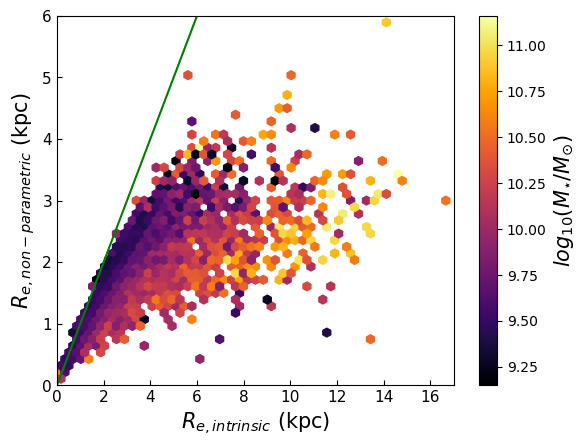

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({"font.size": 15})
plt.tick_params(axis="y", direction="in")
plt.tick_params(axis="x", direction="in")

rrdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/RoperRadius.csv")
df = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/table1.csv")
SFR = numpy.array(df["Star Formation Rate"])
Mstar = numpy.array(df["Stellar Mass"])
Mstar = [numpy.log10(uk * (10**10)) for uk in Mstar]
rr = rrdf["Roper Radius"]
skr = rrdf["SKIRT Radius"]

rr = [x * 0.15 for x in rr]
skr = [x * 0.15 for x in skr]

# plt.scatter(skr,rr,color="#ff4d4d")
plt.hexbin(skr, rr, gridsize=50, C=Mstar, cmap="inferno", extent=[0, 17, 0, 6])
x_line = np.arange(0, 30, 0.1)
plt.plot(x_line, x_line, color="g")
plt.ylabel("$R_{e,non-parametric}$ (kpc)")
plt.xlabel("$R_{e,intrinsic}$ (kpc)")

plt.rcParams.update({"font.size": 10})
cbar = plt.colorbar().set_label(label="$ log_{10}(M_{\star} / M_{\odot})$", size=15)
# cbar.plt.tick_params(labelsize=10)

plt.xlim(0, 17)
plt.ylim(0, 6)

plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
# plt.grid()

<>:255: SyntaxWarning: invalid escape sequence '\s'
<>:256: SyntaxWarning: invalid escape sequence '\o'
<>:255: SyntaxWarning: invalid escape sequence '\s'
<>:256: SyntaxWarning: invalid escape sequence '\o'
C:\Users\pauru\AppData\Local\Temp\ipykernel_57644\2943208472.py:255: SyntaxWarning: invalid escape sequence '\s'
  ax[1].set_xlabel("$log_{10}$($M_{\star} / M_{\odot}$)")
C:\Users\pauru\AppData\Local\Temp\ipykernel_57644\2943208472.py:256: SyntaxWarning: invalid escape sequence '\o'
  ax[1].set_ylabel("SFR ($ M_{\odot}$/yr)")


167
[[  5 136]
 [  6  26]
 [  7   5]]
167
[4.344211435358866e+26, 1.0912165760086703e+27, 2.741012111114523e+27, 6.885111130511992e+27, 1.7294617228168673e+28, 1.0912165760086703e+29, 6.885111130512005e+29, 4.344211435358867e+30]


Text(0, 0.5, '$M_{1500}$')

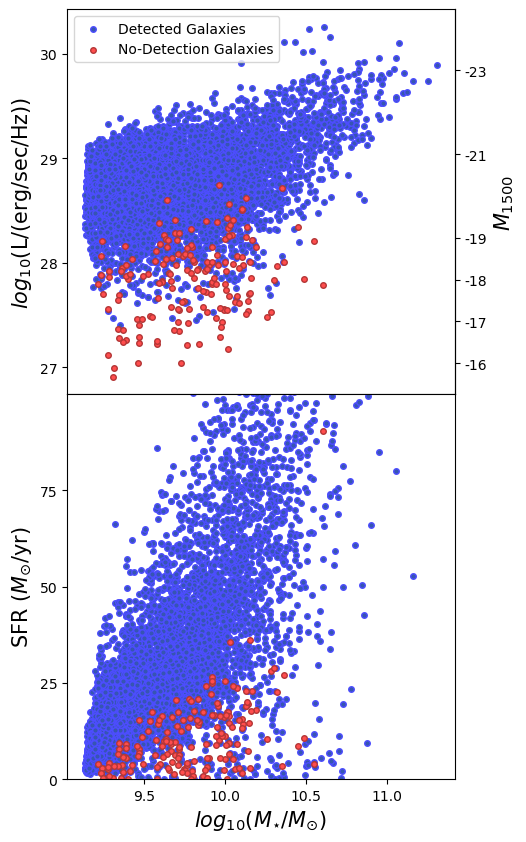

In [33]:
import pandas as pd

plt.rcParams.update({"font.size": 15})
# plt.tick_params(axis="y",direction="in")
# plt.tick_params(axis="x",direction="in")
imgdf = pd.read_csv("C:/Users/pauru/OneDrive/Documents/NewResults.csv")
z_52 = imgdf.head(3844)
z_62 = imgdf.head(5616).tail(1772)
z_72 = imgdf.head(6389).tail(773)
z_82 = imgdf.head(6720).tail(331)
z_92 = imgdf.head(6846).tail(126)
z_102 = imgdf.tail(44)
z_52 = z_52.sort_values("ID")
z_62 = z_62.sort_values("ID")
z_72 = z_72.sort_values("ID")
z_82 = z_82.sort_values("ID")
z_92 = z_92.sort_values("ID")
z_102 = z_102.sort_values("ID")

import h5py
import numpy
from scipy.optimize import curve_fit


def compare(x, a):
    return a * x


f = h5py.File("C:/Users/pauru/Documents/SKIRT/flares_00/flares_skirt_outputs.hdf5", "r")
ids = numpy.array(df["ID"])
LumSKIRT = numpy.array(df["UV Luminosity 1500A"])
LOSlum = []
LIR = []
beta1 = []
for x in ids:
    # print(x)
    idtag = x[:-18]
    z = int(idtag[2:])
    zfl = "{0:03}".format(15 - z) + "_z" + "{0:03}".format(z) + "p000"
    rgtag = (x[:-8])[-2:]
    acname = rgtag + "/" + zfl + "/Galaxy/Photometry/LFUV"
    acname2 = rgtag + "/" + zfl + "/Galaxy/Photometry/Lir"
    acname3 = rgtag + "/" + zfl + "/Galaxy/Photometry/beta"
    data = f[acname]
    data2 = f[acname2]
    data3 = f[acname3]
    alllum = numpy.array(data)
    alllir = numpy.array(data2)
    allbeta = numpy.array(data3)
    gal = int(x[-3:])
    lumlos = alllum[gal]
    lumlir = alllir[gal]
    b = allbeta[gal]
    LOSlum.append(lumlos)
    LIR.append(lumlir)
    beta1.append(b)

import numpy
import numpy as np
import matplotlib.pyplot as plt


# plt.rcParams.update({'font.size': 15})
# plt.tick_params(axis="y",direction="in")
# plt.tick_params(axis="x",direction="in")

# fig, ax = plt.subplots(2,1, figsize=(6,13))
# fig.subplots_adjust(hspace=0.02,wspace=0.00)

fig, ax = plt.subplots(2, 1, figsize=(5, 10), sharex=True)
fig.subplots_adjust(hspace=0, wspace=0)


a = numpy.array(imgdf["HLR circ"])
lum = numpy.array(df["UV Luminosity 1500A"])
lumir = numpy.array(df["Luminosity 250um IR"])
sizes = numpy.array(df["UV HLR 1500A"])
# sizes= [0.15*toast for toast in sizes]
SFR = numpy.array(df["Star Formation Rate"])
redshift = numpy.array(df["Redshift"])
Mass = numpy.array(df["Stellar Mass"])
Mass = [x * 1e10 for x in Mass]
ident = numpy.array(df["ID"])
count = 0
sfrnd = []
lumnd = []
massnd = []
lumirnd = []
sizesnd = []
identnd = []
z = []
lumd = []
sfrd = []
massd = []
lumird = []
irnd = []
ird = []
fuvnd = []
fuvd = []
betad1 = []
betand1 = []
for num, x in enumerate(a):
    if np.isnan(x):
        sfrnd.append(SFR[num])
        lumnd.append(lum[num])
        lumirnd.append(lumir[num])
        massnd.append(Mass[num])
        z.append(redshift[num])
        sizesnd.append(sizes[num])
        identnd.append(ident[num])
        irnd.append(LIR[num])
        fuvnd.append(LOSlum[num])
        betand1.append(beta1[num])
        count += 1
    else:
        sfrd.append(SFR[num])
        lumd.append(lum[num])
        lumird.append(lumir[num])
        massd.append(Mass[num])
        ird.append(LIR[num])
        fuvd.append(LOSlum[num])
        betad1.append(beta1[num])
print(count)

ax[0].scatter(
    numpy.log10(massd),
    numpy.log10(lumd),
    edgecolors="#4d4dff",
    facecolors="#3655b3",
    s=16,
    label="Detected Galaxies",
)
ax[0].scatter(
    numpy.log10(massnd),
    numpy.log10(lumnd),
    edgecolors="#b33636",
    facecolors="#ff4d4d",
    s=16,
    label="No-Detection Galaxies",
)
# plt.hexbin(numpy.log10(massd),numpy.log10(lumd), C=numpy.log10(massd), gridsize=50,cmap='viridis',edgecolors='blue')
# plt.hexbin(numpy.log10(massnd),numpy.log10(lumnd),C=numpy.log10(massnd),gridsize=50,cmap='inferno',edgecolors='red')


# plt.xlabel("log($M_{\star}$) ($M_\u2609$)")
ax[0].set_ylabel("$log_{10}$(L/(erg/sec/Hz))")
unique, counts = np.unique(z, return_counts=True)
print(np.asarray((unique, counts)).T)
# plt.legend(loc="best",fontsize=10)
# plt.savefig("DetMass.pdf")
ax[0].set_yticks([27, 28, 29, 30], labels=[27, 28, 29, 30], fontsize=10)
# plt.xticks(fontsize=10)
# ax[0].grid()


imgdf = pd.read_csv("C:/Users/pauru/OneDrive/Documents/NewResults.csv")
z_52 = imgdf.head(3844)
z_62 = imgdf.head(5616).tail(1772)
z_72 = imgdf.head(6389).tail(773)
z_82 = imgdf.head(6720).tail(331)
z_92 = imgdf.head(6846).tail(126)
z_102 = imgdf.tail(44)
z_52 = z_52.sort_values("ID")
z_62 = z_62.sort_values("ID")
z_72 = z_72.sort_values("ID")
z_82 = z_82.sort_values("ID")
z_92 = z_92.sort_values("ID")
z_102 = z_102.sort_values("ID")

import h5py
import numpy
from scipy.optimize import curve_fit


def compare(x, a):
    return a * x


f = h5py.File("C:/Users/pauru/Documents/SKIRT/flares_00/flares_skirt_outputs.hdf5", "r")
ids = numpy.array(df["ID"])
LumSKIRT = numpy.array(df["UV Luminosity 1500A"])
LOSlum = []
LIR = []
beta1 = []
for x in ids:
    # print(x)
    idtag = x[:-18]
    z = int(idtag[2:])
    zfl = "{0:03}".format(15 - z) + "_z" + "{0:03}".format(z) + "p000"
    rgtag = (x[:-8])[-2:]
    acname = rgtag + "/" + zfl + "/Galaxy/Photometry/LFUV"
    acname2 = rgtag + "/" + zfl + "/Galaxy/Photometry/Lir"
    acname3 = rgtag + "/" + zfl + "/Galaxy/Photometry/beta"
    data = f[acname]
    data2 = f[acname2]
    data3 = f[acname3]
    alllum = numpy.array(data)
    alllir = numpy.array(data2)
    allbeta = numpy.array(data3)
    gal = int(x[-3:])
    lumlos = alllum[gal]
    lumlir = alllir[gal]
    b = allbeta[gal]
    LOSlum.append(lumlos)
    LIR.append(lumlir)
    beta1.append(b)

import numpy
import numpy as np
import matplotlib.pyplot as plt

# plt.rcParams.update({'font.size': 15})
# plt.tick_params(axis="y",direction="in")
# plt.tick_params(axis="x",direction="in")

a = numpy.array(imgdf["HLR circ"])
lum = numpy.array(df["UV Luminosity 1500A"])
lumir = numpy.array(df["Luminosity 250um IR"])
sizes = numpy.array(df["UV HLR 1500A"])
# sizes= [0.15*toast for toast in sizes]
SFR = numpy.array(df["Star Formation Rate"])
redshift = numpy.array(df["Redshift"])
Mass = numpy.array(df["Stellar Mass"])
Mass = [x * 1e10 for x in Mass]
ident = numpy.array(df["ID"])
count = 0
sfrnd = []
lumnd = []
massnd = []
lumirnd = []
sizesnd = []
identnd = []
z = []
lumd = []
sfrd = []
massd = []
lumird = []
irnd = []
ird = []
fuvnd = []
fuvd = []
betad1 = []
betand1 = []
for num, x in enumerate(a):
    if np.isnan(x):
        sfrnd.append(SFR[num])
        lumnd.append(lum[num])
        lumirnd.append(lumir[num])
        massnd.append(Mass[num])
        z.append(redshift[num])
        sizesnd.append(sizes[num])
        identnd.append(ident[num])
        irnd.append(LIR[num])
        fuvnd.append(LOSlum[num])
        betand1.append(beta1[num])
        count += 1
    else:
        sfrd.append(SFR[num])
        lumd.append(lum[num])
        lumird.append(lumir[num])
        massd.append(Mass[num])
        ird.append(LIR[num])
        fuvd.append(LOSlum[num])
        betad1.append(beta1[num])
print(count)

# plt.rcParams.update({'font.size': 15})
# plt.tick_params(axis="y",direction="in")
# plt.tick_params(axis="x",direction="in")

ax[1].scatter(
    numpy.log10(massd),
    sfrd,
    edgecolors="#4d4dff",
    facecolors="#3655b3",
    s=16,
    label="Detected Galaxies",
)
ax[1].scatter(
    numpy.log10(massnd),
    sfrnd,
    edgecolors="#b33636",
    facecolors="#ff4d4d",
    s=16,
    label="No-Detection Galaxies",
)

ax[1].set_xlabel("$log_{10}$($M_{\star} / M_{\odot}$)")
ax[1].set_ylabel("SFR ($ M_{\odot}$/yr)")
ax[1].set_ylim(0, 100)
# plt.savefig("DetSFR.pdf")
ax[0].legend(loc="upper left", fontsize=10)
ax[1].set_yticks([0, 25, 50, 75], labels=[0, 25, 50, 75], fontsize=10)
ax[1].set_xticks([9.5, 10.0, 10.5, 11.0], labels=[9.5, 10.0, 10.5, 11.0], fontsize=10)
# ax[1].grid()

lll = [1e28, 1e29, 1e30]
# lls=[round(ltomag(x),2) for x in lll]
# print(lls)
llk = [-15, -16, -17, -18, -19, -21, -23, -25]
llll = [magABtoLum(x) for x in llk]
print(llll)
# x.set_xlim([1e28,3.1622776601683795e+30])
ax2 = ax[0].secondary_yaxis("right")
# ax2.tick_params(labelsize=14)
# ax2.set_yscale('log')
ax2.set_yticks(numpy.log10(llll), labels=llk, fontsize=10)

ax2.set_ylabel("$M_{1500}$")

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\pauru\AppData\Local\Temp\ipykernel_57644\3418904157.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("$log_{10}$($M_{\star}$/$M_\u2609$)")


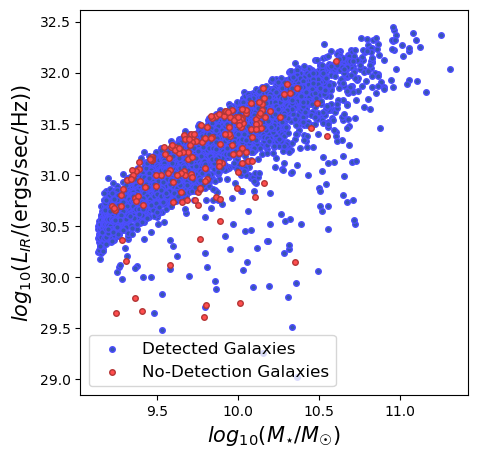

In [43]:
#
plt.scatter(
    numpy.log10(massd),
    numpy.log10(lumird),
    edgecolors="#4d4dff",
    facecolors="#3655b3",
    s=16,
    label="Detected Galaxies",
)
plt.scatter(
    numpy.log10(massnd),
    numpy.log10(lumirnd),
    edgecolors="#b33636",
    facecolors="#ff4d4d",
    s=16,
    label="No-Detection Galaxies",
)


plt.xlabel("$log_{10}$($M_{\star}$/$M_\u2609$)")
plt.ylabel("$log_{10}$($L_{IR}$/(ergs/sec/Hz))")
plt.legend(loc="best", fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# plt.grid()

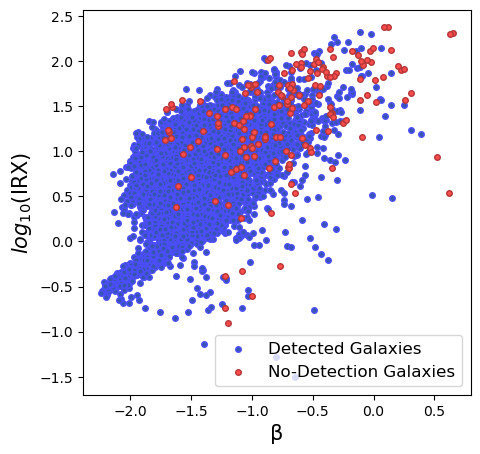

In [45]:
fuvd1 = [x * (2e15) / (3.826e33) for x in fuvd]
fuvnd1 = [x * (2e15) / (3.826e33) for x in fuvnd]
ratiod = [ird[num] / x for num, x in enumerate(fuvd1)]
rationd = [irnd[num] / x for num, x in enumerate(fuvnd1)]


plt.scatter(
    betad1,
    numpy.log10(ratiod),
    edgecolors="#4d4dff",
    facecolors="#3655b3",
    s=16,
    label="Detected Galaxies",
)
plt.scatter(
    betand1,
    numpy.log10(rationd),
    edgecolors="#b33636",
    facecolors="#ff4d4d",
    s=16,
    label="No-Detection Galaxies",
)


plt.ylabel("$log_{10}$(IRX)")
plt.xlabel("\u03B2")
plt.legend(loc="best", fontsize=12)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.gcf().set_size_inches(5, 5)

0


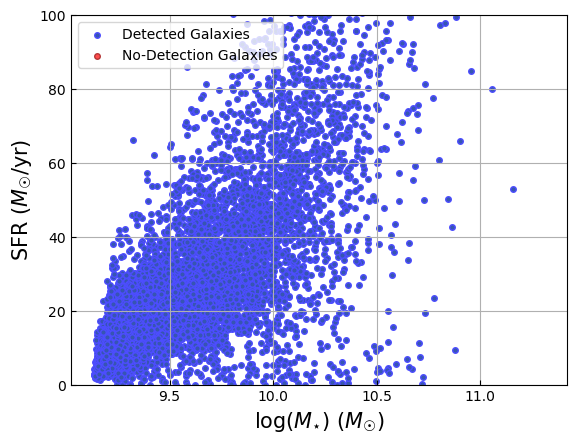

In [7]:
imgdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/NewResults.csv")
z_52 = imgdf.head(3844)
z_62 = imgdf.head(5616).tail(1772)
z_72 = imgdf.head(6389).tail(773)
z_82 = imgdf.head(6720).tail(331)
z_92 = imgdf.head(6846).tail(126)
z_102 = imgdf.tail(44)
z_52 = z_52.sort_values("ID")
z_62 = z_62.sort_values("ID")
z_72 = z_72.sort_values("ID")
z_82 = z_82.sort_values("ID")
z_92 = z_92.sort_values("ID")
z_102 = z_102.sort_values("ID")

import h5py
import numpy
from scipy.optimize import curve_fit


def compare(x, a):
    return a * x


f = h5py.File("C:/Users/pauru/Documents/SKIRT/flares_00/flares_skirt_outputs.hdf5", "r")
ids = numpy.array(df["ID"])
LumSKIRT = numpy.array(df["UV Luminosity 1500A"])
LOSlum = []
LIR = []
beta1 = []
for x in ids:
    # print(x)
    idtag = x[:-18]
    z = int(idtag[2:])
    zfl = "{0:03}".format(15 - z) + "_z" + "{0:03}".format(z) + "p000"
    rgtag = (x[:-8])[-2:]
    acname = rgtag + "/" + zfl + "/Galaxy/Photometry/LFUV"
    acname2 = rgtag + "/" + zfl + "/Galaxy/Photometry/Lir"
    acname3 = rgtag + "/" + zfl + "/Galaxy/Photometry/beta"
    data = f[acname]
    data2 = f[acname2]
    data3 = f[acname3]
    alllum = numpy.array(data)
    alllir = numpy.array(data2)
    allbeta = numpy.array(data3)
    gal = int(x[-3:])
    lumlos = alllum[gal]
    lumlir = alllir[gal]
    b = allbeta[gal]
    LOSlum.append(lumlos)
    LIR.append(lumlir)
    beta1.append(b)

import numpy
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 15})
plt.tick_params(axis="y", direction="in")
plt.tick_params(axis="x", direction="in")

a = numpy.array(imgdf["HLR circ"])
lum = numpy.array(df["UV Luminosity 1500A"])
lumir = numpy.array(df["Luminosity 250um IR"])
sizes = numpy.array(df["UV HLR 1500A"])
# sizes= [0.15*toast for toast in sizes]
SFR = numpy.array(df["Star Formation Rate"])
redshift = numpy.array(df["Redshift"])
Mass = numpy.array(df["Stellar Mass"])
Mass = [x * 1e10 for x in Mass]
ident = numpy.array(df["ID"])
count = 0
sfrnd = []
lumnd = []
massnd = []
lumirnd = []
sizesnd = []
identnd = []
z = []
lumd = []
sfrd = []
massd = []
lumird = []
irnd = []
ird = []
fuvnd = []
fuvd = []
betad1 = []
betand1 = []
for num, x in enumerate(a):
    if np.isnan(x):
        sfrnd.append(SFR[num])
        lumnd.append(lum[num])
        lumirnd.append(lumir[num])
        massnd.append(Mass[num])
        z.append(redshift[num])
        sizesnd.append(sizes[num])
        identnd.append(ident[num])
        irnd.append(LIR[num])
        fuvnd.append(LOSlum[num])
        betand1.append(beta1[num])
        count += 1
    else:
        sfrd.append(SFR[num])
        lumd.append(lum[num])
        lumird.append(lumir[num])
        massd.append(Mass[num])
        ird.append(LIR[num])
        fuvd.append(LOSlum[num])
        betad1.append(beta1[num])
print(count)

plt.rcParams.update({"font.size": 15})
plt.tick_params(axis="y", direction="in")
plt.tick_params(axis="x", direction="in")

plt.scatter(
    numpy.log10(massd),
    sfrd,
    edgecolors="#4d4dff",
    facecolors="#3655b3",
    s=16,
    label="Detected Galaxies",
)
plt.scatter(
    numpy.log10(massnd),
    sfrnd,
    edgecolors="#b33636",
    facecolors="#ff4d4d",
    s=16,
    label="No-Detection Galaxies",
)

plt.xlabel("log($M_{\star}$) ($M_\u2609$)")
plt.ylabel("SFR ($M_\u2609$/yr)")
plt.ylim(0, 100)
plt.savefig("DetSFR.pdf")
plt.legend(loc="upper left", fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.grid()

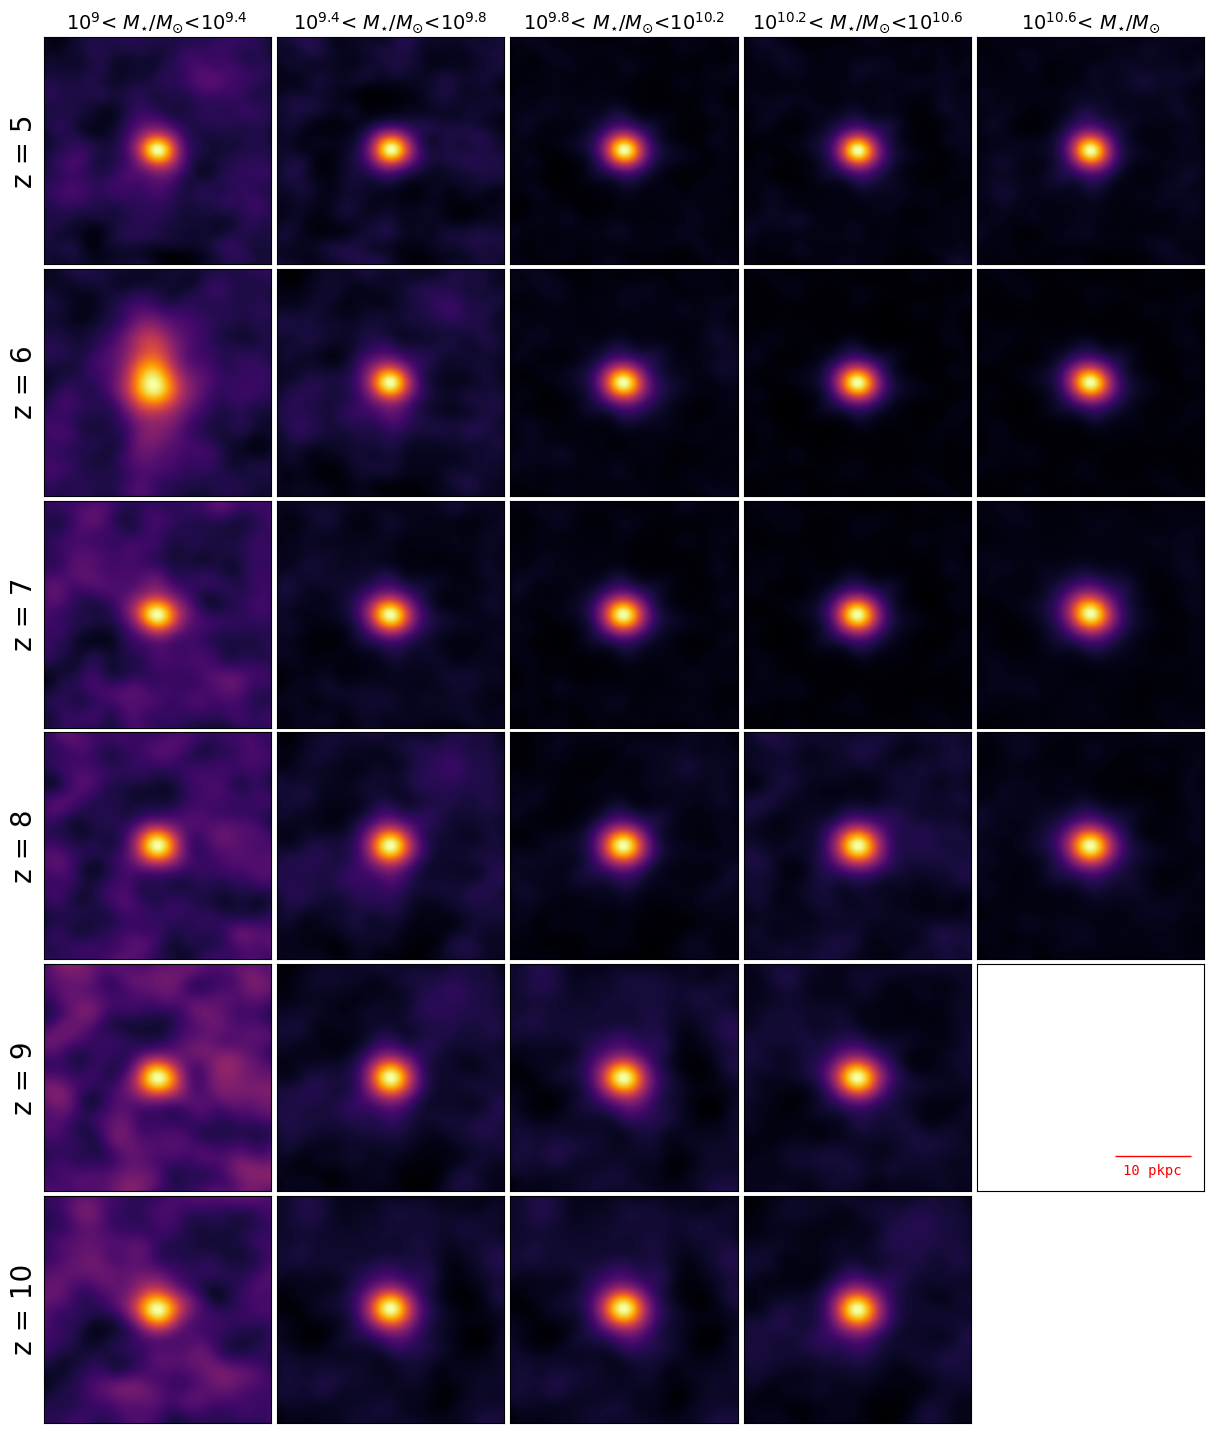

0.34786259856583834 0.7430713831986382 0.8972781706548408
[0.0057867]
0.3666816671820379 0.71677903132401 0.8985828918645319
[0.0074765]
0.37312448881803806 0.7147832310279048 0.902503030299787
[0.01080762]
0.4426890386084233 0.7301150566529344 0.887472467207609
[0.01437265]
0.47942437187353787 0.7604998358076269 0.9159865716921891
[0.02220469]
0.6266716795227029 0.8125535527304771 0.9389780327887911
[0.04065268]


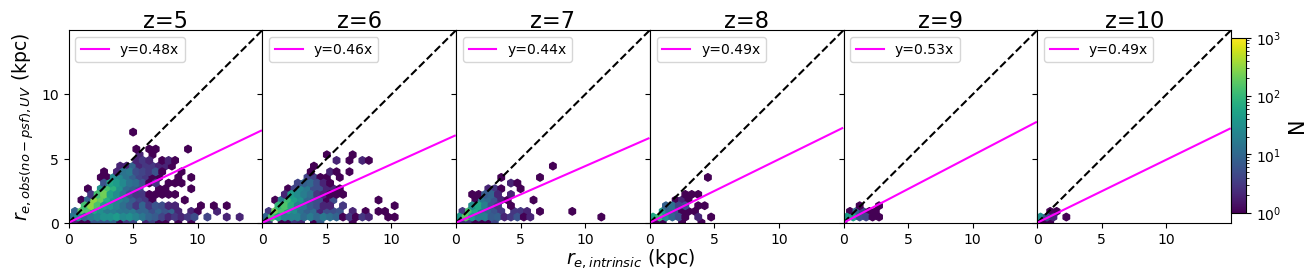

In [47]:
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy


def compare(x, a):
    return a * x


df = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/table1.csv")
SFR = numpy.array(df["Star Formation Rate"])
Mstar = numpy.array(df["Stellar Mass"])
# Mstar=[uk*(10**10) for uk in Mstar]
sSFR = [idk / Mstar[idknum] for idknum, idk in enumerate(SFR)]
df["sStar Formation Rate"] = sSFR
# print(type(df))
# print(df.describe())
z_5 = df.head(3844)
z_6 = df.head(5616).tail(1772)
z_7 = df.head(6389).tail(773)
z_8 = df.head(6720).tail(331)
z_9 = df.head(6846).tail(126)
z_10 = df.tail(44)
z_5 = z_5.sort_values("ID")
z_6 = z_6.sort_values("ID")
z_7 = z_7.sort_values("ID")
z_8 = z_8.sort_values("ID")
z_9 = z_9.sort_values("ID")
z_10 = z_10.sort_values("ID")

plt.rcParams.update({"font.size": 13.5})


# imgdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/StatMorphResults.csv")
imgdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/NewResults15_nopsf.csv")
z_52 = imgdf.head(3844)
z_62 = imgdf.head(5616).tail(1772)
z_72 = imgdf.head(6389).tail(773)
z_82 = imgdf.head(6720).tail(331)
z_92 = imgdf.head(6846).tail(126)
z_102 = imgdf.tail(44)
z_52 = z_52.sort_values("ID")
z_62 = z_62.sort_values("ID")
z_72 = z_72.sort_values("ID")
z_82 = z_82.sort_values("ID")
z_92 = z_92.sort_values("ID")
z_102 = z_102.sort_values("ID")
# print(z_52.describe)

HLRreal = numpy.array(z_5["UV HLR 1500A"])
HLRreal = [potato * 0.15 for potato in HLRreal]
HLRellip = numpy.array(z_52["HLR circ"])
Objects = numpy.array(z_52["Total objects"])
yax = []
xax = []
fig, ax = plt.subplots(1, 6, figsize=(15, 2.5), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)
# fig.subplots_adjust(layout='tight')


for num, x in enumerate(HLRellip):
    if (~np.isnan(x)) & (Objects[num] < 5):
        xax.append(HLRreal[num])
        yax.append(x)
xaxis = numpy.linspace(0, 15, num=50)
popt, pcov = curve_fit(compare, xax, yax, maxfev=10000)
x_line = np.arange(0, 15, 0.1)
y_line = compare(x_line, popt)
slope, intercept = numpy.polyfit(xax, yax, 1)
ax[0].plot(xaxis, xaxis, "--", color="black")
# ax[0,0].scatter(xax,yax,color='#e78895',alpha=0.2)
im = ax[0].hexbin(
    xax, yax, gridsize=30, cmap="viridis", extent=(0, 15, 0, 15), bins="log", vmax=1000
)
ax[0].plot(x_line, y_line, label="y=" + str(round(popt[0], 2)) + "x", color="magenta")
# ax[0,0].set_xlabel("$r_{e,Sim}$ (kpc)")
ax[0].set_ylabel("$r_{e,obs(no-psf),UV}$ (kpc)")
ax[0].legend(loc="upper left")
ax[0].set_xlim([0, 15])
ax[0].set_ylim([0, 15])
ax[0].set_title("z=5", y=1.18, pad=-23)

cenx = numpy.array(z_52["Center x"])
ceny = numpy.array(z_52["Center y"])
mm = [yax[i] / x for i, x in enumerate(xax)]
print(numpy.percentile(mm, 16), numpy.percentile(mm, 50), numpy.percentile(mm, 84))
y_line1 = numpy.percentile(mm, 16) * x_line
y_line2 = numpy.percentile(mm, 50) * x_line
y_line3 = numpy.percentile(mm, 84) * x_line
# ax[0,0].plot(x_line,y_line1,color='magenta')
# ax[0,0].plot(x_line,y_line2,color='purple')
# ax[0,0].plot(x_line,y_line3,color='magenta')
# ax[0,0].fill_between(x_line,y_line1,y_line3,color="purple",alpha=0.5)
print(np.sqrt(np.diag(pcov)))
xax = []
yax = []


HLRreal = numpy.array(z_6["UV HLR 1500A"])
HLRreal = [potato * 0.15 for potato in HLRreal]
HLRellip = numpy.array(z_62["HLR circ"])
Objects = numpy.array(z_62["Total objects"])
yax = []
xax = []
for num, x in enumerate(HLRellip):
    if (~np.isnan(x)) & (Objects[num] < 5):
        xax.append(HLRreal[num])
        yax.append(x)
xaxis = numpy.linspace(0, 15, num=50)
popt, pcov = curve_fit(compare, xax, yax, maxfev=10000)
x_line = np.arange(0, 15, 0.1)
y_line = compare(x_line, popt)
slope, intercept = numpy.polyfit(xax, yax, 1)
ax[1].plot(xaxis, xaxis, "--", color="black")
# ax[0,1].scatter(xax,yax,color='#e78895',alpha=0.2)
ax[1].hexbin(
    xax, yax, gridsize=30, cmap="viridis", extent=(0, 15, 0, 15), bins="log", vmax=1000
)
ax[1].plot(x_line, y_line, label="y=" + str(round(popt[0], 2)) + "x", color="magenta")
# ax[0,1].set_xlabel("$r_{e,Sim}$ (kpc)")
# ax[0,1].set_ylabel("$r_{e,Image}$ (kpc)")
ax[1].legend(loc="upper left")
ax[1].set_xlim([0, 15])
ax[1].set_ylim([0, 15])
ax[1].set_title("z=6", y=1.18, pad=-23)
cenx = numpy.array(z_62["Center x"])
ceny = numpy.array(z_62["Center y"])
mm = [yax[i] / x for i, x in enumerate(xax)]
print(numpy.percentile(mm, 16), numpy.percentile(mm, 50), numpy.percentile(mm, 84))
y_line1 = numpy.percentile(mm, 16) * x_line
y_line2 = numpy.percentile(mm, 50) * x_line
y_line3 = numpy.percentile(mm, 84) * x_line
# ax[0,1].plot(x_line,y_line1,color='magenta')
# ax[0,1].plot(x_line,y_line2,color='purple')
# ax[0,1].plot(x_line,y_line3,color='magenta')
# ax[0,1].fill_between(x_line,y_line1,y_line3,color="purple",alpha=0.5)
xax = []
yax = []
print(np.sqrt(np.diag(pcov)))


HLRreal = numpy.array(z_7["UV HLR 1500A"])
HLRreal = [potato * 0.15 for potato in HLRreal]
HLRellip = numpy.array(z_72["HLR circ"])
Objects = numpy.array(z_72["Total objects"])
yax = []
xax = []
for num, x in enumerate(HLRellip):
    if (~np.isnan(x)) & (Objects[num] < 5):
        xax.append(HLRreal[num])
        yax.append(x)
xaxis = numpy.linspace(0, 15, num=50)
popt, pcov = curve_fit(compare, xax, yax, maxfev=10000)
x_line = np.arange(0, 15, 0.1)
y_line = compare(x_line, popt)
slope, intercept = numpy.polyfit(xax, yax, 1)
ax[2].plot(xaxis, xaxis, "--", color="black")
# ax[0,2].scatter(xax,yax,color='#e78895',alpha=0.2)
ax[2].hexbin(
    xax, yax, gridsize=30, cmap="viridis", extent=(0, 15, 0, 15), bins="log", vmax=1000
)
ax[2].plot(x_line, y_line, label="y=" + str(round(popt[0], 2)) + "x", color="magenta")
# ax[0,2].set_xlabel("$r_{e,Sim}$ (kpc)")
# ax[0,2].set_ylabel("$r_{e,Image}$ (kpc)")
ax[2].legend(loc="upper left")
ax[2].set_xlim([0, 15])
ax[2].set_ylim([0, 15])
ax[2].set_title("z=7", y=1.18, pad=-23)
cenx = numpy.array(z_72["Center x"])
ceny = numpy.array(z_72["Center y"])
mm = [yax[i] / x for i, x in enumerate(xax)]
print(numpy.percentile(mm, 16), numpy.percentile(mm, 50), numpy.percentile(mm, 84))
y_line1 = numpy.percentile(mm, 16) * x_line
y_line2 = numpy.percentile(mm, 50) * x_line
y_line3 = numpy.percentile(mm, 84) * x_line
# ax[0,2].plot(x_line,y_line1,color='magenta')
# ax[0,2].plot(x_line,y_line2,color='purple')
# ax[0,2].plot(x_line,y_line3,color='magenta')
# ax[0,2].fill_between(x_line,y_line1,y_line3,color="purple",alpha=0.5)
xax = []
yax = []
print(np.sqrt(np.diag(pcov)))


HLRreal = numpy.array(z_8["UV HLR 1500A"])
HLRreal = [potato * 0.15 for potato in HLRreal]
HLRellip = numpy.array(z_82["HLR circ"])
Objects = numpy.array(z_82["Total objects"])
yax = []
xax = []
for num, x in enumerate(HLRellip):
    if (~np.isnan(x)) & (Objects[num] < 5):
        xax.append(HLRreal[num])
        yax.append(x)
xaxis = numpy.linspace(0, 15, num=50)
popt, pcov = curve_fit(compare, xax, yax, maxfev=10000)
x_line = np.arange(0, 15, 0.1)
y_line = compare(x_line, popt)
slope, intercept = numpy.polyfit(xax, yax, 1)
ax[3].plot(xaxis, xaxis, "--", color="black")
# ax[1,0].scatter(xax,yax,color='#e78895',alpha=0.2)
ax[3].hexbin(
    xax, yax, gridsize=30, cmap="viridis", extent=(0, 15, 0, 15), bins="log", vmax=1000
)
ax[3].plot(x_line, y_line, label="y=" + str(round(popt[0], 2)) + "x", color="magenta")
# ax[3].set_xlabel("$r_{e,Sim}$ (kpc)")
# ax[3].set_ylabel("$r_{e,Image}$ (kpc)")
ax[3].legend(loc="upper left")
ax[3].set_xlim([0, 15])
ax[3].set_ylim([0, 15])
ax[3].set_title("z=8", y=1.18, pad=-23)
cenx = numpy.array(z_82["Center x"])
ceny = numpy.array(z_82["Center y"])
mm = [yax[i] / x for i, x in enumerate(xax)]
print(numpy.percentile(mm, 16), numpy.percentile(mm, 50), numpy.percentile(mm, 84))
y_line1 = numpy.percentile(mm, 16) * x_line
y_line2 = numpy.percentile(mm, 50) * x_line
y_line3 = numpy.percentile(mm, 84) * x_line
# ax[1,0].plot(x_line,y_line1,color='magenta')
# ax[1,0].plot(x_line,y_line2,color='purple')
# ax[1,0].plot(x_line,y_line3,color='magenta')
# ax[1,0].fill_between(x_line,y_line1,y_line3,color="purple",alpha=0.5)
xax = []
yax = []
print(np.sqrt(np.diag(pcov)))


HLRreal = numpy.array(z_9["UV HLR 1500A"])
HLRreal = [potato * 0.15 for potato in HLRreal]
HLRellip = numpy.array(z_92["HLR circ"])
Objects = numpy.array(z_92["Total objects"])
yax = []
xax = []
for num, x in enumerate(HLRellip):
    if (~np.isnan(x)) & (Objects[num] < 5):
        xax.append(HLRreal[num])
        yax.append(x)
xaxis = numpy.linspace(0, 15, num=50)
popt, pcov = curve_fit(compare, xax, yax, maxfev=10000)
x_line = np.arange(0, 15, 0.1)
y_line = compare(x_line, popt)
slope, intercept = numpy.polyfit(xax, yax, 1)
ax[4].plot(xaxis, xaxis, "--", color="black")
# ax[1,1].scatter(xax,yax,color='#e78895',alpha=0.2)
ax[4].hexbin(
    xax, yax, gridsize=30, cmap="viridis", extent=(0, 15, 0, 15), bins="log", vmax=1000
)
ax[4].plot(x_line, y_line, label="y=" + str(round(popt[0], 2)) + "x", color="magenta")
# ax[4].set_xlabel("$r_{e,Sim}$ (kpc)")
# ax[1,1].set_ylabel("$r_{e,Image}$ (kpc)")
ax[4].legend(loc="upper left")
ax[4].set_xlim([0, 15])
ax[4].set_ylim([0, 15])
ax[4].set_title("z=9", y=1.18, pad=-23)
cenx = numpy.array(z_92["Center x"])
ceny = numpy.array(z_92["Center y"])
mm = [yax[i] / x for i, x in enumerate(xax)]
print(numpy.percentile(mm, 16), numpy.percentile(mm, 50), numpy.percentile(mm, 84))
y_line1 = numpy.percentile(mm, 16) * x_line
y_line2 = numpy.percentile(mm, 50) * x_line
y_line3 = numpy.percentile(mm, 84) * x_line
# ax[1,1].plot(x_line,y_line1,color='magenta')
# ax[1,1].plot(x_line,y_line2,color='purple')
# ax[1,1].plot(x_line,y_line3,color='magenta')
# ax[1,1].fill_between(x_line,y_line1,y_line3,color="purple",alpha=0.5)
xax = []
yax = []
print(np.sqrt(np.diag(pcov)))


HLRreal = numpy.array(z_10["UV HLR 1500A"])
HLRreal = [potato * 0.15 for potato in HLRreal]
HLRellip = numpy.array(z_102["HLR circ"])
Objects = numpy.array(z_102["Total objects"])
yax = []
xax = []
for num, x in enumerate(HLRellip):
    if (~np.isnan(x)) & (Objects[num] < 5):
        xax.append(HLRreal[num])
        yax.append(x)
xaxis = numpy.linspace(0, 15, num=50)
popt, pcov = curve_fit(compare, xax, yax, maxfev=10000)
x_line = np.arange(0, 15, 0.1)
y_line = compare(x_line, popt)
slope, intercept = numpy.polyfit(xax, yax, 1)
ax[5].plot(xaxis, xaxis, "--", color="black")
# ax[1,2].scatter(xax,yax,color='#e78895',alpha=0.2)
ax[5].hexbin(
    xax, yax, gridsize=30, cmap="viridis", extent=(0, 15, 0, 15), bins="log", vmax=1000
)
ax[5].plot(x_line, y_line, label="y=" + str(round(popt[0], 2)) + "x", color="magenta")
# ax[5].set_xlabel("$r_{e,Sim}$ (kpc)")
# ax[1,2].set_ylabel("$r_{e,Image}$ (kpc)")
ax[5].set_yticks(np.arange(0, 15.0, 5))
ax[5].set_xticks(np.arange(0, 15.0, 5))
ax[5].legend(loc="upper left")
ax[5].set_xlim([0, 15])
ax[5].set_ylim([0, 15])
ax[5].set_title("z=10", y=1.18, pad=-23)
cenx = numpy.array(z_102["Center x"])
ceny = numpy.array(z_102["Center y"])
mm = [yax[i] / x for i, x in enumerate(xax)]
print(numpy.percentile(mm, 16), numpy.percentile(mm, 50), numpy.percentile(mm, 84))
y_line1 = numpy.percentile(mm, 16) * x_line
y_line2 = numpy.percentile(mm, 50) * x_line
y_line3 = numpy.percentile(mm, 84) * x_line
# ax[1,2].plot(x_line,y_line1,color='magenta')
# ax[1,2].plot(x_line,y_line2,color='purple')
# ax[1,2].plot(x_line,y_line3,color='magenta')
# ax[1,2].fill_between(x_line,y_line1,y_line3,color="purple",alpha=0.5)
xax = []
yax = []
print(np.sqrt(np.diag(pcov)))

for x in ax:
    # x.grid(True)
    x.legend(loc="upper left", fontsize=10)
fig.text(0.5, -0.05, "$r_{e,intrinsic}$ (kpc)", ha="center")
# fig.suptitle('SNR=5',fontsize=20)
cbar_ax = fig.add_axes([0.9, 0.15, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax).set_label(label="N", size=15)
# fig.savefig("ImagevsRealSizes SNR5.png")

In [3]:
############################# FLARES functions
import numpy as np
def weighted_quantile(values, quantiles, sample_weight=None,
                      values_sorted=False, old_style=False):
    """
    Taken from From https://stackoverflow.com/a/29677616/1718096

    Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!
    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of
        initial array
    :param old_style: if True, will correct output to be consistent
        with numpy.percentile.
    :return: numpy.array with computed quantiles.
    """

    # do some housekeeping
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), \
        'quantiles should be in [0, 1]'

    # if not sorted, sort values array
    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]


    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)



def binned_weighted_quantile(x,y,weights,bins,quantiles):

    # if ~isinstance(quantiles,list):
    #     quantiles = [quantiles]

    out = np.full((len(bins)-1,len(quantiles)),np.nan)
    for i,(b1,b2) in enumerate(zip(bins[:-1],bins[1:])):
        mask = (x >= b1) & (x < b2)
        if np.sum(mask) > 0:
            out[i,:] = weighted_quantile(y[mask],quantiles,sample_weight=weights[mask])

    return np.squeeze(out)
    #return out
    
    
#imgdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/StatMorphResults15.csv")
imgdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/NewResults.csv")
z_52=imgdf.head(3844)
z_62=imgdf.head(5616).tail(1772)
z_72=imgdf.head(6389).tail(773)
z_82=imgdf.head(6720).tail(331)
z_92=imgdf.head(6846).tail(126)
z_102=imgdf.tail(44)
z_52=z_52.sort_values('ID')
z_62=z_62.sort_values('ID')
z_72=z_72.sort_values('ID')
z_82=z_82.sort_values('ID')
z_92=z_92.sort_values('ID')
z_102=z_102.sort_values('ID')

primercosmosz=["5.12+−00..11", 
"7.5+−00..11", 
"8.1+−00..32", 
"7.3+−00..11", 
"8.8+−00..34", 
"9.0+−00..33", 
"8.2+−00..32", 
"8.8+−00..42", 
"7.3+−00..22", 
"8.7+−00..22", 
"7.2+−00..11", 
"8.9+−00..23", 
"7.5+−00..32", 
"8.0+−00..11", 
"8.3+−00..23", 
"8.3+−00..34", 
"8.6+−00..34", 
"8.6+−00..22", 
"8.6+−00..53", 
"9.3+−00..11", 
"7.3+−00..11", 
"8.9+−00..32", 
"7.3+−20..52", 
"7.2+−00..11", 
"7.7+−00..36", 
"12.2+−00..45", 
"11.1+−00..45", 
"11.3+−00..22", 
"13.8+−11..10"]

primercosmosmuv=["−21.3+−00..11", 
"−19.1+−00..11", 
"−21.3+−00..11", 
"−19.5+−00..11", 
"−19.5+−00..11", 
"−19.9+−00..11", 
"−20.0+−00..11", 
"−21.3+−00..11", 
"−19.5+−00..11", 
"−20.9+−00..11", 
"−19.5+−00..11", 
"−19.7+−00..11", 
"−19.8+−00..11", 
"−21.3+−00..11", 
"−20.3+−00..11", 
"−20.0+−00..11", 
"−20.3+−00..11", 
"−21.2+−00..11", 
"−20.4+−00..11", 
"−21.4+−00..11", 
"−20.3+−00..11", 
"−19.5+−00..11", 
"−19.0+−00..11", 
"−20.1+−00..11", 
"−21.6+−00..11", 
"−20.8+−00..11", 
"−20.3+−00..11", 
"−21.7+−00..11", 
"−20.0+−00..11"]

primercosmossizes=["0.10+−00..0011", 
"−1.06+−00..0055", 
"−0.07+−00..0055", 
"−0.29+−00..2299", 
"−0.30+−00..0033", 
"−0.49+−00..0055", 
"−0.35+−00..0044", 
"0.08+−00..0033", 
"−0.22+−00..0033", 
"−1.02+−00..0066", 
"−0.31+−00..4499", 
"−0.17+−00..0044", 
"−0.35+−00..0044", 
"−1.12+−00..0033", 
"−0.76+−00..0022", 
"−0.93+−00..0044", 
"−0.41+−00..1155", 
"−0.69+−00..0022", 
"−0.38+−00..1188", 
"−0.12+−00..0044", 
"−0.35+−00..0022", 
"−0.24+−00..0033", 
"−0.21+−00..0033", 
"−0.21+−00..0044", 
"0.12+−00..0033", 
"−0.47+−00..1133", 
"−0.17+−00..3366", 
"−0.43+−00..0022", 
"−0.43+−00..0033"]

mass=["9.3+−00..44", 
"7.7+−00..22", 
"8.2+−00..22", 
"8.1+−00..33", 
"8.8+−00..11", 
"9.2+−00..11", 
"8.7+−00..11", 
"8.9+−00..11", 
"9.5+−00..11", 
"9.3+−00..11", 
"7.7+−00..22", 
"8.6+−00..11", 
"8.8+−00..11", 
"8.3+−00..11", 
"8.5+−00..33", 
"7.9+−00..11", 
"8.4+−00..33", 
"9.1+−00..11", 
"8.4+−00..11", 
"9.0+−00..22", 
"8.7+−00..11", 
"8.4+−00..11", 
"8.4+−00..33", 
"8.9+−00..22", 
"9.1+−00..11", 
"8.3+−00..33", 
"8.1+−00..22", 
"8.9+−00..11", 
"8.1+−00..11"
]

primercosmosdata=[]

for i,x in enumerate(primercosmosz):
    z=round(float(x[:x.rfind("+")]))
    MUV=float(primercosmosmuv[i][:primercosmosmuv[i].rfind("+")].replace('−', '-'))
    MUVposerr=float(primercosmosmuv[i][primercosmosmuv[i].rfind("+")+2]+primercosmosmuv[i][primercosmosmuv[i].rfind("+")+4]+primercosmosmuv[i][primercosmosmuv[i].rfind("+")+6])
    MUVnegerr=float(primercosmosmuv[i][primercosmosmuv[i].rfind("+")+3]+primercosmosmuv[i][primercosmosmuv[i].rfind("+")+5]+primercosmosmuv[i][primercosmosmuv[i].rfind("+")+7])
    Sizeposerrlog=float(primercosmossizes[i][primercosmossizes[i].rfind("+")+2]+primercosmossizes[i][primercosmossizes[i].rfind("+")+4]+primercosmossizes[i][primercosmossizes[i].rfind("+")+6]+primercosmossizes[i][primercosmossizes[i].rfind("+")+8])
    Sizenegerrlog=float(primercosmossizes[i][primercosmossizes[i].rfind("+")+3]+primercosmossizes[i][primercosmossizes[i].rfind("+")+5]+primercosmossizes[i][primercosmossizes[i].rfind("+")+7]+primercosmossizes[i][primercosmossizes[i].rfind("+")+9])
    Size=float(primercosmossizes[i][:primercosmossizes[i].rfind("+")].replace('−', '-'))
    ms=float(mass[i][:mass[i].rfind("+")])
    
    sizeposerr=10**(Size+Sizeposerrlog)-10**(Size)
    sizenegerr=10**(Size)-10**(Size-Sizenegerrlog)
    Sizefinal=10**Size
    if(ms>8.9):
        primercosmosdata.append([z,MUV,MUVposerr,MUVnegerr,Sizefinal,sizeposerr,sizenegerr])
    
primercosmosz=["10.2+−00..49", 
"7.6+−00..33", 
"8.1+−00..33", 
"8.6+−00..32", 
"7.9+−00..45", 
"8.0+−00..33", 
"7.2+−00..11", 
"7.3+−00..11", 
"8.0+−00..57", 
"8.9+−00..12", 
"8.8+−00..43", 
"7.9+−00..24", 
"8.1+−00..33", 
"7.3+−00..11", 
"8.5+−00..34", 
"8.6+−00..12", 
"7.3+−00..11", 
"7.3+−00..22", 
"7.3+−00..11", 
"7.2+−00..32", 
"7.2+−00..22", 
"7.5+−00..53", 
"7.3+−00..11", 
"7.4+−00..52", 
"7.3+−00..11", 
"7.3+−00..11", 
"8.3+−00..33", 
"7.2+−00..11", 
"7.5+−00..54", 
"7.2+−00..11", 
"8.7+−00..33", 
"9.2+−00..32", 
"7.9+−00..33", 
"7.5+−00..34", 
"8.1+−00..44", 
"8.8+−00..11", 
"8.7+−00..34", 
"8.4+−00..33", 
"7.2+−00..21", 
"7.6+−00..34", 
"7.3+−00..53", 
"7.3+−00..11", 
"7.4+−00..11", 
"9.0+−00..33", 
"10.9+−00..22", 
"11.7+−00..65", 
"11.0+−00..38", 
"11.5+−00..78", 
"10.3+−00..88", 
"9.7+−00..83", 
"10.6+−01..74", 
"10.3+−00..57", 
"10.9+−00..33", 
"11.0+−00..33"]

primercosmosmuv=["−21.9+−00..11", 
"−19.8+−00..11", 
"−19.8+−00..11", 
"−20.9+−00..11", 
"−19.4+−00..11", 
"−20.6+−00..11", 
"−20.5+−00..11", 
"−20.4+−00..11", 
"−19.8+−00..11", 
"−20.9+−00..11", 
"−19.6+−00..11", 
"−20.4+−00..11", 
"−19.3+−00..11", 
"−19.4+−00..11", 
"−19.7+−00..11", 
"−21.3+−00..11", 
"−19.9+−00..11", 
"−21.1+−00..11", 
"−20.9+−00..11", 
"−20.3+−00..11", 
"−20.3+−00..11", 
"−21.2+−00..11", 
"−20.1+−00..11", 
"−21.0+−00..11", 
"−21.4+−00..11", 
"−20.3+−00..11", 
"−20.4+−00..11", 
"−20.8+−00..11", 
"−19.3+−00..11", 
"−20.8+−00..11", 
"−20.0+−00..11", 
"−21.3+−00..11", 
"−19.6+−00..11", 
"−20.9+−00..11", 
"−18.9+−00..11", 
"−21.0+−00..11", 
"−19.2+−00..11", 
"−20.1+−00..11", 
"−20.0+−00..11", 
"−21.6+−00..11", 
"−21.3+−00..11", 
"−19.6+−00..11", 
"−19.5+−00..11", 
"−20.3+−00..11", 
"−20.8+−00..11", 
"−20.2+−00..11", 
"−21.3+−00..11", 
"−19.2+−00..12", 
"−20.3+−00..11", 
"−20.0+−00..11", 
"−18.4+−00..11", 
"−20.7+−00..11", 
"−19.6+−00..11", 
"−22.9+−00..11"]

primercosmossizes=["−0.40+−00..1133", 
"−0.06+−00..0033", 
"−0.11+−00..0044", 
"−0.28+−00..0033", 
"−0.99+−00..0055", 
"0.05+−00..0044", 
"−0.15+−00..0022", 
"−0.72+−00..0033", 
"−0.22+−00..0055", 
"0.07+−00..0022", 
"−0.22+−00..0055", 
"−0.24+−00..0022", 
"−0.31+−00..0044", 
"−0.58+−00..0055", 
"−0.59+−00..0055", 
"−0.76+−00..2266", 
"−0.89+−00..0066", 
"−0.08+−00..1166", 
"−0.02+−00..0022", 
"−0.62+−00..0033", 
"−0.50+−00..0022", 
"−0.04+−00..0066", 
"−0.74+−00..0033", 
"−0.27+−00..0033", 
"−0.24+−00..0055", 
"−0.34+−00..0033", 
"−0.02+−00..0022", 
"0.03+−00..0022", 
"−0.30+−00..5544", 
"−0.07+−00..0033", 
"−0.70+−00..0044", 
"−0.51+−00..1188", 
"−0.23+−00..0044", 
"−0.10+−00..0066", 
"−0.53+−00..0055", 
"−0.49+−00..0022", 
"0.15+−00..0044", 
"−0.35+−00..0099", 
"−0.62+−00..0066", 
"−0.28+−00..0044", 
"−0.94+−00..0044", 
"−0.53+−00..0033", 
"−0.50+−00..3311", 
"0.17+−00..0044", 
"−0.51+−00..2277", 
"−0.26+−00..0055", 
"−0.27+−00..0033", 
"−0.16+−00..0044", 
"−0.73+−00..0033", 
"−0.56+−00..0022", 
"0.14+−00..0033", 
"−0.31+−00..1166", 
"−0.01+−00..0033", 
"−0.21+−00..0044"]

mass=["9.5+−00..11", 
"8.8+−00..11", 
"8.5+−00..11", 
"8.6+−00..11", 
"8.2+−00..11", 
"8.8+−00..22", 
"8.5+−00..11", 
"8.3+−00..11", 
"9.0+−00..11", 
"9.1+−00..66", 
"9.1+−00..55", 
"9.6+−00..11", 
"8.2+−00..44", 
"9.0+−00..44", 
"8.8+−00..11", 
"8.9+−00..11", 
"7.7+−00..22", 
"8.8+−00..33", 
"8.8+−00..22", 
"8.9+−00..22", 
"9.0+−00..22", 
"9.3+−00..11", 
"8.4+−00..22", 
"8.6+−00..11", 
"8.6+−00..22", 
"8.0+−00..22", 
"9.4+−00..11", 
"9.2+−00..11", 
"8.9+−00..22", 
"9.1+−00..11", 
"8.7+−00..33", 
"9.2+−00..22", 
"8.8+−00..11", 
"8.9+−00..22", 
"7.6+−00..11", 
"9.4+−00..66", 
"8.5+−00..11", 
"9.0+−00..88", 
"8.0+−00..22", 
"10.0+−00..11", 
"8.9+−00..11", 
"8.7+−00..11", 
"7.9+−00..11", 
"8.6+−00..33", 
"9.0+−11..11", 
"9.0+−00..11", 
"8.7+−00..33", 
"8.7+−00..55", 
"9.7+−00..11", 
"9.3+−00..11", 
"9.3+−00..66", 
"8.5+−00..22", 
"10.4+−00..11", 
"9.0+−00..55"
]

primerudsdata=[]

for i,x in enumerate(primercosmosz):
    z=round(float(x[:x.rfind("+")]))
    MUV=float(primercosmosmuv[i][:primercosmosmuv[i].rfind("+")].replace('−', '-'))
    MUVposerr=float(primercosmosmuv[i][primercosmosmuv[i].rfind("+")+2]+primercosmosmuv[i][primercosmosmuv[i].rfind("+")+4]+primercosmosmuv[i][primercosmosmuv[i].rfind("+")+6])
    MUVnegerr=float(primercosmosmuv[i][primercosmosmuv[i].rfind("+")+3]+primercosmosmuv[i][primercosmosmuv[i].rfind("+")+5]+primercosmosmuv[i][primercosmosmuv[i].rfind("+")+7])
    Sizeposerrlog=float(primercosmossizes[i][primercosmossizes[i].rfind("+")+2]+primercosmossizes[i][primercosmossizes[i].rfind("+")+4]+primercosmossizes[i][primercosmossizes[i].rfind("+")+6]+primercosmossizes[i][primercosmossizes[i].rfind("+")+8])
    Sizenegerrlog=float(primercosmossizes[i][primercosmossizes[i].rfind("+")+3]+primercosmossizes[i][primercosmossizes[i].rfind("+")+5]+primercosmossizes[i][primercosmossizes[i].rfind("+")+7]+primercosmossizes[i][primercosmossizes[i].rfind("+")+9])
    Size=float(primercosmossizes[i][:primercosmossizes[i].rfind("+")].replace('−', '-'))
    ms=float(mass[i][:mass[i].rfind("+")])
    
    sizeposerr=10**(Size+Sizeposerrlog)-10**(Size)
    sizenegerr=10**(Size)-10**(Size-Sizenegerrlog)
    Sizefinal=10**Size
    if(ms>8.9):
        primerudsdata.append([z,MUV,MUVposerr,MUVnegerr,Sizefinal,sizeposerr,sizenegerr])
        
primercosmosz=["7.1+−00.00", 
"5.1+−00.00", 
"5.67+−00.00", 
"5.27+−00.00", 
"7.18+−00.00", 
"5.28+−00.00", 
"6.11+−00.00", 
"5.77+−00.00", 
"6+−00.00", 
"7.17+−00.00", 
"5.45+−00.00", 
"5.21+−00.00", 
"5.43+−00.00", 
"5.15+−00.00", 
"5.25+−00.00", 
"7.06+−00.00", 
"6.06+−00.00", 
"6.05+−00.00", 
"7.12+−00.00", 
"7.12+−00.00", 
"5.67+−00.00", 
"5.27+−00.00", 
"5.15+−00.00", 
"5.1+−00.00", 
"5.5+−00.00", 
"6.99+−00.00", 
"5.01+−00.00", 
"5.67+−00.00", 
"6.09+−00.00", 
"6.74+−00.00", 
"5.29+−00.00", 
"5.43+−00.00", 
"5.86+−00.00", 
"8.81+−00.00", 
"8.88+−00.00", 
"8.76+−00.00", 
"7.83+−00.00", 
"8.68+−00.00", 
"7.51+−00.00", 
"7.48+−00.00", 
"7.65+−00.00", 
"11.8+−00..55", 
"11.8+−00..66", 
"10.01+−00.00", 
"10.3+−00..66", 
"11.4+−00..54", 
"10.6+−00..56", 
"10.2+−00..65", 
"9.77+−00.00", 
"10.8+−00..35"
]

primercosmosmuv=["−19.5+−00..11", 
"−20.6+−00..11", 
"−18.4+−00..22", 
"−19.5+−00..11", 
"−20.0+−00..11", 
"−19.9+−00..11", 
"−19.4+−00..11", 
"−20.4+−00..12", 
"−21.3+−00..11", 
"−19.9+−00..11", 
"−19.9+−00..11", 
"−20.6+−00..11", 
"−19.8+−00..11", 
"−19.4+−00..11", 
"−19.6+−00..11", 
"−20.5+−00..11", 
"−19.9+−00..11", 
"−19.1+−00..11", 
"−19.5+−00..11", 
"−19.1+−00..11", 
"−20.9+−00..11", 
"−18.8+−00..12", 
"−18.9+−00..12", 
"−19.2+−00..11", 
"−19.4+−00..11", 
"−19.6+−00..11", 
"−20.2+−00..11", 
"−18.6+−00..11", 
"−18.8+−00..11", 
"−19.4+−00..11", 
"−19.2+−00..11", 
"−19.3+−00..12", 
"−18.6+−00..11", 
"−19.9+−00..11", 
"−20.4+−00..11", 
"−20.8+−00..11", 
"−20.6+−00..11", 
"−21.7+−00..11", 
"−19.7+−00..11", 
"−19.9+−00..11", 
"−19.3+−00..11", 
"−20.6+−00..11", 
"−19.7+−00..11", 
"−19.6+−00..11", 
"−20.3+−00..11", 
"−21.0+−00..11", 
"−20.5+−00..11", 
"−19.7+−00..11", 
"−19.8+−00..11", 
"−20.1+−00..11"
]

primercosmossizes=["−0.92+−00..0033", 
"0.03+−00..0011", 
"−0.84+−00..0033", 
"−0.31+−00..0011", 
"−0.55+−00..0022", 
"−0.31+−00..0022", 
"−0.28+−00..0022", 
"−0.32+−00..0033", 
"−0.33+−00..0011", 
"−0.23+−00..0066", 
"−0.46+−00..0022", 
"−0.29+−00..0011", 
"−0.67+−00..0022", 
"−0.41+−00..0022", 
"−0.87+−00..0022", 
"−0.48+−00..2299", 
"−0.26+−00..0022", 
"−0.06+−00..0033", 
"−0.27+−00..0033", 
"0.03+−00..0033", 
"0.17+−00..0066", 
"0.17+−00..0033", 
"−0.35+−00..0022", 
"−0.70+−00..0088", 
"−0.33+−00..0022", 
"0.97+−00..5533", 
"−0.77+−00..0022", 
"−1.03+−00..0066", 
"−0.23+−00..0033", 
"−0.43+−00..0022", 
"−1.02+−00..0066", 
"−0.27+−00..0022", 
"−0.35+−00..0044", 
"−0.90+−00..0022", 
"−0.64+−00..0011", 
"−0.78+−00..1122", 
"−1.00+−00..0044", 
"−0.25+−00..0055", 
"−0.34+−00..0044", 
"−0.09+−00..0022", 
"−0.48+−00..0044", 
"−0.39+−00..1166", 
"−0.42+−00..0033", 
"−0.77+−00..0044", 
"−0.96+−00..0022", 
"−0.75+−00..0088", 
"−0.27+−00..0033", 
"−0.67+−00..0055", 
"−0.26+−00..0033", 
"−0.82+−00..0033"
]

mass=["7.8+−00..11", 
"9.6+−00..11", 
"7.4+−00..22", 
"9.0+−00..11", 
"8.2+−00..11", 
"8.4+−00..11", 
"7.8+−00..33", 
"9.5+−00..11", 
"9.1+−00..11", 
"7.5+−00..11", 
"9.8+−00..11", 
"9.7+−00..11", 
"9.3+−00..11", 
"8.5+−00..11", 
"8.6+−00..11", 
"8.2+−00..22", 
"9.1+−00..22", 
"8.6+−00..33", 
"8.4+−00..33", 
"8.6+−00..11", 
"9.5+−00..11", 
"9.4+−00..11", 
"8.8+−00..33", 
"8.7+−00..22", 
"9.7+−00..11", 
"8.6+−00..11", 
"8.5+−00..11", 
"7.0+−00..11", 
"7.3+−00..22", 
"9.1+−00..11", 
"8.8+−00..11", 
"9.3+−00..11", 
"8.8+−00..33", 
"9.1+−00..11", 
"9.2+−00..55", 
"9.2+−00..11", 
"8.4+−00..11", 
"9.6+−00..11", 
"8.6+−00..22", 
"8.2+−00..11", 
"9.4+−00..11", 
"9.7+−00..11", 
"8.2+−00..44", 
"8.1+−00..11", 
"8.3+−00..33", 
"8.0+−00..55", 
"8.2+−00..22", 
"8.6+−00..55", 
"9.4+−00..11", 
"8.5+−00..33"
]

ceersdata=[]

for i,x in enumerate(primercosmosz):
    z=round(float(x[:x.rfind("+")]))
    MUV=float(primercosmosmuv[i][:primercosmosmuv[i].rfind("+")].replace('−', '-'))
    MUVposerr=float(primercosmosmuv[i][primercosmosmuv[i].rfind("+")+2]+primercosmosmuv[i][primercosmosmuv[i].rfind("+")+4]+primercosmosmuv[i][primercosmosmuv[i].rfind("+")+6])
    MUVnegerr=float(primercosmosmuv[i][primercosmosmuv[i].rfind("+")+3]+primercosmosmuv[i][primercosmosmuv[i].rfind("+")+5]+primercosmosmuv[i][primercosmosmuv[i].rfind("+")+7])
    Sizeposerrlog=float(primercosmossizes[i][primercosmossizes[i].rfind("+")+2]+primercosmossizes[i][primercosmossizes[i].rfind("+")+4]+primercosmossizes[i][primercosmossizes[i].rfind("+")+6]+primercosmossizes[i][primercosmossizes[i].rfind("+")+8])
    Sizenegerrlog=float(primercosmossizes[i][primercosmossizes[i].rfind("+")+3]+primercosmossizes[i][primercosmossizes[i].rfind("+")+5]+primercosmossizes[i][primercosmossizes[i].rfind("+")+7]+primercosmossizes[i][primercosmossizes[i].rfind("+")+9])
    Size=float(primercosmossizes[i][:primercosmossizes[i].rfind("+")].replace('−', '-'))
    ms=float(mass[i][:mass[i].rfind("+")])
    
    sizeposerr=10**(Size+Sizeposerrlog)-10**(Size)
    sizenegerr=10**(Size)-10**(Size-Sizenegerrlog)
    Sizefinal=10**Size
    if(ms>8.9):
        ceersdata.append([z,MUV,MUVposerr,MUVnegerr,Sizefinal,sizeposerr,sizenegerr])
        
primercosmosz=["5.92+−00..00", 
"5.77+−00..00", 
"6.71+−00..00", 
"5.76+−00..00", 
"5.12+−00..00", 
"5.05+−00..00", 
"5.94+−00..00", 
"5.56+−00..00", 
"5.62+−00..00", 
"5.82+−00..00", 
"5.06+−00..00", 
"5.44+−00..00", 
"5.94+−00..00", 
"5.12+−00..00", 
"5.44+−00..00", 
"6.63+−00..00", 
"5.57+−00..00", 
"5.04+−00..00", 
"6.1+−00..00", 
"6.33+−00..00", 
"6.33+−00..00", 
"6.33+−00..00", 
"5.97+−00..00", 
"5.89+−00..00", 
"5.89+−00..00", 
"7.04+−00..00", 
"8.0+−00..22", 
"8.9+−00..11", 
"8.9+−00..22", 
"7.4+−00..22", 
"8.9+−00..34", 
"9.0+−00..22", 
"8.2+−00..11", 
"7.2+−00..11", 
"7.5+−00..12", 
"8.8+−00..23", 
"8.8+−00..11", 
"10.7+−01..34", 
"7.4+−00..11", 
"9.69+−00..00", 
"8.9+−00..22", 
"8.47+−00..00", 
"7.26+−00..00", 
"7.3+−00..00", 
"7.5+−00..22", 
"7.4+−00..11", 
"7.3+−00..11", 
"8.4+−00..11", 
"7.4+−00..13", 
"7.3+−00..11", 
"8.6+−00..11", 
"7.3+−00..22", 
"7.3+−00..11", 
"7.2+−00..11", 
"8.1+−00..24", 
"7.9+−00..33", 
"7.9+−00..22", 
"7.3+−00..11", 
"7.4+−00..11", 
"7.3+−00..11", 
"7.2+−00..11", 
"7.4+−00..11", 
"8.0+−00..33", 
"7.4+−00..11", 
"7.2+−00..21", 
"8.4+−00..11", 
"7.5+−00..22", 
"7.4+−00..11", 
"7.5+−00..23", 
"8.5+−00..12", 
"7.3+−00..11", 
"7.3+−00..21", 
"7.3+−00..11", 
"7.3+−00..11", 
"7.4+−00..11", 
"8.9+−00..11", 
"7.3+−00..21", 
"7.3+−00..11", 
"7.3+−00..11", 
"7.2+−00..32", 
"8.1+−00..23", 
"8.8+−00..11", 
"7.3+−00..21", 
"7.4+−00..11", 
"7.4+−00..11", 
"7.6+−00..33", 
"7.7+−00..24", 
"7.98+−00..00", 
"8.4+−00..12", 
"7.7+−00..22", 
"8.0+−00..33", 
"8.8+−00..11", 
"7.8+−00..23", 
"7.3+−00..11", 
"8.6+−00..12", 
"7.4+−00..43", 
"7.4+−00..33", 
"7.3+−00..11", 
"7.7+−00..23", 
"7.3+−00..11", 
"7.2+−00..11", 
"7.4+−00..22", 
"7.4+−00..44", 
"7.3+−00..11", 
"7.3+−00..22", 
"7.2+−00..21", 
"8.9+−00..22", 
"7.6+−00..33", 
"7.3+−00..11", 
"7.3+−00..11", 
"7.6+−00..33", 
"8.6+−00..23", 
"10.5+−00..69", 
"10.9+−00..33", 
"10.8+−00..55", 
"12.63+−00..00", 
"10.4+−00..68", 
"11.67+−00..00", 
"11.8+−00..75", 
"12.3+−00..44", 
"10.1+−00..56", 
"13.2+−00..00"
]

primercosmosmuv=["−18.3+−00..11", 
"−18.0+−00..11", 
"−18.4+−00..11", 
"−19.2+−00..11", 
"−19.3+−00..11", 
"−17.8+−00..11", 
"−18.6+−00..11", 
"−18.5+−00..11", 
"−18.2+−00..11", 
"−17.3+−00..11", 
"−17.0+−00..11", 
"−17.7+−00..11", 
"−19.5+−00..11", 
"−18.6+−00..11", 
"−17.7+−00..11", 
"−18.6+−00..11", 
"−20.0+−00..11", 
"−17.8+−00..11", 
"−19.6+−00..11", 
"−19.0+−00..11", 
"−19.8+−00..11", 
"−18.8+−00..11", 
"−18.7+−00..11", 
"−18.1+−00..11", 
"−18.0+−00..11", 
"−18.3+−00..11", 
"−20.1+−00..11", 
"−20.5+−00..11", 
"−18.4+−00..11", 
"−18.8+−00..11", 
"−17.9+−00..11", 
"−19.3+−00..11", 
"−20.1+−00..11", 
"−18.5+−00..11", 
"−18.8+−00..11", 
"−17.9+−00..11", 
"−18.9+−00..11", 
"−18.5+−00..11", 
"−19.0+−00..11", 
"−19.4+−00..11", 
"−18.5+−00..11", 
"−18.2+−00..11", 
"−17.6+−00..11", 
"−18.6+−00..11", 
"−18.8+−00..11", 
"−19.2+−00..11", 
"−17.9+−00..11", 
"−18.8+−00..11", 
"−17.4+−00..11", 
"−18.9+−00..11", 
"−19.1+−00..11", 
"−18.8+−00..11", 
"−18.0+−00..11", 
"−19.0+−00..11", 
"−19.2+−00..11", 
"−18.8+−00..11", 
"−20.4+−00..11", 
"−18.5+−00..11", 
"−19.7+−00..11", 
"−19.3+−00..11", 
"−17.7+−00..11", 
"−20.0+−00..11", 
"−17.8+−00..11", 
"−18.1+−00..11", 
"−17.9+−00..11", 
"−19.7+−00..11", 
"−18.2+−00..11", 
"−18.8+−00..11", 
"−19.4+−00..11", 
"−18.5+−00..11", 
"−19.2+−00..11", 
"−17.8+−00..11", 
"−20.6+−00..11", 
"−18.4+−00..11", 
"−18.7+−00..11", 
"−18.2+−00..11", 
"−18.8+−00..11", 
"−17.6+−00..11", 
"−18.8+−00..11", 
"−18.7+−00..11", 
"−18.6+−00..11", 
"−18.9+−00..11", 
"−18.0+−00..11", 
"−18.5+−00..11", 
"−17.9+−00..11", 
"−19.1+−00..11", 
"−17.9+−00..11", 
"−18.7+−00..11", 
"−18.9+−00..11", 
"−19.4+−00..11", 
"−17.8+−00..11", 
"−19.4+−00..11", 
"−19.5+−00..11", 
"−19.2+−00..11", 
"−19.9+−00..11", 
"−17.7+−00..11", 
"−18.4+−00..11", 
"−18.5+−00..11", 
"−20.6+−00..11", 
"−18.0+−00..11", 
"−18.0+−00..11", 
"−17.9+−00..11", 
"−18.6+−00..11", 
"−18.1+−00..11", 
"−18.4+−00..11", 
"−18.4+−00..11", 
"−18.4+−00..11", 
"−18.8+−00..11", 
"−20.1+−00..11", 
"−19.3+−00..11", 
"−20.2+−00..11", 
"−18.2+−00..11", 
"−18.9+−00..11", 
"−19.6+−00..11", 
"−18.5+−00..11", 
"−18.7+−00..11", 
"−17.8+−00..11", 
"−19.5+−00..11", 
"−18.1+−00..11", 
"−19.0+−00..11", 
"−18.7+−00..11", 
"−18.3+−00..11"
]

primercosmossizes=["−0.88+−00..0055", 
"−0.09+−00..0022", 
"−1.07+−00..1155", 
"−0.53+−00..0011", 
"−0.33+−00..0011", 
"−0.36+−00..0011", 
"−0.75+−00..0022", 
"−0.79+−00..0055", 
"−0.23+−00..1111", 
"−0.46+−00..0044", 
"−0.99+−00..0088", 
"−0.33+−00..0066", 
"−1.04+−00..0033", 
"−0.71+−00..0011", 
"−1.02+−00..0044", 
"−0.83+−00..0022", 
"0.47+−00..1166", 
"−0.37+−00..0055", 
"0.01+−00..0022", 
"−0.62+−00..0022", 
"−0.62+−00..0011", 
"−0.26+−00..0022", 
"−0.48+−00..0033", 
"−0.53+−00..0022", 
"0.05+−00..0011", 
"−0.40+−00..0011", 
"0.09+−00..0033", 
"−1.15+−00..1111", 
"−0.98+−00..0044", 
"−0.53+−00..0044", 
"−0.42+−00..0044", 
"−0.97+−00..0077", 
"−0.01+−00..0066", 
"−0.90+−00..0044", 
"−0.46+−00..1177", 
"−0.59+−00..0044", 
"−0.41+−00..0022", 
"−0.56+−00..1122", 
"−0.23+−00..0022", 
"−0.81+−00..0022", 
"−0.72+−00..1122", 
"−1.14+−00..0066", 
"−0.50+−00..0033", 
"−0.41+−00..0022", 
"−1.01+−00..0033", 
"−0.54+−00..0022", 
"−0.86+−00..0044", 
"−0.48+−00..0033", 
"−0.38+−00..0033", 
"−0.35+−00..0011", 
"−0.56+−00..1155", 
"−0.71+−00..0022", 
"−0.89+−00..0044", 
"0.31+−00..0022", 
"0.88+−00..2222", 
"−0.91+−00..0055", 
"−0.15+−00..0022", 
"−1.10+−00..3366", 
"−0.08+−00..0033", 
"0.11+−00..0011", 
"−1.09+−00..3333", 
"−0.32+−00..0011", 
"−0.50+−00..1144", 
"−0.39+−00..1155", 
"−0.47+−00..0088", 
"−0.66+−00..0022", 
"−1.10+−00..2266", 
"−0.09+−00..0011", 
"−0.42+−00..3377", 
"−0.89+−00..0088", 
"−0.38+−00..0011", 
"−0.32+−00..0044", 
"−1.10+−00..0044", 
"−0.74+−00..0044", 
"−0.48+−00..0022", 
"−1.15+−00..1133", 
"−0.20+−00..0033", 
"−0.85+−00..0044", 
"−0.79+−00..0022", 
"−1.07+−00..1133", 
"−0.76+−00..0077", 
"−0.83+−00..0077", 
"−0.51+−00..0022", 
"−0.21+−00..0055", 
"−0.34+−00..0044", 
"−0.25+−00..0033", 
"−1.11+−00..0088", 
"−0.60+−00..1144", 
"−0.48+−00..5533", 
"−0.06+−00..0022", 
"−0.45+−00..0033", 
"−0.80+−00..0022", 
"−0.61+−00..0022", 
"−0.93+−00..0022", 
"−0.71+−00..1100", 
"−0.20+−00..0033", 
"0.01+−00..2222", 
"−0.74+−00..0022", 
"−0.41+−00..0077", 
"−0.77+−00..0033", 
"−0.94+−00..0044", 
"−0.35+−00..0044", 
"−0.48+−00..1100", 
"−0.70+−00..0077", 
"−0.34+−00..0022", 
"−0.70+−00..0044", 
"−0.52+−00..3333", 
"0.03+−00..4488", 
"−0.63+−00..0011", 
"−0.17+−00..0011", 
"−0.76+−00..0022", 
"−1.14+−00..1166", 
"−1.09+−00..0055", 
"−0.52+−00..0066", 
"−0.44+−00..0044", 
"−0.73+−00..0044", 
"−0.51+−00..0044", 
"−0.83+−00..2211", 
"−0.32+−00..0044", 
"−1.06+−00..0055", 
"−1.19+−00..2222", 
"−0.88+−00..0044"
]


mass=["9.1+−00..11", 
"8.6+−00..11", 
"7.4+−00..11", 
"7.6+−00..11", 
"8.2+−00..11", 
"7.8+−00..22", 
"7.5+−00..22", 
"8.2+−00..22", 
"8.8+−00..11", 
"8.1+−00..11", 
"7.9+−00..11", 
"9.0+−00..11", 
"7.5+−00..11", 
"8.5+−00..11", 
"9.1+−00..11", 
"8.0+−00..11", 
"8.1+−00..11", 
"7.8+−00..11", 
"9.7+−00..11", 
"8.7+−00..11", 
"7.8+−00..11", 
"7.6+−00..11", 
"7.4+−00..22", 
"7.0+−00..11", 
"8.1+−00..22", 
"7.7+−00..11", 
"9.5+−00..11", 
"8.2+−00..22", 
"8.2+−00..77", 
"7.7+−00..22", 
"8.5+−00..11", 
"8.2+−00..22", 
"9.0+−00..22", 
"7.4+−00..22", 
"7.7+−00..33", 
"8.4+−00..11", 
"8.5+−00..11", 
"9.3+−00..11", 
"8.3+−00..11", 
"8.5+−00..11", 
"7.6+−00..11", 
"8.6+−00..55", 
"8.6+−00..11", 
"8.8+−00..11", 
"8.0+−00..11", 
"8.2+−00..11", 
"7.4+−00..33", 
"8.9+−00..11", 
"8.0+−00..55", 
"8.3+−00..11", 
"8.4+−00..33", 
"9.0+−00..11", 
"7.3+−00..22", 
"8.3+−00..11", 
"9.1+−00..11", 
"7.5+−00..11", 
"8.6+−00..11", 
"7.5+−00..22", 
"8.0+−00..11", 
"9.3+−00..11", 
"8.6+−00..33", 
"8.7+−00..11", 
"8.1+−00..55", 
"7.5+−00..11", 
"6.8+−00..22", 
"8.7+−00..22", 
"8.2+−00..11", 
"8.4+−00..11", 
"8.5+−00..11", 
"7.7+−00..22", 
"8.0+−00..11", 
"8.3+−00..11", 
"8.0+−00..11", 
"7.2+−00..11", 
"7.5+−00..11", 
"7.5+−00..22", 
"8.2+−00..11", 
"7.4+−00..22", 
"8.0+−00..11", 
"8.1+−00..11", 
"8.5+−00..11", 
"7.9+−00..11", 
"7.9+−00..22", 
"7.3+−00..11", 
"7.0+−00..22", 
"9.2+−00..11", 
"8.8+−00..11", 
"7.7+−00..22", 
"7.9+−00..11", 
"8.6+−00..11", 
"8.0+−00..22", 
"7.6+−00..11", 
"9.0+−00..11", 
"8.1+−00..11", 
"8.5+−00..11", 
"7.6+−00..22", 
"8.6+−00..11", 
"8.0+−00..11", 
"9.0+−00..11", 
"7.4+−00..22", 
"7.6+−00..11", 
"8.2+−00..44", 
"8.2+−00..22", 
"7.5+−00..11", 
"8.1+−00..11", 
"8.0+−00..11", 
"8.4+−00..33", 
"8.7+−00..11", 
"8.4+−00..11", 
"8.5+−00..11", 
"8.3+−00..11", 
"8.3+−00..88", 
"9.0+−00..22", 
"8.7+−00..22", 
"7.9+−00..22", 
"8.6+−00..22", 
"8.5+−00..88", 
"8.4+−00..22", 
"7.6+−00..22", 
"7.6+−00..22", 
"8.1+−00..11", 
"7.7+−00..44"
]

jadesdata=[]

for i,x in enumerate(primercosmosz):
    z=round(float(x[:x.rfind("+")]))
    MUV=float(primercosmosmuv[i][:primercosmosmuv[i].rfind("+")].replace('−', '-'))
    MUVposerr=float(primercosmosmuv[i][primercosmosmuv[i].rfind("+")+2]+primercosmosmuv[i][primercosmosmuv[i].rfind("+")+4]+primercosmosmuv[i][primercosmosmuv[i].rfind("+")+6])
    MUVnegerr=float(primercosmosmuv[i][primercosmosmuv[i].rfind("+")+3]+primercosmosmuv[i][primercosmosmuv[i].rfind("+")+5]+primercosmosmuv[i][primercosmosmuv[i].rfind("+")+7])
    Sizeposerrlog=float(primercosmossizes[i][primercosmossizes[i].rfind("+")+2]+primercosmossizes[i][primercosmossizes[i].rfind("+")+4]+primercosmossizes[i][primercosmossizes[i].rfind("+")+6]+primercosmossizes[i][primercosmossizes[i].rfind("+")+8])
    Sizenegerrlog=float(primercosmossizes[i][primercosmossizes[i].rfind("+")+3]+primercosmossizes[i][primercosmossizes[i].rfind("+")+5]+primercosmossizes[i][primercosmossizes[i].rfind("+")+7]+primercosmossizes[i][primercosmossizes[i].rfind("+")+9])
    Size=float(primercosmossizes[i][:primercosmossizes[i].rfind("+")].replace('−', '-'))
    ms=float(mass[i][:mass[i].rfind("+")])
    
    sizeposerr=10**(Size+Sizeposerrlog)-10**(Size)
    sizenegerr=10**(Size)-10**(Size-Sizenegerrlog)
    Sizefinal=10**Size
    if(ms>8.9):
        jadesdata.append([z,MUV,MUVposerr,MUVnegerr,Sizefinal,sizeposerr,sizenegerr])
        
from astropy.io import fits
from astropy import table
import matplotlib.pyplot as plt

# grab the data with 8 being the SC_GEOM HDU index in the FITS file
table_data = table.Table(fits.getdata('C:/Users/pauru/Documents/SKIRT/run/ceers_galfit_results_v5.fits',1))
#array_data = table_data.to_pandas().values
#fits_image_filename = fits.getdata('ceers_galfit_results_v5.fits')

#hdul = fits.open(fits_image_filename)

size=[]
z=[]
mag=[]
flux=[]
magerr=[]
sn=[]
#print(type(table_data))
#print(table_data.info)
catalog=table_data

for row in catalog:
    rf = int(row['Restframe_filter'])
    if row['Good Fit'] == True and row['unmasked']==True:
        if row['Bestfit_Mass']>9 and row['RFF_free_sersic'] < 0.5:
            size.append(row['gal_rad_kpc_115'])
            z.append(row['z'])
            mag.append(row['gal_magnitude_115'])
            magerr.append(row['gal_mag_err_115'])
            #flux.append(row['FLUX_APER_f115W'][0])
            #print(row['MAG_APER_f115W'])
            #sn.append(row['SNR_WIN_f150W'])
            sn.append(row['gal_rad_kpc_200'])
#mag=[-x for x in mag]
CEERSnewdata=[]
count=0
for i,x in enumerate(z):
    if x>=4.5:
        count+=1
        CEERSnewdata.append([x,mag[i],magerr[i],0,size[i],0,0,sn[i]])
#print(count)
#print(mag)
od=table_data.meta

import numpy as np
from unyt import Angstrom, Hz, c, cm, erg, nJy, pc, s, unyt_array


Lstar=((10**29.03))
def lumobjective(x, a, b):
 return (a*(((x)/Lstar)**b))

def Marshall(x,z):
    a=[0.754,0.671,0.605,0.567] #7,8,9,10
    b=[0.242,0.166,0.159,0.12]
    return (a[z]*((x/Lstar)**b[z]))

def Roper(x,z):
    a=[1.692,1.370,1.126,0.842,0.793] #5,6,7,8,9
    b=[0.300,0.279,0.290,0.319,0.519]
    return (a[z]*((x/Lstar)**b[z]))

def Hol(x):
 return (0.57*((x/Lstar)**0.12)) #9,10
    

import math
import numpy as np
from scipy.optimize import curve_fit
from astropy import units as u

fig, ax = plt.subplots(1,6, figsize=(18,3))
fig.subplots_adjust(hspace=0,wspace=0)

plt.rcParams.update({'font.size': 12})




binner=numpy.arange(28.0,29.5,0.3)


lum=np.array(z_5["UV Luminosity 1500A"])
hlr=np.array(z_52["HLR circ"])
#hlr=np.array(z_5["UV HLR 1500A"])*0.15
wt=np.array(z_5["weights"])
xax=[]
yaxp=[]
yaxn=[]
xaxp=[]
xaxn=[]
ax[0].scatter(lum,hlr,s=5,color='green',alpha=0.2)
out5 = binned_weighted_quantile(np.log10(lum), np.array(hlr), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(lum), np.log10(lum), wt, binner, quantiles)
xax=[10**(x[1]) for x in out5]
xaxp=[10**(x[0]-x[1]) for x in out5]
xaxn=[10**(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[0].scatter(xax,yax,marker='^',color='red',s=15)
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
x=[]
y=[]
xe1=[[],[]]
ye1=[[],[]]

for plp,abc in enumerate(yax):
    if (~np.isnan(abc)):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])
     
popt, pcov = curve_fit(lumobjective,x[:-1], y[:-1], maxfev=1000)
a, b= popt
print(a,b)
print(np.sqrt(np.diag(pcov)))

ax[0].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis=numpy.linspace((10**28), 1.5*(10**30), num=500)
yaxis=lumobjective(xaxis, a, b)
ax[0].plot(xaxis,yaxis,color='black')

ax[0].set_xscale('log')
ax[0].set_yscale('log')


sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e+28, 1.584893192461111e+30, 100)
l0,=ax[0].plot(hires_x, lumobjective(hires_x, *best_fit_ab), 'black',label="This study")
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[0].fill_between(hires_x, bound_lower, bound_upper,color = 'black', alpha = 0.25)
#ax[0].grid()












lum=np.array(z_6["UV Luminosity 1500A"])
hlr=np.array(z_62["HLR circ"])
#hlr=np.array(z_6["UV HLR 1500A"])*0.15
wt=np.array(z_6["weights"])
xax=[]
yaxp=[]
yaxn=[]
xaxp=[]
xaxn=[]
ax[1].scatter(lum,hlr,s=5,color='green',alpha=0.2)
out5 = binned_weighted_quantile(np.log10(lum), np.array(hlr), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(lum), np.log10(lum), wt, binner, quantiles)
xax=[10**(x[1]) for x in out5]
xaxp=[10**(x[0]-x[1]) for x in out5]
xaxn=[10**(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[1].scatter(xax,yax,marker='^',color='red',s=15)
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
x=[]
y=[]
xe1=[[],[]]
ye1=[[],[]]

for plp,abc in enumerate(yax):
    if (~np.isnan(abc)):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])
     
popt, pcov = curve_fit(lumobjective, x[1:], y[1:], maxfev=1000)
a, b= popt
print(a,b)
print(np.sqrt(np.diag(pcov)))

ax[1].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis=numpy.linspace((10**28), 1.5*(10**30), num=500)
yaxis=lumobjective(xaxis, a, b)
ax[1].plot(xaxis,yaxis,color='black')

ax[1].set_xscale('log')
ax[1].set_yscale('log')


sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e+28, 1.584893192461111e+30, 100)
l0,=ax[1].plot(hires_x, lumobjective(hires_x, *best_fit_ab), 'black',label="This study")
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[1].fill_between(hires_x, bound_lower, bound_upper,color = 'black', alpha = 0.25)
#ax[1].grid()









lum=np.array(z_7["UV Luminosity 1500A"])
hlr=np.array(z_72["HLR circ"])
#hlr=np.array(z_7["UV HLR 1500A"])*0.15
wt=np.array(z_7["weights"])
xax=[]
yaxp=[]
yaxn=[]
xaxp=[]
xaxn=[]
ax[2].scatter(lum,hlr,s=5,color='green',alpha=0.2)
out5 = binned_weighted_quantile(np.log10(lum), np.array(hlr), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(lum), np.log10(lum), wt, binner, quantiles)
xax=[10**(x[1]) for x in out5]
xaxp=[10**(x[0]-x[1]) for x in out5]
xaxn=[10**(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[2].scatter(xax,yax,marker='^',color='red',s=15)
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
x=[]
y=[]
xe1=[[],[]]
ye1=[[],[]]

for plp,abc in enumerate(yax):
    if (~np.isnan(abc)):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])
     
popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
a, b= popt
print(a,b)
print(np.sqrt(np.diag(pcov)))

ax[2].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis=numpy.linspace((10**28), 1.5*(10**30), num=500)
yaxis=lumobjective(xaxis, a, b)
ax[2].plot(xaxis,yaxis,color='black')

ax[2].set_xscale('log')
ax[2].set_yscale('log')


sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e+28, 1.584893192461111e+30, 100)
l0,=ax[2].plot(hires_x, lumobjective(hires_x, *best_fit_ab), 'black',label="This study")
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[2].fill_between(hires_x, bound_lower, bound_upper,color = 'black', alpha = 0.25)
#ax[2].grid()








i=3
lum=np.array(z_8["UV Luminosity 1500A"])
hlr=np.array(z_82["HLR circ"])
#hlr=np.array(z_8["UV HLR 1500A"])*0.15
wt=np.array(z_8["weights"])
xax=[]
yaxp=[]
yaxn=[]
xaxp=[]
xaxn=[]
ax[i].scatter(lum,hlr,s=5,color='green',alpha=0.2)
out5 = binned_weighted_quantile(np.log10(lum), np.array(hlr), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(lum), np.log10(lum), wt, binner, quantiles)
xax=[10**(x[1]) for x in out5]
xaxp=[10**(x[0]-x[1]) for x in out5]
xaxn=[10**(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[i].scatter(xax,yax,marker='^',color='red',s=15)
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
x=[]
y=[]
xe1=[[],[]]
ye1=[[],[]]

for plp,abc in enumerate(yax):
    if (~np.isnan(abc)):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])
     
popt, pcov = curve_fit(lumobjective, x[1:], y[1:], maxfev=1000)
a, b= popt
print(a,b)
print(np.sqrt(np.diag(pcov)))

ax[i].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis=numpy.linspace((10**28), 1.5*(10**30), num=500)
yaxis=lumobjective(xaxis, a, b)
ax[i].plot(xaxis,yaxis,color='black')

ax[i].set_xscale('log')
ax[i].set_yscale('log')


sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e+28, 1.584893192461111e+30, 100)
l0,=ax[i].plot(hires_x, lumobjective(hires_x, *best_fit_ab), 'black',label="This study")
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[i].fill_between(hires_x, bound_lower, bound_upper,color = 'black', alpha = 0.25)
#ax[i].grid()





i=4
lum=np.array(z_9["UV Luminosity 1500A"])
hlr=np.array(z_92["HLR circ"])
#hlr=np.array(z_9["UV HLR 1500A"])*0.15
wt=np.array(z_9["weights"])
xax=[]
yaxp=[]
yaxn=[]
xaxp=[]
xaxn=[]
ax[i].scatter(lum,hlr,s=5,color='green',alpha=0.2)
out5 = binned_weighted_quantile(np.log10(lum), np.array(hlr), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(lum), np.log10(lum), wt, binner, quantiles)
xax=[10**(x[1]) for x in out5]
xaxp=[10**(x[0]-x[1]) for x in out5]
xaxn=[10**(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[i].scatter(xax,yax,marker='^',color='red',s=15)
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
x=[]
y=[]
xe1=[[],[]]
ye1=[[],[]]

for plp,abc in enumerate(yax):
    if (~np.isnan(abc)):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])
     
popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
a, b= popt
print(a,b)
print(np.sqrt(np.diag(pcov)))

ax[i].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis=numpy.linspace((10**28), 1.5*(10**30), num=500)
yaxis=lumobjective(xaxis, a, b)
ax[i].plot(xaxis,yaxis,color='black')

ax[i].set_xscale('log')
ax[i].set_yscale('log')


sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e+28, 1.584893192461111e+30, 100)
l0,=ax[i].plot(hires_x, lumobjective(hires_x, *best_fit_ab), 'black',label="This study")
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[i].fill_between(hires_x, bound_lower, bound_upper,color = 'black', alpha = 0.25)
#ax[i].grid()










i=5
lum=np.array(z_10["UV Luminosity 1500A"])
hlr=np.array(z_102["HLR circ"])
#hlr=np.array(z_10["UV HLR 1500A"])*0.15
wt=np.array(z_10["weights"])
xax=[]
yaxp=[]
yaxn=[]
xaxp=[]
xaxn=[]
ax[i].scatter(lum,hlr,s=5,color='green',alpha=0.2)
out5 = binned_weighted_quantile(np.log10(lum), np.array(hlr), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(lum), np.log10(lum), wt, binner, quantiles)
xax=[10**(x[1]) for x in out5]
xaxp=[10**(x[0]-x[1]) for x in out5]
xaxn=[10**(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[i].scatter(xax,yax,marker='^',color='red',s=15)
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
x=[]
y=[]
xe1=[[],[]]
ye1=[[],[]]

for plp,abc in enumerate(yax):
    if (~np.isnan(abc)):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])
     
popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
a, b= popt
print(a,b)
print(np.sqrt(np.diag(pcov)))

ax[i].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis=numpy.linspace((10**28), 1.5*(10**30), num=500)
yaxis=lumobjective(xaxis, a, b)
ax[i].plot(xaxis,yaxis,color='black')

ax[i].set_xscale('log')
ax[i].set_yscale('log')


sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e+28, 1.584893192461111e+30, 100)
l0,=ax[i].plot(hires_x, lumobjective(hires_x, *best_fit_ab), 'black',label="This study")
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[i].fill_between(hires_x, bound_lower, bound_upper,color = 'black', alpha = 0.25)
#ax[i].grid()


yaxism=Roper(xaxis,0)
ax[0].plot(xaxis,yaxism,color='magenta')
yaxism=Roper(xaxis,1)
ax[1].plot(xaxis,yaxism,color='magenta')
yaxism=Marshall(xaxis,0)
ax[2].plot(xaxis,yaxism,color='blue')
yaxism=Roper(xaxis,2)
ax[2].plot(xaxis,yaxism, color='magenta')
yaxism=Marshall(xaxis,1)
ax[3].plot(xaxis,yaxism, label="Marshall+22",color='blue')
yaxism=Roper(xaxis,3)
ax[3].plot(xaxis,yaxism,color='magenta')

yaxism=Marshall(xaxis,2)
ax[4].plot(xaxis,yaxism, label="Marshall+22",color='blue')
yaxism=Hol(xaxis)
ax[4].plot(xaxis,yaxism,color='orange')
yaxism=Roper(xaxis,4)
l3, =ax[4].plot(xaxis,yaxism,color='magenta')
yaxism=Marshall(xaxis,3)
l2, =ax[5].plot(xaxis,yaxism,color='blue')
yaxism=Hol(xaxis)
l1, =ax[5].plot(xaxis,yaxism,color='orange')
#yaxism=Roper(xaxis,4)
#ax[5].plot(xaxis,yaxism,color='magenta')



ax[5].set_ylim([0.1,25])
ax[4].set_ylim([0.1,25])
ax[3].set_ylim([0.1,25])
ax[2].set_ylim([0.1,25])
ax[1].set_ylim([0.1,25])
ax[0].set_ylim([0.1,25])


#ax[2].set_xlabel("$L_{1500A}$ (ergs/sec/Hz)",loc='left',size=20)
ax[0].set_ylabel("$R_e$ (Kpc)",size=20)


ax[0].set_title("z=5",y=1.0, pad=-23)
ax[1].set_title("z=6",y=1.0, pad=-23)
ax[2].set_title("z=7",y=1.0, pad=-23)
ax[3].set_title("z=8",y=1.0, pad=-23)
ax[4].set_title("z=9",y=1.0, pad=-23)
ax[5].set_title("z=10",y=1.0, pad=-23)

ax[1].set_yticklabels([])
ax[2].set_yticklabels([])
ax[3].set_yticklabels([])
ax[4].set_yticklabels([])
ax[5].set_yticklabels([])


huangyerr=[[0.21209168260667227],[0.16067551712626688]]
l4=ax[0].errorbar([1.0912165760086703e+29],[1.221133930159628], yerr =huangyerr,color='black',capsize=3,alpha=1,marker='o',markersize=4)

#from astropy.cosmology import Planck15 as cosmo
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
import astropy.coordinates as di
import math


def magABtoLum(x):
    mab=x*u.ABmag
    fuv=mab.to(u.erg/u.s/u.cm**2/u.Hz ,equivalencies=u.spectral_density(1500 * u.AA)).value
    return (fuv*4*math.pi*3.0856775814914e+19*3.0856775814914e+19)

def apptoAB(x,z):
    d=cosmo.luminosity_distance(z).value*1e6
    Mab=x+5-(5*math.log(d,10))
    return Mab

def magABtoflux(x):
    mab=x*u.ABmag
    fuv=mab.to(u.erg/u.s/u.cm**2/u.Hz ,equivalencies=u.spectral_density(1500 * u.AA)).value
    return (fuv)

def apptoLum(x):
    logfbyzero=x/-2.5
    fbyzero=10**logfbyzero
    f=fbyzero*(magABtoflux(28.02))
    return (f)



def apparent_mag_to_fnu(app_mag):
    """
    Converts apparent AB magnitude to flux.

    Args:
        app_mag (float)
            The apparent AB magnitude to be converted, can either be a
            singular value or array.

    Returns:
        unyt_quantity/unyt_array
            The flux.

    """

    return 10**9 * 10 ** (-0.4 * (app_mag - 8.9)) * nJy


def fnu_to_lnu(fnu, cosmo, redshift):

# Calculate the luminosity distance (need to convert from astropy to unyt)
    lum_dist = cosmo.luminosity_distance(redshift).to("cm").value * cm

    # Calculate the luminosity in interim units
    lnu = fnu * 4 * np.pi * lum_dist**2

    # And redshift
    lnu /= 1 + redshift

    return lnu.to(erg / s / Hz)

bowlermag=[-23.16,-22.43,-22.41,-22.02,-21.77,-21.55,-21.42,-21.12]
bowlermagposerr=[0.1,0.11,0.12,0.28,0.23,0.21,0.30,0.38]
bowlermagnegerr=[0.09,0.10,0.12,0.21,0.19,0.18,0.24,0.28]
bowlersize=[2.2,1.6,0.8,1.4,0.7,0.5,1.6,0.7]
bowlersizeposerr=[0.1,0.1,0.2,0.4,0.3,0.2,0.3,0.5]
bowlersizenegerr=[0.1,0.1,0.2,0.4,0.3,0.3,0.3,0.4]

bowleryerr=[bowlersizenegerr,bowlersizeposerr]
bowlerlum=[magABtoLum(x) for x in bowlermag]
bowlerlumposerr=[magABtoLum(x) for x in bowlermagposerr]
bowlerlumnegerr=[magABtoLum(x) for x in bowlermagnegerr]
bowlerlumerr=[bowlerlumnegerr,bowlerlumposerr]

#l5=ax[2].errorbar(bowlerlum,bowlersize,xerr=bowlerlumerr ,yerr =bowleryerr,color='cyan',capsize=3,alpha=1,marker='o',ls = "None",markersize=4)


bowlermag=[-21.90,-20.67]
bowlermagposerr=[0.14,0.32]
bowlermagnegerr=[0.12,0.25]
bowlersize=[1.2,0.6]
bowlersizeposerr=[0.2,0.3]
bowlersizenegerr=[0.2,0.6]

bowleryerr=[bowlersizenegerr,bowlersizeposerr]
bowlerlum=[magABtoLum(x) for x in bowlermag]
bowlerlumposerr=[magABtoLum(x) for x in bowlermagposerr]
bowlerlumnegerr=[magABtoLum(x) for x in bowlermagnegerr]
bowlerlumerr=[bowlerlumnegerr,bowlerlumposerr]

#ax[1].errorbar(bowlerlum,bowlersize,xerr=bowlerlumerr ,yerr =bowleryerr,color='cyan',capsize=3,alpha=1,marker='o',ls = "None",markersize=4)


holwerdamag=[-20.5,-19.5,-18.5]
holwerdasize=[0.8550330723793641,0.48095610321339227,0.42751653618968205]
holnegerr=[0.7481539383319437,0.37407696916597183,0.21375826809484103]
holposerr=[1.1756704745216255,0.5878352372608128,0.5343956702371025]
holsizerr=[holnegerr,holposerr]
hollum=[magABtoLum(x) for x in holwerdamag]

#l6=ax[2].errorbar(hollum,holwerdasize,yerr =holsizerr,color='orange',capsize=3,alpha=1,marker='o',ls = "None",markersize=4)


onomag=[-20.54,-20.22,-19.75,-19.13,-19.00,-18.98,-19.02,-18.85,-18.79,-18.93,-18.19]
onomagerr=[0.06,0.05,0.05,0.10,0.11,0.13,0.11,0.13,0.14,0.12,0.26]
onosize=[1.09,0.48,0.36,0.25,0.37,0.20,0.40,0.15,0.10,0.28,0.35]
onosizeerr=[0.09,0.03,0.05,0.07,0.09,0.08,0.10,0.09,0.08,0.09,0.14]

onolum=[magABtoLum(x) for x in onomag]
onolumerr=[magABtoLum(x) for x in onomagerr]

#l7=ax[2].errorbar(onolum,onosize,xerr=onolumerr,yerr =onosizeerr,color='brown',capsize=3,alpha=1,marker='o',ls = "None",markersize=4)



onomag=[-20.29,-19.95,-20.18,-19.27,-19.20,-19.21,-19.15,-18.23]
onomagerr=[0.03,0.08,0.10,0.08,0.10,0.11,0.11,0.29]
onosize=[0.34,0.59,1.03,0.33,0.19,0.10,0.31,0.36]
onosizeerr=[0.02,0.08,0.19,0.06,0.06,0.05,0.08,0.13]

onolum=[magABtoLum(x) for x in onomag]
onolumerr=[magABtoLum(x) for x in onomagerr]

#ax[3].errorbar(onolum,onosize,xerr=onolumerr,yerr =onosizeerr,color='orange',capsize=3,alpha=1,marker='o',ls = "None",markersize=4)

redshift=[5,6,7,8,9,10]

data=primercosmosdata
for xa in redshift:
    lum=[]
    lumnegerr=[]
    lumposerr=[]
    size=[]
    sizeposerr=[]
    sizenegerr=[]
    for ya in data:
        if(ya[0]==xa):
            lum.append(magABtoLum(ya[1]))
            lumnegerr.append(magABtoLum(ya[3]))
            lumposerr.append(magABtoLum(ya[2]))
            size.append(ya[4])
            sizeposerr.append(ya[5])
            sizenegerr.append(ya[6])
    l8=ax[xa-5].errorbar(lum,size,xerr=[lumnegerr,lumposerr],yerr=[sizenegerr,sizeposerr],color='purple',capsize=0,alpha=0.6,marker='s',ls = "None",markersize=4)
    
data=primerudsdata
for xa in redshift:
    lum=[]
    lumnegerr=[]
    lumposerr=[]
    size=[]
    sizeposerr=[]
    sizenegerr=[]
    for ya in data:
        if(ya[0]==xa):
            lum.append(magABtoLum(ya[1]))
            lumnegerr.append(magABtoLum(ya[3]))
            lumposerr.append(magABtoLum(ya[2]))
            size.append(ya[4])
            sizeposerr.append(ya[5])
            sizenegerr.append(ya[6])
    luds=ax[xa-5].errorbar(lum,size,xerr=[lumnegerr,lumposerr],yerr=[sizenegerr,sizeposerr],color='purple',capsize=0,alpha=0.6,marker='v',ls = "None",markersize=5)

data=ceersdata
for xa in redshift:
    lum=[]
    lumnegerr=[]
    lumposerr=[]
    size=[]
    sizeposerr=[]
    sizenegerr=[]
    for ya in data:
        if(ya[0]==xa):
            lum.append(magABtoLum(ya[1]))
            lumnegerr.append(magABtoLum(ya[3]))
            lumposerr.append(magABtoLum(ya[2]))
            size.append(ya[4])
            sizeposerr.append(ya[5])
            sizenegerr.append(ya[6])
    l10=ax[xa-5].errorbar(lum,size,xerr=[lumnegerr,lumposerr],yerr=[sizenegerr,sizeposerr],color='purple',capsize=0,alpha=0.6,marker='h',ls = "None",markersize=4)
data=CEERSnewdata
for xa in redshift:
    lum=[]
    lumnegerr=[]
    lumposerr=[]
    lumerr=[]
    size=[]
    sizeposerr=[]
    sizenegerr=[]
    for ya in data:
        #if(round(ya[0])==xa):
        if(xa-0.4<ya[0]<xa+0.4):
            z=ya[0]
            #l=magABtoLum(apptoAB(ya[1],ya[0]))/10**(1.4)
            l=fnu_to_lnu(apparent_mag_to_fnu(ya[1]), cosmo, z).value
            #l=apptoLum(ya[1])
            #lum.append(magABtoLum(ya[1]))
            #l=ya[7]*4*math.pi*1*1*(10**12)*3.0856*(10**18)*3.0856*(10**18)*(10**-23)
            #l=ya[7]*4*math.pi*3.0856775814914e+19*3.0856775814914e+19
            lerr=abs(fnu_to_lnu(apparent_mag_to_fnu(ya[1]+ya[2]), cosmo, z).value-l)
            lumerr.append(lerr)
            lum.append(l)
            #lumnegerr.append(magABtoLum(ya[3]))
            #lumposerr.append(magABtoLum(ya[2]))
            lumnegerr.append(0)
            lumposerr.append(0)
            size.append(ya[4])
            sizeposerr.append(ya[5])
            sizenegerr.append(ya[6])
    #print(lumerr)
    #print(lum)
    #print()
    l10=ax[xa-5].errorbar(lum,size,xerr=[lumerr,lumerr],yerr=[sizenegerr,sizeposerr],color='purple',capsize=0,alpha=0.6,marker='h',ls = "None",markersize=4)

data=jadesdata
for xa in redshift:
    lum=[]
    lumnegerr=[]
    lumposerr=[]
    size=[]
    sizeposerr=[]
    sizenegerr=[]
    for ya in data:
        if(ya[0]==xa):
            lum.append(magABtoLum(ya[1]))
            lumnegerr.append(magABtoLum(ya[3]))
            lumposerr.append(magABtoLum(ya[2]))
            size.append(ya[4])
            sizeposerr.append(ya[5])
            sizenegerr.append(ya[6])
    l11=ax[xa-5].errorbar(lum,size,xerr=[lumnegerr,lumposerr],yerr=[sizenegerr,sizeposerr],color='purple',capsize=0,alpha=0.6,marker='D',ls = "None",markersize=4,elinewidth=1)
xaxis123=numpy.linspace(28.5, 30, num=5)
#print(xaxis123)
def Yang(x):
    mag=[-18.6,-18.9,-19.5,-19.5,-19.5,-19.0,-19.2,-19.9,-18.4,-20.6,-19.7,-18.7,-18.6]
    size=[0.11,0.34,0.23,0.62,0.67,0.10,0.18,1.23,0.40,0.37,0.68,0.16,0.61]
    lum=[magABtoLum(y)for y in mag]
    a, b = np.polyfit(numpy.log10(lum), numpy.log10(size), 1)
    #print("Yang a,b:",a,b)
    re=a*x+b
    return re
yaxisy=Yang(xaxis123)
#print(yaxisy)
yaxisyrs=[10**y for y in yaxisy]
xaxisyrs=[10**y for y in xaxis123]
#print("Yang: size in kpc",numpy.log10(xaxisyrs),yaxisyrs)
#print("Yang: size in log(r)",numpy.log10(xaxisyrs),yaxisy)
yangcolor='#fc4c00'
ax[2].plot(xaxisyrs,yaxisyrs,c=yangcolor)
ax[3].plot(xaxisyrs,yaxisyrs,c=yangcolor)
l33, =ax[4].plot(xaxisyrs,yaxisyrs,c=yangcolor)

#labels=["This study","Holwerda+2015","Marshall+2022","FLARES IV (LoS)","Huang+2013","Bowler+2017","Grazian+2012","Ono+2013","PRIMER COSMOS","PRIMER UDS","CEERS","JADES GOODS"]
#ls=[l0,l1,l2,l3,l4,l5,l6,l7,l8,luds,l10,l11]
labels=["This study","Holwerda+2015","Marshall+2022","FLARES IV (LoS)","Yang+2022","PRIMER COSMOS","PRIMER UDS","CEERS","JADES GOODS"]
ls=[l0,l1,l2,l3,l33,l8,luds,l10,l11]
fig.legend(ls, labels, bbox_to_anchor=(0.5, 0.5, 0.35, -0.7), ncol=6)
lll=[1e28,1e29,1e30]
#lls=[round(ltomag(x),2) for x in lll]
#print(lls)
llk=[-19,-21,-23,-25]
llll=[magABtoLum(x) for x in llk]
print(llll)



for i,x in enumerate(ax):
    #x.grid(which='minor', alpha=0.4,axis='y')
    #x.grid(which='major', alpha=0.7,axis='both')
    x.tick_params(labelsize=16)
    x.set_xlim([1e27,3.1622776601683795e+30])
    #x.set_ylim([0.1,10])
    ax2=x.secondary_xaxis('top')
    ax2.tick_params(labelsize=14)
    ax2.set_xticks(llll,labels=llk)
    #if(i==3):
       # plt.title("$M_{1500}$",loc='center',size=20)
plt.suptitle("$M_{1500}$",size=20,y=1.15)
#plt.suptitle("NEWEST",size=20,y=0)
fig.text(0.5, -.1, "$L_{1500A}$ (erg/sec/Hz)", ha='center',size=20)

NameError: name 'pd' is not defined

<>:68: SyntaxWarning: invalid escape sequence '\i'
<>:68: SyntaxWarning: invalid escape sequence '\i'
C:\Users\pauru\AppData\Local\Temp\ipykernel_22656\2220723652.py:68: SyntaxWarning: invalid escape sequence '\i'
  ax[1].set_ylabel("$\it{m}$",fontweight='bold')


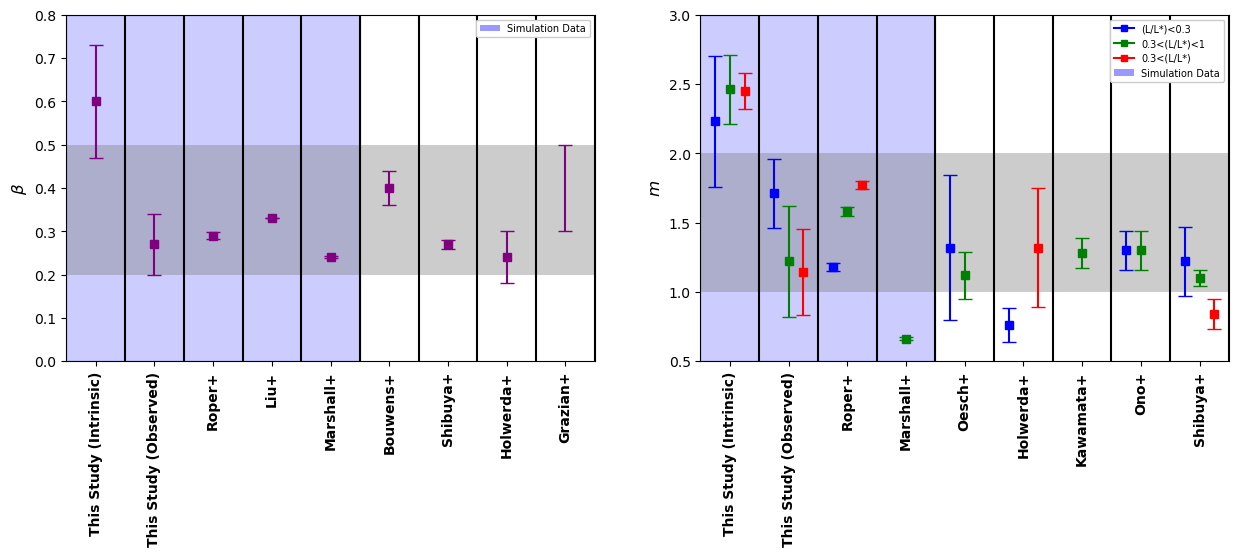

In [11]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import numpy as np

# plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(1, 2, figsize=(15, 4.5))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

xaxis = [-5, 180]
yaxis = [0.60, 0.27, 0.29, 0.33, 0.24, 0.40, 0.27, 0.24, 0.4]
yerrb = [0.13, 0.07, 0.008, 0.0, 0.002, 0.04, 0.01, 0.06, 0.1]
fb1 = [0.2 for x in xaxis]
fb2 = [0.5 for x in xaxis]


ax[0].set_ylim((0, 0.7))
ax[0].set_xlim((0, 180))

ax[0].set_ylabel("$\u03b2$", fontweight="bold")

k = 0
i = 0
lbls = []
lgd = [
    "This Study (Intrinsic)",
    "This Study (Observed)",
    "Roper+",
    "Liu+",
    "Marshall+",
    "Bouwens+",
    "Shibuya+",
    "Holwerda+",
    "Grazian+",
]
while k < 160:
    ax[0].errorbar(k + 10, yaxis[i], yerr=yerrb[i], color="purple", fmt="s", capsize=5)
    ax[0].axvline(x=k + 20, color="black", alpha=1)
    lbls.append(k + 10)
    k += 20
    i += 1
k = 160
ax[0].errorbar(k + 10, yaxis[i], yerr=yerrb[i], color="purple", capsize=5)
ax[0].axvline(x=k + 20, color="black", alpha=1)
lbls.append(k + 10)
ax[0].set_xticks(
    lbls,
    lgd,
    color="black",
    rotation=90,
    fontweight="bold",
    fontsize="10",
    horizontalalignment="center",
)
ax[0].set_yticks(
    np.arange(0, 0.85, 0.1),
    labels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    fontsize=10,
)
ax[0].axvspan(0, 100, alpha=0.2, color="blue")
ax[0].fill_between(xaxis, fb1, fb2, facecolor="gray", alpha=0.4)

# plt.title("Luminosity Relation at z=7")
legend_elements = [Patch(facecolor="blue", alpha=0.4, label="Simulation Data")]

ax[0].legend(handles=legend_elements, loc="best", fontsize=7, framealpha=1)
# plt.savefig("LumComparision.png")


xaxis = [
    -5,
    0,
    5,
    15,
    20,
    25,
    30,
    35,
    40,
    45,
    50,
    55,
    60,
    65,
    70,
    75,
    80,
    85,
    90,
    95,
    100,
    105,
    110,
    115,
    120,
    125,
    130,
    135,
    140,
    160,
    180,
]
yaxis = [
    2.23,
    2.46,
    2.45,
    1.71,
    1.22,
    1.14,
    1.18,
    1.58,
    1.77,
    None,
    0.662,
    None,
    1.32,
    1.12,
    None,
    0.76,
    None,
    1.32,
    None,
    1.28,
    None,
    1.30,
    1.30,
    None,
    1.22,
    1.10,
    0.84,
]

yerrb = [
    0.47,
    0.25,
    0.13,
    0.25,
    0.40,
    0.31,
    0.03,
    0.03,
    0.03,
    None,
    0.009,
    None,
    0.52,
    0.17,
    None,
    0.12,
    None,
    0.43,
    None,
    0.11,
    None,
    0.14,
    0.14,
    None,
    0.25,
    0.06,
    0.11,
]

fb1 = [1.0 for x in xaxis]
fb2 = [2.0 for x in xaxis]


ax[1].set_ylim((0.5, 2.5))
ax[1].set_xlim((0, 180))

ax[1].set_ylabel("$\it{m}$", fontweight="bold")

k = 0
i = 0
lbls = []
lgd = [
    "This Study (Intrinsic)",
    "This Study (Observed)",
    "Roper+",
    "Marshall+",
    "Oesch+",
    "Holwerda+",
    "Kawamata+",
    "Ono+",
    "Shibuya+",
]
while k < 180:
    ax[1].errorbar(k + 5, yaxis[i], yerr=yerrb[i], color="b", fmt="s", capsize=5)
    ax[1].errorbar(
        k + 10, yaxis[i + 1], yerr=yerrb[i + 1], color="g", fmt="s", capsize=5
    )
    ax[1].errorbar(
        k + 15, yaxis[i + 2], yerr=yerrb[i + 2], color="r", fmt="s", capsize=5
    )
    ax[1].axvline(x=k + 20, color="black", alpha=1)
    lbls.append(k + 10)
    k += 20
    i += 3
ax[1].set_xticks(
    lbls,
    lgd,
    color="black",
    rotation=90,
    fontweight="bold",
    fontsize="10",
    horizontalalignment="center",
)
ax[1].set_yticks(
    np.arange(0.5, 3.1, 0.5), labels=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0], fontsize=10
)
ax[1].axvspan(0, 80, alpha=0.2, color="blue")
ax[1].fill_between(xaxis, fb1, fb2, facecolor="gray", alpha=0.4)

legend_elements = [
    Line2D(
        [0],
        [0],
        marker="s",
        label="(L/L*)<0.3",
        markerfacecolor="b",
        color="b",
        markersize=5,
    ),
    Line2D(
        [0],
        [0],
        marker="s",
        label="0.3<(L/L*)<1",
        markerfacecolor="g",
        color="g",
        markersize=5,
    ),
    Line2D(
        [0],
        [0],
        marker="s",
        label="0.3<(L/L*)",
        markerfacecolor="r",
        color="r",
        markersize=5,
    ),
    Patch(facecolor="blue", alpha=0.4, label="Simulation Data"),
]

plt.legend(handles=legend_elements, loc="best", fontsize=7, framealpha=1)
# plt.title("Size Evolution")

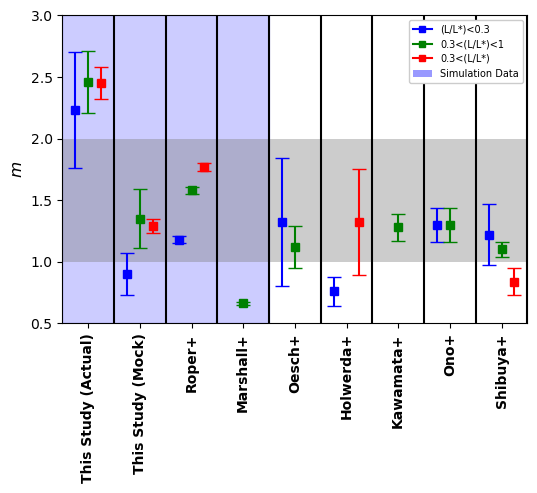

In [12]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.rcParams["figure.figsize"] = [6, 4]

xaxis = [
    -5,
    0,
    5,
    15,
    20,
    25,
    30,
    35,
    40,
    45,
    50,
    55,
    60,
    65,
    70,
    75,
    80,
    85,
    90,
    95,
    100,
    105,
    110,
    115,
    120,
    125,
    130,
    135,
    140,
    160,
    180,
]
yaxis = [
    2.23,
    2.46,
    2.45,
    0.90,
    1.35,
    1.29,
    1.18,
    1.58,
    1.77,
    None,
    0.662,
    None,
    1.32,
    1.12,
    None,
    0.76,
    None,
    1.32,
    None,
    1.28,
    None,
    1.30,
    1.30,
    None,
    1.22,
    1.10,
    0.84,
]

yerrb = [
    0.47,
    0.25,
    0.13,
    0.17,
    0.24,
    0.06,
    0.03,
    0.03,
    0.03,
    None,
    0.009,
    None,
    0.52,
    0.17,
    None,
    0.12,
    None,
    0.43,
    None,
    0.11,
    None,
    0.14,
    0.14,
    None,
    0.25,
    0.06,
    0.11,
]

fb1 = [1.0 for x in xaxis]
fb2 = [2.0 for x in xaxis]


plt.ylim((0.5, 2.5))
plt.xlim((0, 180))

plt.ylabel("$\it{m}$", fontweight="bold")

k = 0
i = 0
lbls = []
lgd = [
    "This Study (Intrinsic)",
    "This Study (Observed)",
    "Roper+",
    "Marshall+",
    "Oesch+",
    "Holwerda+",
    "Kawamata+",
    "Ono+",
    "Shibuya+",
]
while k < 180:
    plt.errorbar(k + 5, yaxis[i], yerr=yerrb[i], color="b", fmt="s", capsize=5)
    plt.errorbar(k + 10, yaxis[i + 1], yerr=yerrb[i + 1], color="g", fmt="s", capsize=5)
    plt.errorbar(k + 15, yaxis[i + 2], yerr=yerrb[i + 2], color="r", fmt="s", capsize=5)
    plt.axvline(x=k + 20, color="black", alpha=1)
    lbls.append(k + 10)
    k += 20
    i += 3
plt.xticks(
    lbls,
    lgd,
    color="black",
    rotation=90,
    fontweight="bold",
    fontsize="10",
    horizontalalignment="center",
)
plt.yticks(np.arange(0.5, 3.1, 0.5), fontsize=10)
plt.axvspan(0, 80, alpha=0.2, color="blue")
plt.fill_between(xaxis, fb1, fb2, facecolor="gray", alpha=0.4)

legend_elements = [
    Line2D(
        [0],
        [0],
        marker="s",
        label="(L/L*)<0.3",
        markerfacecolor="b",
        color="b",
        markersize=5,
    ),
    Line2D(
        [0],
        [0],
        marker="s",
        label="0.3<(L/L*)<1",
        markerfacecolor="g",
        color="g",
        markersize=5,
    ),
    Line2D(
        [0],
        [0],
        marker="s",
        label="0.3<(L/L*)",
        markerfacecolor="r",
        color="r",
        markersize=5,
    ),
    Patch(facecolor="blue", alpha=0.4, label="Simulation Data"),
]

plt.legend(handles=legend_elements, loc="best", fontsize=7, framealpha=1)
# plt.title("Size Evolution")

<>:683: SyntaxWarning: invalid escape sequence '\s'
<>:863: SyntaxWarning: invalid escape sequence '\A'
<>:683: SyntaxWarning: invalid escape sequence '\s'
<>:863: SyntaxWarning: invalid escape sequence '\A'
C:\Users\pauru\AppData\Local\Temp\ipykernel_34808\264668674.py:683: SyntaxWarning: invalid escape sequence '\s'
  ax[1].set_xlabel("log($M_{\star} / M_{\odot}$)")
C:\Users\pauru\AppData\Local\Temp\ipykernel_34808\264668674.py:863: SyntaxWarning: invalid escape sequence '\A'
  ax[1].plot(xaxis,yaxis1,label="Ward+24 3<z<5.5 5000 $\AA$", linestyle='dashed',color="black")
C:\Users\pauru\AppData\Local\Temp\ipykernel_34808\264668674.py:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 12)


[[0.267004 0.004874 0.329415 1.      ]
 [0.262138 0.242286 0.520837 1.      ]
 [0.177423 0.437527 0.557565 1.      ]
 [0.166383 0.690856 0.496502 1.      ]
 [0.525776 0.833491 0.288127 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


C:\Users\pauru\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\pauru\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1562: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\pauru\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\pauru\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1562: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\pauru\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\pauru\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1562: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=ke

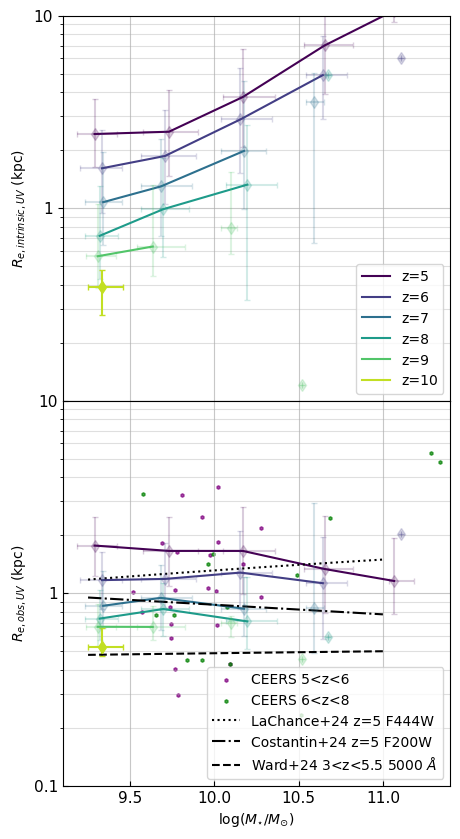

In [17]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import numpy as np

df123 = pd.read_csv('C:/Users/pauru/Documents/SKIRT/run/weights_grid.txt')
mbins = np.arange(9,12,0.5)
weights = numpy.array(df123['weights'])

df = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/table1.csv")
SFR=numpy.array(df["Star Formation Rate"])
Mstar=numpy.array(df["Stellar Mass"])
Mstar=[uk*(10**10) for uk in Mstar]
sSFR=[idk/Mstar[idknum] for idknum,idk in enumerate(SFR)]
df['sStar Formation Rate'] = sSFR
ids=numpy.array(df["ID"])
weights1=[weights[int(x[:-8][-2:])] for x in ids]
df['weights']=weights1

z_5=df.head(3844)
z_6=df.head(5616).tail(1772)
z_7=df.head(6389).tail(773)
z_8=df.head(6720).tail(331)
z_9=df.head(6846).tail(126)
z_10=df.tail(44)

z_5=z_5.sort_values('ID')
z_6=z_6.sort_values('ID')
z_7=z_7.sort_values('ID')
z_8=z_8.sort_values('ID')
z_9=z_9.sort_values('ID')
z_10=z_10.sort_values('ID')

quantiles = [0.84,0.50,0.16]

#imgdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/StatMorphResults15.csv")
imgdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/IRCentres.csv")
z_52=imgdf.head(3844)
z_62=imgdf.head(5616).tail(1772)
z_72=imgdf.head(6389).tail(773)
z_82=imgdf.head(6720).tail(331)
z_92=imgdf.head(6846).tail(126)
z_102=imgdf.tail(44)
z_52=z_52.sort_values('ID')
z_62=z_62.sort_values('ID')
z_72=z_72.sort_values('ID')
z_82=z_82.sort_values('ID')
z_92=z_92.sort_values('ID')
z_102=z_102.sort_values('ID')


from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('viridis', 12)

fig, ax = plt.subplots(2,1, figsize=(5,10), sharex=True)
fig.subplots_adjust(hspace=0,wspace=0)
plt.tick_params(axis='both', which='major', labelsize=11)

binner=numpy.arange(9,11.6,0.5)

Ms=np.array(z_5['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=0.15*np.array(z_5['HLR 250um IR'])
hlruv=0.15*np.array(z_5['UV HLR 1500A'])
wt=np.array(z_5['weights'])
#ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])
ratio = np.array([x/1 for i,x in enumerate(hlruv)])

out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)

yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]

print(xax,yax)
MassBinnedRatio=[]
MassBinnedMass=[]
clr=viridis(np.linspace(0, 1, 7))
ax[0].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[0],fmt='d',capsize=2,alpha=0.2)
ax[0].plot(xax,yax,color=clr[0],label='z=5')



Ms=np.array(z_6['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=0.15*np.array(z_6['HLR 250um IR'])
hlruv=0.15*np.array(z_6['UV HLR 1500A'])
wt=np.array(z_6['weights'])
#ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])
ratio = np.array([x/1 for i,x in enumerate(hlruv)])

out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)

yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[0].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[1],fmt='d',capsize=2,alpha=0.2)
ax[0].plot(xax[:-1],yax[:-1],color=clr[1],label='z=6')

Ms=np.array(z_7['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=0.15*np.array(z_7['HLR 250um IR'])
hlruv=0.15*np.array(z_7['UV HLR 1500A'])
wt=np.array(z_7['weights'])
#ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])
ratio = np.array([x/1 for i,x in enumerate(hlruv)])

out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)

yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[0].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[2],fmt='d',capsize=2,alpha=0.2)
ax[0].plot(xax[:-2],yax[:-2],color=clr[2],label='z=7')




Ms=np.array(z_8['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=0.15*np.array(z_8['HLR 250um IR'])
hlruv=0.15*np.array(z_8['UV HLR 1500A'])
wt=np.array(z_8['weights'])
#ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])
ratio = np.array([x/1 for i,x in enumerate(hlruv)])

out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)

yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[0].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[3],fmt='d',capsize=2,alpha=0.2)
ax[0].plot(xax[:-2],yax[:-2],color=clr[3],label='z=8')



Ms=np.array(z_9['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=0.15*np.array(z_9['HLR 250um IR'])
hlruv=0.15*np.array(z_9['UV HLR 1500A'])
wt=np.array(z_9['weights'])
#ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])
ratio = np.array([x/1 for i,x in enumerate(hlruv)])

out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)

yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[0].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[4],fmt='d',capsize=2,alpha=0.2)
ax[0].plot(xax[:-3],yax[:-3],color=clr[4],label='z=9')


Ms=np.array(z_10['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=0.15*np.array(z_10['HLR 250um IR'])
hlruv=0.15*np.array(z_10['UV HLR 1500A'])
wt=np.array(z_10['weights'])
#ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])
ratio = np.array([x/1 for i,x in enumerate(hlruv)])

out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)

yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
print(xe,ye)
ax[0].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[5],fmt='d',capsize=2,alpha=0.2)
ax[0].scatter(xax[:-4],yax[:-4],color=clr[5],marker='d')
ax[0].plot(xax[:-4],yax[:-4],color=clr[5],label='z=10')

ax[0].legend(loc='best',fontsize=10)
#ax[0].set_xlabel("log$_{10}$(M$_*$) ($M_\u2609$)")
ax[0].set_ylabel("$R_{e,intrinsic,UV}$ (kpc)")

ax[0].set_ylim(0.1,10)
ax[0].set_xlim(9.1,11.4)
ax[0].set_yscale("log")


ax[0].set_yticks([10**0,10**1],labels=[10**0,10**1],fontsize=11)
#plt.xticks(fontsize=11)

#ax[0].grid(which='minor', alpha=0.4,axis='y')
#ax[0].grid(which='major', alpha=0.7,axis='both')




from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy


imgdf1 = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/NewResults.csv")
z_52=imgdf1.head(3844)
z_62=imgdf1.head(5616).tail(1772)
z_72=imgdf1.head(6389).tail(773)
z_82=imgdf1.head(6720).tail(331)
z_92=imgdf1.head(6846).tail(126)
z_102=imgdf1.tail(44)
z_52=z_52.sort_values('ID')
z_62=z_62.sort_values('ID')
z_72=z_72.sort_values('ID')
z_82=z_82.sort_values('ID')
z_92=z_92.sort_values('ID')
z_102=z_102.sort_values('ID')
plt.rcParams.update({'font.size': 15})
plt.tick_params(axis="y",direction="in")
plt.tick_params(axis="x",direction="in")

binner=numpy.arange(9,11.6,0.5)


Ms=np.array(z_5['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlruv=np.array(z_52['HLR circ'])
ratio = np.array([x/1 for i,x in enumerate(hlruv)])
wt=np.array(z_5['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[1].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[0],fmt='d',capsize=2,alpha=0.2)
ax[1].plot(xax,yax,color=clr[0])


Ms=np.array(z_6['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlruv=np.array(z_62['HLR circ'])
ratio = np.array([x/1 for i,x in enumerate(hlruv)])
wt=np.array(z_6['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[1].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[1],fmt='d',capsize=2,alpha=0.2)
ax[1].plot(xax[:-1],yax[:-1],color=clr[1])


Ms=np.array(z_7['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlruv=np.array(z_72['HLR circ'])
ratio = np.array([x/1 for i,x in enumerate(hlruv)])
wt=np.array(z_7['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[1].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[2],fmt='d',capsize=2,alpha=0.2)
ax[1].plot(xax[:-2],yax[:-2],color=clr[2])



Ms=np.array(z_8['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlruv=np.array(z_82['HLR circ'])
ratio = np.array([x/1 for i,x in enumerate(hlruv)])
wt=np.array(z_8['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[1].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[3],fmt='d',capsize=2,alpha=0.2)
ax[1].plot(xax[:-2],yax[:-2],color=clr[3])


Ms=np.array(z_9['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlruv=np.array(z_92['HLR circ'])
ratio = np.array([x/1 for i,x in enumerate(hlruv)])
wt=np.array(z_9['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[1].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[4],fmt='d',capsize=2,alpha=0.2)
ax[1].plot(xax[:-3],yax[:-3],color=clr[4])

Ms=np.array(z_10['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlruv=np.array(z_102['HLR circ'])
ratio = np.array([x/1 for i,x in enumerate(hlruv)])
wt=np.array(z_10['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[1].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[5],fmt='d',capsize=2,alpha=0.2)
ax[1].scatter(xax[:-4],yax[:-4],color=clr[5],marker='d')
ax[1].plot(xax[:-4],yax[:-4],color=clr[5])

ax[1].set_xlabel("log($M_{\star} / M_{\odot}$)")
ax[1].set_ylabel("$R_{e,obs,UV}$ (kpc)")

ax[1].set_ylim(0.1,10)
ax[1].set_xlim(9.1,11.4)
ax[1].set_yscale("log")
#plt.grid()

ax[1].set_yticks([10**-1,10**0,10**1],labels=[10**-1,10**0,10**1],fontsize=11)
#plt.xticks(fontsize=11)
from astropy.io import fits
from astropy import table
import matplotlib.pyplot as plt

# grab the data with 8 being the SC_GEOM HDU index in the FITS file
table_data = table.Table(fits.getdata('C:/Users/pauru/Documents/SKIRT/run/ceers_galfit_results_v5.fits',1))
#array_data = table_data.to_pandas().values
#fits_image_filename = fits.getdata('ceers_galfit_results_v5.fits')

#hdul = fits.open(fits_image_filename)

size=[]
z=[]
mag=[]
flux=[]
magerr=[]
sn=[]
mass=[]
mass2=[]

catalog=table_data

for row in catalog:
    rf = int(row['Restframe_filter'])
    if row['Good Fit'] == True and row['unmasked']==True:
        if row['Bestfit_Mass']>9 and row['RFF_free_sersic'] < 0.5:
            size.append(row['gal_rad_kpc_115'])
            z.append(row['z'])
            mag.append(row['gal_magnitude_115'])
            magerr.append(row['gal_mag_err_115'])
            #flux.append(row['FLUX_APER_f115W'][0])
            #print(row['MAG_APER_f115W'])
            #sn.append(row['SNR_WIN_f150W'])
            sn.append(row['gal_rad_kpc_200'])
            mass.append(row['Bestfit_Mass'])
    
#mag=[-x for x in mag]
CEERSnewdata=[]
count=0
for i,x in enumerate(z):
    if x>=4.5:
        count+=1
        CEERSnewdata.append([x,mag[i],magerr[i],0,size[i],0,0,sn[i]])
#print(count)
#print(mag)
od=table_data.meta
for key, value in od.items():
    print(key, value)
    

m=[]
s=[]
for i,x in enumerate(mass):
    if(z[i]>=5)&(z[i]<=6)&(size[i]<10):
        m.append(x)
        s.append(size[i])
    
ax[1].scatter(m,s,color='purple',alpha=0.7,marker='h',s=6,label="CEERS 5<z<6")



binner=numpy.arange(9,11.6,0.5)
MassBinnedRatio=[]
MassBinnedMass=[]
for i,(b1,b2) in enumerate(zip(binner[:-1],binner[1:])):
    datatemparr=[]
    masstemparr=[]
    for j,x in enumerate(m) :
        if((x >= b1) & (x < b2)):
            #print(x)
            datatemparr.append(s[j])
            masstemparr.append(x)
    #print(masstemparr,datatemparr)
    MassBinnedRatio.append(datatemparr)
    MassBinnedMass.append(masstemparr)
    
yax=[]
xax=[]
y16=[]
y84=[]
x16=[]
x84=[]
for i,x in enumerate(MassBinnedRatio):
    xax.append(numpy.nanmedian(MassBinnedMass[i]))
    x16.append(numpy.nanpercentile(MassBinnedMass[i],16))
    x84.append(numpy.nanpercentile(MassBinnedMass[i],84))
    yax.append(numpy.nanmedian(x))
    y16.append(numpy.nanpercentile(x,16))
    y84.append(numpy.nanpercentile(x,84))

    
yep=[y84[i]-sand for i,sand in enumerate(yax)]
yen=[sand-y16[i] for i,sand in enumerate(yax)]
ye=[yen,yep]

xep=[x84[i]-sand for i,sand in enumerate(xax)]
xen=[sand-x16[i] for i,sand in enumerate(xax)]
xe=[xen,xep]

#ax[1].errorbar(xax,yax,yerr=ye,xerr=xe,color='red',fmt='d',capsize=2,alpha=0.2)
#ax[1].plot(xax,yax,color='red',label='z=9')


m=[]
s=[]
for i,x in enumerate(mass):
    if(z[i]>=6)&(z[i]<=8)&(size[i]<10):
        m.append(x)
        s.append(size[i])
    
ax[1].scatter(m,s,color='green',alpha=0.7,marker='h',s=6,label="CEERS 6<z<8")

binner=numpy.arange(9,11.6,0.5)
MassBinnedRatio=[]
MassBinnedMass=[]
for i,(b1,b2) in enumerate(zip(binner[:-1],binner[1:])):
    datatemparr=[]
    masstemparr=[]
    for j,x in enumerate(m) :
        if((x >= b1) & (x < b2)):
            #print(x)
            datatemparr.append(s[j])
            masstemparr.append(x)
    #print(masstemparr,datatemparr)
    MassBinnedRatio.append(datatemparr)
    MassBinnedMass.append(masstemparr)
    
yax=[]
xax=[]
y16=[]
y84=[]
x16=[]
x84=[]
for i,x in enumerate(MassBinnedRatio):
    xax.append(numpy.nanmedian(MassBinnedMass[i]))
    x16.append(numpy.nanpercentile(MassBinnedMass[i],16))
    x84.append(numpy.nanpercentile(MassBinnedMass[i],84))
    yax.append(numpy.nanmedian(x))
    y16.append(numpy.nanpercentile(x,16))
    y84.append(numpy.nanpercentile(x,84))

    
yep=[y84[i]-sand for i,sand in enumerate(yax)]
yen=[sand-y16[i] for i,sand in enumerate(yax)]
ye=[yen,yep]

xep=[x84[i]-sand for i,sand in enumerate(xax)]
xen=[sand-x16[i] for i,sand in enumerate(xax)]
xe=[xen,xep]

#ax[1].errorbar(xax,yax,yerr=ye,xerr=xe,color='red',fmt='d',capsize=2,alpha=0.2)
#ax[1].plot(xax[:-1],yax[:-1],color='green',label='')
def Constantin(m):
    return 10**(-0.05*m+0.44)

def Astrid(m):
    return 0.182*(m-9)+1.131

    
def Ward(m):
    return 0.41*((m/5)**0.25)

xaxis=numpy.linspace(9.25, 11, num=50)
yaxis=Constantin(xaxis)
yaxis1=Ward(xaxis)
yaxis2=Astrid(xaxis)

#print(yaxis1)
ax[1].plot(xaxis,yaxis2,label="LaChance+24 z=5 F444W", linestyle='dotted',color="black")
ax[1].plot(xaxis,yaxis,label="Costantin+24 z=5 F200W", linestyle='dashdot',color="black")
ax[1].plot(xaxis,yaxis1,label="Ward+24 3<z<5.5 5000 $\AA$", linestyle='dashed',color="black")



ax[1].legend(loc='lower right',fontsize=10)
#ax[1].grid(which='minor', alpha=0.4,axis='y')
#ax[1].grid(which='major', alpha=0.7,axis='both')

#plt.savefig("C:/Users/pauru/Downloads/UVMass.png")

In [ ]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import numpy as np

df123 = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/weights_grid.txt")
mbins = np.arange(9, 12, 0.5)
weights = numpy.array(df123["weights"])

df = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/table1.csv")
SFR = numpy.array(df["Star Formation Rate"])
Mstar = numpy.array(df["Stellar Mass"])
Mstar = [uk * (10**10) for uk in Mstar]
sSFR = [idk / Mstar[idknum] for idknum, idk in enumerate(SFR)]
df["sStar Formation Rate"] = sSFR
ids = numpy.array(df["ID"])
weights1 = [weights[int(x[:-8][-2:])] for x in ids]
df["weights"] = weights1

z_5 = df.head(3844)
z_6 = df.head(5616).tail(1772)
z_7 = df.head(6389).tail(773)
z_8 = df.head(6720).tail(331)
z_9 = df.head(6846).tail(126)
z_10 = df.tail(44)

z_5 = z_5.sort_values("ID")
z_6 = z_6.sort_values("ID")
z_7 = z_7.sort_values("ID")
z_8 = z_8.sort_values("ID")
z_9 = z_9.sort_values("ID")
z_10 = z_10.sort_values("ID")

quantiles = [0.84, 0.50, 0.16]
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy

fig, ax = plt.subplots(2, 1, figsize=(5, 10), sharex=True)
fig.subplots_adjust(hspace=0, wspace=0)
plt.tick_params(axis="both", which="major", labelsize=11)

df = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/table1.csv")
z_5 = df.head(3844)
z_6 = df.head(5616).tail(1772)
z_7 = df.head(6389).tail(773)
z_8 = df.head(6720).tail(331)
z_9 = df.head(6846).tail(126)
z_10 = df.tail(44)
z_5 = z_5.sort_values("ID")
z_6 = z_6.sort_values("ID")
z_7 = z_7.sort_values("ID")
z_8 = z_8.sort_values("ID")
z_9 = z_9.sort_values("ID")
z_10 = z_10.sort_values("ID")
# imgdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/StatMorphResults15.csv")
imgdf1 = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/NewResults50.csv")
z_52 = imgdf1.head(3844)
z_62 = imgdf1.head(5616).tail(1772)
z_72 = imgdf1.head(6389).tail(773)
z_82 = imgdf1.head(6720).tail(331)
z_92 = imgdf1.head(6846).tail(126)
z_102 = imgdf1.tail(44)
z_52 = z_52.sort_values("ID")
z_62 = z_62.sort_values("ID")
z_72 = z_72.sort_values("ID")
z_82 = z_82.sort_values("ID")
z_92 = z_92.sort_values("ID")
z_102 = z_102.sort_values("ID")
plt.rcParams.update({"font.size": 15})
plt.tick_params(axis="y", direction="in")
plt.tick_params(axis="x", direction="in")

binner = numpy.arange(9, 11.6, 0.5)
Ms = np.array(df["Stellar Mass"])
mtrue1 = [x * 1e10 for x in Ms]

hlrir = 0.15 * np.array(df["HLR 250um IR"])
# hlruv=0.15*np.array(df['UV HLR 1500A'])
hlruv = np.array(imgdf1["HLR circ"])

Ms = np.array(z_5["Stellar Mass"])
mtrue1 = [x * 1e10 for x in Ms]
hlruv = np.array(z_52["HLR circ"])

# ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])
ratio = np.array([x / 1 for i, x in enumerate(hlruv)])
MassBinnedRatio = []
MassBinnedMass = []
clr = ["red", "orange", "#fcdb03", "green", "blue", "purple"]
clr = viridis(np.linspace(0, 1, 7))
for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    datatemparr = []
    masstemparr = []
    for j, x in enumerate(mtrue1):
        if (x >= 10**b1) & (x < 10**b2):
            datatemparr.append(ratio[j])
            masstemparr.append(x)
    MassBinnedRatio.append(datatemparr)
    MassBinnedMass.append(masstemparr)

yax = []
xax = []
y16 = []
y84 = []
x16 = []
x84 = []
for i, x in enumerate(MassBinnedRatio):
    xax.append(numpy.log10(numpy.nanmedian(MassBinnedMass[i])))
    x16.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 16)))
    x84.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 84)))
    yax.append(numpy.nanmedian(x))
    y16.append(numpy.nanpercentile(x, 16))
    y84.append(numpy.nanpercentile(x, 84))

yep = [y84[i] - sand for i, sand in enumerate(yax)]
yen = [sand - y16[i] for i, sand in enumerate(yax)]
ye = [yen, yep]

xep = [x84[i] - sand for i, sand in enumerate(xax)]
xen = [sand - x16[i] for i, sand in enumerate(xax)]
xe = [xen, xep]


ax[0].errorbar(xax, yax, yerr=ye, xerr=xe, color=clr[0], fmt="d", capsize=2, alpha=0.2)
ax[0].plot(xax, yax, color=clr[0])


Ms = np.array(z_6["Stellar Mass"])
mtrue1 = [x * 1e10 for x in Ms]
hlruv = np.array(z_62["HLR circ"])
ratio = np.array([x / 1 for i, x in enumerate(hlruv)])
MassBinnedRatio = []
MassBinnedMass = []
clr = ["red", "orange", "#fcdb03", "green", "blue", "purple"]
clr = viridis(np.linspace(0, 1, 7))
for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    datatemparr = []
    masstemparr = []
    for j, x in enumerate(mtrue1):
        if (x >= 10**b1) & (x < 10**b2):
            datatemparr.append(ratio[j])
            masstemparr.append(x)
    MassBinnedRatio.append(datatemparr)
    MassBinnedMass.append(masstemparr)

yax = []
xax = []
y16 = []
y84 = []
x16 = []
x84 = []
for i, x in enumerate(MassBinnedRatio):
    xax.append(numpy.log10(numpy.nanmedian(MassBinnedMass[i])))
    x16.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 16)))
    x84.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 84)))
    yax.append(numpy.nanmedian(x))
    y16.append(numpy.nanpercentile(x, 16))
    y84.append(numpy.nanpercentile(x, 84))

yep = [y84[i] - sand for i, sand in enumerate(yax)]
yen = [sand - y16[i] for i, sand in enumerate(yax)]
ye = [yen, yep]

xep = [x84[i] - sand for i, sand in enumerate(xax)]
xen = [sand - x16[i] for i, sand in enumerate(xax)]
xe = [xen, xep]


ax[0].errorbar(xax, yax, yerr=ye, xerr=xe, color=clr[1], fmt="d", capsize=2, alpha=0.2)
ax[0].plot(xax[:-1], yax[:-1], color=clr[1])


Ms = np.array(z_7["Stellar Mass"])
mtrue1 = [x * 1e10 for x in Ms]
hlruv = np.array(z_72["HLR circ"])
ratio = np.array([x / 1 for i, x in enumerate(hlruv)])
MassBinnedRatio = []
MassBinnedMass = []
clr = ["red", "orange", "#fcdb03", "green", "blue", "purple"]
clr = viridis(np.linspace(0, 1, 7))
for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    datatemparr = []
    masstemparr = []
    for j, x in enumerate(mtrue1):
        if (x >= 10**b1) & (x < 10**b2):
            datatemparr.append(ratio[j])
            masstemparr.append(x)
    MassBinnedRatio.append(datatemparr)
    MassBinnedMass.append(masstemparr)

yax = []
xax = []
y16 = []
y84 = []
x16 = []
x84 = []
for i, x in enumerate(MassBinnedRatio):
    xax.append(numpy.log10(numpy.nanmedian(MassBinnedMass[i])))
    x16.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 16)))
    x84.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 84)))
    yax.append(numpy.nanmedian(x))
    y16.append(numpy.nanpercentile(x, 16))
    y84.append(numpy.nanpercentile(x, 84))

yep = [y84[i] - sand for i, sand in enumerate(yax)]
yen = [sand - y16[i] for i, sand in enumerate(yax)]
ye = [yen, yep]

xep = [x84[i] - sand for i, sand in enumerate(xax)]
xen = [sand - x16[i] for i, sand in enumerate(xax)]
xe = [xen, xep]


ax[0].errorbar(xax, yax, yerr=ye, xerr=xe, color=clr[2], fmt="d", capsize=2, alpha=0.2)
ax[0].plot(xax[:-2], yax[:-2], color=clr[2])


Ms = np.array(z_8["Stellar Mass"])
mtrue1 = [x * 1e10 for x in Ms]
hlruv = np.array(z_82["HLR circ"])
ratio = np.array([x / 1 for i, x in enumerate(hlruv)])
MassBinnedRatio = []
MassBinnedMass = []
clr = ["red", "orange", "#fcdb03", "green", "blue", "purple"]
clr = viridis(np.linspace(0, 1, 7))
for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    datatemparr = []
    masstemparr = []
    for j, x in enumerate(mtrue1):
        if (x >= 10**b1) & (x < 10**b2):
            datatemparr.append(ratio[j])
            masstemparr.append(x)
    MassBinnedRatio.append(datatemparr)
    MassBinnedMass.append(masstemparr)

yax = []
xax = []
y16 = []
y84 = []
x16 = []
x84 = []
for i, x in enumerate(MassBinnedRatio):
    xax.append(numpy.log10(numpy.nanmedian(MassBinnedMass[i])))
    x16.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 16)))
    x84.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 84)))
    yax.append(numpy.nanmedian(x))
    y16.append(numpy.nanpercentile(x, 16))
    y84.append(numpy.nanpercentile(x, 84))

yep = [y84[i] - sand for i, sand in enumerate(yax)]
yen = [sand - y16[i] for i, sand in enumerate(yax)]
ye = [yen, yep]

xep = [x84[i] - sand for i, sand in enumerate(xax)]
xen = [sand - x16[i] for i, sand in enumerate(xax)]
xe = [xen, xep]


ax[0].errorbar(xax, yax, yerr=ye, xerr=xe, color=clr[3], fmt="d", capsize=2, alpha=0.2)
ax[0].plot(xax[:-2], yax[:-2], color=clr[3])


Ms = np.array(z_9["Stellar Mass"])
mtrue1 = [x * 1e10 for x in Ms]
hlruv = np.array(z_92["HLR circ"])
ratio = np.array([x / 1 for i, x in enumerate(hlruv)])
MassBinnedRatio = []
MassBinnedMass = []
clr = ["red", "orange", "#fcdb03", "green", "blue", "purple"]
clr = viridis(np.linspace(0, 1, 7))
for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    datatemparr = []
    masstemparr = []
    for j, x in enumerate(mtrue1):
        if (x >= 10**b1) & (x < 10**b2):
            datatemparr.append(ratio[j])
            masstemparr.append(x)
    MassBinnedRatio.append(datatemparr)
    MassBinnedMass.append(masstemparr)

yax = []
xax = []
y16 = []
y84 = []
x16 = []
x84 = []
for i, x in enumerate(MassBinnedRatio):
    xax.append(numpy.log10(numpy.nanmedian(MassBinnedMass[i])))
    x16.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 16)))
    x84.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 84)))
    yax.append(numpy.nanmedian(x))
    y16.append(numpy.nanpercentile(x, 16))
    y84.append(numpy.nanpercentile(x, 84))

yep = [y84[i] - sand for i, sand in enumerate(yax)]
yen = [sand - y16[i] for i, sand in enumerate(yax)]
ye = [yen, yep]

xep = [x84[i] - sand for i, sand in enumerate(xax)]
xen = [sand - x16[i] for i, sand in enumerate(xax)]
xe = [xen, xep]


ax[0].errorbar(xax, yax, yerr=ye, xerr=xe, color=clr[4], fmt="d", capsize=2, alpha=0.2)
ax[0].plot(xax[:-3], yax[:-3], color=clr[4])

Ms = np.array(z_10["Stellar Mass"])
mtrue1 = [x * 1e10 for x in Ms]
hlruv = np.array(z_102["HLR circ"])
ratio = np.array([x / 1 for i, x in enumerate(hlruv)])
MassBinnedRatio = []
MassBinnedMass = []
clr = ["red", "orange", "#fcdb03", "green", "blue", "purple"]
clr = viridis(np.linspace(0, 1, 7))
for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    datatemparr = []
    masstemparr = []
    for j, x in enumerate(mtrue1):
        if (x >= 10**b1) & (x < 10**b2):
            datatemparr.append(ratio[j])
            masstemparr.append(x)
    MassBinnedRatio.append(datatemparr)
    MassBinnedMass.append(masstemparr)

yax = []
xax = []
y16 = []
y84 = []
x16 = []
x84 = []
for i, x in enumerate(MassBinnedRatio):
    xax.append(numpy.log10(numpy.nanmedian(MassBinnedMass[i])))
    x16.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 16)))
    x84.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 84)))
    yax.append(numpy.nanmedian(x))
    y16.append(numpy.nanpercentile(x, 16))
    y84.append(numpy.nanpercentile(x, 84))

yep = [y84[i] - sand for i, sand in enumerate(yax)]
yen = [sand - y16[i] for i, sand in enumerate(yax)]
ye = [yen[:-4], yep[:-4]]

xep = [x84[i] - sand for i, sand in enumerate(xax)]
xen = [sand - x16[i] for i, sand in enumerate(xax)]
xe = [xen[:-4], xep[:-4]]


ax[0].errorbar(xax[:-4], yax[:-4], yerr=ye, xerr=xe, color=clr[5], fmt="d", capsize=2)
ax[0].plot(
    xax[:-4],
    yax[:-4],
    color=clr[5],
)


ax[1].set_xlabel("log($M_{\star} / M_{\odot}$)")
ax[0].set_ylabel("$R_{e,obs,UV,SNR=50}$ (kpc)")

ax[0].set_ylim(0.1, 10)
ax[0].set_xlim(9.1, 11.4)
ax[0].set_yscale("log")
# plt.grid()

ax[0].set_yticks([10**-1, 10**0, 10**1], labels=[10**-1, 10**0, 10**1], fontsize=11)
# plt.xticks(fontsize=11)
from astropy.io import fits
from astropy import table
import matplotlib.pyplot as plt

# grab the data with 8 being the SC_GEOM HDU index in the FITS file
table_data = table.Table(fits.getdata("ceers_galfit_results_v5.fits", 1))
# array_data = table_data.to_pandas().values
# fits_image_filename = fits.getdata('ceers_galfit_results_v5.fits')

# hdul = fits.open(fits_image_filename)

size = []
z = []
mag = []
flux = []
magerr = []
sn = []
mass = []
mass2 = []

catalog = table_data

for row in catalog:
    rf = int(row["Restframe_filter"])
    if row["Good Fit"] == True and row["unmasked"] == True:
        if row["Bestfit_Mass"] > 9 and row["RFF_free_sersic"] < 0.5:
            size.append(row["gal_rad_kpc_115"])
            z.append(row["z"])
            mag.append(row["gal_magnitude_115"])
            magerr.append(row["gal_mag_err_115"])
            # flux.append(row['FLUX_APER_f115W'][0])
            # print(row['MAG_APER_f115W'])
            # sn.append(row['SNR_WIN_f150W'])
            sn.append(row["gal_rad_kpc_200"])
            mass.append(row["Bestfit_Mass"])

# mag=[-x for x in mag]
CEERSnewdata = []
count = 0
for i, x in enumerate(z):
    if x >= 4.5:
        count += 1
        CEERSnewdata.append([x, mag[i], magerr[i], 0, size[i], 0, 0, sn[i]])
# print(count)
# print(mag)
od = table_data.meta
for key, value in od.items():
    print(key, value)


m = []
s = []
for i, x in enumerate(mass):
    if (z[i] >= 5) & (z[i] <= 6) & (size[i] < 10):
        m.append(x)
        s.append(size[i])

# ax[1].scatter(m,s,color='purple',alpha=0.7,marker='h',s=6,label="CEERS 5<z<6")


binner = numpy.arange(9, 11.6, 0.5)
MassBinnedRatio = []
MassBinnedMass = []
for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    datatemparr = []
    masstemparr = []
    for j, x in enumerate(m):
        if (x >= b1) & (x < b2):
            # print(x)
            datatemparr.append(s[j])
            masstemparr.append(x)
    # print(masstemparr,datatemparr)
    MassBinnedRatio.append(datatemparr)
    MassBinnedMass.append(masstemparr)

yax = []
xax = []
y16 = []
y84 = []
x16 = []
x84 = []
for i, x in enumerate(MassBinnedRatio):
    xax.append(numpy.nanmedian(MassBinnedMass[i]))
    x16.append(numpy.nanpercentile(MassBinnedMass[i], 16))
    x84.append(numpy.nanpercentile(MassBinnedMass[i], 84))
    yax.append(numpy.nanmedian(x))
    y16.append(numpy.nanpercentile(x, 16))
    y84.append(numpy.nanpercentile(x, 84))


yep = [y84[i] - sand for i, sand in enumerate(yax)]
yen = [sand - y16[i] for i, sand in enumerate(yax)]
ye = [yen, yep]

xep = [x84[i] - sand for i, sand in enumerate(xax)]
xen = [sand - x16[i] for i, sand in enumerate(xax)]
xe = [xen, xep]

# ax[1].errorbar(xax,yax,yerr=ye,xerr=xe,color='red',fmt='d',capsize=2,alpha=0.2)
# ax[1].plot(xax,yax,color='red',label='z=9')


m = []
s = []
for i, x in enumerate(mass):
    if (z[i] >= 6) & (z[i] <= 8) & (size[i] < 10):
        m.append(x)
        s.append(size[i])

# ax[1].scatter(m,s,color='green',alpha=0.7,marker='h',s=6,label="CEERS 6<z<8")

binner = numpy.arange(9, 11.6, 0.5)
MassBinnedRatio = []
MassBinnedMass = []
for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    datatemparr = []
    masstemparr = []
    for j, x in enumerate(m):
        if (x >= b1) & (x < b2):
            # print(x)
            datatemparr.append(s[j])
            masstemparr.append(x)
    # print(masstemparr,datatemparr)
    MassBinnedRatio.append(datatemparr)
    MassBinnedMass.append(masstemparr)

yax = []
xax = []
y16 = []
y84 = []
x16 = []
x84 = []
for i, x in enumerate(MassBinnedRatio):
    xax.append(numpy.nanmedian(MassBinnedMass[i]))
    x16.append(numpy.nanpercentile(MassBinnedMass[i], 16))
    x84.append(numpy.nanpercentile(MassBinnedMass[i], 84))
    yax.append(numpy.nanmedian(x))
    y16.append(numpy.nanpercentile(x, 16))
    y84.append(numpy.nanpercentile(x, 84))


yep = [y84[i] - sand for i, sand in enumerate(yax)]
yen = [sand - y16[i] for i, sand in enumerate(yax)]
ye = [yen, yep]

xep = [x84[i] - sand for i, sand in enumerate(xax)]
xen = [sand - x16[i] for i, sand in enumerate(xax)]
xe = [xen, xep]


# ax[1].errorbar(xax,yax,yerr=ye,xerr=xe,color='red',fmt='d',capsize=2,alpha=0.2)
# ax[1].plot(xax[:-1],yax[:-1],color='green',label='')
def Constantin(m):
    return 10 ** (-0.05 * m + 0.44)


def Ward(m):
    return 0.41 * ((m / 5) ** 0.25)


# xaxis=numpy.linspace(9.25, 11, num=50)
# yaxis=Constantin(xaxis)
# yaxis1=Ward(xaxis)
# print(yaxis1)
# ax[1].plot(xaxis,yaxis,label="Constantin+24 z=5 F200W", linestyle='dashdot',color="black")
# ax[1].plot(xaxis,yaxis1,label="Ward+24 3<z<5.5 5000 $\AA$", linestyle='dashed',color="black")

ax[1].legend(loc="lower right", fontsize=10)
ax[1].grid(which="minor", alpha=0.4, axis="y")
ax[1].grid(which="major", alpha=0.7, axis="both")


from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy

df = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/table1.csv")
z_5 = df.head(3844)
z_6 = df.head(5616).tail(1772)
z_7 = df.head(6389).tail(773)
z_8 = df.head(6720).tail(331)
z_9 = df.head(6846).tail(126)
z_10 = df.tail(44)
z_5 = z_5.sort_values("ID")
z_6 = z_6.sort_values("ID")
z_7 = z_7.sort_values("ID")
z_8 = z_8.sort_values("ID")
z_9 = z_9.sort_values("ID")
z_10 = z_10.sort_values("ID")
# imgdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/StatMorphResults15.csv")
imgdf1 = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/NewResults100.csv")
z_52 = imgdf1.head(3844)
z_62 = imgdf1.head(5616).tail(1772)
z_72 = imgdf1.head(6389).tail(773)
z_82 = imgdf1.head(6720).tail(331)
z_92 = imgdf1.head(6846).tail(126)
z_102 = imgdf1.tail(44)
z_52 = z_52.sort_values("ID")
z_62 = z_62.sort_values("ID")
z_72 = z_72.sort_values("ID")
z_82 = z_82.sort_values("ID")
z_92 = z_92.sort_values("ID")
z_102 = z_102.sort_values("ID")
plt.rcParams.update({"font.size": 15})
plt.tick_params(axis="y", direction="in")
plt.tick_params(axis="x", direction="in")

binner = numpy.arange(9, 11.6, 0.5)
Ms = np.array(df["Stellar Mass"])
mtrue1 = [x * 1e10 for x in Ms]

hlrir = 0.15 * np.array(df["HLR 250um IR"])
# hlruv=0.15*np.array(df['UV HLR 1500A'])
hlruv = np.array(imgdf1["HLR circ"])

Ms = np.array(z_5["Stellar Mass"])
mtrue1 = [x * 1e10 for x in Ms]
hlruv = np.array(z_52["HLR circ"])

# ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])
ratio = np.array([x / 1 for i, x in enumerate(hlruv)])
MassBinnedRatio = []
MassBinnedMass = []
clr = ["red", "orange", "#fcdb03", "green", "blue", "purple"]
clr = viridis(np.linspace(0, 1, 7))
for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    datatemparr = []
    masstemparr = []
    for j, x in enumerate(mtrue1):
        if (x >= 10**b1) & (x < 10**b2):
            datatemparr.append(ratio[j])
            masstemparr.append(x)
    MassBinnedRatio.append(datatemparr)
    MassBinnedMass.append(masstemparr)

yax = []
xax = []
y16 = []
y84 = []
x16 = []
x84 = []
for i, x in enumerate(MassBinnedRatio):
    xax.append(numpy.log10(numpy.nanmedian(MassBinnedMass[i])))
    x16.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 16)))
    x84.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 84)))
    yax.append(numpy.nanmedian(x))
    y16.append(numpy.nanpercentile(x, 16))
    y84.append(numpy.nanpercentile(x, 84))

yep = [y84[i] - sand for i, sand in enumerate(yax)]
yen = [sand - y16[i] for i, sand in enumerate(yax)]
ye = [yen, yep]

xep = [x84[i] - sand for i, sand in enumerate(xax)]
xen = [sand - x16[i] for i, sand in enumerate(xax)]
xe = [xen, xep]


ax[1].errorbar(xax, yax, yerr=ye, xerr=xe, color=clr[0], fmt="d", capsize=2, alpha=0.2)
ax[1].plot(xax, yax, color=clr[0], label="z=5")


Ms = np.array(z_6["Stellar Mass"])
mtrue1 = [x * 1e10 for x in Ms]
hlruv = np.array(z_62["HLR circ"])
ratio = np.array([x / 1 for i, x in enumerate(hlruv)])
MassBinnedRatio = []
MassBinnedMass = []
clr = ["red", "orange", "#fcdb03", "green", "blue", "purple"]
clr = viridis(np.linspace(0, 1, 7))
for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    datatemparr = []
    masstemparr = []
    for j, x in enumerate(mtrue1):
        if (x >= 10**b1) & (x < 10**b2):
            datatemparr.append(ratio[j])
            masstemparr.append(x)
    MassBinnedRatio.append(datatemparr)
    MassBinnedMass.append(masstemparr)

yax = []
xax = []
y16 = []
y84 = []
x16 = []
x84 = []
for i, x in enumerate(MassBinnedRatio):
    xax.append(numpy.log10(numpy.nanmedian(MassBinnedMass[i])))
    x16.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 16)))
    x84.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 84)))
    yax.append(numpy.nanmedian(x))
    y16.append(numpy.nanpercentile(x, 16))
    y84.append(numpy.nanpercentile(x, 84))

yep = [y84[i] - sand for i, sand in enumerate(yax)]
yen = [sand - y16[i] for i, sand in enumerate(yax)]
ye = [yen, yep]

xep = [x84[i] - sand for i, sand in enumerate(xax)]
xen = [sand - x16[i] for i, sand in enumerate(xax)]
xe = [xen, xep]


ax[1].errorbar(xax, yax, yerr=ye, xerr=xe, color=clr[1], fmt="d", capsize=2, alpha=0.2)
ax[1].plot(xax[:-1], yax[:-1], color=clr[1], label="z=6")


Ms = np.array(z_7["Stellar Mass"])
mtrue1 = [x * 1e10 for x in Ms]
hlruv = np.array(z_72["HLR circ"])
ratio = np.array([x / 1 for i, x in enumerate(hlruv)])
MassBinnedRatio = []
MassBinnedMass = []
clr = ["red", "orange", "#fcdb03", "green", "blue", "purple"]
clr = viridis(np.linspace(0, 1, 7))
for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    datatemparr = []
    masstemparr = []
    for j, x in enumerate(mtrue1):
        if (x >= 10**b1) & (x < 10**b2):
            datatemparr.append(ratio[j])
            masstemparr.append(x)
    MassBinnedRatio.append(datatemparr)
    MassBinnedMass.append(masstemparr)

yax = []
xax = []
y16 = []
y84 = []
x16 = []
x84 = []
for i, x in enumerate(MassBinnedRatio):
    xax.append(numpy.log10(numpy.nanmedian(MassBinnedMass[i])))
    x16.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 16)))
    x84.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 84)))
    yax.append(numpy.nanmedian(x))
    y16.append(numpy.nanpercentile(x, 16))
    y84.append(numpy.nanpercentile(x, 84))

yep = [y84[i] - sand for i, sand in enumerate(yax)]
yen = [sand - y16[i] for i, sand in enumerate(yax)]
ye = [yen, yep]

xep = [x84[i] - sand for i, sand in enumerate(xax)]
xen = [sand - x16[i] for i, sand in enumerate(xax)]
xe = [xen, xep]


ax[1].errorbar(xax, yax, yerr=ye, xerr=xe, color=clr[2], fmt="d", capsize=2, alpha=0.2)
ax[1].plot(xax[:-2], yax[:-2], color=clr[2], label="z=7")


Ms = np.array(z_8["Stellar Mass"])
mtrue1 = [x * 1e10 for x in Ms]
hlruv = np.array(z_82["HLR circ"])
ratio = np.array([x / 1 for i, x in enumerate(hlruv)])
MassBinnedRatio = []
MassBinnedMass = []
clr = ["red", "orange", "#fcdb03", "green", "blue", "purple"]
clr = viridis(np.linspace(0, 1, 7))
for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    datatemparr = []
    masstemparr = []
    for j, x in enumerate(mtrue1):
        if (x >= 10**b1) & (x < 10**b2):
            datatemparr.append(ratio[j])
            masstemparr.append(x)
    MassBinnedRatio.append(datatemparr)
    MassBinnedMass.append(masstemparr)

yax = []
xax = []
y16 = []
y84 = []
x16 = []
x84 = []
for i, x in enumerate(MassBinnedRatio):
    xax.append(numpy.log10(numpy.nanmedian(MassBinnedMass[i])))
    x16.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 16)))
    x84.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 84)))
    yax.append(numpy.nanmedian(x))
    y16.append(numpy.nanpercentile(x, 16))
    y84.append(numpy.nanpercentile(x, 84))

yep = [y84[i] - sand for i, sand in enumerate(yax)]
yen = [sand - y16[i] for i, sand in enumerate(yax)]
ye = [yen, yep]

xep = [x84[i] - sand for i, sand in enumerate(xax)]
xen = [sand - x16[i] for i, sand in enumerate(xax)]
xe = [xen, xep]


ax[1].errorbar(xax, yax, yerr=ye, xerr=xe, color=clr[3], fmt="d", capsize=2, alpha=0.2)
ax[1].plot(xax[:-2], yax[:-2], color=clr[3], label="z=8")


Ms = np.array(z_9["Stellar Mass"])
mtrue1 = [x * 1e10 for x in Ms]
hlruv = np.array(z_92["HLR circ"])
ratio = np.array([x / 1 for i, x in enumerate(hlruv)])
MassBinnedRatio = []
MassBinnedMass = []
clr = ["red", "orange", "#fcdb03", "green", "blue", "purple"]
clr = viridis(np.linspace(0, 1, 7))
for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    datatemparr = []
    masstemparr = []
    for j, x in enumerate(mtrue1):
        if (x >= 10**b1) & (x < 10**b2):
            datatemparr.append(ratio[j])
            masstemparr.append(x)
    MassBinnedRatio.append(datatemparr)
    MassBinnedMass.append(masstemparr)

yax = []
xax = []
y16 = []
y84 = []
x16 = []
x84 = []
for i, x in enumerate(MassBinnedRatio):
    xax.append(numpy.log10(numpy.nanmedian(MassBinnedMass[i])))
    x16.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 16)))
    x84.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 84)))
    yax.append(numpy.nanmedian(x))
    y16.append(numpy.nanpercentile(x, 16))
    y84.append(numpy.nanpercentile(x, 84))

yep = [y84[i] - sand for i, sand in enumerate(yax)]
yen = [sand - y16[i] for i, sand in enumerate(yax)]
ye = [yen, yep]

xep = [x84[i] - sand for i, sand in enumerate(xax)]
xen = [sand - x16[i] for i, sand in enumerate(xax)]
xe = [xen, xep]


ax[1].errorbar(xax, yax, yerr=ye, xerr=xe, color=clr[4], fmt="d", capsize=2, alpha=0.2)
ax[1].plot(xax[:-3], yax[:-3], color=clr[4], label="z=9")

Ms = np.array(z_10["Stellar Mass"])
mtrue1 = [x * 1e10 for x in Ms]
hlruv = np.array(z_102["HLR circ"])
ratio = np.array([x / 1 for i, x in enumerate(hlruv)])
MassBinnedRatio = []
MassBinnedMass = []
clr = ["red", "orange", "#fcdb03", "green", "blue", "purple"]
clr = viridis(np.linspace(0, 1, 7))
for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    datatemparr = []
    masstemparr = []
    for j, x in enumerate(mtrue1):
        if (x >= 10**b1) & (x < 10**b2):
            datatemparr.append(ratio[j])
            masstemparr.append(x)
    MassBinnedRatio.append(datatemparr)
    MassBinnedMass.append(masstemparr)

yax = []
xax = []
y16 = []
y84 = []
x16 = []
x84 = []
for i, x in enumerate(MassBinnedRatio):
    xax.append(numpy.log10(numpy.nanmedian(MassBinnedMass[i])))
    x16.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 16)))
    x84.append(numpy.log10(numpy.nanpercentile(MassBinnedMass[i], 84)))
    yax.append(numpy.nanmedian(x))
    y16.append(numpy.nanpercentile(x, 16))
    y84.append(numpy.nanpercentile(x, 84))

yep = [y84[i] - sand for i, sand in enumerate(yax)]
yen = [sand - y16[i] for i, sand in enumerate(yax)]
ye = [yen[:-4], yep[:-4]]

xep = [x84[i] - sand for i, sand in enumerate(xax)]
xen = [sand - x16[i] for i, sand in enumerate(xax)]
xe = [xen[:-4], xep[:-4]]


ax[1].errorbar(xax[:-4], yax[:-4], yerr=ye, xerr=xe, color=clr[5], fmt="d", capsize=2)
ax[1].plot(xax[:-4], yax[:-4], color=clr[5], label="z=10")


ax[1].set_xlabel("log($M_{\star} / M_{\odot}$)")
ax[1].set_ylabel("$R_{e,obs,UV,SNR=100}$ (kpc)")

ax[1].set_ylim(0.1, 10)
ax[1].set_xlim(9.1, 11.4)
ax[1].set_yscale("log")
# plt.grid()

ax[1].set_yticks([10**-1, 10**0], labels=[10**-1, 10**0], fontsize=11)

ax[1].legend(loc="lower right", fontsize=10)
ax[0].grid(which="minor", alpha=0.4, axis="y")
ax[0].grid(which="major", alpha=0.7, axis="both")

ax[1].grid(which="minor", alpha=0.4, axis="y")
ax[1].grid(which="major", alpha=0.7, axis="both")

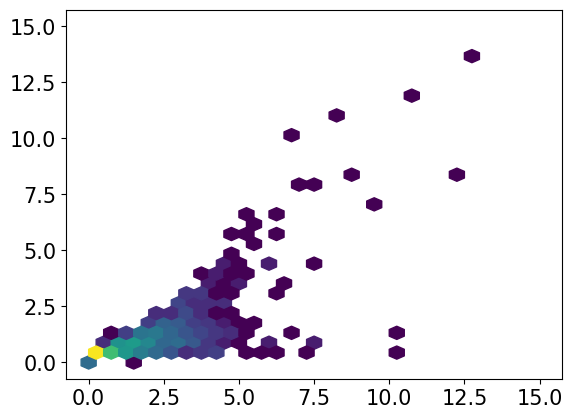

In [3]:
import matplotlib.pyplot as plt
import numpy

# print(numpy.log10(6171))
im2 = plt.hexbin(
    numpy.array(0.15 * compdf["HLR 156um"]),
    numpy.array(0.15 * almadf["HLR"]),
    gridsize=30,
    extent=[0, 15, 0, 15],
    cmap="viridis",
    bins="log",
    vmax=10**3.7903555464143865,
)
plt.show()

ModuleNotFoundError: No module named 'astroML'

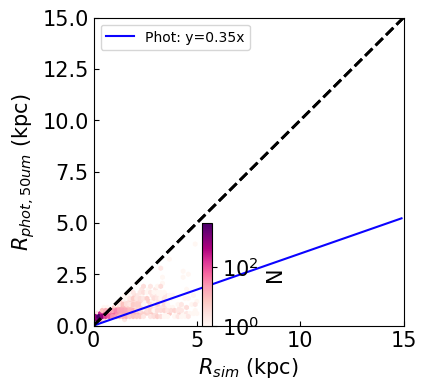

In [5]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy
import matplotlib.colors as colors
from matplotlib import path
import numpy as np


fig, ax = plt.subplots(1, 1, figsize=(4, 4))

plt.rcParams.update({"font.size": 15})
plt.tick_params(axis="y", direction="in")
plt.tick_params(axis="x", direction="in")

almadf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/AlmaTrad.csv")
irdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/IRCentres.csv")
compdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/almacomparision.csv")

almadf = almadf.sort_values("ID")
compdf = compdf.sort_values("ID")
irdf = irdf.sort_values("ID")

z = compdf["Redshift"]
im = ax.hexbin(
    0.15 * compdf["HLR 156um"],
    irdf["HLR circ"],
    gridsize=30,
    extent=[0, 5, 0, 5],
    cmap="RdPu",
    bins="log",
    vmax=10.0**3.5,
)
# ax.scatter(0.15*compdf["HLR 156um"],irdf["HLR circ"])#6895d2
cax = ax.inset_axes([5.25, 0, 0.5, 5], transform=ax.transData)
fig.colorbar(im, cax=cax, label="N")
# color='#00a8c2'
xaxis = numpy.linspace(0, 100, num=50)
ax.plot(xaxis, xaxis, color="black", linewidth=2, linestyle="--")


def compare(x, a):
    return a * x


popt, _ = curve_fit(compare, 0.15 * compdf["HLR 156um"], irdf["HLR circ"], maxfev=10000)
x_line = np.arange(0, 15, 0.1)
y_line = compare(x_line, popt)
ax.plot(
    x_line, y_line, label="Phot: y=" + str(round(popt[0], 2)) + "x", color="#0b03ff"
)
# 5e1675
ax.set_xlim(0, 15)
ax.set_ylim(0, 15)

ax.set_xlabel("$R_{sim}$ (kpc)")
ax.set_ylabel("$R_{phot,50um}$ (kpc)")


ax.legend(loc="best", fontsize=10)


# ax.scatter(0.15*compdf["HLR 156um"],0.15*almadf["HLR"],color='#7503ad',alpha=0.3,label="ALMA sizes")
# Z=[0.15*compdf["HLR 156um"][i]/(0.15*x) for i,x in enumerate(almadf["HLR"])]
np.random.seed(19680801)
npts = 200
ngridx = 100
ngridy = 200
x = numpy.array(0.15 * compdf["HLR 156um"])
y = numpy.array(0.15 * almadf["HLR"])
# ax.scatter(x,y)
xi = np.linspace(0, 15, ngridx)
yi = np.linspace(0, 15, ngridy)

z = np.array(compdf["HLR 156um"]) / np.array(almadf["HLR"])
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)
# ax.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
# ax.contour(Z,5,color='#7503ad')
# ax.tricontour(0.15*compdf["HLR 156um"], 0.15*almadf["HLR"], z, levels=14, linewidths=0.5, colors='k')
xaxis = numpy.linspace(0, 100, num=50)
ax.plot(xaxis, xaxis, color="black", linewidth=2, linestyle="--")
from astroML.plotting import scatter_contour

# scatter_contour(x,y, threshold=1, log_counts=True, ax=ax,
# histogram2d_args=dict(bins=20),plot_args=dict(marker='+', linestyle='none', color='black',markersize=0),
# contour_args=dict(cmap='viridis',),filled_contour=False)


import seaborn as sns


# geyser = sns.load_dataset("geyser")
geyser = pd.DataFrame(
    {"Sim": np.array(0.15 * compdf["HLR 156um"]), "OBS": np.array(0.15 * almadf["HLR"])}
)
sns.kdeplot(data=geyser, x="Sim", y="OBS", ax=ax, levels=8, cmap="viridis")
# print(geyser)


cax = ax.inset_axes([0, 5.25, 5, 0.5], transform=ax.transData)
cb = fig.colorbar(im2, cax=cax, orientation="horizontal")
cb.ax.set_title("N", fontsize=15)
cb.ax.xaxis.set_ticks_position("top")
# cb.ax.tick_params(axis='x',direction='in',labeltop='on')
# cbaxes.set_xlabel("N",fontsize=15, labelpad=-35)

popt, _ = curve_fit(
    compare, 0.15 * compdf["HLR 156um"], 0.15 * almadf["HLR"], maxfev=10000
)
x_line = np.arange(0, 15, 0.1)
y_line = compare(x_line, popt)
ax.plot(
    x_line, y_line, label="ALMA: y=" + str(round(popt[0], 2)) + "x", color="#29013d"
)


ax.set_ylabel("$R_{e,obs,IR}$ (kpc)")
ax.set_xlabel("$R_{e,intrinsic,IR}$ (kpc)")


ax.legend(loc="best", fontsize=10)


ax.set_yticks([0, 1, 2, 3, 4, 5], labels=[0, 1, 2, 3, 4, 5], fontsize=11)
ax.set_xticks([0, 1, 2, 3, 4, 5], labels=[0, 1, 2, 3, 4, 5], fontsize=11)


# ax[2].scatter(irdf["HLR circ"],0.15*almadf["HLR"],color='#6895d2')

xaxis = numpy.linspace(0, 100, num=50)
# ax[2].plot(xaxis,xaxis,color='black',linewidth=2,linestyle='--')


popt, _ = curve_fit(compare, irdf["HLR circ"], 0.15 * almadf["HLR"], maxfev=10000)
x_line = np.arange(0, 15, 0.1)
y_line = compare(x_line, popt)
# ax[2].plot(x_line,y_line,label="y="+str(round(popt[0],2))+"x",color='#5e1675')

# ax[2].set_xlim(0,15)
# ax[2].set_ylim(0,15)

# ax[2].set_ylabel("$R_{alma}$ (kpc)")
# ax[2].set_xlabel("$R_{phot,50um}$ (kpc)")


# ax[2].legend(loc="best",fontsize=10)

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

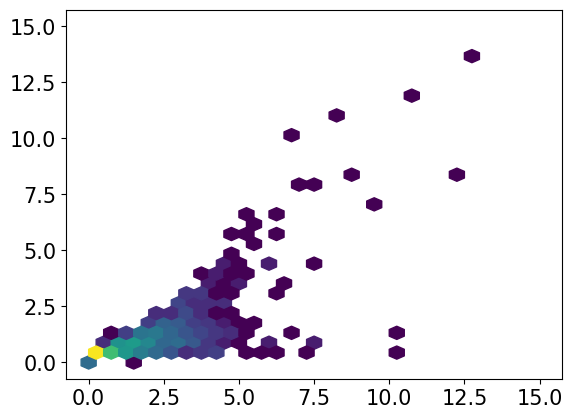

In [5]:
import matplotlib.pyplot as plt
import numpy

# print(numpy.log10(6171))
im2 = plt.hexbin(
    numpy.array(0.15 * compdf["HLR 156um"]),
    numpy.array(0.15 * almadf["HLR"]),
    gridsize=30,
    extent=[0, 15, 0, 15],
    cmap="viridis",
    bins="log",
    vmax=10**3.7903555464143865,
)
plt.show()

C:\Users\pauru\AppData\Local\Temp\ipykernel_13144\4031075799.py:103: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 1 Axes> than <Figure size 400x400 with 1 Axes> which fig.colorbar is called on.
  cb=fig.colorbar(im2, cax=cax,orientation='horizontal')


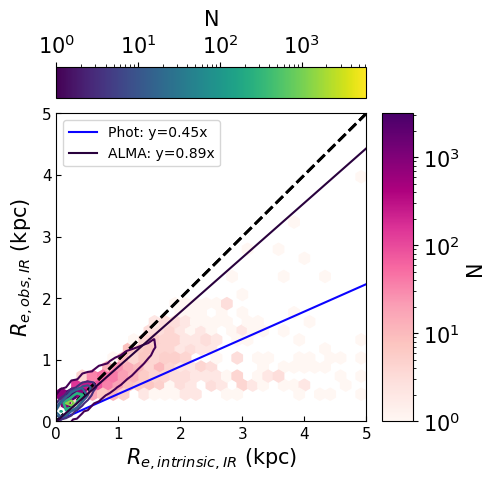

In [7]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy
import matplotlib.colors as colors
from matplotlib import path
import numpy as np


fig, ax = plt.subplots(1, 1, figsize=(4, 4))

plt.rcParams.update({"font.size": 15})
plt.tick_params(axis="y", direction="in")
plt.tick_params(axis="x", direction="in")

almadf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/AlmaTrad.csv")
irdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/IRCentres.csv")
compdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/almacomparision.csv")
df = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/table1.csv")

almadf = almadf.sort_values("ID")
compdf = compdf.sort_values("ID")
irdf = irdf.sort_values("ID")
df = df.sort_values("ID")

z = compdf["Redshift"]
im = ax.hexbin(
    0.15 * df["HLR 50um IR"],
    irdf["HLR circ"],
    gridsize=30,
    extent=[0, 5, 0, 5],
    cmap="RdPu",
    bins="log",
    vmax=10.0**3.5,
)
# ax.scatter(0.15*compdf["HLR 156um"],irdf["HLR circ"])#6895d2
cax = ax.inset_axes([5.25, 0, 0.5, 5], transform=ax.transData)
fig.colorbar(im, cax=cax, label="N")
# color='#00a8c2'
xaxis = numpy.linspace(0, 100, num=50)
ax.plot(xaxis, xaxis, color="black", linewidth=2, linestyle="--")


def compare(x, a):
    return a * x


popt, _ = curve_fit(compare, 0.15 * df["HLR 50um IR"], irdf["HLR circ"], maxfev=10000)
x_line = np.arange(0, 15, 0.1)
y_line = compare(x_line, popt)
ax.plot(
    x_line, y_line, label="Phot: y=" + str(round(popt[0], 2)) + "x", color="#0b03ff"
)
# 5e1675
ax.set_xlim(0, 15)
ax.set_ylim(0, 15)

ax.set_xlabel("$R_{sim}$ (kpc)")
ax.set_ylabel("$R_{phot,50um}$ (kpc)")


ax.legend(loc="best", fontsize=10)


# ax.scatter(0.15*compdf["HLR 156um"],0.15*almadf["HLR"],color='#7503ad',alpha=0.3,label="ALMA sizes")
# Z=[0.15*compdf["HLR 156um"][i]/(0.15*x) for i,x in enumerate(almadf["HLR"])]
np.random.seed(19680801)
npts = 200
ngridx = 100
ngridy = 200
x = numpy.array(0.15 * df["HLR 50um IR"])
y = numpy.array(0.15 * almadf["HLR"])
# ax.scatter(x,y)
xi = np.linspace(0, 15, ngridx)
yi = np.linspace(0, 15, ngridy)

z = np.array(df["HLR 50um IR"]) / np.array(almadf["HLR"])
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)
# ax.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
# ax.contour(Z,5,color='#7503ad')
# ax.tricontour(0.15*compdf["HLR 156um"], 0.15*almadf["HLR"], z, levels=14, linewidths=0.5, colors='k')
xaxis = numpy.linspace(0, 100, num=50)
ax.plot(xaxis, xaxis, color="black", linewidth=2, linestyle="--")
# from astroML.plotting import scatter_contour

# scatter_contour(x,y, threshold=1, log_counts=True, ax=ax,
# histogram2d_args=dict(bins=20),plot_args=dict(marker='+', linestyle='none', color='black',markersize=0),
# contour_args=dict(cmap='viridis',),filled_contour=False)


import seaborn as sns


# geyser = sns.load_dataset("geyser")
geyser = pd.DataFrame(
    {"Sim": np.array(0.15 * df["HLR 50um IR"]), "OBS": np.array(0.15 * almadf["HLR"])}
)
sns.kdeplot(data=geyser, x="Sim", y="OBS", ax=ax, levels=8, cmap="viridis")
# print(geyser)


cax = ax.inset_axes([0, 5.25, 5, 0.5], transform=ax.transData)
cb = fig.colorbar(im2, cax=cax, orientation="horizontal")
cb.ax.set_title("N", fontsize=15)
cb.ax.xaxis.set_ticks_position("top")
# cb.ax.tick_params(axis='x',direction='in',labeltop='on')
# cbaxes.set_xlabel("N",fontsize=15, labelpad=-35)

popt, _ = curve_fit(
    compare, 0.15 * df["HLR 50um IR"], 0.15 * almadf["HLR"], maxfev=10000
)
x_line = np.arange(0, 15, 0.1)
y_line = compare(x_line, popt)
ax.plot(
    x_line, y_line, label="ALMA: y=" + str(round(popt[0], 2)) + "x", color="#29013d"
)


ax.set_ylabel("$R_{e,obs,IR}$ (kpc)")
ax.set_xlabel("$R_{e,intrinsic,IR}$ (kpc)")


ax.legend(loc="best", fontsize=10)


ax.set_yticks([0, 1, 2, 3, 4, 5], labels=[0, 1, 2, 3, 4, 5], fontsize=11)
ax.set_xticks([0, 1, 2, 3, 4, 5], labels=[0, 1, 2, 3, 4, 5], fontsize=11)


# ax[2].scatter(irdf["HLR circ"],0.15*almadf["HLR"],color='#6895d2')

xaxis = numpy.linspace(0, 100, num=50)
# ax[2].plot(xaxis,xaxis,color='black',linewidth=2,linestyle='--')


popt, _ = curve_fit(compare, irdf["HLR circ"], 0.15 * almadf["HLR"], maxfev=10000)
x_line = np.arange(0, 15, 0.1)
y_line = compare(x_line, popt)
# ax[2].plot(x_line,y_line,label="y="+str(round(popt[0],2))+"x",color='#5e1675')

# ax[2].set_xlim(0,15)
# ax[2].set_ylim(0,15)

# ax[2].set_ylabel("$R_{alma}$ (kpc)")
# ax[2].set_xlabel("$R_{phot,50um}$ (kpc)")


# ax[2].legend(loc="best",fontsize=10)

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

plt.savefig("C:/Users/pauru/Downloads/irsizecomp.png")

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
706 13.693446301787295 (706, 12.871335810037419) 13 12
1418 8.543431580252008 (1418, 12.090975133110447) 8 12
6171.0


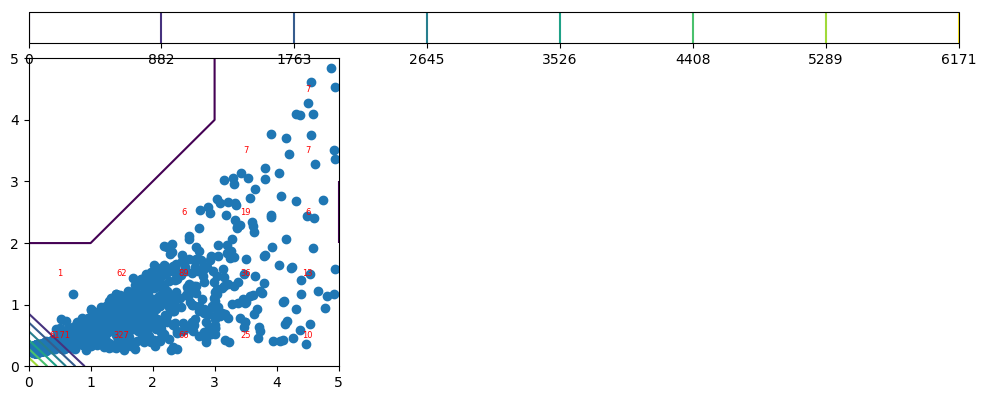

In [18]:
import math
from astropy.visualization import simple_norm

x = np.array(0.15 * compdf["HLR 156um"])
y = np.array(0.15 * almadf["HLR"])
z = [j / y[i] for i, j in enumerate(x)]
from numpy import random

# x=random.randint(15, size=(50))
# y=random.randint(15, size=(50))
# x=[1.5,2.5,7.5,1.75]
# y=[5.5,3.5,12.5,5.55]
n = 16
abc = np.linspace(0.0, 15.0, num=n)
print(abc)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
img = np.zeros([n, n])
# xi=0
# while xi <n-1:
# yi=0
# while yi<n-1:
# for i,ji in enumerate(x):
# if((abc[xi]<=ji<abc[xi+1])&(abc[yi]<=y[i]<abc[yi+1])):
# img[yi][xi]+=1
# print(abc[xi],ji,abc[xi+1],abc[yi],y[i],abc[yi+1])
# yi+=1
# xi+=1

for i, j in enumerate(x):
    if (j <= 15) & (y[i] <= 15):
        if j > 12:
            print(i, y[i], (i, j), math.floor(y[i]), math.floor(j))
        img[math.floor(y[i])][math.floor(j)] += 1

# plt.imshow(img,cmap="gray")
# plt.colorbar()
print(np.max(img))

for i in range(0, 5):
    for j in range(0, 5):
        if img[i, j] > 0:
            # print(i,j)
            text = ax.text(
                j + 0.5,
                i + 0.5,
                int(img[i, j]),
                ha="center",
                va="center",
                color="red",
                fontsize=6,
            )
ax.scatter(x, y)
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
im3 = ax.contour(img, alpha=1, levels=np.linspace(0, img.max(), 8))
cax = ax.inset_axes([0, 5.25, 15, 0.5], transform=ax.transData)
cb = fig.colorbar(im3, cax=cax, orientation="horizontal")
# for x1 in abc:
# plt.axvline(x = x1, color = 'r')
# plt.axhline(y = x1, color = 'r')

In [ ]:
import corner
import numpy as np

samples = []
x = np.array(0.15 * compdf["HLR 156um"])
y = np.array(0.15 * almadf["HLR"])
for i, j in enumerate(x):
    if (j < 15) & (y[i] < j):
        samples.append([x[i], y[i]])
samples = np.array(samples)
print(samples)
figure = corner.corner(samples)

In [ ]:
x = np.array(0.15 * compdf["HLR 156um"])
y = np.array(0.15 * almadf["HLR"])

print(y[706])
count = 0
for i in y:

    if i > 12:
        print(i, count)
    count += 1

print(x[706], y[706])

C:\Users\pauru\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:5140: RuntimeWarning: invalid value encountered in cast
  iy1 = np.round(iy).astype(int)
C:\Users\pauru\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:5142: RuntimeWarning: invalid value encountered in cast
  iy2 = np.floor(iy).astype(int)


2089
807
0.4213690031532346 1.6880036534044531 3.325507926756039


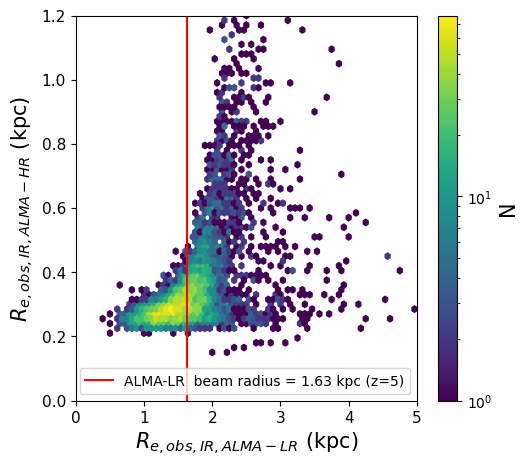

In [17]:
import numpy
import math
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import numpy
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 15})
# plt.tick_params(axis="y",direction="in")
# plt.tick_params(axis="x",direction="in")
plt.figure(figsize=(5.5, 5))
cristaldf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/CristalAlmaStatMorph.csv")
df = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/table1.csv")

rerez = [400, 400, 400, 400, 400, 400]

# df=df.sort_values('ID')
# cristaldf=cristaldf.sort_values('ID')
c3almasize = []
c3almasizeUNSORTED = [
    (cristaldf["HLR circ"][i] * 400) / rerez[(int(x[63:][:-28]) - 5)]
    for i, x in enumerate(cristaldf["ID"])
]

properID = [(x[61:][:-10]) for x in numpy.array(cristaldf["ID"])]
# print(properID)

for x in df["ID"]:
    indx = np.where(numpy.array(properID) == x.replace("/", "_"))
    # print(x.replace('/','_'))
    # print(indx)
    # print(numpy.array(c3almasizeUNSORTED)[indx])
    c3almasize.append(numpy.array(c3almasizeUNSORTED)[indx])
    # print(c3almasize)

# print(c3almasize)

c3almasize = c3almasize[:5616]
cristaldf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/AlmaStatMorph.csv")
df = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/table1.csv")

rerez = [400, 400, 400, 400, 400, 400]

# df=df.sort_values('ID')
# cristaldf=cristaldf.sort_values('ID')
c10almasize = []
c10almasizeUNSORTED = [
    (cristaldf["HLR circ"][i] * 400) / rerez[(int(x[59:][:-28]) - 5)]
    for i, x in enumerate(cristaldf["ID"])
]

properID = [(x[57:][:-10]) for x in numpy.array(cristaldf["ID"])]
# print(properID)


for x in df["ID"]:
    indx = np.where(numpy.array(properID) == x.replace("/", "_"))
    # print(x.replace('/','_'))
    # print(indx)
    # print(numpy.array(c3almasizeUNSORTED)[indx])
    c10almasize.append(numpy.array(c10almasizeUNSORTED)[indx])
    # print(c3almasize)

# print(c3almasize)
c10almasize = c10almasize[:5616]
mass = numpy.array(df["Stellar Mass"])
mass = [x * 1e10 for x in mass]
mass = [math.log(x, 10) for x in mass]
mass = np.array(mass)
x = []
y = []
c3 = np.array(np.array(c3almasize))
c10 = np.array(np.array(c10almasize))
# print(c3,c10)
for i, abc in enumerate(c3):
    if ~np.isnan(abc):
        x.append(abc)
        y.append(c10[i])
c3 = x
c10 = y
# print(x,y)
# im=plt.hexbin(c3,c10,  gridsize=50,cmap='Reds',extent=[0,5,0,1.2],bins='log')
# plt.scatter(c3)
im = plt.hexbin(c3, c10, gridsize=70, cmap="viridis", extent=[0, 5, 0, 1.2], bins="log")
# im.set_under(color='black')
plt.colorbar(im).set_label(label="N", size=15)
# plt.scatter(c3,c10)
plt.axvline(
    x=3.270124246560264 / 2, color="r", label="ALMA-LR  beam radius = 1.63 kpc (z=5)"
)
plt.legend(loc="lower right", fontsize=10.0)
plt.xlabel("$R_{e,obs,IR,ALMA-LR}$ (kpc)")
plt.ylabel("$R_{e,obs,IR,ALMA-HR}$ (kpc)")
plt.xlim(0, 5)
plt.ylim(0, 1.2)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)

count = 0
for x in c3almasize[:3844]:
    if x > 3.270124246560264 / 2:
        count += 1
print(count)

count = 0
for x in c3almasize[:5616][-1772:]:
    if x > 3.2512131390537777 / 2:
        count += 1
print(count)
# plt.grid()

print(
    numpy.min(c3almasize[:5616]),
    numpy.mean(c3almasize[:5616]),
    numpy.percentile(c3almasize[:5616], 99),
)

In [ ]:
print(cristaldf)

C:\Users\pauru\AppData\Local\Temp\ipykernel_57644\343230952.py:170: RuntimeWarning: overflow encountered in divide
  IRX = Lir/LFUV
C:\Users\pauru\AppData\Local\Temp\ipykernel_57644\343230952.py:170: RuntimeWarning: divide by zero encountered in divide
  IRX = Lir/LFUV


0.6657018866313553 -0.24937082076816505
[0.02970338 0.02171212]
done
3.3423941705321183 -1.3879789942185357
[1.93357875 0.29197999]
done
2.222004410665255 -0.16002897475719272
[0.89931497 0.19638695]


C:\Users\pauru\AppData\Local\Temp\ipykernel_57644\343230952.py:575: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c3almasize=[float(x) for x in c3almasize]


(0.0, 2.5)

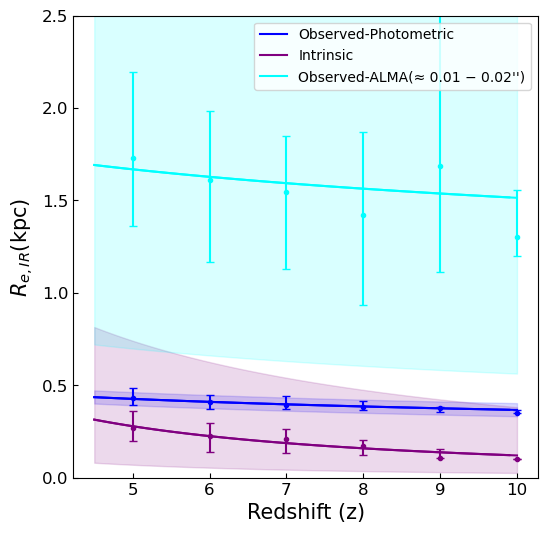

In [13]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/table1.csv")
SFR = numpy.array(df["Star Formation Rate"])
Mstar = numpy.array(df["Stellar Mass"])
Mstar = [uk * (10**10) for uk in Mstar]
sSFR = [idk / Mstar[idknum] for idknum, idk in enumerate(SFR)]
df["sStar Formation Rate"] = sSFR
# print(type(df))
# print(df.describe())
z_5 = df.head(3844)
z_6 = df.head(5616).tail(1772)
z_7 = df.head(6389).tail(773)
z_8 = df.head(6720).tail(331)
z_9 = df.head(6846).tail(126)
z_10 = df.tail(44)
z_5 = z_5.sort_values("ID")
z_6 = z_6.sort_values("ID")
z_7 = z_7.sort_values("ID")
z_8 = z_8.sort_values("ID")
z_9 = z_9.sort_values("ID")
z_10 = z_10.sort_values("ID")
z_5_binA = z_5.loc[(z_5["Mass_bin"] == "10^9-10^9.5")]
z_6_binA = z_6.loc[(z_6["Mass_bin"] == "10^9-10^9.5")]
z_7_binA = z_7.loc[(z_7["Mass_bin"] == "10^9-10^9.5")]
z_8_binA = z_8.loc[(z_8["Mass_bin"] == "10^9-10^9.5")]
z_9_binA = z_9.loc[(z_9["Mass_bin"] == "10^9-10^9.5")]
z_10_binA = z_10.loc[(z_10["Mass_bin"] == "10^9-10^9.5")]

z_5_binB = z_5.loc[(z_5["Mass_bin"] == "10^9.5-10^10")]
z_6_binB = z_6.loc[(z_6["Mass_bin"] == "10^9.5-10^10")]
z_7_binB = z_7.loc[(z_7["Mass_bin"] == "10^9.5-10^10")]
z_8_binB = z_8.loc[(z_8["Mass_bin"] == "10^9.5-10^10")]
z_9_binB = z_9.loc[(z_9["Mass_bin"] == "10^9.5-10^10")]
z_10_binB = z_10.loc[(z_10["Mass_bin"] == "10^9.5-10^10")]

z_5_binC = z_5.loc[(z_5["Mass_bin"] == "10^10-10^10.5")]
z_6_binC = z_6.loc[(z_6["Mass_bin"] == "10^10-10^10.5")]
z_7_binC = z_7.loc[(z_7["Mass_bin"] == "10^10-10^10.5")]
z_8_binC = z_8.loc[(z_8["Mass_bin"] == "10^10-10^10.5")]
z_9_binC = z_9.loc[(z_9["Mass_bin"] == "10^10-10^10.5")]
z_10_binC = z_10.loc[(z_10["Mass_bin"] == "10^10-10^10.5")]

z_5_binD = z_5.loc[(z_5["Mass_bin"] == "10^10.5-10^11")]
z_6_binD = z_6.loc[(z_6["Mass_bin"] == "10^10.5-10^11")]
z_7_binD = z_7.loc[(z_7["Mass_bin"] == "10^10.5-10^11")]
z_8_binD = z_8.loc[(z_8["Mass_bin"] == "10^10.5-10^11")]
z_9_binD = z_9.loc[(z_9["Mass_bin"] == "10^10.5-10^11")]
z_10_binD = z_10.loc[(z_10["Mass_bin"] == "10^10.5-10^11")]

z_5_binE = z_5.loc[(z_5["Mass_bin"] == "10^11-10^11.5")]
z_6_binE = z_6.loc[(z_6["Mass_bin"] == "10^11-10^11.5")]
z_7_binE = z_7.loc[(z_7["Mass_bin"] == "10^11-10^11.5")]
z_8_binE = z_8.loc[(z_8["Mass_bin"] == "10^11-10^11.5")]
z_9_binE = z_9.loc[(z_9["Mass_bin"] == "10^11-10^11.5")]
z_10_binE = z_10.loc[(z_10["Mass_bin"] == "10^11-10^11.5")]


# imgdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/StatMorphResults15.csv")
imgdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/IRCentres.csv")
z_52 = imgdf.head(3844)
z_62 = imgdf.head(5616).tail(1772)
z_72 = imgdf.head(6389).tail(773)
z_82 = imgdf.head(6720).tail(331)
z_92 = imgdf.head(6846).tail(126)
z_102 = imgdf.tail(44)
z_52 = z_52.sort_values("ID")
z_62 = z_62.sort_values("ID")
z_72 = z_72.sort_values("ID")
z_82 = z_82.sort_values("ID")
z_92 = z_92.sort_values("ID")
z_102 = z_102.sort_values("ID")

############################# FLARES functions
import numpy as np


def weighted_quantile(
    values, quantiles, sample_weight=None, values_sorted=False, old_style=False
):
    """
    Taken from From https://stackoverflow.com/a/29677616/1718096

    Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!
    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of
        initial array
    :param old_style: if True, will correct output to be consistent
        with numpy.percentile.
    :return: numpy.array with computed quantiles.
    """

    # do some housekeeping
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(
        quantiles <= 1
    ), "quantiles should be in [0, 1]"

    # if not sorted, sort values array
    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)


def binned_weighted_quantile(x, y, weights, bins, quantiles):

    # if ~isinstance(quantiles,list):
    #     quantiles = [quantiles]

    out = np.full((len(bins) - 1, len(quantiles)), np.nan)
    for i, (b1, b2) in enumerate(zip(bins[:-1], bins[1:])):
        mask = (x >= b1) & (x < b2)
        if np.sum(mask) > 0:
            out[i, :] = weighted_quantile(
                y[mask], quantiles, sample_weight=weights[mask]
            )

    return np.squeeze(out)
    # return out


import numpy as np
import h5py

df123 = pd.read_csv("weights_grid.txt")
mbins = np.arange(9, 12, 0.5)
weights = numpy.array(df123["weights"])
regions = np.array(
    [
        "00",
        "01",
        "02",
        "03",
        "04",
        "05",
        "06",
        "07",
        "08",
        "09",
        "10",
        "11",
        "12",
        "13",
        "14",
        "15",
        "16",
        "17",
        "18",
        "19",
        "20",
        "21",
        "22",
        "23",
        "24",
        "25",
        "26",
        "27",
        "28",
        "29",
        "30",
        "31",
        "32",
        "33",
        "34",
        "35",
        "36",
        "37",
        "38",
        "39",
    ]
)
quantiles = [0.84, 0.50, 0.16]
tags = [
    "010_z005p000",
    "009_z006p000",
    "008_z007p000",
    "007_z008p000",
    "006_z009p000",
    "005_z010p000",
]
# tags = ['010_z005p000']
Lir, LFUV, mstars, SFR, ws, beta = (
    np.array([]),
    np.array([]),
    np.array([]),
    np.array([]),
    np.array([]),
    np.array([]),
)
ws = np.array([])
wszlist = []
for tag in tags:
    wstw = np.array([])  #######tagwise ws
    for mm in regions:
        with h5py.File(
            "C:/Users/pauru/Documents/SKIRT/flares_00/flares_skirt_outputs.hdf5", "r"
        ) as hf:
            mstar = (
                np.array(hf[mm + "/" + tag + "/Galaxy"].get("Mstar"), dtype=np.float64)
                * 1e10
            )
            SFR = np.append(
                SFR,
                np.array(hf[mm + "/" + tag + "/Galaxy"].get("SFR"), dtype=np.float64),
            )

            mstars = np.append(mstars, mstar)
            ws = np.append(ws, np.ones(len(mstar)) * weights[int(mm)])
            wstw = np.append(wstw, np.ones(len(mstar)) * weights[int(mm)])
            LFUV = np.append(
                LFUV,
                np.array(
                    hf[mm + "/" + tag + "/Galaxy/Photometry"].get("LFUV"),
                    dtype=np.float64,
                ),
            )
            Lir = np.append(
                Lir,
                np.array(
                    hf[mm + "/" + tag + "/Galaxy/Photometry"].get("Lir"),
                    dtype=np.float64,
                ),
            )
            beta = np.append(
                beta,
                np.array(
                    hf[mm + "/" + tag + "/Galaxy/Photometry"].get("beta"),
                    dtype=np.float64,
                ),
            )
        LFUV = LFUV * (2e15) / (3.826e33)
        IRX = Lir / LFUV
    wszlist.append(wstw)
############## 6890, all galaxies in ws
ws5, ws6, ws7, ws8, ws9, ws10 = (
    np.array([]),
    np.array([]),
    np.array([]),
    np.array([]),
    np.array([]),
    np.array([]),
)
ws5 = wszlist[0]
ws6 = wszlist[1]
ws7 = wszlist[2]
ws8 = wszlist[3]
ws9 = wszlist[4]
ws10 = wszlist[5]


def objective(x, a, b):
    return a * ((1 + x) ** b)


# from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.figure(figsize=(6, 6))
plt.rcParams.update({"font.size": 15})
plt.tick_params(axis="y", direction="in")
plt.tick_params(axis="x", direction="in")

mbins = np.arange(9, 12, 0.5)
Lstar = 10**29.03
# Lstar=(10**27.07)

wsub = []
mstars = []
medianof = []
lum5 = np.array(z_5["UV Luminosity 1500A"])
a = [x / Lstar for x in lum5]
ms = np.array(z_5["Stellar Mass"])
ms = [y * (10**10) for y in ms]
# hlr=np.array(z_5['HLR 50um IR'])
hlr = np.array(z_52["HLR circ"])
# hlr=[x*0.15 for x in hlr]
for i, gal in enumerate(a):
    if gal > 0:
        mstars.append(ms[i])
        medianof.append(hlr[i])
        wsub.append(ws5[i])
# print(len(mstars))
med = numpy.median(medianof)
out5 = binned_weighted_quantile(
    np.log10(mstars), np.array(medianof), np.array(wsub), mbins, quantiles
)


wsub = []
mstars = []
medianof = []
lum5 = np.array(z_6["UV Luminosity 1500A"])
a = [x / Lstar for x in lum5]
ms = np.array(z_6["Stellar Mass"])
ms = [y * (10**10) for y in ms]
# hlr=np.array(z_6['HLR 50um IR'])
hlr = np.array(z_62["HLR circ"])
# hlr=[x*0.15 for x in hlr]
for i, gal in enumerate(a):
    if gal > 0:
        mstars.append(ms[i])
        medianof.append(hlr[i])
        wsub.append(ws6[i])
# print(len(mstars))
out6 = binned_weighted_quantile(
    np.log10(mstars), np.array(medianof), np.array(wsub), mbins, quantiles
)


wsub = []
mstars = []
medianof = []
lum5 = np.array(z_7["UV Luminosity 1500A"])
a = [x / Lstar for x in lum5]
ms = np.array(z_7["Stellar Mass"])
ms = [y * (10**10) for y in ms]
# hlr=np.array(z_7['HLR 50um IR'])
hlr = np.array(z_72["HLR circ"])
# hlr=[x*0.15 for x in hlr]
for i, gal in enumerate(a):
    if gal > 0:
        mstars.append(ms[i])
        medianof.append(hlr[i])
        wsub.append(ws7[i])
# print(len(mstars))
out7 = binned_weighted_quantile(
    np.log10(mstars), np.array(medianof), np.array(wsub), mbins, quantiles
)


wsub = []
mstars = []
medianof = []
lum5 = np.array(z_8["UV Luminosity 1500A"])
a = [x / Lstar for x in lum5]
ms = np.array(z_8["Stellar Mass"])
ms = [y * (10**10) for y in ms]
# hlr=np.array(z_8['HLR 50um IR'])
hlr = np.array(z_82["HLR circ"])
# hlr=[x*0.15 for x in hlr]
for i, gal in enumerate(a):
    if gal > 0:
        mstars.append(ms[i])
        medianof.append(hlr[i])
        wsub.append(ws8[i])
# print(len(mstars))
out8 = binned_weighted_quantile(
    np.log10(mstars), np.array(medianof), np.array(wsub), mbins, quantiles
)


wsub = []
mstars = []
medianof = []
lum5 = np.array(z_9["UV Luminosity 1500A"])
a = [x / Lstar for x in lum5]
ms = np.array(z_9["Stellar Mass"])
ms = [y * (10**10) for y in ms]
# hlr=np.array(z_9['HLR 50um IR'])
hlr = np.array(z_92["HLR circ"])
# hlr=[x*0.15 for x in hlr]
for i, gal in enumerate(a):
    if gal > 0:
        mstars.append(ms[i])
        medianof.append(hlr[i])
        wsub.append(ws9[i])
# print(len(mstars))
out9 = binned_weighted_quantile(
    np.log10(mstars), np.array(medianof), np.array(wsub), mbins, quantiles
)


wsub = []
mstars = []
medianof = []
lum5 = np.array(z_10["UV Luminosity 1500A"])
a = [x / Lstar for x in lum5]
ms = np.array(z_10["Stellar Mass"])
ms = [y * (10**10) for y in ms]
# hlr=np.array(z_10['HLR 50um IR'])
hlr = np.array(z_102["HLR circ"])
# hlr=[x*0.15 for x in hlr]
for i, gal in enumerate(a):
    if gal > 0:
        mstars.append(ms[i])
        medianof.append(hlr[i])
        wsub.append(ws10[i])
# print(len(mstars))
out10 = binned_weighted_quantile(
    np.log10(mstars), np.array(medianof), np.array(wsub), mbins, quantiles
)


BinAhlr = [out5[0][1], out6[0][1], out7[0][1], out8[0][1], out9[0][1], out10[0][1]]
BinBhlr = [out5[1][1], out6[1][1], out7[1][1], out8[1][1], out9[1][1], out10[1][1]]
BinChlr = [out5[2][1], out6[2][1], out7[2][1], out8[2][1], out9[2][1], out10[2][1]]
BinDhlr = [out5[3][1], out6[3][1], out7[3][1], out8[3][1], out9[3][1], out10[3][1]]
BinEhlr = [out5[4][1], out6[4][1], out7[4][1], out8[4][1], out9[4][1], out10[4][1]]

BinAhlr84 = [out5[0][0], out6[0][0], out7[0][0], out8[0][0], out9[0][0], out10[0][0]]
BinBhlr84 = [out5[1][0], out6[1][0], out7[1][0], out8[1][0], out9[1][0], out10[1][0]]
BinChlr84 = [out5[2][0], out6[2][0], out7[2][0], out8[2][0], out9[2][0], out10[2][0]]
BinDhlr84 = [out5[3][0], out6[3][0], out7[3][0], out8[3][0], out9[3][0], out10[3][0]]
BinEhlr84 = [out5[4][0], out6[4][0], out7[4][0], out8[4][0], out9[4][0], out10[4][0]]

BinAhlr16 = [out5[0][2], out6[0][2], out7[0][2], out8[0][2], out9[0][2], out10[0][2]]
BinBhlr16 = [out5[1][2], out6[1][2], out7[1][2], out8[1][2], out9[1][2], out10[1][2]]
BinChlr16 = [out5[2][2], out6[2][2], out7[2][2], out8[2][2], out9[2][2], out10[2][2]]
BinDhlr16 = [out5[3][2], out6[3][2], out7[3][2], out8[3][2], out9[3][2], out10[3][2]]
BinEhlr16 = [out5[4][2], out6[4][2], out7[4][2], out8[4][2], out9[4][2], out10[4][2]]

x = [5, 6, 7, 8, 9, 10]
Ape = [x - BinBhlr[i] for i, x in enumerate(BinBhlr84)]
Ane = [BinBhlr[i] - x for i, x in enumerate(BinBhlr16)]

plt.errorbar(x, BinBhlr, np.array([Ane, Ape]), fmt=".", color="blue", capsize=3)
plt.xlabel("Redshift (z)")
plt.ylabel("$R_{50um,rest}$(kpc)")

popt, pcov = curve_fit(objective, x[:-1], BinBhlr[:-1], maxfev=1000)
# popt, _ = curve_fit(objective, x[:-3], BinBhlr[:-3], maxfev=1000)
# popt, _ = curve_fit(objective, x[:-3], BinAhlr[:-3], maxfev=1000)


a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

x_line = np.arange(min(x) - 0.5, 10, 0.1)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, color="blue", label="Observed-Photometric")
# plt.plot(x_line, y_line1, color='magenta',label="This work")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(4.5, 10, 100)
plt.plot(hires_x, objective(hires_x, *best_fit_ab), "blue")
bound_upper = objective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = objective(hires_x, *(best_fit_ab - sigma_ab))

plt.fill_between(hires_x, bound_lower, bound_upper, color="blue", alpha=0.15)


print("done")


mbins = np.arange(9, 12, 0.5)
Lstar = 10**29.03
# Lstar=(10**27.07)

wsub = []
mstars = []
medianof = []
lum5 = np.array(z_5["UV Luminosity 1500A"])
a = [x / Lstar for x in lum5]
ms = np.array(z_5["Stellar Mass"])
ms = [y * (10**10) for y in ms]
hlr = np.array(z_5["HLR 50um IR"])
# hlr=np.array(z_52["HLR circ"])
hlr = [x * 0.15 for x in hlr]
for i, gal in enumerate(a):
    if gal > 0:
        mstars.append(ms[i])
        medianof.append(hlr[i])
        wsub.append(ws5[i])
# print(len(mstars))
med = numpy.median(medianof)
out5 = binned_weighted_quantile(
    np.log10(mstars), np.array(medianof), np.array(wsub), mbins, quantiles
)


wsub = []
mstars = []
medianof = []
lum5 = np.array(z_6["UV Luminosity 1500A"])
a = [x / Lstar for x in lum5]
ms = np.array(z_6["Stellar Mass"])
ms = [y * (10**10) for y in ms]
hlr = np.array(z_6["HLR 50um IR"])
# hlr=np.array(z_62["HLR circ"])
hlr = [x * 0.15 for x in hlr]
for i, gal in enumerate(a):
    if gal > 0:
        mstars.append(ms[i])
        medianof.append(hlr[i])
        wsub.append(ws6[i])
# print(len(mstars))
out6 = binned_weighted_quantile(
    np.log10(mstars), np.array(medianof), np.array(wsub), mbins, quantiles
)


wsub = []
mstars = []
medianof = []
lum5 = np.array(z_7["UV Luminosity 1500A"])
a = [x / Lstar for x in lum5]
ms = np.array(z_7["Stellar Mass"])
ms = [y * (10**10) for y in ms]
hlr = np.array(z_7["HLR 50um IR"])
# hlr=np.array(z_72["HLR circ"])
hlr = [x * 0.15 for x in hlr]
for i, gal in enumerate(a):
    if gal > 0:
        mstars.append(ms[i])
        medianof.append(hlr[i])
        wsub.append(ws7[i])
# print(len(mstars))
out7 = binned_weighted_quantile(
    np.log10(mstars), np.array(medianof), np.array(wsub), mbins, quantiles
)


wsub = []
mstars = []
medianof = []
lum5 = np.array(z_8["UV Luminosity 1500A"])
a = [x / Lstar for x in lum5]
ms = np.array(z_8["Stellar Mass"])
ms = [y * (10**10) for y in ms]
hlr = np.array(z_8["HLR 50um IR"])
# hlr=np.array(z_82["HLR circ"])
hlr = [x * 0.15 for x in hlr]
for i, gal in enumerate(a):
    if gal > 0:
        mstars.append(ms[i])
        medianof.append(hlr[i])
        wsub.append(ws8[i])
# print(len(mstars))
out8 = binned_weighted_quantile(
    np.log10(mstars), np.array(medianof), np.array(wsub), mbins, quantiles
)


wsub = []
mstars = []
medianof = []
lum5 = np.array(z_9["UV Luminosity 1500A"])
a = [x / Lstar for x in lum5]
ms = np.array(z_9["Stellar Mass"])
ms = [y * (10**10) for y in ms]
hlr = np.array(z_9["HLR 50um IR"])
# hlr=np.array(z_92["HLR circ"])
hlr = [x * 0.15 for x in hlr]
for i, gal in enumerate(a):
    if gal > 0:
        mstars.append(ms[i])
        medianof.append(hlr[i])
        wsub.append(ws9[i])
# print(len(mstars))
out9 = binned_weighted_quantile(
    np.log10(mstars), np.array(medianof), np.array(wsub), mbins, quantiles
)


wsub = []
mstars = []
medianof = []
lum5 = np.array(z_10["UV Luminosity 1500A"])
a = [x / Lstar for x in lum5]
ms = np.array(z_10["Stellar Mass"])
ms = [y * (10**10) for y in ms]
hlr = np.array(z_10["HLR 50um IR"])
# hlr=np.array(z_102["HLR circ"])
hlr = [x * 0.15 for x in hlr]
for i, gal in enumerate(a):
    if gal > 0:
        mstars.append(ms[i])
        medianof.append(hlr[i])
        wsub.append(ws10[i])
# print(len(mstars))
# print(np.array(medianof))
out10 = binned_weighted_quantile(
    np.log10(mstars), np.array(medianof), np.array(wsub), mbins, quantiles
)


BinAhlr = [out5[0][1], out6[0][1], out7[0][1], out8[0][1], out9[0][1], out10[0][1]]
BinBhlr = [out5[1][1], out6[1][1], out7[1][1], out8[1][1], out9[1][1], out10[1][1]]
BinChlr = [out5[2][1], out6[2][1], out7[2][1], out8[2][1], out9[2][1], out10[2][1]]
BinDhlr = [out5[3][1], out6[3][1], out7[3][1], out8[3][1], out9[3][1], out10[3][1]]
BinEhlr = [out5[4][1], out6[4][1], out7[4][1], out8[4][1], out9[4][1], out10[4][1]]

BinAhlr84 = [out5[0][0], out6[0][0], out7[0][0], out8[0][0], out9[0][0], out10[0][0]]
BinBhlr84 = [out5[1][0], out6[1][0], out7[1][0], out8[1][0], out9[1][0], out10[1][0]]
BinChlr84 = [out5[2][0], out6[2][0], out7[2][0], out8[2][0], out9[2][0], out10[2][0]]
BinDhlr84 = [out5[3][0], out6[3][0], out7[3][0], out8[3][0], out9[3][0], out10[3][0]]
BinEhlr84 = [out5[4][0], out6[4][0], out7[4][0], out8[4][0], out9[4][0], out10[4][0]]

BinAhlr16 = [out5[0][2], out6[0][2], out7[0][2], out8[0][2], out9[0][2], out10[0][2]]
BinBhlr16 = [out5[1][2], out6[1][2], out7[1][2], out8[1][2], out9[1][2], out10[1][2]]
BinChlr16 = [out5[2][2], out6[2][2], out7[2][2], out8[2][2], out9[2][2], out10[2][2]]
BinDhlr16 = [out5[3][2], out6[3][2], out7[3][2], out8[3][2], out9[3][2], out10[3][2]]
BinEhlr16 = [out5[4][2], out6[4][2], out7[4][2], out8[4][2], out9[4][2], out10[4][2]]

x = [5, 6, 7, 8, 9, 10]
Ape = [x - BinBhlr[i] for i, x in enumerate(BinBhlr84)]
Ane = [BinBhlr[i] - x for i, x in enumerate(BinBhlr16)]

plt.errorbar(x, BinBhlr, np.array([Ane, Ape]), fmt=".", color="purple", capsize=3)
plt.xlabel("Redshift (z)")
plt.ylabel("$R_{e,IR}$(kpc)")

popt, pcov = curve_fit(objective, x[:-1], BinBhlr[:-1], maxfev=1000)
# popt, pcov = curve_fit(objective, x[:-2], BinBhlr[:-2], maxfev=1000)
# popt, _ = curve_fit(objective, x[:-3], BinBhlr[:-3], maxfev=1000)
# popt, _ = curve_fit(objective, x[:-3], BinAhlr[:-3], maxfev=1000)


a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

x_line = np.arange(min(x) - 0.5, 10, 0.1)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, color="purple", label="Intrinsic")
# plt.plot(x_line, y_line1, color='magenta',label="This work")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(4.5, 10, 100)
plt.plot(hires_x, objective(hires_x, *best_fit_ab), "purple")
bound_upper = objective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = objective(hires_x, *(best_fit_ab - sigma_ab))

plt.fill_between(hires_x, bound_lower, bound_upper, color="purple", alpha=0.15)
# plt.savefig("SampleFit.pdf)


print("done")


cristaldf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/CristalAlmaStatMorph.csv")


rerez = [400, 400, 400, 400, 400, 400]
c3almasize = []
c3almasizeUNSORTED = [
    (cristaldf["HLR circ"][i] * 400) / rerez[(int(x[63:][:-28]) - 5)]
    for i, x in enumerate(cristaldf["ID"])
]

properID = [(x[61:][:-10]) for x in numpy.array(cristaldf["ID"])]

for x in df["ID"]:
    indx = np.where(numpy.array(properID) == x.replace("/", "_"))
    c3almasize.append(numpy.array(c3almasizeUNSORTED)[indx])


c3almasize = [float(x) for x in c3almasize]

mbins = np.arange(9, 12, 0.5)
Lstar = 10**29.03


wsub = []
mstars = []
medianof = []
lum5 = np.array(z_5["UV Luminosity 1500A"])
a = [x / Lstar for x in lum5]
ms = np.array(z_5["Stellar Mass"])
ms = [y * (10**10) for y in ms]
# hlr=np.array(z_5['HLR 50um IR'])
hlr = c3almasize[:3844]

# hlr=np.array(z_52["HLR circ"])
# hlr=[x*0.15 for x in hlr]
for i, gal in enumerate(a):
    if gal > 0:
        mstars.append(ms[i])
        medianof.append(hlr[i])
        wsub.append(ws5[i])


# print(len(mstars))
med = numpy.median(medianof)
# print(np.array(medianof))
out5 = binned_weighted_quantile(
    np.log10(mstars), np.array(medianof), np.array(wsub), mbins, quantiles
)


wsub = []
mstars = []
medianof = []
lum5 = np.array(z_6["UV Luminosity 1500A"])
a = [x / Lstar for x in lum5]
ms = np.array(z_6["Stellar Mass"])
ms = [y * (10**10) for y in ms]
hlr = np.array(z_6["HLR 50um IR"])
# hlr=np.array(z_62["HLR circ"])
# hlr=[x*0.15 for x in hlr]
hlr = c3almasize[:5616][-1772:]
for i, gal in enumerate(a):
    if gal > 0:
        mstars.append(ms[i])
        medianof.append(hlr[i])
        wsub.append(ws6[i])
# print(len(mstars))
out6 = binned_weighted_quantile(
    np.log10(mstars), np.array(medianof), np.array(wsub), mbins, quantiles
)


wsub = []
mstars = []
medianof = []
lum5 = np.array(z_7["UV Luminosity 1500A"])
a = [x / Lstar for x in lum5]
ms = np.array(z_7["Stellar Mass"])
ms = [y * (10**10) for y in ms]
# hlr=np.array(z_7['HLR 50um IR'])
# hlr=np.array(z_72["HLR circ"])
# hlr=[x*0.15 for x in hlr]
hlr = c3almasize[:6389][-773:]
for i, gal in enumerate(a):
    if gal > 0:
        mstars.append(ms[i])
        medianof.append(hlr[i])
        wsub.append(ws7[i])
# print(len(mstars))
out7 = binned_weighted_quantile(
    np.log10(mstars), np.array(medianof), np.array(wsub), mbins, quantiles
)


wsub = []
mstars = []
medianof = []
lum5 = np.array(z_8["UV Luminosity 1500A"])
a = [x / Lstar for x in lum5]
ms = np.array(z_8["Stellar Mass"])
ms = [y * (10**10) for y in ms]
# hlr=np.array(z_8['HLR 50um IR'])
# hlr=np.array(z_82["HLR circ"])
# hlr=[x*0.15 for x in hlr]
hlr = c3almasize[:6720][-331:]
for i, gal in enumerate(a):
    if gal > 0:
        mstars.append(ms[i])
        medianof.append(hlr[i])
        wsub.append(ws8[i])
# print(len(mstars))
out8 = binned_weighted_quantile(
    np.log10(mstars), np.array(medianof), np.array(wsub), mbins, quantiles
)


wsub = []
mstars = []
medianof = []
lum5 = np.array(z_9["UV Luminosity 1500A"])
a = [x / Lstar for x in lum5]
ms = np.array(z_9["Stellar Mass"])
ms = [y * (10**10) for y in ms]
# hlr=np.array(z_9['HLR 50um IR'])
# hlr=np.array(z_92["HLR circ"])
# hlr=[x*0.15 for x in hlr]
hlr = c3almasize[:6846][-126:]
for i, gal in enumerate(a):
    if gal > 0:
        mstars.append(ms[i])
        medianof.append(hlr[i])
        wsub.append(ws9[i])
# print(len(mstars))
out9 = binned_weighted_quantile(
    np.log10(mstars), np.array(medianof), np.array(wsub), mbins, quantiles
)


wsub = []
mstars = []
medianof = []
lum5 = np.array(z_10["UV Luminosity 1500A"])
a = [x / Lstar for x in lum5]
ms = np.array(z_10["Stellar Mass"])
ms = [y * (10**10) for y in ms]
# hlr=np.array(z_10['HLR 50um IR'])
# hlr=np.array(z_102["HLR circ"])
# hlr=[x*0.15 for x in hlr]
hlr = c3almasize[-44:]
for i, gal in enumerate(a):
    if gal > 0:
        mstars.append(ms[i])
        medianof.append(hlr[i])
        wsub.append(ws10[i])
# print(len(mstars))
out10 = binned_weighted_quantile(
    np.log10(mstars), np.array(medianof), np.array(wsub), mbins, quantiles
)


BinAhlr = [out5[0][1], out6[0][1], out7[0][1], out8[0][1], out9[0][1], out10[0][1]]
BinBhlr = [out5[1][1], out6[1][1], out7[1][1], out8[1][1], out9[1][1], out10[1][1]]
BinChlr = [out5[2][1], out6[2][1], out7[2][1], out8[2][1], out9[2][1], out10[2][1]]
BinDhlr = [out5[3][1], out6[3][1], out7[3][1], out8[3][1], out9[3][1], out10[3][1]]
BinEhlr = [out5[4][1], out6[4][1], out7[4][1], out8[4][1], out9[4][1], out10[4][1]]

BinAhlr84 = [out5[0][0], out6[0][0], out7[0][0], out8[0][0], out9[0][0], out10[0][0]]
BinBhlr84 = [out5[1][0], out6[1][0], out7[1][0], out8[1][0], out9[1][0], out10[1][0]]
BinChlr84 = [out5[2][0], out6[2][0], out7[2][0], out8[2][0], out9[2][0], out10[2][0]]
BinDhlr84 = [out5[3][0], out6[3][0], out7[3][0], out8[3][0], out9[3][0], out10[3][0]]
BinEhlr84 = [out5[4][0], out6[4][0], out7[4][0], out8[4][0], out9[4][0], out10[4][0]]

BinAhlr16 = [out5[0][2], out6[0][2], out7[0][2], out8[0][2], out9[0][2], out10[0][2]]
BinBhlr16 = [out5[1][2], out6[1][2], out7[1][2], out8[1][2], out9[1][2], out10[1][2]]
BinChlr16 = [out5[2][2], out6[2][2], out7[2][2], out8[2][2], out9[2][2], out10[2][2]]
BinDhlr16 = [out5[3][2], out6[3][2], out7[3][2], out8[3][2], out9[3][2], out10[3][2]]
BinEhlr16 = [out5[4][2], out6[4][2], out7[4][2], out8[4][2], out9[4][2], out10[4][2]]

x = [5, 6, 7, 8, 9, 10]
Ape = [x - BinBhlr[i] for i, x in enumerate(BinBhlr84)]
Ane = [BinBhlr[i] - x for i, x in enumerate(BinBhlr16)]

plt.errorbar(x, BinBhlr, np.array([Ane, Ape]), fmt=".", color="cyan", capsize=3)
plt.xlabel("Redshift (z)")
plt.ylabel("$R_{e,IR}$(kpc)")

popt, pcov = curve_fit(objective, x[:-1], BinBhlr[:-1], maxfev=1000)
# popt, pcov = curve_fit(objective, x[:-2], BinBhlr[:-2], maxfev=1000)
# popt, _ = curve_fit(objective, x[:-3], BinBhlr[:-3], maxfev=1000)
# popt, _ = curve_fit(objective, x[:-3], BinAhlr[:-3], maxfev=1000)


a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

x_line = np.arange(min(x) - 0.5, 10, 0.1)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, color="cyan", label="Observed-ALMA(\u2248 0.01 − 0.02'')")
# plt.plot(x_line, y_line1, color='magenta',label="This work")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(4.5, 10, 100)
plt.plot(hires_x, objective(hires_x, *best_fit_ab), "cyan")
bound_upper = objective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = objective(hires_x, *(best_fit_ab - sigma_ab))

plt.fill_between(hires_x, bound_lower, bound_upper, color="cyan", alpha=0.15)


plt.legend(loc="upper right", fontsize=10)
# plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.xlim(4,10.5)
plt.ylim(0, 2.5)

In [1]:
def objective(x, a, b):
    return a * ((1 + x) ** b)


print(objective(3, 2.222004410665255, -0.16))

1.779980801255216


C:\Users\pauru\AppData\Local\Temp\ipykernel_40316\718106362.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 12)


[[0.267004 0.004874 0.329415 1.      ]
 [0.262138 0.242286 0.520837 1.      ]
 [0.177423 0.437527 0.557565 1.      ]
 [0.166383 0.690856 0.496502 1.      ]
 [0.525776 0.833491 0.288127 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


NameError: name 'df' is not defined

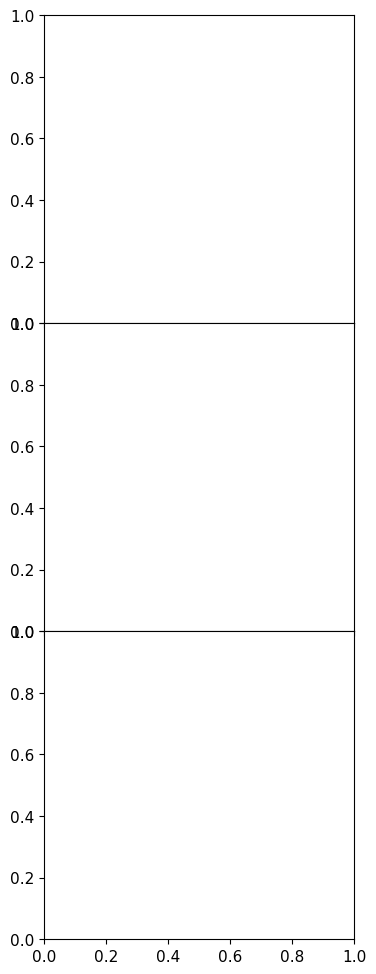

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy

matplotlib.rc('xtick', labelsize=11) 
matplotlib.rc('ytick', labelsize=11) 

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('viridis', 12)
print(viridis(np.linspace(0, 1, 6)))
                
fig, ax = plt.subplots(3,1, figsize=(4,12), sharex=True)
fig.subplots_adjust(hspace=0,wspace=0)
plt.tick_params(axis='both', which='major', labelsize=11)

binner=numpy.arange(9,11.6,0.5)
df123 = pd.read_csv('C:/Users/pauru/Documents/SKIRT/run/weights_grid.txt')
mbins = np.arange(9,12,0.5)
weights = numpy.array(df123['weights'])

df = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/table1.csv")
SFR=numpy.array(df["Star Formation Rate"])
Mstar=numpy.array(df["Stellar Mass"])
Mstar=[uk*(10**10) for uk in Mstar]
sSFR=[idk/Mstar[idknum] for idknum,idk in enumerate(SFR)]
df['sStar Formation Rate'] = sSFR
ids=numpy.array(df["ID"])
weights1=[weights[int(x[:-8][-2:])] for x in ids]
df['weights']=weights1

z_5=df.head(3844)
z_6=df.head(5616).tail(1772)
z_7=df.head(6389).tail(773)
z_8=df.head(6720).tail(331)
z_9=df.head(6846).tail(126)
z_10=df.tail(44)

z_5=z_5.sort_values('ID')
z_6=z_6.sort_values('ID')
z_7=z_7.sort_values('ID')
z_8=z_8.sort_values('ID')
z_9=z_9.sort_values('ID')
z_10=z_10.sort_values('ID')


Ms=np.array(z_5['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=0.15*np.array(z_5['HLR 250um IR'])
hlruv=0.15*np.array(z_5['UV HLR 1500A'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
wt=np.array(z_5['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[0].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[0],fmt='d',capsize=2,alpha=0.2)
ax[0].plot(xax,yax,color=clr[0],label='z=5')



Ms=np.array(z_6['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=0.15*np.array(z_6['HLR 250um IR'])
hlruv=0.15*np.array(z_6['UV HLR 1500A'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
wt=np.array(z_6['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[0].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[1],fmt='d',capsize=2,alpha=0.2)
ax[0].plot(xax[:-1],yax[:-1],color=clr[1],label='z=6')

Ms=np.array(z_7['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=0.15*np.array(z_7['HLR 250um IR'])
hlruv=0.15*np.array(z_7['UV HLR 1500A'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
wt=np.array(z_7['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[0].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[2],fmt='d',capsize=2,alpha=0.2)
ax[0].plot(xax[:-2],yax[:-2],color=clr[2],label='z=7')




Ms=np.array(z_8['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=0.15*np.array(z_8['HLR 250um IR'])
hlruv=0.15*np.array(z_8['UV HLR 1500A'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
wt=np.array(z_8['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[0].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[3],fmt='d',capsize=2,alpha=0.2)
ax[0].plot(xax[:-2],yax[:-2],color=clr[3],label='z=8')



Ms=np.array(z_9['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=0.15*np.array(z_9['HLR 250um IR'])
hlruv=0.15*np.array(z_9['UV HLR 1500A'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
wt=np.array(z_9['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[0].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[4],fmt='d',capsize=2,alpha=0.2)
ax[0].plot(xax[:-3],yax[:-3],color=clr[4],label='z=9')


Ms=np.array(z_10['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=0.15*np.array(z_10['HLR 250um IR'])
hlruv=0.15*np.array(z_10['UV HLR 1500A'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
wt=np.array(z_10['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[0].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[5],fmt='d',capsize=2,alpha=0.2)
ax[0].scatter(xax[:-4],yax[:-4],color=clr[5],marker='d')
ax[0].plot(xax[:-4],yax[:-4],color=clr[5],label='z=10')


ax[0].legend(loc='upper right',fontsize=10)
ax[0].set_xlabel("log$_{10}$(M$_*$) ($M_\u2609$)")
ax[0].set_ylabel("$R_{e,intrinsic,IR}$")

#plt.ylim(0,1)
ax[0].set_xlim(9.1,11.4)
ax[0].set_ylim(1e-1,10**0.5)
ax[0].set_yscale("log")

#ax[0].set_yticks([0.1,0.0],labels=[0.1,0.0],fontsize=11)
#plt.xticks(fontsize=11)

#ax[0].grid(which='minor', alpha=0.4,axis='y')
#ax[0].grid(which='major', alpha=0.7,axis='both')









imgdf2 = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/IRCentres.csv")
z_52=imgdf2.head(3844)
z_62=imgdf2.head(5616).tail(1772)
z_72=imgdf2.head(6389).tail(773)
z_82=imgdf2.head(6720).tail(331)
z_92=imgdf2.head(6846).tail(126)
z_102=imgdf2.tail(44)
z_52=z_52.sort_values('ID')
z_62=z_62.sort_values('ID')
z_72=z_72.sort_values('ID')
z_82=z_82.sort_values('ID')
z_92=z_92.sort_values('ID')
z_102=z_102.sort_values('ID')

binner=numpy.arange(9,11.6,0.5)


#hlrir=0.15*np.array(df['HLR 250um IR'])
Ms=np.array(z_5['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_52['HLR circ'])
hlruv=0.15*np.array(z_5['UV HLR 1500A'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
wt=np.array(z_5['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[1].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[0],fmt='d',capsize=2,alpha=0.2)
ax[1].plot(xax,yax,color=clr[0],label='z=5')


Ms=np.array(z_6['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_62['HLR circ'])
hlruv=0.15*np.array(z_6['UV HLR 1500A'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
wt=np.array(z_6['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[1].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[1],fmt='d',capsize=2,alpha=0.2)
ax[1].plot(xax[:-1],yax[:-1],color=clr[1],label='z=6')


Ms=np.array(z_7['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_72['HLR circ'])
hlruv=0.15*np.array(z_7['UV HLR 1500A'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
wt=np.array(z_7['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[1].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[2],fmt='d',capsize=2,alpha=0.2)
ax[1].plot(xax[:-2],yax[:-2],color=clr[2],label='z=7')



Ms=np.array(z_8['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_82['HLR circ'])
hlruv=0.15*np.array(z_8['UV HLR 1500A'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
wt=np.array(z_8['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[1].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[3],fmt='d',capsize=2,alpha=0.2)
ax[1].plot(xax[:-2],yax[:-2],color=clr[3],label='z=8')


Ms=np.array(z_9['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_92['HLR circ'])
hlruv=0.15*np.array(z_9['UV HLR 1500A'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
wt=np.array(z_9['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[1].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[4],fmt='d',capsize=2,alpha=0.2)
ax[1].plot(xax[:-3],yax[:-3],color=clr[4],label='z=9')



Ms=np.array(z_10['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_102['HLR circ'])
hlruv=0.15*np.array(z_10['UV HLR 1500A'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
wt=np.array(z_10['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[1].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[5],fmt='d',capsize=2,alpha=0.2)
ax[1].scatter(xax[:-4],yax[:-4],color=clr[5],marker='d')
ax[1].plot(xax[:-4],yax[:-4],color=clr[5],label='z=10')

ax[0].legend(loc='upper right',fontsize=8.5)
ax[1].set_xlabel("log$_{10}$(M$_*$) ($M_\u2609$)")
ax[1].set_ylabel("$R_{e,obs,IR,phot}$")

#plt.ylim(0,1)
ax[1].set_xlim(9.1,11.4)
ax[1].set_ylim(0.1,10**0.5)
ax[1].set_yscale("log")
plt.tick_params(axis='both', which='major', labelsize=11)
#ax[1].set_yticks([0.1,0.0,1.0],labels=[0.1,0.0,1.0],fontsize=11)
#ax[1].set_xticks(fontsize=11)
#ax[1].grid(which='minor', alpha=0.4,axis='y')
#ax[1].grid(which='major', alpha=0.7,axis='both')















import pandas as pd
import numpy as np
import numpy
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('viridis', 12)
print(viridis(np.linspace(0, 1, 6)))

cristaldf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/AlmaStatMorph.csv")
df = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/table1.csv")
df123 = pd.read_csv('C:/Users/pauru/Documents/SKIRT/run/weights_grid.txt')
mbins = np.arange(9,12,0.5)
weights = numpy.array(df123['weights'])

df = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/table1.csv")
SFR=numpy.array(df["Star Formation Rate"])
Mstar=numpy.array(df["Stellar Mass"])
Mstar=[uk*(10**10) for uk in Mstar]
sSFR=[idk/Mstar[idknum] for idknum,idk in enumerate(SFR)]
df['sStar Formation Rate'] = sSFR
ids=numpy.array(df["ID"])
weights1=[weights[int(x[:-8][-2:])] for x in ids]
df['weights']=weights1

rerez=[400,400,400,400,400,400]

#df=df.sort_values('ID')
#cristaldf=cristaldf.sort_values('ID')
c3almasize=[]
c3almasizeUNSORTED=[(cristaldf["HLR circ"][i]*400)/rerez[(int(x[59:][:-28])-5)] for i,x in enumerate(cristaldf["ID"])]

properID=[(x[57:][:-10]) for x in numpy.array(cristaldf["ID"])]
#print(properID)


for x in df["ID"]:
    indx=np.where(numpy.array(properID)==x.replace('/','_'))
    #print(x.replace('/','_'))
    #print(indx)
    #print(numpy.array(c3almasizeUNSORTED)[indx])
    c3almasize.append(numpy.array(c3almasizeUNSORTED)[indx][0])
    #print(c3almasize)

#print(c3almasize)
df['c3almasize'] = c3almasize
z_5=df.head(3844)
z_6=df.head(5616).tail(1772)
z_7=df.head(6389).tail(773)
z_8=df.head(6720).tail(331)
z_9=df.head(6846).tail(126)
z_10=df.tail(44)

z_5=z_5.sort_values('ID')
z_6=z_6.sort_values('ID')
z_7=z_7.sort_values('ID')
z_8=z_8.sort_values('ID')
z_9=z_9.sort_values('ID')
z_10=z_10.sort_values('ID')

binner=numpy.arange(9,11.6,0.5)

Ms=np.array(z_5['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_5['c3almasize'])
hlruv=0.15*np.array(z_5['UV HLR 1500A'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
wt=np.array(z_5['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[2].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[0],fmt='d',capsize=2,alpha=0.2)
ax[2].plot(xax,yax,color=clr[0],ls=":")



Ms=np.array(z_6['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_6['c3almasize'])
hlruv=0.15*np.array(z_6['UV HLR 1500A'])
wt=np.array(z_6['weights'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]

ax[2].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[1],fmt='d',capsize=2,alpha=0.2)
ax[2].plot(xax[:-1],yax[:-1],color=clr[1],ls=":")

Ms=np.array(z_7['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_7['c3almasize'])
hlruv=0.15*np.array(z_7['UV HLR 1500A'])
wt=np.array(z_7['weights'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]

ax[2].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[2],fmt='d',capsize=2,alpha=0.2)
ax[2].plot(xax[:-2],yax[:-2],color=clr[2],ls=":")




Ms=np.array(z_8['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_8['c3almasize'])
hlruv=0.15*np.array(z_8['UV HLR 1500A'])
wt=np.array(z_8['weights'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[2].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[3],fmt='d',capsize=2,alpha=0.2)
ax[2].plot(xax[:-2],yax[:-2],color=clr[3],ls=":")



Ms=np.array(z_9['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_9['c3almasize'])
hlruv=0.15*np.array(z_9['UV HLR 1500A'])
wt=np.array(z_9['weights'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[2].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[4],fmt='d',capsize=2,alpha=0.2)
ax[2].plot(xax[:-3],yax[:-3],color=clr[4],ls=":")


Ms=np.array(z_10['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_10['c3almasize'])
hlruv=0.15*np.array(z_10['UV HLR 1500A'])
wt=np.array(z_10['weights'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[2].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[5],fmt='d',capsize=2,alpha=0.2)
ax[2].scatter(xax[:-4],yax[:-4],color=clr[5],marker='d')
ax[2].plot(xax[:-4],yax[:-4],color=clr[5],ls=":")

#.legend(loc='best',fontsize=10)
ax[2].set_xlabel("log$_{10}$(M$_*$/$M_\u2609$)")
#ax[2].set_ylabel("$R_{IR,158um,C3}$/$R_{UV,1500A,sim}$")

ax[2].set_ylim(0,10)
ax[2].set_xlim(9.1,11.4)
#plt.axhline(y = 1, color = 'black', label = 'axvline - full height',alpha=0.5)

#plt.yticks(fontsize=11)
#plt.xticks(fontsize=11)
#ax[2].grid()





cristaldf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/CristalAlmaStatMorph.csv")
df = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/table1.csv")
df123 = pd.read_csv('C:/Users/pauru/Documents/SKIRT/run/weights_grid.txt')
mbins = np.arange(9,12,0.5)
weights = numpy.array(df123['weights'])

df = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/table1.csv")
SFR=numpy.array(df["Star Formation Rate"])
Mstar=numpy.array(df["Stellar Mass"])
Mstar=[uk*(10**10) for uk in Mstar]
sSFR=[idk/Mstar[idknum] for idknum,idk in enumerate(SFR)]
df['sStar Formation Rate'] = sSFR
ids=numpy.array(df["ID"])
weights1=[weights[int(x[:-8][-2:])] for x in ids]
df['weights']=weights1
rerez=[400,400,400,400,400,400]

#df=df.sort_values('ID')
#cristaldf=cristaldf.sort_values('ID')
c3almasize=[]
c3almasizeUNSORTED=[(cristaldf["HLR circ"][i]*400)/rerez[(int(x[63:][:-28])-5)] for i,x in enumerate(cristaldf["ID"])]

properID=[(x[61:][:-10]) for x in numpy.array(cristaldf["ID"])]
#print(properID)

for x in df["ID"]:
    indx=np.where(numpy.array(properID)==x.replace('/','_'))
    #print(x.replace('/','_'))
    #print(indx)
    #print(numpy.array(c3almasizeUNSORTED)[indx])
    c3almasize.append(numpy.array(c3almasizeUNSORTED)[indx][0])
    #print(c3almasize)

#print(c3almasize)

df['c3almasize'] = c3almasize
z_5=df.head(3844)
z_6=df.head(5616).tail(1772)
z_7=df.head(6389).tail(773)
z_8=df.head(6720).tail(331)
z_9=df.head(6846).tail(126)
z_10=df.tail(44)

z_5=z_5.sort_values('ID')
z_6=z_6.sort_values('ID')
z_7=z_7.sort_values('ID')
z_8=z_8.sort_values('ID')
z_9=z_9.sort_values('ID')
z_10=z_10.sort_values('ID')

binner=numpy.arange(9,11.6,0.5)

Ms=np.array(z_5['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_5['c3almasize'])
hlruv=0.15*np.array(z_5['UV HLR 1500A'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
wt=np.array(z_5['weights'])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[2].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[0],fmt='d',capsize=2,alpha=0.2)
ax[2].plot(xax,yax,color=clr[0])



Ms=np.array(z_6['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_6['c3almasize'])
hlruv=0.15*np.array(z_6['UV HLR 1500A'])
wt=np.array(z_6['weights'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]

ax[2].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[1],fmt='d',capsize=2,alpha=0.2)
ax[2].plot(xax[:-1],yax[:-1],color=clr[1])

Ms=np.array(z_7['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_7['c3almasize'])
hlruv=0.15*np.array(z_7['UV HLR 1500A'])
wt=np.array(z_7['weights'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]

ax[2].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[2],fmt='d',capsize=2,alpha=0.2)
ax[2].plot(xax[:-2],yax[:-2],color=clr[2])




Ms=np.array(z_8['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_8['c3almasize'])
hlruv=0.15*np.array(z_8['UV HLR 1500A'])
wt=np.array(z_8['weights'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[2].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[3],fmt='d',capsize=2,alpha=0.2)
ax[2].plot(xax[:-2],yax[:-2],color=clr[3])



Ms=np.array(z_9['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_9['c3almasize'])
hlruv=0.15*np.array(z_9['UV HLR 1500A'])
wt=np.array(z_9['weights'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[2].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[4],fmt='d',capsize=2,alpha=0.2)
ax[2].plot(xax[:-3],yax[:-3],color=clr[4])


Ms=np.array(z_10['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_10['c3almasize'])
hlruv=0.15*np.array(z_10['UV HLR 1500A'])
wt=np.array(z_10['weights'])
ratio = np.array([hlrir[i]/1 for i,x in enumerate(hlruv)])
out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
ax[2].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[5],fmt='d',capsize=2,alpha=0.2)
ax[2].scatter(xax[:-4],yax[:-4],color=clr[5],marker='d')
ax[2].plot(xax[:-4],yax[:-4],color=clr[5])

#.legend(loc='best',fontsize=10)
ax[2].set_xlabel("log$_{10}$(M$_*$/$M_\u2609$)")
#ax[2].set_ylabel("$R_{IR,158um,C3}$/$R_{UV,1500A,sim}$")

ax[2].set_ylim(0,10)
ax[2].set_xlim(9.1,11.4)
#plt.axhline(y = 1, color = 'black', label = 'axvline - full height',alpha=0.5)

#plt.yticks(fontsize=11)
#plt.xticks(fontsize=11)
#ax[2].grid()

#ax[2].legend(loc='best',fontsize=10)
#ax[2].set_xlabel("log$_{10}$(M$_*$/$M_\u2609$)")
ax[2].set_ylabel("$R_{e,obs,IR,alma}$")

ax[2].set_ylim(0.1,10**0.5)
ax[2].set_xlim(9.1,11.4)
ax[2].set_yscale("log")
#plt.axhline(y = 1, color = 'black', label = 'axvline - full height',alpha=0.5)

#plt.yticks(fontsize=11)
#plt.xticks(fontsize=11)
#ax[2].grid(which='minor', alpha=0.4,axis='y')
#ax[2].grid(which='major', alpha=0.7,axis='both')


cristalmasses=[10.30,10.15,10.16,10.09,10.00,
              9.84,9.99,9.68,9.65,9.51]
cristalmasserr=[0.28,0.29,0.35,0.30,0.33,0.39,0.31,0.33,0.34,0.36]
cristalsizes=[0.326,0.130,0.244,0.310,0.201,0.104,0.405,0.116,0.092,0.262]
cristalsizeserr=[0.076,0.072,0.105,0.071,0.153,0.079,0.226,0.091,0.070,0.153]
cristalredshift=[5.29,4.52,5.54,4.56,5.15,5.58,5.67,4.44,4.58,5.23]
cssizesrad=[x*4.84814e-6 for x in cristalsizes]
cssizeserrrad=[x*4.84814e-6 for x in cristalsizeserr]

from astropy.cosmology import Planck15 as cosmo
import astropy
import math

cristalsizeskpc=[]
cristalsizeskpcerr=[]
for i,x in enumerate(cristalredshift):
    cristalsizeskpc.append(cosmo.angular_diameter_distance(x).value*cssizesrad[i]*1e3)
    cristalsizeskpcerr.append(cosmo.angular_diameter_distance(x).value*cssizeserrrad[i]*1e3)
#cristalsizeskpc=[2.58, 1.76, 1.57, 1.49, 1.84, 0.87, 2.49, 1.44, 1.61, 1.48]
#cristalsizeskpcerr=[0.28, 0.36, 0.28, 0.22, 0.64, 0.41, 0.71, 0.43, 0.39, 0.48]
ax[2].errorbar(cristalmasses,cristalsizeskpc,yerr=cristalsizeskpcerr,xerr=cristalmasserr,markersize=3,color='red',fmt='d',capsize=2,alpha=0.2)
ax[2].scatter(cristalmasses,cristalsizeskpc,s=3,color='red',marker='d',label='Mitsuhashi+24')

MassBinnedRatio=[]
MassBinnedMass=[]
binner=numpy.arange(9.5,10.6,0.5)
clr=viridis(np.linspace(0, 1, 7))
for i,(b1,b2) in enumerate(zip(binner[:-1],binner[1:])):
    datatemparr=[]
    masstemparr=[]
    for j,x in enumerate(cristalmasses) :
        if((x >= b1) & (x < b2)):
            datatemparr.append(cristalsizeskpc[j])
            masstemparr.append(x)
    MassBinnedRatio.append(datatemparr)
    MassBinnedMass.append(masstemparr)
    
yax=[]
xax=[]
y16=[]
y84=[]
x16=[]
x84=[]


for i,x in enumerate(MassBinnedRatio):
    xax.append(numpy.nanmedian(MassBinnedMass[i]))
    x16.append(numpy.nanpercentile(MassBinnedMass[i],16))
    x84.append(numpy.nanpercentile(MassBinnedMass[i],84))
    yax.append(numpy.nanmedian(x))
    y16.append(numpy.nanpercentile(x,16))
    y84.append(numpy.nanpercentile(x,84))
    
yep=[y84[i]-sand for i,sand in enumerate(yax)]
yen=[sand-y16[i] for i,sand in enumerate(yax)]
ye=[yen,yep]

xep=[x84[i]-sand for i,sand in enumerate(xax)]
xen=[sand-x16[i] for i,sand in enumerate(xax)]
xe=[xen,xep]
#xax=[xax[0],xax[1],xax[2]]
#yax=[yax[0],yax[1],yax[2]]
#print(xax,yax)
ax[2].errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[4],fmt='d',capsize=2,alpha=0.2)
#ax[2].plot(numpy.unique(xax), numpy.poly1d(numpy.polyfit(xax,yax, 1))(numpy.unique(xax)),color='red')
#xaxis=numpy.linspace(9.25, 11.25, num=50)
yaxis=1.0751007963203594*xaxis-9.295088427114807
ax[2].plot(xaxis, yaxis,color='red',ls="-.")
ax[2].legend(loc="lower right",fontsize=10)

In [31]:
a, b = np.polyfit(cristalmasses, cristalsizeskpc, 1)
print(a, b)

print(
    np.min(cristalsizeskpc),
    np.max(cristalsizeskpc),
    np.mean(cristalsizeskpc),
    np.median(cristalsizeskpc),
    np.percentile(cristalsizeskpc, 16),
    np.percentile(cristalsizeskpc, 84),
)

1.0751007963203594 -9.295088427114807
0.6168131363083328 2.440003959173371 1.3881881859206036 1.3806801514094325 0.7009942969309602 2.0624654034190724


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import numpy

# FIGURE 20 and 21 from HPC

C:\Users\pauru\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\pauru\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1562: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\pauru\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\pauru\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1562: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<Figure size 500x500 with 0 Axes>

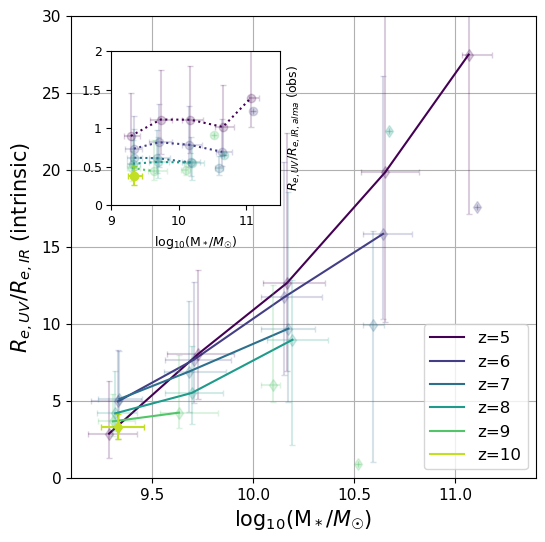

In [29]:
plt.figure(figsize=(5,5))
#plt.rcParams.update({'font.size': 15})
#plt.tick_params(axis="y",direction="in")
#plt.tick_params(axis="x",direction="in")

fig, axes = plt.subplots(1,1, figsize=(6, 6))


binner=numpy.arange(9,11.6,0.5)

Ms=np.array(z_5['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 

hlrir=0.15*np.array(z_5['HLR 250um IR'])
hlruv=0.15*np.array(z_5['UV HLR 1500A'])
wt=np.array(z_5['weights'])
ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])

out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]

axes.errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[0],fmt='d',capsize=2,alpha=0.2)
axes.plot(xax,yax,color=clr[0],label='z=5')



Ms=np.array(z_6['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 

hlrir=0.15*np.array(z_6['HLR 250um IR'])
hlruv=0.15*np.array(z_6['UV HLR 1500A'])
wt=np.array(z_6['weights'])
ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])

out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]

axes.errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[1],fmt='d',capsize=2,alpha=0.2)
axes.plot(xax[:-1],yax[:-1],color=clr[1],label='z=6')

Ms=np.array(z_7['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 

hlrir=0.15*np.array(z_7['HLR 250um IR'])
hlruv=0.15*np.array(z_7['UV HLR 1500A'])
wt=np.array(z_7['weights'])
ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])

out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
axes.errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[2],fmt='d',capsize=2,alpha=0.2)
axes.plot(xax[:-2],yax[:-2],color=clr[2],label='z=7')




Ms=np.array(z_8['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 

hlrir=0.15*np.array(z_8['HLR 250um IR'])
hlruv=0.15*np.array(z_8['UV HLR 1500A'])
wt=np.array(z_8['weights'])
ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])

out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]

axes.errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[3],fmt='d',capsize=2,alpha=0.2)
axes.plot(xax[:-2],yax[:-2],color=clr[3],label='z=8')



Ms=np.array(z_9['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 

hlrir=0.15*np.array(z_9['HLR 250um IR'])
hlruv=0.15*np.array(z_9['UV HLR 1500A'])
wt=np.array(z_9['weights'])
ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])

out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
axes.errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[4],fmt='d',capsize=2,alpha=0.2)
axes.plot(xax[:-3],yax[:-3],color=clr[4],label='z=9')


Ms=np.array(z_10['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 

hlrir=0.15*np.array(z_10['HLR 250um IR'])
hlruv=0.15*np.array(z_10['UV HLR 1500A'])
wt=np.array(z_10['weights'])
ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])

out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]

axes.errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[5],fmt='d',capsize=2,alpha=0.2)
axes.scatter(xax[:-4],yax[:-4],color=clr[5],marker='d')
axes.plot(xax[:-4],yax[:-4],color=clr[5],label='z=10')

axes.legend(loc='lower right',fontsize=12)
axes.set_xlabel("log$_{10}$(M$_*$/$M_\u2609$)")
axes.set_ylabel("$R_{e,UV}$/$R_{e,IR}$ (intrinsic)")

axes.set_ylim(0,30)
axes.set_xlim(9.1,11.4)


#plt.yticks(fontsize=11)
#plt.xticks(fontsize=11)
#plt.grid()



ins = axes.inset_axes([9.3,17.7,2.5/3,10], transform=axes.transData)







imgdf1 = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/NewResults.csv")
z_52=imgdf1.head(3844)
z_62=imgdf1.head(5616).tail(1772)
z_72=imgdf1.head(6389).tail(773)
z_82=imgdf1.head(6720).tail(331)
z_92=imgdf1.head(6846).tail(126)
z_102=imgdf1.tail(44)
z_52=z_52.sort_values('ID')
z_62=z_62.sort_values('ID')
z_72=z_72.sort_values('ID')
z_82=z_82.sort_values('ID')
z_92=z_92.sort_values('ID')
z_102=z_102.sort_values('ID')

cristaldf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/CristalAlmaStatMorph.csv")
df = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/table1.csv")
df123 = pd.read_csv('C:/Users/pauru/Documents/SKIRT/run/weights_grid.txt')
mbins = np.arange(9,12,0.5)
weights = numpy.array(df123['weights'])

df = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/table1.csv")
SFR=numpy.array(df["Star Formation Rate"])
Mstar=numpy.array(df["Stellar Mass"])
Mstar=[uk*(10**10) for uk in Mstar]
sSFR=[idk/Mstar[idknum] for idknum,idk in enumerate(SFR)]
df['sStar Formation Rate'] = sSFR
ids=numpy.array(df["ID"])
weights1=[weights[int(x[:-8][-2:])] for x in ids]
df['weights']=weights1
rerez=[400,400,400,400,400,400]

#df=df.sort_values('ID')
#cristaldf=cristaldf.sort_values('ID')
c3almasize=[]
c3almasizeUNSORTED=[(cristaldf["HLR circ"][i]*400)/rerez[(int(x[63:][:-28])-5)] for i,x in enumerate(cristaldf["ID"])]

properID=[(x[61:][:-10]) for x in numpy.array(cristaldf["ID"])]
#print(properID)

for x in df["ID"]:
    indx=np.where(numpy.array(properID)==x.replace('/','_'))
    #print(x.replace('/','_'))
    #print(indx)
    #print(numpy.array(c3almasizeUNSORTED)[indx])
    c3almasize.append(numpy.array(c3almasizeUNSORTED)[indx][0])
    #print(c3almasize)

#print(c3almasize)

df['c3almasize'] = c3almasize
z_5=df.head(3844)
z_6=df.head(5616).tail(1772)
z_7=df.head(6389).tail(773)
z_8=df.head(6720).tail(331)
z_9=df.head(6846).tail(126)
z_10=df.tail(44)

z_5=z_5.sort_values('ID')
z_6=z_6.sort_values('ID')
z_7=z_7.sort_values('ID')
z_8=z_8.sort_values('ID')
z_9=z_9.sort_values('ID')
z_10=z_10.sort_values('ID')


binner=numpy.arange(9,11.6,0.5)
Ms=np.array(z_5['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_5['c3almasize'])
hlruv=np.array(z_52['HLR circ'])
wt=np.array(z_5['weights'])
ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])

out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]

ins.errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[0],fmt='o',capsize=2,alpha=0.2)
ins.plot(xax,yax,color=clr[0],label='z=5',linestyle='dotted')



Ms=np.array(z_6['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_6['c3almasize'])
hlruv=np.array(z_62['HLR circ'])
wt=np.array(z_6['weights'])
ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])

out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]

ins.errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[1],fmt='o',capsize=2,alpha=0.2)
ins.plot(xax[:-1],yax[:-1],color=clr[1],label='z=6',linestyle='dotted')

Ms=np.array(z_7['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_7['c3almasize'])
hlruv=np.array(z_72['HLR circ'])
wt=np.array(z_7['weights'])
ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])

out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]


ins.errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[2],fmt='o',capsize=2,alpha=0.2)
ins.plot(xax[:-2],yax[:-2],color=clr[2],label='z=7',linestyle='dotted')




Ms=np.array(z_8['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_8['c3almasize'])
hlruv=np.array(z_82['HLR circ'])
wt=np.array(z_8['weights'])
ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])

out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]

ins.errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[3],fmt='o',capsize=2,alpha=0.2)
ins.plot(xax[:-2],yax[:-2],color=clr[3],label='z=8',linestyle='dotted')



Ms=np.array(z_9['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_9['c3almasize'])
hlruv=np.array(z_92['HLR circ'])
wt=np.array(z_9['weights'])
ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])

out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]



ins.errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[4],fmt='o',capsize=2,alpha=0.2)
ins.plot(xax[:-3],yax[:-3],color=clr[4],label='z=9',linestyle='dotted')


Ms=np.array(z_10['Stellar Mass'])
mtrue1=[x*1e10 for x in Ms] 
hlrir=np.array(z_10['c3almasize'])
hlruv=np.array(z_102['HLR circ'])
wt=np.array(z_10['weights'])
ratio = np.array([x/hlrir[i] for i,x in enumerate(hlruv)])

out5 = binned_weighted_quantile(np.log10(mtrue1), np.array(ratio), wt, binner, quantiles)
yax=[x[1] for x in out5]
yaxp=[x[0]-x[1] for x in out5]
yaxn=[x[1]-x[2] for x in out5]
out5 = binned_weighted_quantile(np.log10(mtrue1), np.log10(mtrue1), wt, binner, quantiles)
xax=[(x[1]) for x in out5]
xaxp=[(x[0]-x[1]) for x in out5]
xaxn=[(x[1]-x[2]) for x in out5]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]
xe=[xaxn,xaxp]
ye=[yaxn,yaxp]


ins.yaxis.set_label_position("right")

ins.errorbar(xax,yax,yerr=ye,xerr=xe,color=clr[5],fmt='d',capsize=2,alpha=0.2)
ins.scatter(xax[:-4],yax[:-4],color=clr[5],marker='d')
ins.plot(xax[:-4],yax[:-4],color=clr[5],linestyle='dotted')

#plt.legend(loc='best',fontsize=12)
ins.set_xlabel("log$_{10}$(M$_*$/$M_\u2609$)",fontsize=9)
ins.set_ylabel("$R_{e,UV}$/$R_{e,IR,alma}$ (obs)",fontsize=9)

#plt.ylim(0,10)
#plt.yscale("log")
ins.set_xlim(9.1,11.4)
#plt.axhline(y = 1, color = 'black',linestyle='dashed',alpha=1)
#plt.axhline(y = 0.5, color = 'black',linestyle='dashed',alpha=1)

ins.set_xlim(9,11.5)
ins.set_ylim(0,2)
ins.set_xticks([9,10,11],labels=[9,10,11],fontsize=9)
ins.set_yticks([0,0.5,1,1.5,2],labels=[0,0.5,1,1.5,2],fontsize=9)
#axes.grid()


In [ ]:
print(imgdf1)

half: 140.59121811773016
20,80: 81.60359088834754 181.79761855703552
concentration : 1.7393946001433336
That took 9.382273197174072 seconds
half: 144.06391520076463
20,80: 90.61346549655843 183.05351406790444
concentration : 1.5269266509153971
That took 9.223148822784424 seconds


half: 142.13336708228886
20,80: 85.48712178620421 182.35872898250733
concentration : 1.6451293061557548
That took 9.385469198226929 seconds
half: 144.2399916514956
20,80: 91.05640532883174 183.12048681032894
concentration : 1.517132163572509
That took 9.130724430084229 seconds


half: 141.70393529341672
20,80: 84.24690087384674 182.19796453964898
concentration : 1.6749479353944694
That took 9.451502084732056 seconds
half: 144.31289662389435
20,80: 91.23219931094692 183.14821213961366
concentration : 1.5132726955058315
That took 9.313480615615845 seconds


C:\Users\pauru\AppData\Local\Temp\ipykernel_23412\1588905285.py:717: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2,0].set_xticklabels(labels[:-1])
C:\Users\pauru\AppData\Local\Temp\ipykernel_23412\1588905285.py:719: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2,1].set_xticklabels(labels[:-1])


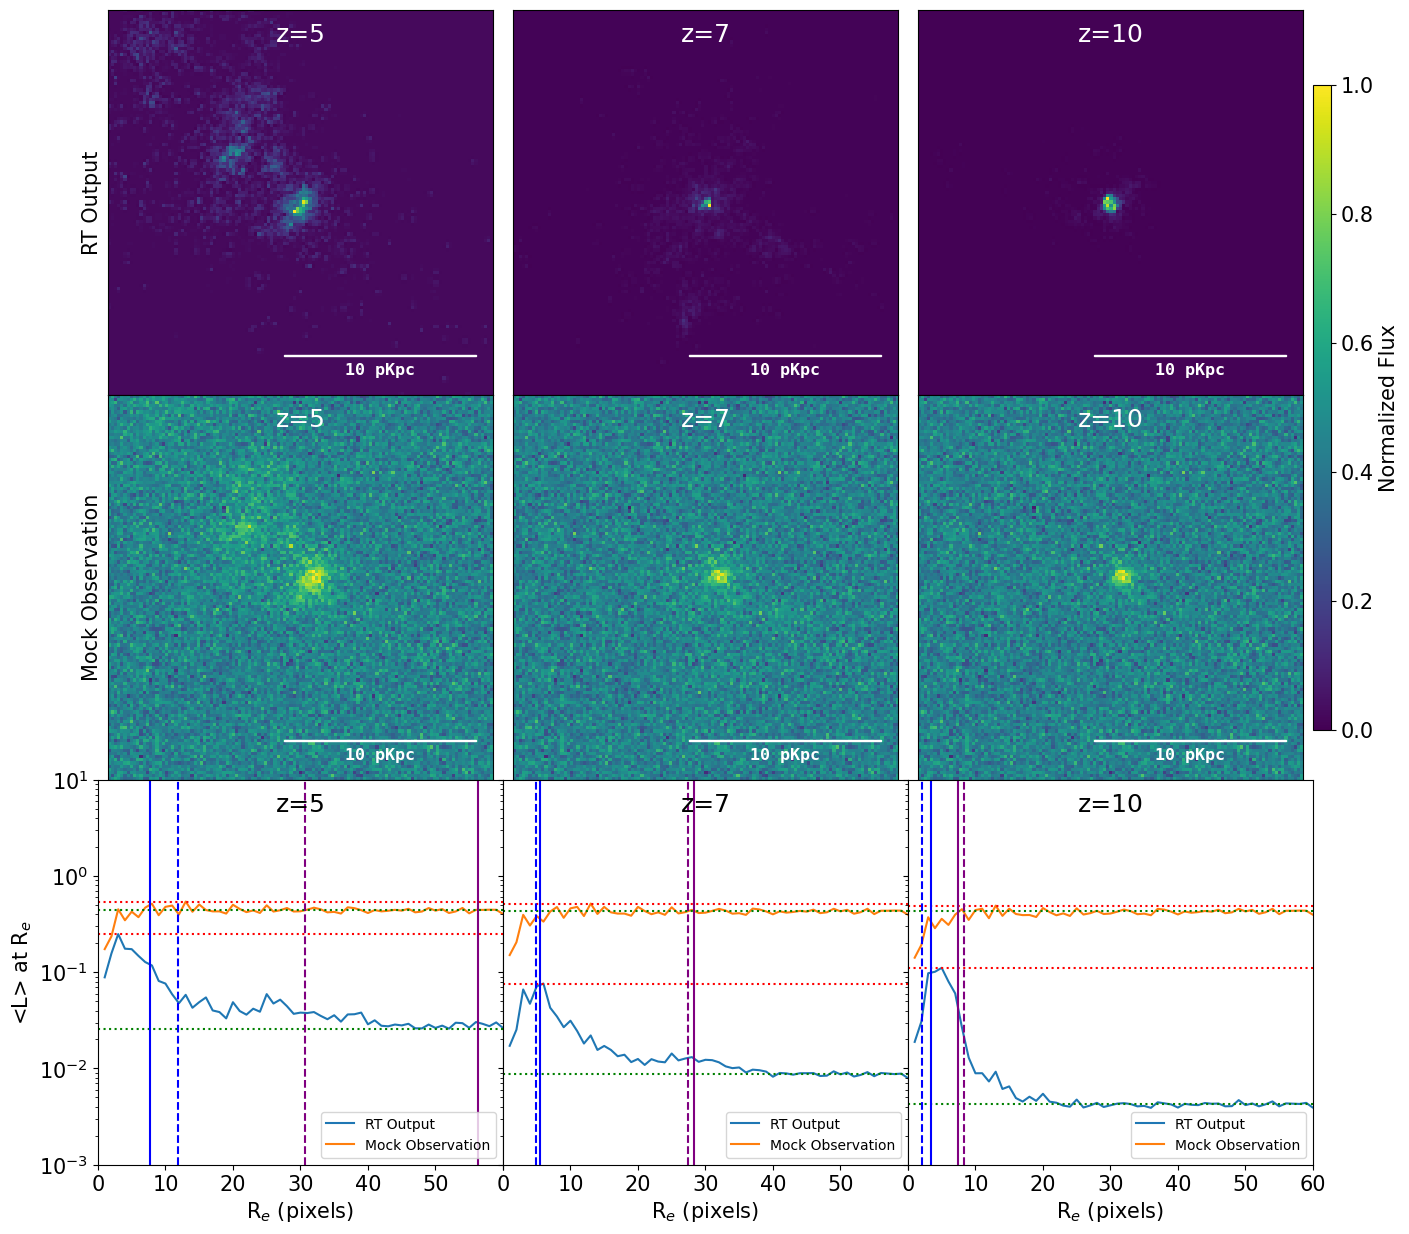

In [8]:
import numpy as np
import numpy
import math
import matplotlib.pyplot as plt
import time
from skimage import color, data, restoration
from astropy.io import fits
from PIL import Image
from astropy.visualization import simple_norm
from astropy.modeling.models import Sersic2D
from astropy.convolution import convolve, Gaussian2DKernel
from photutils.segmentation import detect_threshold, detect_sources
import time
import statmorph
from astropy.io import fits
import cv2
from PIL import Image
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import scipy.ndimage as ndimage
from matplotlib import ticker
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

plt.rcParams.update({"font.size": 15})

fig, ax = plt.subplots(3, 3, figsize=(18, 15))
fig.subplots_adjust(hspace=0, wspace=0)

start = time.time()


image1 = fits.getdata(
    "C:/Users/pauru/Documents/SKIRT/run/gal_013/flares_cube_UV_total.fits", ext=0
)[
    7
]  # z=5

imarr = Image.fromarray(image1)
image = np.array(imarr.resize((362, 362)))

clearimage = image
im = ax[0, 0].imshow(image, cmap="gray_r", interpolation="none", origin="lower")

psf1 = fits.getdata(
    "C:/Users/pauru/Downloads/PSF_NIRCam_in_flight_opd_filter_F090W.fits", ext=0
)
newpsf = Image.fromarray(psf1)
box = (620, 620, 660, 660)
newpsf1 = newpsf.crop(box)
psf = np.array(newpsf1.resize((39, 39)))
image = convolve(image, psf)
np.random.seed(3)
gain = 1e5
# image = np.random.poisson(image * gain) / gain

snp = 5.0
sky_sigma = np.max(image) / snp
image += sky_sigma * np.random.standard_normal(size=(362, 362))

justnoisy = image

im = ax[1, 0].imshow(image, cmap="gray_r", interpolation="none", origin="lower")


img = clearimage
image = (img - np.min(img)) / (np.max(img) - np.min(img))
im = ax[0, 0].imshow(image, cmap="viridis", interpolation="none", origin="lower")
allpixels = []
size_x = 0
size_y = 0
sumt = 0
sum_r = []
r = []
radius = 1
center = (177.5, 177.5)
k = math.ceil(center[0])
l = math.ceil(center[1])
total_light = []
for x2 in image:
    size_x += 1
    for y2 in x2:
        size_y += 1
        sumt += y2
        allpixels.append(y2)
total_light.append(sumt)
sumhf = 0
while sumhf < (0.8 * sumt):
    sumhf = 0
    m = max(0, k - radius)
    while m < min(k + radius + 1, size_x):
        n = max(0, l - radius)
        while n < min(l + radius + 1, size_y):
            current_point = (m, n)
            if abs(math.dist(current_point, center)) <= radius:
                sumhf += image[m][n]
            n += 1
        m += 1
    sum_r.append(sumhf)
    r.append(radius)
    radius += 1
clearsumr = sum_r
nr = numpy.array(r)
nsum_r = numpy.array(sum_r)
numpy_interpolated_radius = numpy.interp((sumt / 2), nsum_r, nr)
print("half:", numpy_interpolated_radius)
r20 = numpy.interp((sumt * 0.2), nsum_r, nr)
r80 = numpy.interp((sumt * 0.8), nsum_r, nr)
C = 5 * math.log((r80 / r20), 10)
print("20,80:", r20, r80)
print("concentration :", C)
print("That took {} seconds".format(time.time() - start))


start = time.time()

img = justnoisy
image = (img - np.min(img)) / (np.max(img) - np.min(img))
im = ax[1, 0].imshow(image, cmap="viridis", interpolation="none", origin="lower")
allpixels = []

size_x = 0
size_y = 0
sumt = 0
sum_r = []
r = []
radius = 1
center = (177.5, 177.5)
k = math.ceil(center[0])
l = math.ceil(center[1])
total_light = []
for x2 in image:
    size_x += 1
    for y2 in x2:
        size_y += 1
        sumt += y2
        allpixels.append(y2)
total_light.append(sumt)
sumhf = 0
while sumhf < (0.8 * sumt):
    sumhf = 0
    m = max(0, k - radius)
    while m < min(k + radius + 1, size_x):
        n = max(0, l - radius)
        while n < min(l + radius + 1, size_y):
            current_point = (m, n)
            if abs(math.dist(current_point, center)) <= radius:
                sumhf += image[m][n]
            n += 1
        m += 1
    sum_r.append(sumhf)
    r.append(radius)
    radius += 1
noisysumr = sum_r
nr = numpy.array(r)
nsum_r = numpy.array(sum_r)
numpy_interpolated_radius = numpy.interp((sumt / 2), nsum_r, nr)
print("half:", numpy_interpolated_radius)
r20 = numpy.interp((sumt * 0.2), nsum_r, nr)
r80 = numpy.interp((sumt * 0.8), nsum_r, nr)
C = 5 * math.log((r80 / r20), 10)
print("20,80:", r20, r80)
print("concentration :", C)
print("That took {} seconds".format(time.time() - start))
print("")
print("")


xax = []
yax = []
k = [0]
[k.append(x) for x in clearsumr]
for i, x in enumerate(k):
    # print(i,x,k[i-1])
    xax.append(i)
    yax.append(x - k[i - 1])
yax = [eno / (2 * math.pi * (num + 1)) for num, eno in enumerate(yax)]


def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr)) * diff) / diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr


xax = xax[1:]
# yax = normalize(yax[1:], 0, 1)
# print(yax)
ax[2, 0].plot(xax, yax[1:], label="RT Output")
ax[2, 0].axhline(y=numpy.median(yax[1:]), color="g", linestyle=":")
ax[2, 0].axhline(y=numpy.max(yax[1:]), color="r", linestyle=":")
ax[0, 0].set_ylabel("RT Output")
ax[1, 0].set_ylabel("Mock Observation")


xax = []
yax = []
k = [0]
[k.append(x) for x in noisysumr]
for i, x in enumerate(k):
    xax.append(i)
    yax.append(x - k[i - 1])
yax = [eno / (2 * math.pi * (num + 1)) for num, eno in enumerate(yax)]


def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr)) * diff) / diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr


xax = xax[1:]
ax[2, 0].plot(xax, yax[1:], label="Mock Observation")
ax[2, 0].axhline(y=numpy.median(yax[1:]), color="g", linestyle=":")
ax[2, 0].axhline(y=numpy.max(yax[1:]), color="r", linestyle=":")

ax[2, 0].set_ylim((1e-3, 1e1))
ax[2, 0].set_yscale("log")
ax[2, 0].set_ylabel("<L> at R$_e$")
ax[2, 0].set_xlabel("R$_e$ (pixels)")
ax[2, 0].set_title("z=5", y=1.0, pad=-23)
ax[2, 0].legend(loc="lower right", fontsize=10)


start = time.time()


image1 = fits.getdata(
    "C:/Users/pauru/Documents/SKIRT/run/gal_007/flares_cube_UV_total.fits", ext=0
)[
    7
]  # z=7


imarr = Image.fromarray(image1)
image = np.array(imarr.resize((362, 362)))
clearimage = image
im = ax[0, 1].imshow(image, cmap="gray_r", interpolation="none", origin="lower")

psf1 = fits.getdata(
    "C:/Users/pauru/Downloads/PSF_NIRCam_in_flight_opd_filter_F090W.fits", ext=0
)
newpsf = Image.fromarray(psf1)
box = (620, 620, 660, 660)
newpsf1 = newpsf.crop(box)
psf = np.array(newpsf1.resize((39, 39)))
image = convolve(image, psf)
np.random.seed(3)
gain = 1e5
# image = np.random.poisson(image * gain) / gain

snp = 5.0
sky_sigma = np.max(image) / snp
image += sky_sigma * np.random.standard_normal(size=(362, 362))

justnoisy = image

im = ax[1, 1].imshow(image, cmap="gray_r", interpolation="none", origin="lower")


img = clearimage
image = (img - np.min(img)) / (np.max(img) - np.min(img))
im = ax[0, 1].imshow(image, cmap="viridis", interpolation="none", origin="lower")
allpixels = []
size_x = 0
size_y = 0
sumt = 0
sum_r = []
r = []
radius = 1
center = (177.5, 177.5)
k = math.ceil(center[0])
l = math.ceil(center[1])
total_light = []
for x2 in image:
    size_x += 1
    for y2 in x2:
        size_y += 1
        sumt += y2
        allpixels.append(y2)
total_light.append(sumt)
sumhf = 0
while sumhf < (0.8 * sumt):
    sumhf = 0
    m = max(0, k - radius)
    while m < min(k + radius + 1, size_x):
        n = max(0, l - radius)
        while n < min(l + radius + 1, size_y):
            current_point = (m, n)
            if abs(math.dist(current_point, center)) <= radius:
                sumhf += image[m][n]
            n += 1
        m += 1
    sum_r.append(sumhf)
    r.append(radius)
    radius += 1
clearsumr = sum_r
nr = numpy.array(r)
nsum_r = numpy.array(sum_r)
numpy_interpolated_radius = numpy.interp((sumt / 2), nsum_r, nr)
print("half:", numpy_interpolated_radius)
r20 = numpy.interp((sumt * 0.2), nsum_r, nr)
r80 = numpy.interp((sumt * 0.8), nsum_r, nr)
C = 5 * math.log((r80 / r20), 10)
print("20,80:", r20, r80)
print("concentration :", C)
print("That took {} seconds".format(time.time() - start))


start = time.time()

img = justnoisy
image = (img - np.min(img)) / (np.max(img) - np.min(img))
im = ax[1, 1].imshow(image, cmap="viridis", interpolation="none", origin="lower")
allpixels = []

size_x = 0
size_y = 0
sumt = 0
sum_r = []
r = []
radius = 1
center = (177.5, 177.5)
k = math.ceil(center[0])
l = math.ceil(center[1])
total_light = []
for x2 in image:
    size_x += 1
    for y2 in x2:
        size_y += 1
        sumt += y2
        allpixels.append(y2)
total_light.append(sumt)
sumhf = 0
while sumhf < (0.8 * sumt):
    sumhf = 0
    m = max(0, k - radius)
    while m < min(k + radius + 1, size_x):
        n = max(0, l - radius)
        while n < min(l + radius + 1, size_y):
            current_point = (m, n)
            if abs(math.dist(current_point, center)) <= radius:
                sumhf += image[m][n]
            n += 1
        m += 1
    sum_r.append(sumhf)
    r.append(radius)
    radius += 1
noisysumr = sum_r
nr = numpy.array(r)
nsum_r = numpy.array(sum_r)
numpy_interpolated_radius = numpy.interp((sumt / 2), nsum_r, nr)
print("half:", numpy_interpolated_radius)
r20 = numpy.interp((sumt * 0.2), nsum_r, nr)
r80 = numpy.interp((sumt * 0.8), nsum_r, nr)
C = 5 * math.log((r80 / r20), 10)
print("20,80:", r20, r80)
print("concentration :", C)
print("That took {} seconds".format(time.time() - start))
print("")
print("")


xax = []
yax = []
k = [0]
[k.append(x) for x in clearsumr]
for i, x in enumerate(k):
    xax.append(i)
    yax.append(x - k[i - 1])
yax = [eno / (2 * math.pi * (num + 1)) for num, eno in enumerate(yax)]


def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr)) * diff) / diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr


xax = xax[1:]
ax[2, 1].plot(xax, yax[1:], label="RT Output")
ax[2, 1].axhline(y=numpy.median(yax[1:]), color="g", linestyle=":")
ax[2, 1].axhline(y=numpy.max(yax[1:]), color="r", linestyle=":")


xax = []
yax = []
k = [0]
[k.append(x) for x in noisysumr]
for i, x in enumerate(k):
    xax.append(i)
    yax.append(x - k[i - 1])
yax = [eno / (2 * math.pi * (num + 1)) for num, eno in enumerate(yax)]


def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr)) * diff) / diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr


xax = xax[1:]
ax[2, 1].plot(xax, yax[1:], label="Mock Observation")
ax[2, 1].axhline(y=numpy.median(yax[1:]), color="g", linestyle=":")
ax[2, 1].axhline(y=numpy.max(yax[1:]), color="r", linestyle=":")

ax[2, 1].set_ylim((1e-3, 1e1))
ax[2, 1].set_yscale("log")
# ax[2,1].set_ylabel("<L> at R$_e$")
ax[2, 1].set_xlabel("R$_e$ (pixels)")
ax[2, 1].set_title("z=7", y=1.0, pad=-23)
ax[2, 1].legend(loc="lower right", fontsize=10)


start = time.time()


image1 = fits.getdata(
    "C:/Users/pauru/Documents/SKIRT/run/gal_001/flares_cube_UV_total.fits", ext=0
)[
    7
]  # z=10

imarr = Image.fromarray(image1)
image = np.array(imarr.resize((362, 362)))

clearimage = image
im = ax[0, 2].imshow(image, cmap="gray_r", interpolation="none", origin="lower")

psf1 = fits.getdata(
    "C:/Users/pauru/Downloads/PSF_NIRCam_in_flight_opd_filter_F090W.fits", ext=0
)
newpsf = Image.fromarray(psf1)
box = (620, 620, 660, 660)
newpsf1 = newpsf.crop(box)
psf = np.array(newpsf1.resize((39, 39)))
image = convolve(image, psf)
np.random.seed(3)
gain = 1e5
# image = np.random.poisson(image * gain) / gain

snp = 5.0
sky_sigma = np.max(image) / snp
image += sky_sigma * np.random.standard_normal(size=(362, 362))
justnoisy = image

im = ax[1, 2].imshow(image, cmap="gray_r", interpolation="none", origin="lower")


img = clearimage
image = (img - np.min(img)) / (np.max(img) - np.min(img))
im = ax[0, 2].imshow(image, cmap="viridis", interpolation="none", origin="lower")
allpixels = []
size_x = 0
size_y = 0
sumt = 0
sum_r = []
r = []
radius = 1
center = (177.5, 177.5)
k = math.ceil(center[0])
l = math.ceil(center[1])
total_light = []
for x2 in image:
    size_x += 1
    for y2 in x2:
        size_y += 1
        sumt += y2
        allpixels.append(y2)
total_light.append(sumt)
sumhf = 0
while sumhf < (0.8 * sumt):
    sumhf = 0
    m = max(0, k - radius)
    while m < min(k + radius + 1, size_x):
        n = max(0, l - radius)
        while n < min(l + radius + 1, size_y):
            current_point = (m, n)
            if abs(math.dist(current_point, center)) <= radius:
                sumhf += image[m][n]
            n += 1
        m += 1
    sum_r.append(sumhf)
    r.append(radius)
    radius += 1
clearsumr = sum_r
nr = numpy.array(r)
nsum_r = numpy.array(sum_r)
numpy_interpolated_radius = numpy.interp((sumt / 2), nsum_r, nr)
print("half:", numpy_interpolated_radius)
r20 = numpy.interp((sumt * 0.2), nsum_r, nr)
r80 = numpy.interp((sumt * 0.8), nsum_r, nr)
C = 5 * math.log((r80 / r20), 10)
print("20,80:", r20, r80)
print("concentration :", C)
print("That took {} seconds".format(time.time() - start))


start = time.time()

img = justnoisy
image = (img - np.min(img)) / (np.max(img) - np.min(img))
im = ax[1, 2].imshow(image, cmap="viridis", interpolation="none", origin="lower")
allpixels = []

size_x = 0
size_y = 0
sumt = 0
sum_r = []
r = []
radius = 1
center = (177.5, 177.5)
k = math.ceil(center[0])
l = math.ceil(center[1])
total_light = []
for x2 in image:
    size_x += 1
    for y2 in x2:
        size_y += 1
        sumt += y2
        allpixels.append(y2)
total_light.append(sumt)
sumhf = 0
while sumhf < (0.8 * sumt):
    sumhf = 0
    m = max(0, k - radius)
    while m < min(k + radius + 1, size_x):
        n = max(0, l - radius)
        while n < min(l + radius + 1, size_y):
            current_point = (m, n)
            if abs(math.dist(current_point, center)) <= radius:
                sumhf += image[m][n]
            n += 1
        m += 1
    sum_r.append(sumhf)
    r.append(radius)
    radius += 1
noisysumr = sum_r
nr = numpy.array(r)
nsum_r = numpy.array(sum_r)
numpy_interpolated_radius = numpy.interp((sumt / 2), nsum_r, nr)
print("half:", numpy_interpolated_radius)
r20 = numpy.interp((sumt * 0.2), nsum_r, nr)
r80 = numpy.interp((sumt * 0.8), nsum_r, nr)
C = 5 * math.log((r80 / r20), 10)
print("20,80:", r20, r80)
print("concentration :", C)
print("That took {} seconds".format(time.time() - start))


xax = []
yax = []
k = [0]
[k.append(x) for x in clearsumr]
for i, x in enumerate(k):
    xax.append(i)
    yax.append(x - k[i - 1])
yax = [eno / (2 * math.pi * (num + 1)) for num, eno in enumerate(yax)]


def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr)) * diff) / diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr


xax = xax[1:]
ax[2, 2].plot(xax, yax[1:], label="RT Output")
ax[2, 2].axhline(y=numpy.median(yax[1:]), color="g", linestyle=":")
ax[2, 2].axhline(y=numpy.max(yax[1:]), color="r", linestyle=":")


xax = []
yax = []
k = [0]
[k.append(x) for x in noisysumr]
for i, x in enumerate(k):
    xax.append(i)
    yax.append(x - k[i - 1])
yax = [eno / (2 * math.pi * (num + 1)) for num, eno in enumerate(yax)]


def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr)) * diff) / diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr


xax = xax[1:]
ax[2, 2].plot(xax, yax[1:], label="Mock Observation")
ax[2, 2].axhline(y=numpy.median(yax[1:]), color="g", linestyle=":")
ax[2, 2].axhline(y=numpy.max(yax[1:]), color="r", linestyle=":")

ax[2, 2].set_ylim((1e-3, 1e1))
ax[2, 2].set_yscale("log")
# ax[2,2].set_ylabel("<L> at R$_e$")
ax[2, 2].set_xlabel("R$_e$ (pixels)")
ax[2, 2].set_title("z=10", y=1.0, pad=-23)
ax[2, 2].legend(loc="lower right", fontsize=10)


fig.subplots_adjust(right=0.8)

cbar_ax = fig.add_axes([0.80, 0.4, 0.01, 0.43])
fig.colorbar(im, cax=cbar_ax, label="Normalized Flux")

ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])
ax[0, 2].set_xticks([])
ax[0, 2].set_yticks([])
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])
ax[1, 2].set_xticks([])
ax[1, 2].set_yticks([])


fontprops = fm.FontProperties(size=12, family="monospace", weight="bold")
bar = AnchoredSizeBar(
    ax[0, 0].transData,
    60.3333333,
    "10 pKpc",
    4,
    pad=0.5,
    sep=5,
    borderpad=0.5,
    frameon=False,
    size_vertical=0.5,
    color="white",
    fontproperties=fontprops,
)
bar1 = AnchoredSizeBar(
    ax[0, 1].transData,
    60.3333333,
    "10 pKpc",
    4,
    pad=0.5,
    sep=5,
    borderpad=0.5,
    frameon=False,
    size_vertical=0.5,
    color="white",
    fontproperties=fontprops,
)
bar2 = AnchoredSizeBar(
    ax[0, 2].transData,
    60.3333333,
    "10 pKpc",
    4,
    pad=0.5,
    sep=5,
    borderpad=0.5,
    frameon=False,
    size_vertical=0.5,
    color="white",
    fontproperties=fontprops,
)
bar3 = AnchoredSizeBar(
    ax[1, 0].transData,
    60.3333333,
    "10 pKpc",
    4,
    pad=0.5,
    sep=5,
    borderpad=0.5,
    frameon=False,
    size_vertical=0.5,
    color="white",
    fontproperties=fontprops,
)
bar4 = AnchoredSizeBar(
    ax[1, 1].transData,
    60.3333333,
    "10 pKpc",
    4,
    pad=0.5,
    sep=5,
    borderpad=0.5,
    frameon=False,
    size_vertical=0.5,
    color="white",
    fontproperties=fontprops,
)
bar5 = AnchoredSizeBar(
    ax[1, 2].transData,
    60.3333333,
    "10 pKpc",
    4,
    pad=0.5,
    sep=5,
    borderpad=0.5,
    frameon=False,
    size_vertical=0.5,
    color="white",
    fontproperties=fontprops,
)


ax[0, 0].add_artist(bar)
ax[0, 1].add_artist(bar1)
ax[0, 2].add_artist(bar2)
ax[1, 0].add_artist(bar3)
ax[1, 1].add_artist(bar4)
ax[1, 2].add_artist(bar5)

ax[0, 0].set_title("z=5", y=1.0, pad=-23, color="white")
ax[0, 1].set_title("z=7", y=1.0, pad=-23, color="white")
ax[0, 2].set_title("z=10", y=1.0, pad=-23, color="white")
ax[1, 0].set_title("z=5", y=1.0, pad=-23, color="white")
ax[1, 1].set_title("z=7", y=1.0, pad=-23, color="white")
ax[1, 2].set_title("z=10", y=1.0, pad=-23, color="white")

# ax[2,0].set_yticklabels([])
# ax[2,0].set_xticklabels([])
ax[2, 1].set_yticklabels([])
# ax[2,1].set_xticklabels([])
ax[2, 2].set_yticklabels([])
# ax[2,2].set_xticklabels([])
ax[2, 0].axvline(x=7.73, color="b")
ax[2, 0].axvline(x=56.28, color="purple")


ax[2, 1].axvline(x=5.44, color="b")
ax[2, 1].axvline(x=28.24, color="purple")


ax[2, 2].axvline(x=3.36, color="b")
ax[2, 2].axvline(x=7.40, color="purple")


ax[2, 0].axvline(x=11.86, color="b", linestyle="--")
ax[2, 0].axvline(x=30.62, color="purple", linestyle="--")


ax[2, 1].axvline(x=4.92, color="b", linestyle="--")
ax[2, 1].axvline(x=27.35, color="purple", linestyle="--")


ax[2, 2].axvline(x=2.04, color="b", linestyle="--")
ax[2, 2].axvline(x=8.29, color="purple", linestyle="--")


ax[2, 0].set_xlim(0, 60)
ax[2, 1].set_xlim(0, 60)
ax[2, 2].set_xlim(0, 60)


ax[0, 0].set_xlim(133.33, 266.66)
ax[0, 1].set_xlim(133.33, 266.66)
ax[0, 2].set_xlim(133.33, 266.66)

ax[0, 0].set_ylim(133.33, 266.66)
ax[0, 1].set_ylim(133.33, 266.66)
ax[0, 2].set_ylim(133.33, 266.66)


ax[1, 0].set_xlim(120.666666, 241.333333)
ax[1, 1].set_xlim(120.666666, 241.333333)
ax[1, 2].set_xlim(120.666666, 241.333333)

ax[1, 0].set_ylim(120.666666, 241.333333)
ax[1, 1].set_ylim(120.666666, 241.333333)
ax[1, 2].set_ylim(120.666666, 241.333333)


ax[0, 0].set_xlim(120.666666, 241.333333)
ax[0, 1].set_xlim(120.666666, 241.333333)
ax[0, 2].set_xlim(120.666666, 241.333333)

ax[0, 0].set_ylim(120.666666, 241.333333)
ax[0, 1].set_ylim(120.666666, 241.333333)
ax[0, 2].set_ylim(120.666666, 241.333333)

labels = [tick.get_text() for tick in ax[2, 0].get_xticklabels()]
ax[2, 0].set_xticklabels(labels[:-1])
labels = [tick.get_text() for tick in ax[2, 1].get_xticklabels()]
ax[2, 1].set_xticklabels(labels[:-1])

plt.show()

In [ ]:
import math
import matplotlib.pyplot as plt
from importlib import reload

plt = reload(plt)

plt.rcParams.update({"font.size": 15})
plt.tick_params(axis="y", direction="in")
plt.tick_params(axis="x", direction="in")

lum_5 = numpy.array(z_5["UV Luminosity 1500A"])
hlr_5 = numpy.array(z_5["UV HLR 1500A"])
lum_5 = [math.log(x, 10) for x in lum_5]
hlr_5 = [math.log(0.15 * x, 10) for x in hlr_5]
lum_5_IR_50um = numpy.array(z_5["Luminosity 50um IR"])
hlr_5_IR_50um = numpy.array(z_5["HLR 50um IR"])
lum_5_IR_250um = numpy.array(z_5["Luminosity 250um IR"])
hlr_5_IR_250um = numpy.array(z_5["HLR 250um IR"])
lum_5_IR_50um = [math.log(x, 10) for x in lum_5_IR_50um]
hlr_5_IR_50um = [math.log(0.15 * x, 10) for x in hlr_5_IR_50um]
lum_5_IR_250um = [math.log(x, 10) for x in lum_5_IR_250um]
hlr_5_IR_250um = [math.log(0.15 * x, 10) for x in hlr_5_IR_250um]


xaxis = lum_5
yaxis = hlr_5
plt.plot(
    numpy.unique(xaxis),
    numpy.poly1d(numpy.polyfit(xaxis, yaxis, 1))(numpy.unique(xaxis)),
    color="purple",
    label="0.15um UV",
)

xaxis = lum_5_IR_50um
yaxis = hlr_5_IR_50um
plt.plot(
    numpy.unique(xaxis),
    numpy.poly1d(numpy.polyfit(xaxis, yaxis, 1))(numpy.unique(xaxis)),
    color="yellow",
    label="50um IR",
)

xaxis = lum_5_IR_250um
yaxis = hlr_5_IR_250um
plt.plot(
    numpy.unique(xaxis),
    numpy.poly1d(numpy.polyfit(xaxis, yaxis, 1))(numpy.unique(xaxis)),
    color="red",
    label="250um IR",
)


# plt.title("Effect of dust on Luminosity for increasing wavelength (z=5)")
plt.xlabel("log$_{10}$($L$) (erg/s/Hz)")
plt.ylabel("log$_{10}$($R_e$) (kpc)")
plt.legend(loc="upper right", fontsize=10)
plt.xlim([29, 31])


plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.grid()
plt.savefig("Effect of dust on Luminosity for increasing wavelength (z=7).png")

plt.show()

<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
C:\Users\pauru\AppData\Local\Temp\ipykernel_57644\2000995453.py:42: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("$log_{10}$($M_{\star}$/$M_\u2609)$", **hfont)


(array([ 9. ,  9.5, 10. , 10.5, 11. , 11.5]),
 [Text(9.0, 0, '9.0'),
  Text(9.5, 0, '9.5'),
  Text(10.0, 0, '10.0'),
  Text(10.5, 0, '10.5'),
  Text(11.0, 0, '11.0'),
  Text(11.5, 0, '11.5')])

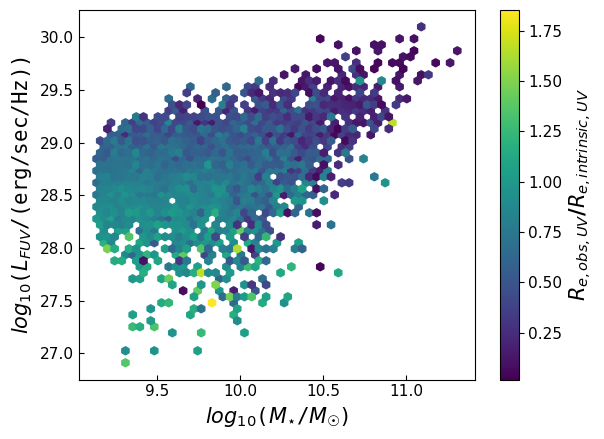

In [51]:
# imgdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/StatMorphResults15.csv")
imgdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/NewResults.csv")
z_52 = imgdf.head(3844)
z_62 = imgdf.head(5616).tail(1772)
z_72 = imgdf.head(6389).tail(773)
z_82 = imgdf.head(6720).tail(331)
z_92 = imgdf.head(6846).tail(126)
z_102 = imgdf.tail(44)
z_52 = z_52.sort_values("ID")
z_62 = z_62.sort_values("ID")
z_72 = z_72.sort_values("ID")
z_82 = z_82.sort_values("ID")
z_92 = z_92.sort_values("ID")
z_102 = z_102.sort_values("ID")

HLRreal = numpy.array(z_5["UV HLR 1500A"])
HLRreal = [potato * 0.15 for potato in HLRreal]
HLRobs = numpy.array(z_52["HLR circ"])
names = numpy.array(z_52["ID"])
names1 = numpy.array(z_5["ID"])
# flag=numpy.array

plt.rcParams.update({"font.size": 15})
plt.tick_params(axis="y", direction="in")
plt.tick_params(axis="x", direction="in")

ratio = [HLRobs[i] / x for i, x in enumerate(HLRreal)]
mass = numpy.array(z_5["Stellar Mass"])
mtot = [numpy.log10(x * (10**10)) for x in mass]
ltot = numpy.log10(z_5["UV Luminosity 1500A"])
hfont = {"fontname": "monospace"}


# plt.scatter(mtot,ratio)
# plt.hexbin(numpy.log10(z_5["UV Luminosity 1500A"]),numpy.log10(ratio),gridsize=30,bins="log",cmap='viridis',vmax=1000)
# im=plt.hexbin(mtot,numpy.log10(z_5["UV Luminosity 1500A"]),C=numpy.log10(ratio),gridsize=30,bins="log",cmap='viridis')
im = plt.hexbin(
    mtot, numpy.log10(z_5["UV Luminosity 1500A"]), C=ratio, gridsize=50, cmap="viridis"
)
cb = plt.colorbar(im)
cb.set_label(label="$R_{e,obs,UV}$/$R_{e,intrinsic,UV}$", size=15, weight="bold")
cb.ax.tick_params(labelsize=11)
plt.ylabel("$log_{10}$($L_{FUV}$/(erg/sec/Hz))", **hfont)
plt.xlabel("$log_{10}$($M_{\star}$/$M_\u2609)$", **hfont)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
# plt.yscale("log")
# print(z_5["Stellar Mass"])
# plt.grid()

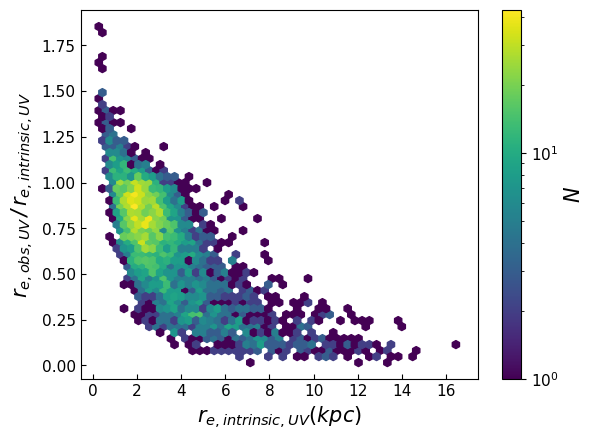

In [53]:
plt.rcParams.update({"font.size": 15})
plt.tick_params(axis="y", direction="in")
plt.tick_params(axis="x", direction="in")

im = plt.hexbin(HLRreal, ratio, bins="log", gridsize=50, cmap="viridis")
cb = plt.colorbar(im)
plt.xlabel("$r_{e,intrinsic,UV } (kpc)$", **hfont)
plt.ylabel("$r_{e,obs,UV}$/$r_{e,intrinsic,UV}$", **hfont)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
cb.set_label(label="$N$", size=15, weight="bold")
cb.ax.tick_params(labelsize=11)
# plt.grid()

In [25]:
lowratio = []
for i, x in enumerate(ratio):
    if (x < 0.5) & (mtot[i] > 10.5) & (ltot[i] > 29):
        lowratio.append(names[i])
np.savetxt("lowratio.txt", lowratio, delimiter=" ", newline="\n", fmt="%s")

In [ ]:
Lstar = 10**29.03


def lumobjective(x, a, b):
    return a * (((x) / Lstar) ** b)


def Marshall(x, z):
    a = [0.754, 0.671, 0.605, 0.567]  # 7,8,9,10
    b = [0.242, 0.166, 0.159, 0.12]
    return a[z] * ((x / Lstar) ** b[z])


def Roper(x, z):
    a = [1.692, 1.370, 1.126, 0.842, 0.793]  # 5,6,7,8,9
    b = [0.300, 0.279, 0.290, 0.319, 0.519]
    return a[z] * ((x / Lstar) ** b[z])


def Hol(x):
    return 0.57 * ((x / Lstar) ** 0.12)  # 9,10


z_5rr = rrdf.head(3844)
z_6rr = rrdf.head(5616).tail(1772)
z_7rr = rrdf.head(6389).tail(773)
z_8rr = rrdf.head(6720).tail(331)
z_9rr = rrdf.head(6846).tail(126)
z_10rr = rrdf.tail(44)
z_5rr = z_5rr.sort_values("ID")
z_6rr = z_6rr.sort_values("ID")
z_7rr = z_7rr.sort_values("ID")
z_8rr = z_8rr.sort_values("ID")
z_9rr = z_9rr.sort_values("ID")
z_10rr = z_10rr.sort_values("ID")

import math
import numpy as np
from scipy.optimize import curve_fit


fig, ax = plt.subplots(1, 6, figsize=(18, 3))
fig.subplots_adjust(hspace=0, wspace=0)

plt.rcParams.update({"font.size": 12})

lum = np.array(z_5["UV Luminosity 1500A"])
hlr = np.array(z_5rr["Roper Radius"])
# hlr=np.array(z_5['UV HLR 1500A'])
# wt=ws5
# hlr=np.array([0.15*x for x in hlr])
# hlr=np.array(z_7_binA["UV HLR 1500A"])
# hlr=np.array([0.15*val for val in hlr])

binner = numpy.arange(28.5, 30.1, 0.3)

# weight=[]
LumBin = []
HLRBin = []
xax = []
yaxp = []
yaxn = []
xaxp = []
xaxn = []

for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    currbinlum = []
    currbinHLR = []
    for j, x in enumerate(lum):
        if (x >= 10**b1) & (x < 10**b2):
            currbinlum.append(x)
            currbinHLR.append(hlr[j])
            # weights.append(wt[j])
    LumBin.append(currbinlum)
    HLRBin.append(currbinHLR)
yax = []


for num, tyu in enumerate(HLRBin):
    ax[0].scatter(LumBin[num], tyu, s=5, color="yellow", alpha=0.2)
    medianHLR = numpy.median(tyu)
    medianLum = numpy.median(LumBin[num])
    SFR16 = pd.Series(LumBin[num], dtype="float64").quantile(0.16)
    SFR84 = pd.Series(LumBin[num], dtype="float64").quantile(0.84)
    HLR16 = pd.Series(tyu, dtype="float64").quantile(0.16)
    HLR84 = pd.Series(tyu, dtype="float64").quantile(0.84)
    xaxp.append(SFR84 - medianLum)
    xaxn.append(medianLum - SFR16)
    yaxp.append(HLR84 - medianHLR)
    yaxn.append(medianHLR - HLR16)
    yax.append(medianHLR)
    xax.append(medianLum)


ax[0].scatter(xax, yax, marker="^", color="red", s=15)
xe = [xaxn, xaxp]
ye = [yaxn, yaxp]
x = []
y = []
xe1 = [[], []]
ye1 = [[], []]
for plp, abc in enumerate(yax):
    if ~np.isnan(abc):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])

# popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
popt, pcov = curve_fit(lumobjective, x[:-2], y[:-2], maxfev=1000)
a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

# ax[0].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis = numpy.linspace((10**28.5), 1.5 * (10**30), num=500)
yaxis = lumobjective(xaxis, a, b)
ax[0].plot(xaxis, yaxis, color="black")

# yaxism=Marshall(xaxis)
# ax[0].plot(xaxis,yaxism, label="Marshall+22",color='purple')
yaxism = Roper(xaxis, 0)
# ax[0].plot(xaxis,yaxism,color='magenta')
ax[0].set_xscale("log")
ax[0].set_yscale("log")
# plt.ylim([0.2,3.1])
# ax[0].set_xlabel("Luminosity at rest 1500A (in ergs/sec/Hz)")
# ax[0].set_ylabel("Sizes at 1500A (in Kpc))")
# plt.savefig("LumPowerLaw5.pdf")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e28, 1.584893192461111e30, 100)
(l0,) = ax[0].plot(
    hires_x, lumobjective(hires_x, *best_fit_ab), "black", label="This study"
)
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[0].fill_between(hires_x, bound_lower, bound_upper, color="black", alpha=0.25)
# ax[0].legend(loc="lower right",fontsize=10)
ax[0].grid()


lum = np.array(z_6["UV Luminosity 1500A"])
hlr = np.array(z_6rr["Roper Radius"])
# hlr=np.array(z_5['UV HLR 1500A'])
# wt=ws5
# hlr=np.array([0.15*x for x in hlr])
# hlr=np.array(z_7_binA["UV HLR 1500A"])
# hlr=np.array([0.15*val for val in hlr])

binner = numpy.arange(28.5, 30.1, 0.3)

# weight=[]
LumBin = []
HLRBin = []
xax = []
yaxp = []
yaxn = []
xaxp = []
xaxn = []

for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    currbinlum = []
    currbinHLR = []
    for j, x in enumerate(lum):
        if (x >= 10**b1) & (x < 10**b2):
            currbinlum.append(x)
            currbinHLR.append(hlr[j])
            # weights.append(wt[j])
    LumBin.append(currbinlum)
    HLRBin.append(currbinHLR)
yax = []


for num, tyu in enumerate(HLRBin):
    ax[1].scatter(LumBin[num], tyu, s=5, color="yellow", alpha=0.2)
    medianHLR = numpy.median(tyu)
    medianLum = numpy.median(LumBin[num])
    SFR16 = pd.Series(LumBin[num], dtype="float64").quantile(0.16)
    SFR84 = pd.Series(LumBin[num], dtype="float64").quantile(0.84)
    HLR16 = pd.Series(tyu, dtype="float64").quantile(0.16)
    HLR84 = pd.Series(tyu, dtype="float64").quantile(0.84)
    xaxp.append(SFR84 - medianLum)
    xaxn.append(medianLum - SFR16)
    yaxp.append(HLR84 - medianHLR)
    yaxn.append(medianHLR - HLR16)
    yax.append(medianHLR)
    xax.append(medianLum)


ax[1].scatter(xax, yax, marker="^", color="red", s=15)
xe = [xaxn, xaxp]
ye = [yaxn, yaxp]
x = []
y = []
xe1 = [[], []]
ye1 = [[], []]
for plp, abc in enumerate(yax):
    if ~np.isnan(abc):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])

# popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
popt, pcov = curve_fit(lumobjective, x[:-2], y[:-2], maxfev=1000)
a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

# ax[1].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis = numpy.linspace((10**28.5), 1.5 * (10**30), num=500)
yaxis = lumobjective(xaxis, a, b)
ax[1].plot(xaxis, yaxis, color="black")

# yaxism=Marshall(xaxis)
# ax[1].plot(xaxis,yaxism, label="Marshall+22",color='purple')
yaxism = Roper(xaxis, 1)
# ax[1].plot(xaxis,yaxism,color='magenta')

ax[1].set_xscale("log")
ax[1].set_yscale("log")
# plt.ylim([0.2,3.1])
# ax[1].set_xlabel("Luminosity at rest 1500A (in ergs/sec/Hz)(z=7)")
# ax[1].set_ylabel("Sizes at 1500A (in Kpc))")
# plt.savefig("LumPowerLaw5.pdf")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e28, 1.584893192461111e30, 100)
ax[1].plot(hires_x, lumobjective(hires_x, *best_fit_ab), "black", label="This study")
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[1].fill_between(hires_x, bound_lower, bound_upper, color="black", alpha=0.25)
# ax[1].legend(loc="best",fontsize=10)
ax[1].grid()


lum = np.array(z_7["UV Luminosity 1500A"])
hlr = np.array(z_7rr["Roper Radius"])
# hlr=np.array(z_5['UV HLR 1500A'])
# wt=ws5
# hlr=np.array([0.15*x for x in hlr])
# hlr=np.array(z_7_binA["UV HLR 1500A"])
# hlr=np.array([0.15*val for val in hlr])

binner = numpy.arange(28.5, 30.1, 0.3)

# weight=[]
LumBin = []
HLRBin = []
xax = []
yaxp = []
yaxn = []
xaxp = []
xaxn = []

for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    currbinlum = []
    currbinHLR = []
    for j, x in enumerate(lum):
        if (x >= 10**b1) & (x < 10**b2):
            currbinlum.append(x)
            currbinHLR.append(hlr[j])
            # weights.append(wt[j])
    LumBin.append(currbinlum)
    HLRBin.append(currbinHLR)
yax = []


for num, tyu in enumerate(HLRBin):
    ax[2].scatter(LumBin[num], tyu, s=5, color="yellow", alpha=0.2)
    medianHLR = numpy.median(tyu)
    medianLum = numpy.median(LumBin[num])
    SFR16 = pd.Series(LumBin[num], dtype="float64").quantile(0.16)
    SFR84 = pd.Series(LumBin[num], dtype="float64").quantile(0.84)
    HLR16 = pd.Series(tyu, dtype="float64").quantile(0.16)
    HLR84 = pd.Series(tyu, dtype="float64").quantile(0.84)
    xaxp.append(SFR84 - medianLum)
    xaxn.append(medianLum - SFR16)
    yaxp.append(HLR84 - medianHLR)
    yaxn.append(medianHLR - HLR16)
    yax.append(medianHLR)
    xax.append(medianLum)


ax[2].scatter(xax, yax, marker="^", color="red", s=15)
xe = [xaxn, xaxp]
ye = [yaxn, yaxp]
x = []
y = []
xe1 = [[], []]
ye1 = [[], []]
for plp, abc in enumerate(yax):
    if ~np.isnan(abc):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])

# popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
popt, pcov = curve_fit(lumobjective, x[:-2], y[:-2], maxfev=1000)
a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

# ax[2].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis = numpy.linspace((10**28.5), 1.5 * (10**30), num=500)
yaxis = lumobjective(xaxis, a, b)
ax[2].plot(xaxis, yaxis, color="black")

yaxism = Marshall(xaxis, 0)
# ax[2].plot(xaxis,yaxism,color='blue')
yaxism = Roper(xaxis, 2)
# ax[2].plot(xaxis,yaxism, color='magenta')
ax[2].set_xscale("log")
ax[2].set_yscale("log")
# plt.ylim([0.2,3.1])
# ax[2].set_xlabel("Luminosity at rest 1500A (in ergs/sec/Hz)(z=7)")
# ax[2].set_ylabel("Sizes at 1500A (in Kpc))")
# plt.savefig("LumPowerLaw5.pdf")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e28, 1.584893192461111e30, 100)
ax[2].plot(hires_x, lumobjective(hires_x, *best_fit_ab), "black", label="This study")
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[2].fill_between(hires_x, bound_lower, bound_upper, color="black", alpha=0.25)
# ax[2].legend(loc="best",fontsize=10)
ax[2].grid()


lum = np.array(z_8["UV Luminosity 1500A"])
hlr = np.array(z_8rr["Roper Radius"])
# hlr=np.array(z_5['UV HLR 1500A'])
# wt=ws5
# hlr=np.array([0.15*x for x in hlr])
# hlr=np.array(z_7_binA["UV HLR 1500A"])
# hlr=np.array([0.15*val for val in hlr])

binner = numpy.arange(28.5, 30.1, 0.3)

# weight=[]
LumBin = []
HLRBin = []
xax = []
yaxp = []
yaxn = []
xaxp = []
xaxn = []

for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    currbinlum = []
    currbinHLR = []
    for j, x in enumerate(lum):
        if (x >= 10**b1) & (x < 10**b2):
            currbinlum.append(x)
            currbinHLR.append(hlr[j])
            # weights.append(wt[j])
    LumBin.append(currbinlum)
    HLRBin.append(currbinHLR)
yax = []


for num, tyu in enumerate(HLRBin):
    ax[3].scatter(LumBin[num], tyu, s=5, color="yellow", alpha=0.2)
    medianHLR = numpy.median(tyu)
    medianLum = numpy.median(LumBin[num])
    SFR16 = pd.Series(LumBin[num], dtype="float64").quantile(0.16)
    SFR84 = pd.Series(LumBin[num], dtype="float64").quantile(0.84)
    HLR16 = pd.Series(tyu, dtype="float64").quantile(0.16)
    HLR84 = pd.Series(tyu, dtype="float64").quantile(0.84)
    xaxp.append(SFR84 - medianLum)
    xaxn.append(medianLum - SFR16)
    yaxp.append(HLR84 - medianHLR)
    yaxn.append(medianHLR - HLR16)
    yax.append(medianHLR)
    xax.append(medianLum)


ax[3].scatter(xax, yax, marker="^", color="red", s=15)
xe = [xaxn, xaxp]
ye = [yaxn, yaxp]
x = []
y = []
xe1 = [[], []]
ye1 = [[], []]
for plp, abc in enumerate(yax):
    if ~np.isnan(abc):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])

# popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
popt, pcov = curve_fit(lumobjective, x[:-2], y[:-2], maxfev=1000)
a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

# ax[3].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis = numpy.linspace((10**28.5), 1.5 * (10**30), num=500)
yaxis = lumobjective(xaxis, a, b)
ax[3].plot(xaxis, yaxis, color="black")

yaxism = Marshall(xaxis, 1)
# [3].plot(xaxis,yaxism, label="Marshall+22",color='blue')
yaxism = Roper(xaxis, 3)
# ax[3].plot(xaxis,yaxism,color='magenta')
ax[3].set_xscale("log")
ax[3].set_yscale("log")
# plt.ylim([0.2,3.1])
# ax[3].set_xlabel("Luminosity at rest 1500A (in ergs/sec/Hz)(z=7)")
# ax[3].set_ylabel("Sizes at 1500A (in Kpc))")
# plt.savefig("LumPowerLaw5.pdf")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e28, 1.584893192461111e30, 100)
ax[3].plot(hires_x, lumobjective(hires_x, *best_fit_ab), "black", label="This study")
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[3].fill_between(hires_x, bound_lower, bound_upper, color="black", alpha=0.25)
# ax[3].legend(loc="best",fontsize=10)
ax[3].grid()


lum = np.array(z_9["UV Luminosity 1500A"])
hlr = np.array(z_9rr["Roper Radius"])
# hlr=np.array(z_5['UV HLR 1500A'])
# wt=ws5
# hlr=np.array([0.15*x for x in hlr])
# hlr=np.array(z_7_binA["UV HLR 1500A"])
# hlr=np.array([0.15*val for val in hlr])

binner = numpy.arange(28.5, 30.1, 0.3)

# weight=[]
LumBin = []
HLRBin = []
xax = []
yaxp = []
yaxn = []
xaxp = []
xaxn = []

for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    currbinlum = []
    currbinHLR = []
    for j, x in enumerate(lum):
        if (x >= 10**b1) & (x < 10**b2):
            currbinlum.append(x)
            currbinHLR.append(hlr[j])
            # weights.append(wt[j])
    LumBin.append(currbinlum)
    HLRBin.append(currbinHLR)
yax = []


for num, tyu in enumerate(HLRBin):
    ax[4].scatter(LumBin[num], tyu, s=5, color="yellow", alpha=0.2)
    medianHLR = numpy.median(tyu)
    medianLum = numpy.median(LumBin[num])
    SFR16 = pd.Series(LumBin[num], dtype="float64").quantile(0.16)
    SFR84 = pd.Series(LumBin[num], dtype="float64").quantile(0.84)
    HLR16 = pd.Series(tyu, dtype="float64").quantile(0.16)
    HLR84 = pd.Series(tyu, dtype="float64").quantile(0.84)
    xaxp.append(SFR84 - medianLum)
    xaxn.append(medianLum - SFR16)
    yaxp.append(HLR84 - medianHLR)
    yaxn.append(medianHLR - HLR16)
    yax.append(medianHLR)
    xax.append(medianLum)


ax[4].scatter(xax, yax, marker="^", color="red", s=15)
xe = [xaxn, xaxp]
ye = [yaxn, yaxp]
x = []
y = []
xe1 = [[], []]
ye1 = [[], []]
for plp, abc in enumerate(yax):
    if ~np.isnan(abc):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])

# popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
popt, pcov = curve_fit(lumobjective, x[:-1], y[:-1], maxfev=1000)
a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

# ax[4].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis = numpy.linspace((10**28.5), 1.5 * (10**30), num=500)
yaxis = lumobjective(xaxis, a, b)
ax[4].plot(xaxis, yaxis, color="black")

yaxism = Marshall(xaxis, 2)
# ax[4].plot(xaxis,yaxism, label="Marshall+22",color='blue')
yaxism = Hol(xaxis)
# ax[4].plot(xaxis,yaxism,color='purple')
yaxism = Roper(xaxis, 4)
# l3, =ax[4].plot(xaxis,yaxism,color='magenta')


ax[4].set_xscale("log")
ax[4].set_yscale("log")
# plt.ylim([0.2,3.1])
# ax[4].set_xlabel("Luminosity at rest 1500A (in ergs/sec/Hz)(z=7)")
# ax[4].set_ylabel("Sizes at 1500A (in Kpc))")
# plt.savefig("LumPowerLaw5.pdf")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e28, 1.584893192461111e30, 100)
ax[4].plot(hires_x, lumobjective(hires_x, *best_fit_ab), "black", label="This study")
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[4].fill_between(hires_x, bound_lower, bound_upper, color="black", alpha=0.25)
# ax[4].legend(loc="best",fontsize=10)
ax[4].grid()


lum = np.array(z_10["UV Luminosity 1500A"])
hlr = np.array(z_10rr["Roper Radius"])
# hlr=np.array(z_5['UV HLR 1500A'])
# wt=ws5
# hlr=np.array([0.15*x for x in hlr])
# hlr=np.array(z_7_binA["UV HLR 1500A"])
# hlr=np.array([0.15*val for val in hlr])

binner = numpy.arange(28.5, 30.1, 0.3)

# weight=[]
LumBin = []
HLRBin = []
xax = []
yaxp = []
yaxn = []
xaxp = []
xaxn = []

for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    currbinlum = []
    currbinHLR = []
    for j, x in enumerate(lum):
        if (x >= 10**b1) & (x < 10**b2):
            currbinlum.append(x)
            currbinHLR.append(hlr[j])
            # weights.append(wt[j])
    LumBin.append(currbinlum)
    HLRBin.append(currbinHLR)
yax = []


for num, tyu in enumerate(HLRBin):
    ax[5].scatter(LumBin[num], tyu, s=5, color="yellow", alpha=0.2)
    medianHLR = numpy.median(tyu)
    medianLum = numpy.median(LumBin[num])
    SFR16 = pd.Series(LumBin[num], dtype="float64").quantile(0.16)
    SFR84 = pd.Series(LumBin[num], dtype="float64").quantile(0.84)
    HLR16 = pd.Series(tyu, dtype="float64").quantile(0.16)
    HLR84 = pd.Series(tyu, dtype="float64").quantile(0.84)
    xaxp.append(SFR84 - medianLum)
    xaxn.append(medianLum - SFR16)
    yaxp.append(HLR84 - medianHLR)
    yaxn.append(medianHLR - HLR16)
    yax.append(medianHLR)
    xax.append(medianLum)


ax[5].scatter(xax, yax, marker="^", color="red", s=15)
xe = [xaxn, xaxp]
ye = [yaxn, yaxp]
x = []
y = []
xe1 = [[], []]
ye1 = [[], []]
for plp, abc in enumerate(yax):
    if ~np.isnan(abc):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])

# popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
popt, pcov = curve_fit(lumobjective, x[:-2], y[:-2], maxfev=1000)
a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

# ax[5].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis = numpy.linspace((10**28.5), 1.5 * (10**30), num=500)
yaxis = lumobjective(xaxis, a, b)
ax[5].plot(xaxis, yaxis, color="black")

yaxism = Marshall(xaxis, 3)
# l2, =ax[5].plot(xaxis,yaxism,color='blue')
yaxism = Hol(xaxis)
# l1, =ax[5].plot(xaxis,yaxism,color='purple')
# yaxism=Roper(xaxis,4)
# ax[5].plot(xaxis,yaxism,color='magenta')

ax[5].set_xscale("log")
ax[5].set_yscale("log")
# ax[5].set_ylim([0.1,25])
# ax[5].set_xlabel("Luminosity at rest 1500A (in ergs/sec/Hz)(z=7)")
# ax[5].set_ylabel("Sizes at 1500A (in Kpc))")
# plt.savefig("LumPowerLaw5.pdf")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e28, 1.584893192461111e30, 100)
ax[5].plot(hires_x, lumobjective(hires_x, *best_fit_ab), "black", label="This study")
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[5].fill_between(hires_x, bound_lower, bound_upper, color="black", alpha=0.25)
# ax[5].legend(loc="best",fontsize=10)
ax[5].grid()
# ax[4].set_ylim([0.1,25])
# ax[3].set_ylim([0.1,25])
# ax[2].set_ylim([0.1,25])
# ax[1].set_ylim([0.1,25])
# ax[0].set_ylim([0.1,25])


# ax[2].set_xlabel("$L_{1500A}$ (ergs/sec/Hz)",loc='left',size=20)
ax[0].set_ylabel("$R_e$ (Kpc) (Pixel Method)", size=20)


ax[0].set_title("z=5", y=1.0, pad=-23)
ax[1].set_title("z=6", y=1.0, pad=-23)
ax[2].set_title("z=7", y=1.0, pad=-23)
ax[3].set_title("z=8", y=1.0, pad=-23)
ax[4].set_title("z=9", y=1.0, pad=-23)
ax[5].set_title("z=10", y=1.0, pad=-23)

ax[1].set_yticklabels([])
ax[2].set_yticklabels([])
ax[3].set_yticklabels([])
ax[4].set_yticklabels([])
ax[5].set_yticklabels([])

ax[5].set_ylim([0, 110])
ax[4].set_ylim([0, 110])
ax[3].set_ylim([0, 110])
ax[2].set_ylim([0, 110])
ax[1].set_ylim([0, 110])
ax[0].set_ylim([0, 110])


# labels=["Pixel Method HLR for RT","Holwerda+2015","Marshall+2022","FLARES IV (LoS)"]
# ls=[l0,l1,l2,l3]
# fig.legend(ls, labels, loc = "upper center", ncol=5)

for x in ax:
    x.grid(which="minor", alpha=0.4, axis="y")
    x.grid(which="major", alpha=0.7, axis="both")


lum = np.array(z_5["UV Luminosity 1500A"])
hlr = np.array(z_5["UV HLR 1500A"])
# hlr=np.array(z_5['UV HLR 1500A'])
# wt=ws5
# hlr=np.array([0.15*x for x in hlr])
# hlr=np.array(z_7_binA["UV HLR 1500A"])
# hlr=np.array([0.15*val for val in hlr])

binner = numpy.arange(28.5, 30.1, 0.3)

# weight=[]
LumBin = []
HLRBin = []
xax = []
yaxp = []
yaxn = []
xaxp = []
xaxn = []

for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    currbinlum = []
    currbinHLR = []
    for j, x in enumerate(lum):
        if (x >= 10**b1) & (x < 10**b2):
            currbinlum.append(x)
            currbinHLR.append(hlr[j])
            # weights.append(wt[j])
    LumBin.append(currbinlum)
    HLRBin.append(currbinHLR)
yax = []


for num, tyu in enumerate(HLRBin):
    ax[0].scatter(LumBin[num], tyu, s=5, color="green", alpha=0.2)
    medianHLR = numpy.median(tyu)
    medianLum = numpy.median(LumBin[num])
    SFR16 = pd.Series(LumBin[num], dtype="float64").quantile(0.16)
    SFR84 = pd.Series(LumBin[num], dtype="float64").quantile(0.84)
    HLR16 = pd.Series(tyu, dtype="float64").quantile(0.16)
    HLR84 = pd.Series(tyu, dtype="float64").quantile(0.84)
    xaxp.append(SFR84 - medianLum)
    xaxn.append(medianLum - SFR16)
    yaxp.append(HLR84 - medianHLR)
    yaxn.append(medianHLR - HLR16)
    yax.append(medianHLR)
    xax.append(medianLum)


ax[0].scatter(xax, yax, marker="^", color="red", s=15)
xe = [xaxn, xaxp]
ye = [yaxn, yaxp]
x = []
y = []
xe1 = [[], []]
ye1 = [[], []]
for plp, abc in enumerate(yax):
    if ~np.isnan(abc):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])

# popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
popt, pcov = curve_fit(lumobjective, x[:-2], y[:-2], maxfev=1000)
a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

# ax[0].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis = numpy.linspace((10**28.5), 1.5 * (10**30), num=500)
yaxis = lumobjective(xaxis, a, b)
ax[0].plot(xaxis, yaxis, color="black", linestyle="dashed")

# yaxism=Marshall(xaxis)
# ax[0].plot(xaxis,yaxism, label="Marshall+22",color='purple')
yaxism = Roper(xaxis, 0)
# ax[0].plot(xaxis,yaxism,color='magenta')
ax[0].set_xscale("log")
ax[0].set_yscale("log")
# plt.ylim([0.2,3.1])
# ax[0].set_xlabel("Luminosity at rest 1500A (in ergs/sec/Hz)")
# ax[0].set_ylabel("Sizes at 1500A (in Kpc))")
# plt.savefig("LumPowerLaw5.pdf")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e28, 1.584893192461111e30, 100)
(lneg,) = ax[0].plot(
    hires_x,
    lumobjective(hires_x, *best_fit_ab),
    "black",
    label="This study",
    linestyle="dashed",
)
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[0].fill_between(hires_x, bound_lower, bound_upper, color="black", alpha=0.25)
# ax[0].legend(loc="lower right",fontsize=10)
ax[0].grid()


lum = np.array(z_6["UV Luminosity 1500A"])
hlr = np.array(z_6["UV HLR 1500A"])
# hlr=np.array(z_5['UV HLR 1500A'])
# wt=ws5
# hlr=np.array([0.15*x for x in hlr])
# hlr=np.array(z_7_binA["UV HLR 1500A"])
# hlr=np.array([0.15*val for val in hlr])

binner = numpy.arange(28.5, 30.1, 0.3)

# weight=[]
LumBin = []
HLRBin = []
xax = []
yaxp = []
yaxn = []
xaxp = []
xaxn = []

for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    currbinlum = []
    currbinHLR = []
    for j, x in enumerate(lum):
        if (x >= 10**b1) & (x < 10**b2):
            currbinlum.append(x)
            currbinHLR.append(hlr[j])
            # weights.append(wt[j])
    LumBin.append(currbinlum)
    HLRBin.append(currbinHLR)
yax = []


for num, tyu in enumerate(HLRBin):
    ax[1].scatter(LumBin[num], tyu, s=5, color="green", alpha=0.2)
    medianHLR = numpy.median(tyu)
    medianLum = numpy.median(LumBin[num])
    SFR16 = pd.Series(LumBin[num], dtype="float64").quantile(0.16)
    SFR84 = pd.Series(LumBin[num], dtype="float64").quantile(0.84)
    HLR16 = pd.Series(tyu, dtype="float64").quantile(0.16)
    HLR84 = pd.Series(tyu, dtype="float64").quantile(0.84)
    xaxp.append(SFR84 - medianLum)
    xaxn.append(medianLum - SFR16)
    yaxp.append(HLR84 - medianHLR)
    yaxn.append(medianHLR - HLR16)
    yax.append(medianHLR)
    xax.append(medianLum)


ax[1].scatter(xax, yax, marker="^", color="red", s=15)
xe = [xaxn, xaxp]
ye = [yaxn, yaxp]
x = []
y = []
xe1 = [[], []]
ye1 = [[], []]
for plp, abc in enumerate(yax):
    if ~np.isnan(abc):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])

# popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
popt, pcov = curve_fit(lumobjective, x[:-2], y[:-2], maxfev=1000)
a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

# ax[1].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis = numpy.linspace((10**28.5), 1.5 * (10**30), num=500)
yaxis = lumobjective(xaxis, a, b)
ax[1].plot(xaxis, yaxis, color="black", linestyle="dashed")

# yaxism=Marshall(xaxis)
# ax[1].plot(xaxis,yaxism, label="Marshall+22",color='purple')
yaxism = Roper(xaxis, 1)
# ax[1].plot(xaxis,yaxism,color='magenta')

ax[1].set_xscale("log")
ax[1].set_yscale("log")
# plt.ylim([0.2,3.1])
# ax[1].set_xlabel("Luminosity at rest 1500A (in ergs/sec/Hz)(z=7)")
# ax[1].set_ylabel("Sizes at 1500A (in Kpc))")
# plt.savefig("LumPowerLaw5.pdf")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e28, 1.584893192461111e30, 100)
ax[1].plot(
    hires_x,
    lumobjective(hires_x, *best_fit_ab),
    "black",
    label="This study",
    linestyle="dashed",
)
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[1].fill_between(hires_x, bound_lower, bound_upper, color="black", alpha=0.25)
# ax[1].legend(loc="best",fontsize=10)
ax[1].grid()


lum = np.array(z_7["UV Luminosity 1500A"])
hlr = np.array(z_7["UV HLR 1500A"])
# hlr=np.array(z_5['UV HLR 1500A'])
# wt=ws5
# hlr=np.array([0.15*x for x in hlr])
# hlr=np.array(z_7_binA["UV HLR 1500A"])
# hlr=np.array([0.15*val for val in hlr])

binner = numpy.arange(28.5, 30.1, 0.3)

# weight=[]
LumBin = []
HLRBin = []
xax = []
yaxp = []
yaxn = []
xaxp = []
xaxn = []

for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    currbinlum = []
    currbinHLR = []
    for j, x in enumerate(lum):
        if (x >= 10**b1) & (x < 10**b2):
            currbinlum.append(x)
            currbinHLR.append(hlr[j])
            # weights.append(wt[j])
    LumBin.append(currbinlum)
    HLRBin.append(currbinHLR)
yax = []


for num, tyu in enumerate(HLRBin):
    ax[2].scatter(LumBin[num], tyu, s=5, color="green", alpha=0.2)
    medianHLR = numpy.median(tyu)
    medianLum = numpy.median(LumBin[num])
    SFR16 = pd.Series(LumBin[num], dtype="float64").quantile(0.16)
    SFR84 = pd.Series(LumBin[num], dtype="float64").quantile(0.84)
    HLR16 = pd.Series(tyu, dtype="float64").quantile(0.16)
    HLR84 = pd.Series(tyu, dtype="float64").quantile(0.84)
    xaxp.append(SFR84 - medianLum)
    xaxn.append(medianLum - SFR16)
    yaxp.append(HLR84 - medianHLR)
    yaxn.append(medianHLR - HLR16)
    yax.append(medianHLR)
    xax.append(medianLum)


ax[2].scatter(xax, yax, marker="^", color="red", s=15)
xe = [xaxn, xaxp]
ye = [yaxn, yaxp]
x = []
y = []
xe1 = [[], []]
ye1 = [[], []]
for plp, abc in enumerate(yax):
    if ~np.isnan(abc):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])

# popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
popt, pcov = curve_fit(lumobjective, x[:-2], y[:-2], maxfev=1000)
a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

# ax[2].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis = numpy.linspace((10**28.5), 1.5 * (10**30), num=500)
yaxis = lumobjective(xaxis, a, b)
ax[2].plot(xaxis, yaxis, color="black", linestyle="dashed")

yaxism = Marshall(xaxis, 0)
# ax[2].plot(xaxis,yaxism,color='blue')
yaxism = Roper(xaxis, 2)
# ax[2].plot(xaxis,yaxism, color='magenta')
ax[2].set_xscale("log")
ax[2].set_yscale("log")
# plt.ylim([0.2,3.1])
# ax[2].set_xlabel("Luminosity at rest 1500A (in ergs/sec/Hz)(z=7)")
# ax[2].set_ylabel("Sizes at 1500A (in Kpc))")
# plt.savefig("LumPowerLaw5.pdf")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e28, 1.584893192461111e30, 100)
ax[2].plot(
    hires_x,
    lumobjective(hires_x, *best_fit_ab),
    "black",
    label="This study",
    linestyle="dashed",
)
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[2].fill_between(hires_x, bound_lower, bound_upper, color="black", alpha=0.25)
# ax[2].legend(loc="best",fontsize=10)
ax[2].grid()


lum = np.array(z_8["UV Luminosity 1500A"])
hlr = np.array(z_8["UV HLR 1500A"])
# hlr=np.array(z_5['UV HLR 1500A'])
# wt=ws5
# hlr=np.array([0.15*x for x in hlr])
# hlr=np.array(z_7_binA["UV HLR 1500A"])
# hlr=np.array([0.15*val for val in hlr])

binner = numpy.arange(28.5, 30.1, 0.3)

# weight=[]
LumBin = []
HLRBin = []
xax = []
yaxp = []
yaxn = []
xaxp = []
xaxn = []

for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    currbinlum = []
    currbinHLR = []
    for j, x in enumerate(lum):
        if (x >= 10**b1) & (x < 10**b2):
            currbinlum.append(x)
            currbinHLR.append(hlr[j])
            # weights.append(wt[j])
    LumBin.append(currbinlum)
    HLRBin.append(currbinHLR)
yax = []


for num, tyu in enumerate(HLRBin):
    ax[3].scatter(LumBin[num], tyu, s=5, color="green", alpha=0.2)
    medianHLR = numpy.median(tyu)
    medianLum = numpy.median(LumBin[num])
    SFR16 = pd.Series(LumBin[num], dtype="float64").quantile(0.16)
    SFR84 = pd.Series(LumBin[num], dtype="float64").quantile(0.84)
    HLR16 = pd.Series(tyu, dtype="float64").quantile(0.16)
    HLR84 = pd.Series(tyu, dtype="float64").quantile(0.84)
    xaxp.append(SFR84 - medianLum)
    xaxn.append(medianLum - SFR16)
    yaxp.append(HLR84 - medianHLR)
    yaxn.append(medianHLR - HLR16)
    yax.append(medianHLR)
    xax.append(medianLum)


ax[3].scatter(xax, yax, marker="^", color="red", s=15)
xe = [xaxn, xaxp]
ye = [yaxn, yaxp]
x = []
y = []
xe1 = [[], []]
ye1 = [[], []]
for plp, abc in enumerate(yax):
    if ~np.isnan(abc):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])

# popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
popt, pcov = curve_fit(lumobjective, x[:-2], y[:-2], maxfev=1000)
a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

# ax[3].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis = numpy.linspace((10**28.5), 1.5 * (10**30), num=500)
yaxis = lumobjective(xaxis, a, b)
ax[3].plot(xaxis, yaxis, color="black", linestyle="dashed")

yaxism = Marshall(xaxis, 1)
# ax[3].plot(xaxis,yaxism, label="Marshall+22",color='blue')
yaxism = Roper(xaxis, 3)
# ax[3].plot(xaxis,yaxism,color='magenta')
ax[3].set_xscale("log")
ax[3].set_yscale("log")
# plt.ylim([0.2,3.1])
# ax[3].set_xlabel("Luminosity at rest 1500A (in ergs/sec/Hz)(z=7)")
# ax[3].set_ylabel("Sizes at 1500A (in Kpc))")
# plt.savefig("LumPowerLaw5.pdf")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e28, 1.584893192461111e30, 100)
ax[3].plot(
    hires_x,
    lumobjective(hires_x, *best_fit_ab),
    "black",
    label="This study",
    linestyle="dashed",
)
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[3].fill_between(hires_x, bound_lower, bound_upper, color="black", alpha=0.25)
# ax[3].legend(loc="best",fontsize=10)
ax[3].grid()


lum = np.array(z_9["UV Luminosity 1500A"])
hlr = np.array(z_9["UV HLR 1500A"])
# hlr=np.array(z_5['UV HLR 1500A'])
# wt=ws5
# hlr=np.array([0.15*x for x in hlr])
# hlr=np.array(z_7_binA["UV HLR 1500A"])
# hlr=np.array([0.15*val for val in hlr])

binner = numpy.arange(28.5, 30.1, 0.3)

# weight=[]
LumBin = []
HLRBin = []
xax = []
yaxp = []
yaxn = []
xaxp = []
xaxn = []

for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    currbinlum = []
    currbinHLR = []
    for j, x in enumerate(lum):
        if (x >= 10**b1) & (x < 10**b2):
            currbinlum.append(x)
            currbinHLR.append(hlr[j])
            # weights.append(wt[j])
    LumBin.append(currbinlum)
    HLRBin.append(currbinHLR)
yax = []


for num, tyu in enumerate(HLRBin):
    ax[4].scatter(LumBin[num], tyu, s=5, color="green", alpha=0.2)
    medianHLR = numpy.median(tyu)
    medianLum = numpy.median(LumBin[num])
    SFR16 = pd.Series(LumBin[num], dtype="float64").quantile(0.16)
    SFR84 = pd.Series(LumBin[num], dtype="float64").quantile(0.84)
    HLR16 = pd.Series(tyu, dtype="float64").quantile(0.16)
    HLR84 = pd.Series(tyu, dtype="float64").quantile(0.84)
    xaxp.append(SFR84 - medianLum)
    xaxn.append(medianLum - SFR16)
    yaxp.append(HLR84 - medianHLR)
    yaxn.append(medianHLR - HLR16)
    yax.append(medianHLR)
    xax.append(medianLum)


ax[4].scatter(xax, yax, marker="^", color="red", s=15)
xe = [xaxn, xaxp]
ye = [yaxn, yaxp]
x = []
y = []
xe1 = [[], []]
ye1 = [[], []]
for plp, abc in enumerate(yax):
    if ~np.isnan(abc):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])

# popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
popt, pcov = curve_fit(lumobjective, x[:-1], y[:-1], maxfev=1000)
a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

# ax[4].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis = numpy.linspace((10**28.5), 1.5 * (10**30), num=500)
yaxis = lumobjective(xaxis, a, b)
ax[4].plot(xaxis, yaxis, color="black", linestyle="dashed")

yaxism = Marshall(xaxis, 2)
# ax[4].plot(xaxis,yaxism, label="Marshall+22",color='blue')
yaxism = Hol(xaxis)
# ax[4].plot(xaxis,yaxism,color='purple')
yaxism = Roper(xaxis, 4)
# l3, =ax[4].plot(xaxis,yaxism,color='magenta')


ax[4].set_xscale("log")
ax[4].set_yscale("log")
# plt.ylim([0.2,3.1])
# ax[4].set_xlabel("Luminosity at rest 1500A (in ergs/sec/Hz)(z=7)")
# ax[4].set_ylabel("Sizes at 1500A (in Kpc))")
# plt.savefig("LumPowerLaw5.pdf")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e28, 1.584893192461111e30, 100)
ax[4].plot(
    hires_x,
    lumobjective(hires_x, *best_fit_ab),
    "black",
    label="This study",
    linestyle="dashed",
)
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[4].fill_between(hires_x, bound_lower, bound_upper, color="black", alpha=0.25)
# ax[4].legend(loc="best",fontsize=10)
ax[4].grid()


lum = np.array(z_10["UV Luminosity 1500A"])
hlr = np.array(z_10["UV HLR 1500A"])
# hlr=np.array(z_5['UV HLR 1500A'])
# wt=ws5
# hlr=np.array([0.15*x for x in hlr])
# hlr=np.array(z_7_binA["UV HLR 1500A"])
# hlr=np.array([0.15*val for val in hlr])

binner = numpy.arange(28.5, 30.1, 0.3)

# weight=[]
LumBin = []
HLRBin = []
xax = []
yaxp = []
yaxn = []
xaxp = []
xaxn = []

for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    currbinlum = []
    currbinHLR = []
    for j, x in enumerate(lum):
        if (x >= 10**b1) & (x < 10**b2):
            currbinlum.append(x)
            currbinHLR.append(hlr[j])
            # weights.append(wt[j])
    LumBin.append(currbinlum)
    HLRBin.append(currbinHLR)
yax = []


for num, tyu in enumerate(HLRBin):
    ax[5].scatter(LumBin[num], tyu, s=5, color="green", alpha=0.2)
    medianHLR = numpy.median(tyu)
    medianLum = numpy.median(LumBin[num])
    SFR16 = pd.Series(LumBin[num], dtype="float64").quantile(0.16)
    SFR84 = pd.Series(LumBin[num], dtype="float64").quantile(0.84)
    HLR16 = pd.Series(tyu, dtype="float64").quantile(0.16)
    HLR84 = pd.Series(tyu, dtype="float64").quantile(0.84)
    xaxp.append(SFR84 - medianLum)
    xaxn.append(medianLum - SFR16)
    yaxp.append(HLR84 - medianHLR)
    yaxn.append(medianHLR - HLR16)
    yax.append(medianHLR)
    xax.append(medianLum)


ax[5].scatter(xax, yax, marker="^", color="red", s=15)
xe = [xaxn, xaxp]
ye = [yaxn, yaxp]
x = []
y = []
xe1 = [[], []]
ye1 = [[], []]
for plp, abc in enumerate(yax):
    if ~np.isnan(abc):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])

# popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
popt, pcov = curve_fit(lumobjective, x[:-2], y[:-2], maxfev=1000)
a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

# ax[5].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis = numpy.linspace((10**28.5), 1.5 * (10**30), num=500)
yaxis = lumobjective(xaxis, a, b)
ax[5].plot(xaxis, yaxis, color="black", linestyle="dashed")

yaxism = Marshall(xaxis, 3)
# l2, =ax[5].plot(xaxis,yaxism,color='blue')
yaxism = Hol(xaxis)
# l1, =ax[5].plot(xaxis,yaxism,color='purple')
# yaxism=Roper(xaxis,4)
# ax[5].plot(xaxis,yaxism,color='magenta')

ax[5].set_xscale("log")
ax[5].set_yscale("log")

# ax[5].set_xlabel("Luminosity at rest 1500A (in ergs/sec/Hz)(z=7)")
# ax[5].set_ylabel("Sizes at 1500A (in Kpc))")
# plt.savefig("LumPowerLaw5.pdf")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e28, 1.584893192461111e30, 100)
ax[5].plot(
    hires_x,
    lumobjective(hires_x, *best_fit_ab),
    "black",
    label="This study",
    linestyle="dashed",
)
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[5].fill_between(hires_x, bound_lower, bound_upper, color="black", alpha=0.25)
# ax[5].legend(loc="best",fontsize=10)
ax[5].grid()


# ax[2].set_xlabel("$L_{1500A}$ (ergs/sec/Hz)",loc='left',size=20)
ax[0].set_ylabel("$R_e$ (Kpc)", size=20)


ax[0].set_title("z=5", y=1.0, pad=-23)
ax[1].set_title("z=6", y=1.0, pad=-23)
ax[2].set_title("z=7", y=1.0, pad=-23)
ax[3].set_title("z=8", y=1.0, pad=-23)
ax[4].set_title("z=9", y=1.0, pad=-23)
ax[5].set_title("z=10", y=1.0, pad=-23)

ax[1].set_yticklabels([])
ax[2].set_yticklabels([])
ax[3].set_yticklabels([])
ax[4].set_yticklabels([])
ax[5].set_yticklabels([])


ax[5].set_ylim([0, 110])
ax[4].set_ylim([0, 110])
ax[3].set_ylim([0, 110])
ax[2].set_ylim([0, 110])
ax[1].set_ylim([0, 110])
ax[0].set_ylim([0, 110])


lum = np.array(z_5["UV Luminosity 1500A"])
hlr = np.array(z_52["HLR circ"])
# hlr=np.array(z_5['UV HLR 1500A'])
# wt=ws5
# hlr=np.array([0.15*x for x in hlr])
# hlr=np.array(z_7_binA["UV HLR 1500A"])
# hlr=np.array([0.15*val for val in hlr])

binner = numpy.arange(28.5, 30.1, 0.3)

# weight=[]
LumBin = []
HLRBin = []
xax = []
yaxp = []
yaxn = []
xaxp = []
xaxn = []

for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    currbinlum = []
    currbinHLR = []
    for j, x in enumerate(lum):
        if (x >= 10**b1) & (x < 10**b2):
            currbinlum.append(x)
            currbinHLR.append(hlr[j])
            # weights.append(wt[j])
    LumBin.append(currbinlum)
    HLRBin.append(currbinHLR)
yax = []


for num, tyu in enumerate(HLRBin):
    # ax[0].scatter(LumBin[num],tyu,s=5,color='green',alpha=0.2)
    medianHLR = numpy.median(tyu)
    medianLum = numpy.median(LumBin[num])
    SFR16 = pd.Series(LumBin[num], dtype="float64").quantile(0.16)
    SFR84 = pd.Series(LumBin[num], dtype="float64").quantile(0.84)
    HLR16 = pd.Series(tyu, dtype="float64").quantile(0.16)
    HLR84 = pd.Series(tyu, dtype="float64").quantile(0.84)
    xaxp.append(SFR84 - medianLum)
    xaxn.append(medianLum - SFR16)
    yaxp.append(HLR84 - medianHLR)
    yaxn.append(medianHLR - HLR16)
    yax.append(medianHLR)
    xax.append(medianLum)


ax[0].scatter(xax, yax, marker="^", color="red", s=15)
xe = [xaxn, xaxp]
ye = [yaxn, yaxp]
x = []
y = []
xe1 = [[], []]
ye1 = [[], []]
for plp, abc in enumerate(yax):
    if ~np.isnan(abc):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])

# popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
popt, pcov = curve_fit(lumobjective, x[:-2], y[:-2], maxfev=1000)
a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

# ax[0].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis = numpy.linspace((10**28.5), 1.5 * (10**30), num=500)
yaxis = lumobjective(xaxis, a, b)
# ax[0].plot(xaxis,yaxis,color='black')

# yaxism=Marshall(xaxis)
# ax[0].plot(xaxis,yaxism, label="Marshall+22",color='purple')
yaxism = Roper(xaxis, 0)
# ax[0].plot(xaxis,yaxism,color='magenta')
ax[0].set_xscale("log")
ax[0].set_yscale("log")
# plt.ylim([0.2,3.1])
# ax[0].set_xlabel("Luminosity at rest 1500A (in ergs/sec/Hz)")
# ax[0].set_ylabel("Sizes at 1500A (in Kpc))")
# plt.savefig("LumPowerLaw5.pdf")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e28, 1.584893192461111e30, 100)
(lnircam,) = ax[0].plot(
    hires_x,
    lumobjective(hires_x, *best_fit_ab),
    "black",
    label="This study",
    linestyle="dotted",
)
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[0].fill_between(hires_x, bound_lower, bound_upper, color="black", alpha=0.25)
# ax[0].legend(loc="lower right",fontsize=10)
ax[0].grid()


lum = np.array(z_6["UV Luminosity 1500A"])
hlr = np.array(z_62["HLR circ"])
# hlr=np.array(z_5['UV HLR 1500A'])
# wt=ws5
# hlr=np.array([0.15*x for x in hlr])
# hlr=np.array(z_7_binA["UV HLR 1500A"])
# hlr=np.array([0.15*val for val in hlr])

binner = numpy.arange(28.5, 30.1, 0.3)

# weight=[]
LumBin = []
HLRBin = []
xax = []
yaxp = []
yaxn = []
xaxp = []
xaxn = []

for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    currbinlum = []
    currbinHLR = []
    for j, x in enumerate(lum):
        if (x >= 10**b1) & (x < 10**b2):
            currbinlum.append(x)
            currbinHLR.append(hlr[j])
            # weights.append(wt[j])
    LumBin.append(currbinlum)
    HLRBin.append(currbinHLR)
yax = []


for num, tyu in enumerate(HLRBin):
    # ax[1].scatter(LumBin[num],tyu,s=5,color='green',alpha=0.2)
    medianHLR = numpy.median(tyu)
    medianLum = numpy.median(LumBin[num])
    SFR16 = pd.Series(LumBin[num], dtype="float64").quantile(0.16)
    SFR84 = pd.Series(LumBin[num], dtype="float64").quantile(0.84)
    HLR16 = pd.Series(tyu, dtype="float64").quantile(0.16)
    HLR84 = pd.Series(tyu, dtype="float64").quantile(0.84)
    xaxp.append(SFR84 - medianLum)
    xaxn.append(medianLum - SFR16)
    yaxp.append(HLR84 - medianHLR)
    yaxn.append(medianHLR - HLR16)
    yax.append(medianHLR)
    xax.append(medianLum)


# ax[1].scatter(xax,yax,marker='^',color='red',s=15)
xe = [xaxn, xaxp]
ye = [yaxn, yaxp]
x = []
y = []
xe1 = [[], []]
ye1 = [[], []]
for plp, abc in enumerate(yax):
    if ~np.isnan(abc):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])

# popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
popt, pcov = curve_fit(lumobjective, x[:-2], y[:-2], maxfev=1000)
a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

# ax[1].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis = numpy.linspace((10**28.5), 1.5 * (10**30), num=500)
yaxis = lumobjective(xaxis, a, b)
# ax[1].plot(xaxis,yaxis,color='black')

# yaxism=Marshall(xaxis)
# ax[1].plot(xaxis,yaxism, label="Marshall+22",color='purple')
yaxism = Roper(xaxis, 1)
# ax[1].plot(xaxis,yaxism,color='magenta')

ax[1].set_xscale("log")
ax[1].set_yscale("log")
# plt.ylim([0.2,3.1])
# ax[1].set_xlabel("Luminosity at rest 1500A (in ergs/sec/Hz)(z=7)")
# ax[1].set_ylabel("Sizes at 1500A (in Kpc))")
# plt.savefig("LumPowerLaw5.pdf")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e28, 1.584893192461111e30, 100)
ax[1].plot(
    hires_x,
    lumobjective(hires_x, *best_fit_ab),
    "black",
    label="This study",
    linestyle="dotted",
)
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[1].fill_between(hires_x, bound_lower, bound_upper, color="black", alpha=0.25)
# ax[1].legend(loc="best",fontsize=10)
ax[1].grid()


lum = np.array(z_7["UV Luminosity 1500A"])
hlr = np.array(z_72["HLR circ"])
# hlr=np.array(z_5['UV HLR 1500A'])
# wt=ws5
# hlr=np.array([0.15*x for x in hlr])
# hlr=np.array(z_7_binA["UV HLR 1500A"])
# hlr=np.array([0.15*val for val in hlr])

binner = numpy.arange(28.5, 30.1, 0.3)

# weight=[]
LumBin = []
HLRBin = []
xax = []
yaxp = []
yaxn = []
xaxp = []
xaxn = []

for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    currbinlum = []
    currbinHLR = []
    for j, x in enumerate(lum):
        if (x >= 10**b1) & (x < 10**b2):
            currbinlum.append(x)
            currbinHLR.append(hlr[j])
            # weights.append(wt[j])
    LumBin.append(currbinlum)
    HLRBin.append(currbinHLR)
yax = []


for num, tyu in enumerate(HLRBin):
    # ax[2].scatter(LumBin[num],tyu,s=5,color='green',alpha=0.2)
    medianHLR = numpy.median(tyu)
    medianLum = numpy.median(LumBin[num])
    SFR16 = pd.Series(LumBin[num], dtype="float64").quantile(0.16)
    SFR84 = pd.Series(LumBin[num], dtype="float64").quantile(0.84)
    HLR16 = pd.Series(tyu, dtype="float64").quantile(0.16)
    HLR84 = pd.Series(tyu, dtype="float64").quantile(0.84)
    xaxp.append(SFR84 - medianLum)
    xaxn.append(medianLum - SFR16)
    yaxp.append(HLR84 - medianHLR)
    yaxn.append(medianHLR - HLR16)
    yax.append(medianHLR)
    xax.append(medianLum)


# ax[2].scatter(xax,yax,marker='^',color='red',s=15)
xe = [xaxn, xaxp]
ye = [yaxn, yaxp]
x = []
y = []
xe1 = [[], []]
ye1 = [[], []]
for plp, abc in enumerate(yax):
    if ~np.isnan(abc):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])

# popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
popt, pcov = curve_fit(lumobjective, x[:-2], y[:-2], maxfev=1000)
a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

# ax[2].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis = numpy.linspace((10**28.5), 1.5 * (10**30), num=500)
yaxis = lumobjective(xaxis, a, b)
# ax[2].plot(xaxis,yaxis,color='black')

yaxism = Marshall(xaxis, 0)
# ax[2].plot(xaxis,yaxism,color='blue')
yaxism = Roper(xaxis, 2)
# ax[2].plot(xaxis,yaxism, color='magenta')
ax[2].set_xscale("log")
ax[2].set_yscale("log")
# plt.ylim([0.2,3.1])
# ax[2].set_xlabel("Luminosity at rest 1500A (in ergs/sec/Hz)(z=7)")
# ax[2].set_ylabel("Sizes at 1500A (in Kpc))")
# plt.savefig("LumPowerLaw5.pdf")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e28, 1.584893192461111e30, 100)
ax[2].plot(
    hires_x,
    lumobjective(hires_x, *best_fit_ab),
    "black",
    label="This study",
    linestyle="dotted",
)
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[2].fill_between(hires_x, bound_lower, bound_upper, color="black", alpha=0.25)
# ax[2].legend(loc="best",fontsize=10)
ax[2].grid()


lum = np.array(z_8["UV Luminosity 1500A"])
hlr = np.array(z_82["HLR circ"])
# hlr=np.array(z_5['UV HLR 1500A'])
# wt=ws5
# hlr=np.array([0.15*x for x in hlr])
# hlr=np.array(z_7_binA["UV HLR 1500A"])
# hlr=np.array([0.15*val for val in hlr])

binner = numpy.arange(28.5, 30.1, 0.3)

# weight=[]
LumBin = []
HLRBin = []
xax = []
yaxp = []
yaxn = []
xaxp = []
xaxn = []

for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    currbinlum = []
    currbinHLR = []
    for j, x in enumerate(lum):
        if (x >= 10**b1) & (x < 10**b2):
            currbinlum.append(x)
            currbinHLR.append(hlr[j])
            # weights.append(wt[j])
    LumBin.append(currbinlum)
    HLRBin.append(currbinHLR)
yax = []


for num, tyu in enumerate(HLRBin):
    # ax[3].scatter(LumBin[num],tyu,s=5,color='green',alpha=0.2)
    medianHLR = numpy.median(tyu)
    medianLum = numpy.median(LumBin[num])
    SFR16 = pd.Series(LumBin[num], dtype="float64").quantile(0.16)
    SFR84 = pd.Series(LumBin[num], dtype="float64").quantile(0.84)
    HLR16 = pd.Series(tyu, dtype="float64").quantile(0.16)
    HLR84 = pd.Series(tyu, dtype="float64").quantile(0.84)
    xaxp.append(SFR84 - medianLum)
    xaxn.append(medianLum - SFR16)
    yaxp.append(HLR84 - medianHLR)
    yaxn.append(medianHLR - HLR16)
    yax.append(medianHLR)
    xax.append(medianLum)


# ax[3].scatter(xax,yax,marker='^',color='red',s=15)
xe = [xaxn, xaxp]
ye = [yaxn, yaxp]
x = []
y = []
xe1 = [[], []]
ye1 = [[], []]
for plp, abc in enumerate(yax):
    if ~np.isnan(abc):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])

# popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
popt, pcov = curve_fit(lumobjective, x[:-2], y[:-2], maxfev=1000)
a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

# ax[3].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis = numpy.linspace((10**28.5), 1.5 * (10**30), num=500)
yaxis = lumobjective(xaxis, a, b)
# ax[3].plot(xaxis,yaxis,color='black')

yaxism = Marshall(xaxis, 1)
# ax[3].plot(xaxis,yaxism, label="Marshall+22",color='blue')
yaxism = Roper(xaxis, 3)
# ax[3].plot(xaxis,yaxism,color='magenta')
ax[3].set_xscale("log")
ax[3].set_yscale("log")
# plt.ylim([0.2,3.1])
# ax[3].set_xlabel("Luminosity at rest 1500A (in ergs/sec/Hz)(z=7)")
# ax[3].set_ylabel("Sizes at 1500A (in Kpc))")
# plt.savefig("LumPowerLaw5.pdf")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e28, 1.584893192461111e30, 100)
ax[3].plot(
    hires_x,
    lumobjective(hires_x, *best_fit_ab),
    "black",
    label="This study",
    linestyle="dotted",
)
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[3].fill_between(hires_x, bound_lower, bound_upper, color="black", alpha=0.25)
# ax[3].legend(loc="best",fontsize=10)
ax[3].grid()


lum = np.array(z_9["UV Luminosity 1500A"])
hlr = np.array(z_92["HLR circ"])
# hlr=np.array(z_5['UV HLR 1500A'])
# wt=ws5
# hlr=np.array([0.15*x for x in hlr])
# hlr=np.array(z_7_binA["UV HLR 1500A"])
# hlr=np.array([0.15*val for val in hlr])

binner = numpy.arange(28.5, 30.1, 0.3)

# weight=[]
LumBin = []
HLRBin = []
xax = []
yaxp = []
yaxn = []
xaxp = []
xaxn = []

for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    currbinlum = []
    currbinHLR = []
    for j, x in enumerate(lum):
        if (x >= 10**b1) & (x < 10**b2):
            currbinlum.append(x)
            currbinHLR.append(hlr[j])
            # weights.append(wt[j])
    LumBin.append(currbinlum)
    HLRBin.append(currbinHLR)
yax = []


for num, tyu in enumerate(HLRBin):
    # ax[4].scatter(LumBin[num],tyu,s=5,color='green',alpha=0.2)
    medianHLR = numpy.median(tyu)
    medianLum = numpy.median(LumBin[num])
    SFR16 = pd.Series(LumBin[num], dtype="float64").quantile(0.16)
    SFR84 = pd.Series(LumBin[num], dtype="float64").quantile(0.84)
    HLR16 = pd.Series(tyu, dtype="float64").quantile(0.16)
    HLR84 = pd.Series(tyu, dtype="float64").quantile(0.84)
    xaxp.append(SFR84 - medianLum)
    xaxn.append(medianLum - SFR16)
    yaxp.append(HLR84 - medianHLR)
    yaxn.append(medianHLR - HLR16)
    yax.append(medianHLR)
    xax.append(medianLum)


# ax[4].scatter(xax,yax,marker='^',color='red',s=15)
xe = [xaxn, xaxp]
ye = [yaxn, yaxp]
x = []
y = []
xe1 = [[], []]
ye1 = [[], []]
for plp, abc in enumerate(yax):
    if ~np.isnan(abc):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])

# popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
popt, pcov = curve_fit(lumobjective, x[:-1], y[:-1], maxfev=1000)
a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

# ax[4].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis = numpy.linspace((10**28.5), 1.5 * (10**30), num=500)
yaxis = lumobjective(xaxis, a, b)
# ax[4].plot(xaxis,yaxis,color='black')

yaxism = Marshall(xaxis, 2)
# ax[4].plot(xaxis,yaxism, label="Marshall+22",color='blue')
yaxism = Hol(xaxis)
# ax[4].plot(xaxis,yaxism,color='purple')
yaxism = Roper(xaxis, 4)
# l3, =ax[4].plot(xaxis,yaxism,color='magenta')


ax[4].set_xscale("log")
ax[4].set_yscale("log")
# plt.ylim([0.2,3.1])
# ax[4].set_xlabel("Luminosity at rest 1500A (in ergs/sec/Hz)(z=7)")
# ax[4].set_ylabel("Sizes at 1500A (in Kpc))")
# plt.savefig("LumPowerLaw5.pdf")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e28, 1.584893192461111e30, 100)
ax[4].plot(
    hires_x,
    lumobjective(hires_x, *best_fit_ab),
    "black",
    label="This study",
    linestyle="dotted",
)
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[4].fill_between(hires_x, bound_lower, bound_upper, color="black", alpha=0.25)
# ax[4].legend(loc="best",fontsize=10)
ax[4].grid()


lum = np.array(z_10["UV Luminosity 1500A"])
hlr = np.array(z_102["HLR circ"])
# hlr=np.array(z_5['UV HLR 1500A'])
# wt=ws5
# hlr=np.array([0.15*x for x in hlr])
# hlr=np.array(z_7_binA["UV HLR 1500A"])
# hlr=np.array([0.15*val for val in hlr])

binner = numpy.arange(28.5, 30.1, 0.3)

# weight=[]
LumBin = []
HLRBin = []
xax = []
yaxp = []
yaxn = []
xaxp = []
xaxn = []

for i, (b1, b2) in enumerate(zip(binner[:-1], binner[1:])):
    currbinlum = []
    currbinHLR = []
    for j, x in enumerate(lum):
        if (x >= 10**b1) & (x < 10**b2):
            currbinlum.append(x)
            currbinHLR.append(hlr[j])
            # weights.append(wt[j])
    LumBin.append(currbinlum)
    HLRBin.append(currbinHLR)
yax = []


for num, tyu in enumerate(HLRBin):
    # ax[5].scatter(LumBin[num],tyu,s=5,color='green',alpha=0.2)
    medianHLR = numpy.median(tyu)
    medianLum = numpy.median(LumBin[num])
    SFR16 = pd.Series(LumBin[num], dtype="float64").quantile(0.16)
    SFR84 = pd.Series(LumBin[num], dtype="float64").quantile(0.84)
    HLR16 = pd.Series(tyu, dtype="float64").quantile(0.16)
    HLR84 = pd.Series(tyu, dtype="float64").quantile(0.84)
    xaxp.append(SFR84 - medianLum)
    xaxn.append(medianLum - SFR16)
    yaxp.append(HLR84 - medianHLR)
    yaxn.append(medianHLR - HLR16)
    yax.append(medianHLR)
    xax.append(medianLum)


# ax[5].scatter(xax,yax,marker='^',color='red',s=15)
xe = [xaxn, xaxp]
ye = [yaxn, yaxp]
x = []
y = []
xe1 = [[], []]
ye1 = [[], []]
for plp, abc in enumerate(yax):
    if ~np.isnan(abc):
        y.append(abc)
        x.append(xax[plp])
        xe1[0].append(xe[0][plp])
        xe1[1].append(xe[1][plp])
        ye1[0].append(ye[0][plp])
        ye1[1].append(ye[1][plp])

# popt, pcov = curve_fit(lumobjective, x, y, maxfev=1000)
popt, pcov = curve_fit(lumobjective, x[:-2], y[:-2], maxfev=1000)
a, b = popt
print(a, b)
print(np.sqrt(np.diag(pcov)))

# ax[5].errorbar(x,y,xerr=xe1,yerr=ye1, color='red',ls = "None",capsize=3,alpha=0.7)
xaxis = numpy.linspace((10**28.5), 1.5 * (10**30), num=500)
yaxis = lumobjective(xaxis, a, b)
# ax[5].plot(xaxis,yaxis,color='black')

yaxism = Marshall(xaxis, 3)
# l2, =ax[5].plot(xaxis,yaxism,color='blue')
yaxism = Hol(xaxis)
# l1, =ax[5].plot(xaxis,yaxism,color='purple')
# yaxism=Roper(xaxis,4)
# ax[5].plot(xaxis,yaxism,color='magenta')

ax[5].set_xscale("log")
ax[5].set_yscale("log")

# ax[5].set_xlabel("Luminosity at rest 1500A (in ergs/sec/Hz)(z=7)")
# ax[5].set_ylabel("Sizes at 1500A (in Kpc))")
# plt.savefig("LumPowerLaw5.pdf")

sigma_ab = np.sqrt(np.diagonal(pcov))
best_fit_ab = popt
hires_x = np.linspace(3.1622776601683795e28, 1.584893192461111e30, 100)
ax[5].plot(
    hires_x,
    lumobjective(hires_x, *best_fit_ab),
    "black",
    label="This study",
    linestyle="dotted",
)
bound_upper = lumobjective(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = lumobjective(hires_x, *(best_fit_ab - sigma_ab))

ax[5].fill_between(hires_x, bound_lower, bound_upper, color="black", alpha=0.25)
# ax[5].legend(loc="best",fontsize=10)
ax[5].grid()


ax[5].set_ylim([1, 110])
ax[4].set_ylim([1, 110])
ax[3].set_ylim([1, 110])
ax[2].set_ylim([1, 110])
ax[1].set_ylim([1, 110])
ax[0].set_ylim([1, 110])

labels = ["Mock Images HLR", "COG HLR for RT", "Pixel Method Radius for RT"]
ls = [lnircam, lneg, l0]
fig.legend(ls, labels, bbox_to_anchor=(0.35, 0.5, 0.35, -0.7), ncol=6)
lll = [1e28, 1e29, 1e30]
lls = [round(ltomag(x), 2) for x in lll]
# print(lls)
llk = [-19, -21, -23, -25]
llll = [magABtoLum(x) for x in llk]
print(llll)
for i, x in enumerate(ax):
    x.grid(which="minor", alpha=0.4, axis="y")
    x.grid(which="major", alpha=0.7, axis="both")
    x.tick_params(labelsize=16)
    x.set_xlim([1e28, 3.1622776601683795e30])
    ax2 = x.secondary_xaxis("top")
    ax2.tick_params(labelsize=14)
    ax2.set_xticks(llll, labels=llk)
    # if(i==3):
    # plt.title("$M_{1500}$",loc='center',size=20)
plt.suptitle("$M_{1500}$", size=20, y=1.1)

for i, x in enumerate(ax):
    if i > 0:
        x.yaxis.set_tick_params(labelleft=False)
fig.text(0.5, -0.1, "$L_{1500A}$ (erg/sec/Hz)", ha="center", size=20)

In [ ]:
from astropy.io import fits
import numpy
import cv2
import numpy as np
import matplotlib.pyplot as plt
from astropy.convolution import convolve, Gaussian2DKernel
from PIL import Image
from PIL import Image, ImageOps
from astropy.cosmology import Planck15 as cosmo
import math
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import pandas as pd
import scipy.ndimage as ndimage

import random
import cv2


def add_noise(img):

    # Getting the dimensions of the image
    row, col = img.shape

    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord = random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord = random.randint(0, col - 1)

        # Color that pixel to white
        img[y_coord][x_coord] = 255

    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord = random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord = random.randint(0, col - 1)

        # Color that pixel to black
        img[y_coord][x_coord] = 0

    return img


almadf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/CristalAlmaStatMorph.csv")
names = almadf["ID"]
cenxarr = numpy.array(almadf["Center x"])
cenyarr = numpy.array(almadf["Center y"])
snp = 5.0
sky_sigma = 1.0 / snp

size1 = 400
cenx = 199.5
ceny = 199.5

fig, ax = plt.subplots(6, 5, figsize=(15, 18))
fig.subplots_adjust(hspace=0.02, wspace=0.02)
z5 = [
    "z_5/flares_15/gal_100",
    "z_5/flares_13/gal_166",
    "z_5/flares_10/gal_087",
    "z_5/flares_05/gal_038",
    "z_5/flares_00/gal_124",
]
z5m = ["1", "2", "3", "4", "5"]
z5l = ["a", "b", "c", "d", "e"]
for i, x in enumerate(z5):
    # imagename="/home/projects/dtu_00026/people/paupun/cleanedalmaimages/"+x.replace("/","_")+"_alma.fits"
    # wavelengths=numpy.loadtxt("/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/z_5/flares_00/gal_000/flares_cube_UV_sed.dat",usecols=0)
    z = 5
    fr = "F200W"
    fg = "F150W"
    fb = "F115W"

    psfb = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf115.fits"
    psfg = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf150.fits"
    psfr = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf200.fits"

    asize = 60
    # arr=imagecreation(imagename,wavelengths,z,fr,fg,fb,psfr,psfg,psfb,asize)
    # print(arr.shape[2])
    # numpy.savetxt(x.replace("/","_")+".txt",arr.reshape(arr.shape[0], -1))

    # loaded_arr = numpy.loadtxt(x.replace("/","_")+".txt")
    # load_original_arr = loaded_arr.reshape(loaded_arr.shape[0], loaded_arr.shape[1] // 3, 3)
    image = fits.getdata(
        "cleanedalmaimages/" + x.replace("/", "_") + "_alma.fits", ext=0
    )[0][0]
    # image+= sky_sigma * np.random.standard_normal(size=(400, 400))
    ax[0, i].imshow(image, origin="lower", cmap="inferno")
    # arr=fits.getdata("z_5_flares_16_gal_111_alma.fits", ext=0)[0][0]
    # print(arr.shape)
    # numpy.savetxt(x.replace("/","_")+"alma.txt",arr.reshape(arr.shape[0], -1))

    loaded_arr = numpy.loadtxt(x.replace("/", "_") + "alma.txt")
    # print(loaded_arr.shape)
    load_original_arr = loaded_arr
    # ax[0,i].imshow(load_original_arr,origin='lower',cmap='inferno')

    zint = z
    distperpx = cosmo.angular_diameter_distance(zint).value * 1.502922e-7 * 1e3
    # size1=32
    # ax[0,i].text((size1/2)-(size1/4)+10, (size1/2)+(size1/4)-10, "M* = "+z5m[i], color='white')
    # ax[0,i].text((size1/2)-(size1/4)+10, (size1/2)+(size1/4)-20, "L* = "+z5l[i], color='white')
    # ax[0,i].text(100, 205, "M* = "+z5m[i], color='red')
    # ax[0,i].text(100, 195, "L* = "+z5l[i], color='red')

    search = np.where(
        names
        == "/home/projects/dtu_00026/people/paupun/cleanedalmaimages/"
        + x.replace("/", "_")
        + "_alma.fits"
    )
    maxx = 0

    for xcord, x1 in enumerate(image):
        for ycord, y1 in enumerate(x1):
            if y1 > maxx:
                maxx = y1
                cenx = ycord
                ceny = xcord
    ax[0, i].set_xlim(cenx - (size1 / 6), cenx + (size1 / 6))
    ax[0, i].set_ylim(ceny - (size1 / 6), ceny + (size1 / 6))
    # print("Done")
z6 = [
    "z_6/flares_08/gal_054",
    "z_6/flares_16/gal_007",
    "z_6/flares_07/gal_001",
    "z_6/flares_01/gal_022",
    "z_6/flares_00/gal_000",
]
z6m = ["0", "0", "0", "0", "0"]
z6l = ["0", "0", "0", "0", "0"]
for i, x in enumerate(z6):
    # imagename="/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/"+x+"/flares_cube_UV_total.fits"
    # wavelengths=numpy.loadtxt("/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/z_5/flares_00/gal_000/flares_cube_UV_sed.dat",usecols=0)
    z = 6
    fr = "F200W"
    fg = "F150W"
    fb = "F115W"

    psfb = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf115.fits"
    psfg = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf150.fits"
    psfr = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf200.fits"

    asize = 60
    # arr=imagecreation(imagename,wavelengths,z,fr,fg,fb,psfr,psfg,psfb,asize)
    # numpy.savetxt(x.replace("/","_")+".txt",arr.reshape(arr.shape[0], -1))

    # loaded_arr = numpy.loadtxt(x.replace("/","_")+".txt")
    # load_original_arr = loaded_arr.reshape(loaded_arr.shape[0], loaded_arr.shape[1] // 3, 3)
    ax[1, i].imshow(
        fits.getdata("cleanedalmaimages/" + x.replace("/", "_") + "_alma.fits", ext=0)[
            0
        ][0],
        origin="lower",
        cmap="inferno",
    )
    # arr=fits.getdata("/home/projects/dtu_00026/people/paupun/cleanedalmaimages/"+x.replace("/","_")+"_alma.fits", ext=0)[0][0]
    # numpy.savetxt(x.replace("/","_")+"alma.txt",arr.reshape(arr.shape[0], -1))

    loaded_arr = numpy.loadtxt(x.replace("/", "_") + "alma.txt")
    load_original_arr = loaded_arr
    # ax[1,i].imshow(load_original_arr,origin='lower',cmap='inferno')

    zint = z
    distperpx = cosmo.angular_diameter_distance(zint).value * 1.502922e-7 * 1e3
    # size1=35
    search = np.where(
        names
        == "/home/projects/dtu_00026/people/paupun/cleanedalmaimages/"
        + x.replace("/", "_")
        + "_alma.fits"
    )
    maxx = 0
    for xcord, x1 in enumerate(image):
        for ycord, y1 in enumerate(x1):
            if y1 > maxx:
                maxx = y1
                cenx = ycord
                ceny = xcord
    ax[1, i].set_xlim(cenx - (size1 / 6), cenx + (size1 / 6))
    ax[1, i].set_ylim(ceny - (size1 / 6), ceny + (size1 / 6))
    # print("Done")
z7 = [
    "z_7/flares_17/gal_019",
    "z_7/flares_10/gal_008",
    "z_7/flares_03/gal_001",
    "z_7/flares_02/gal_007",
    "z_7/flares_04/gal_000",
]
z7m = ["0", "0", "0", "0", "0"]
z7l = ["0", "0", "0", "0", "0"]
for i, x in enumerate(z7):
    # imagename="/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/"+x+"/flares_cube_UV_total.fits"
    # wavelengths=numpy.loadtxt("/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/z_5/flares_00/gal_000/flares_cube_UV_sed.dat",usecols=0)
    z = 7
    fr = "F200W"
    fg = "F150W"
    fb = "F115W"

    psfb = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf115.fits"
    psfg = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf150.fits"
    psfr = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf200.fits"

    asize = 60
    # arr=imagecreation(imagename,wavelengths,z,fr,fg,fb,psfr,psfg,psfb,asize)
    # numpy.savetxt(x.replace("/","_")+".txt",arr.reshape(arr.shape[0], -1))

    # loaded_arr = numpy.loadtxt(x.replace("/","_")+".txt")
    # load_original_arr = loaded_arr.reshape(loaded_arr.shape[0], loaded_arr.shape[1] // 3, 3)
    ax[2, i].imshow(
        fits.getdata("cleanedalmaimages/" + x.replace("/", "_") + "_alma.fits", ext=0)[
            0
        ][0],
        origin="lower",
        cmap="inferno",
    )
    # arr=fits.getdata("/home/projects/dtu_00026/people/paupun/cleanedalmaimages/"+x.replace("/","_")+"_alma.fits", ext=0)[0][0]
    # numpy.savetxt(x.replace("/","_")+"alma.txt",arr.reshape(arr.shape[0], -1))

    loaded_arr = numpy.loadtxt(x.replace("/", "_") + "alma.txt")
    load_original_arr = loaded_arr
    # ax[2,i].imshow(load_original_arr,origin='lower',cmap='inferno')

    zint = z
    distperpx = cosmo.angular_diameter_distance(zint).value * 1.502922e-7 * 1e3
    # size1=38
    search = np.where(
        names
        == "/home/projects/dtu_00026/people/paupun/cleanedalmaimages/"
        + x.replace("/", "_")
        + "_alma.fits"
    )
    maxx = 0
    for xcord, x1 in enumerate(image):
        for ycord, y1 in enumerate(x1):
            if y1 > maxx:
                maxx = y1
                cenx = ycord
                ceny = xcord
    # print(cenx,ceny)
    ax[2, i].set_xlim(cenx - (size1 / 6), cenx + (size1 / 6))
    ax[2, i].set_ylim(ceny - (size1 / 6), ceny + (size1 / 6))
    # ax[2,3].set_xlim(205.3333,230.666)
    # ax[2,4].set_xlim(205.3333,230.666)
    # ax[2,3].set_ylim(187.3333,212.6666)
    # ax[2,4].set_ylim(187.3333,212.6666)
    # print("Done")
z8 = [
    "z_8/flares_05/gal_001",
    "z_8/flares_14/gal_000",
    "z_8/flares_10/gal_004",
    "z_8/flares_04/gal_002",
    "z_8/flares_04/gal_000",
]
z8m = ["0", "0", "0", "0", "0"]
z8l = ["0", "0", "0", "0", "0"]
for i, x in enumerate(z8):
    # imagename="/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/"+x+"/flares_cube_UV_total.fits"
    # wavelengths=numpy.loadtxt("/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/z_5/flares_00/gal_000/flares_cube_UV_sed.dat",usecols=0)
    z = 8
    fr = "F200W"
    fg = "F150W"
    fb = "F115W"

    psfb = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf115.fits"
    psfg = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf150.fits"
    psfr = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf200.fits"

    asize = 41
    # arr=imagecreation(imagename,wavelengths,z,fr,fg,fb,psfr,psfg,psfb,asize)
    # numpy.savetxt(x.replace("/","_")+".txt",arr.reshape(arr.shape[0], -1))

    # loaded_arr = numpy.loadtxt(x.replace("/","_")+".txt")
    # load_original_arr = loaded_arr.reshape(loaded_arr.shape[0], loaded_arr.shape[1] // 3, 3)
    ax[3, i].imshow(
        fits.getdata("cleanedalmaimages/" + x.replace("/", "_") + "_alma.fits", ext=0)[
            0
        ][0],
        origin="lower",
        cmap="inferno",
    )
    # arr=fits.getdata("/home/projects/dtu_00026/people/paupun/cleanedalmaimages/"+x.replace("/","_")+"_alma.fits", ext=0)[0][0]
    # numpy.savetxt(x.replace("/","_")+"alma.txt",arr.reshape(arr.shape[0], -1))

    loaded_arr = numpy.loadtxt(x.replace("/", "_") + "alma.txt")
    load_original_arr = loaded_arr

    # ax[3,i].imshow(load_original_arr,origin='lower',cmap='inferno')

    zint = z
    distperpx = cosmo.angular_diameter_distance(zint).value * 1.502922e-7 * 1e3
    # size1=41
    search = np.where(
        names
        == "/home/projects/dtu_00026/people/paupun/cleanedalmaimages/"
        + x.replace("/", "_")
        + "_alma.fits"
    )
    maxx = 0
    for xcord, x1 in enumerate(image):
        for ycord, y1 in enumerate(x1):
            if y1 > maxx:
                maxx = y1
                cenx = ycord
                ceny = xcord
    ax[3, i].set_xlim(cenx - (size1 / 6), cenx + (size1 / 6))
    ax[3, i].set_ylim(ceny - (size1 / 6), ceny + (size1 / 6))
    # print("Done")
z9 = [
    "z_9/flares_08/gal_010",
    "z_9/flares_12/gal_003",
    "z_9/flares_10/gal_002",
    "z_9/flares_04/gal_002",
]
z9m = ["0", "0", "0", "0", "0"]
z9l = ["0", "0", "0", "0", "0"]
for i, x in enumerate(z9):
    # imagename="/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/"+x+"/flares_cube_UV_total.fits"
    # wavelengths=numpy.loadtxt("/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/z_5/flares_00/gal_000/flares_cube_UV_sed.dat",usecols=0)
    z = 9
    fr = "F200W"
    fg = "F150W"
    fb = "F115W"

    psfb = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf115.fits"
    psfg = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf150.fits"
    psfr = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf200.fits"

    asize = 60
    # arr=imagecreation(imagename,wavelengths,z,fr,fg,fb,psfr,psfg,psfb,asize)
    # numpy.savetxt(x.replace("/","_")+".txt",arr.reshape(arr.shape[0], -1))

    # loaded_arr = numpy.loadtxt(x.replace("/","_")+".txt")
    # load_original_arr = loaded_arr.reshape(loaded_arr.shape[0], loaded_arr.shape[1] // 3, 3)
    ax[4, i].imshow(
        fits.getdata("cleanedalmaimages/" + x.replace("/", "_") + "_alma.fits", ext=0)[
            0
        ][0],
        origin="lower",
        cmap="inferno",
    )
    # arr=fits.getdata("/home/projects/dtu_00026/people/paupun/cleanedalmaimages/"+x.replace("/","_")+"_alma.fits", ext=0)[0][0]
    # numpy.savetxt(x.replace("/","_")+"alma.txt",arr.reshape(arr.shape[0], -1))

    loaded_arr = numpy.loadtxt(x.replace("/", "_") + "alma.txt")
    load_original_arr = loaded_arr
    # ax[4,i].imshow(load_original_arr,origin='lower',cmap='inferno')

    zint = z
    distperpx = cosmo.angular_diameter_distance(zint).value * 1.502922e-7 * 1e3
    # size1=44
    search = np.where(
        names
        == "/home/projects/dtu_00026/people/paupun/cleanedalmaimages/"
        + x.replace("/", "_")
        + "_alma.fits"
    )
    maxx = 0
    for xcord, x1 in enumerate(image):
        for ycord, y1 in enumerate(x1):
            if y1 > maxx:
                maxx = y1
                cenx = ycord
                ceny = xcord
    ax[4, i].set_xlim(cenx - (size1 / 6), cenx + (size1 / 6))
    ax[4, i].set_ylim(ceny - (size1 / 6), ceny + (size1 / 6))
    # print("Done")
z10 = [
    "z_10/flares_00/gal_002",
    "z_10/flares_08/gal_000",
    "z_10/flares_17/gal_001",
    "z_10/flares_04/gal_000",
]
z10m = ["0", "0", "0", "0", "0"]
z10l = ["0", "0", "0", "0", "0"]
for i, x in enumerate(z10):
    # imagename="/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/"+x+"/flares_cube_UV_total.fits"
    # wavelengths=numpy.loadtxt("/home/projects/dtu_00026/people/aswvij/Sims/SKIRT_FLARES/output/z_5/flares_00/gal_000/flares_cube_UV_sed.dat",usecols=0)
    z = 10
    fr = "F200W"
    fg = "F150W"
    fb = "F115W"

    psfb = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf115.fits"
    psfg = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf150.fits"
    psfr = "/home/projects/dtu_00026/people/paupun/PSF/nircampsf200.fits"

    asize = 60
    # arr=imagecreation(imagename,wavelengths,z,fr,fg,fb,psfr,psfg,psfb,asize)
    # numpy.savetxt(x.replace("/","_")+".txt",arr.reshape(arr.shape[0], -1))

    # loaded_arr = numpy.loadtxt(x.replace("/","_")+".txt")
    # load_original_arr = loaded_arr.reshape(loaded_arr.shape[0], loaded_arr.shape[1] // 3, 3)
    image = fits.getdata(
        "cleanedalmaimages/" + x.replace("/", "_") + "_alma.fits", ext=0
    )[0][0]
    snp = 5.0
    sky_sigma = 1.0 / snp
    # image = (img - np.min(img)) / (np.max(img) - np.min(img))
    # image += sky_sigma * np.random.standard_normal(size=(400, 400))
    ax[5, i].imshow(image, origin="lower", cmap="inferno", extent=[0, 400, 0, 400])
    # arr=fits.getdata("/home/projects/dtu_00026/people/paupun/cleanedalmaimages/"+x.replace("/","_")+"_alma.fits", ext=0)[0][0]
    # numpy.savetxt(x.replace("/","_")+"alma.txt",arr.reshape(arr.shape[0], -1))

    loaded_arr = numpy.loadtxt(x.replace("/", "_") + "alma.txt")
    load_original_arr = loaded_arr

    # ax[5,i].imshow(load_original_arr,origin='lower',cmap='inferno')

    zint = z
    distperpx = cosmo.angular_diameter_distance(zint).value * 1.502922e-7 * 1e3
    # size1=48
    search = np.where(
        names
        == "/home/projects/dtu_00026/people/paupun/cleanedalmaimages/"
        + x.replace("/", "_")
        + "_alma.fits"
    )
    maxx = 0
    for xcord, x1 in enumerate(image):
        for ycord, y1 in enumerate(x1):
            if y1 > maxx:
                maxx = y1
                cenx = ycord
                ceny = xcord
    ax[5, i].set_xlim(cenx - (size1 / 6), cenx + (size1 / 6))
    ax[5, i].set_ylim(ceny - (size1 / 6), ceny + (size1 / 6))
    # print("Done")
blank = numpy.zeros((400, 400))
size1 = 400
ax[4, 4].imshow(blank, origin="lower", cmap="gray_r")
# ax[4,4].set_xlim(cenx-(size1/6),cenx+(size1/6))
# ax[4,4].set_ylim(ceny-(size1/6),ceny+(size1/6))
for x in ax:
    for y in x:
        y.get_xaxis().set_ticks([])
        y.get_yaxis().set_ticks([])

        # fontprops = fm.FontProperties(size=10, family='monospace')
        # bar = AnchoredSizeBar(y.transData, 20, '', 4, pad=0.5,sep=5, borderpad=0.5, frameon=False,size_vertical=0.5, color='white',fontproperties=fontprops)

        # y.add_artist(bar)
fontprops = fm.FontProperties(size=10, family="monospace")
bar = AnchoredSizeBar(
    ax[5, 3].transData,
    400 / 6,
    "10 pkpc",
    4,
    pad=0.5,
    sep=5,
    borderpad=0.5,
    frameon=False,
    size_vertical=0.5,
    color="red",
    fontproperties=fontprops,
)


ax[4, 4].add_artist(bar)
for i, x in enumerate(["5", "6", "7", "8", "9", "10"]):
    ax[i, 0].set_ylabel("z = " + x, fontsize=20)

ax[0, 0].set_title("$10^{9}$<(M*)/($M_\u2609$)<$10^{9.4}$", fontsize=14)
ax[0, 1].set_title("$10^{9.4}$<(M*)/($M_\u2609$)<$10^{9.8}$", fontsize=14)
ax[0, 2].set_title("$10^{9.8}$<(M*)/($M_\u2609$)<$10^{10.2}$", fontsize=14)
ax[0, 3].set_title("$10^{10.2}$<(M*)/($M_\u2609$)<$10^{10.6}$", fontsize=14)
ax[0, 4].set_title("$10^{10.6}$<(M*)/($M_\u2609$)", fontsize=14)


fig.delaxes(ax[5, 4])
# fig.delaxes(ax[4,4])
fig.savefig("PostStamp2.pdf")
fig.savefig("PostStamp2.png")
# plt.close()
# plt.show()

C:\Users\pauru\AppData\Local\Temp\ipykernel_36772\1477488251.py:444: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0][0].set_ylim(0,3)
C:\Users\pauru\AppData\Local\Temp\ipykernel_36772\1477488251.py:505: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0][2].set_ylim(0,3)
C:\Users\pauru\AppData\Local\Temp\ipykernel_36772\1477488251.py:565: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0][1].set_ylim(0,3)
C:\Users\pauru\AppData\Local\Temp\ipykernel_36772\1477488251.py:626: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0][3].set_ylim(0,3)
C:\Users\pauru\AppData\Local\Temp\ipykernel_36772\1477488251.py:689: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0][4].set_ylim(0,3)
C:\Users\pauru\AppData\Local\Temp\ipykernel_36772\1477488251.py:751: UserWarning: Attempt to set non-positive 

Text(0, 0.5, 'SNR=5 \n $r_{\\%}/r_e$')

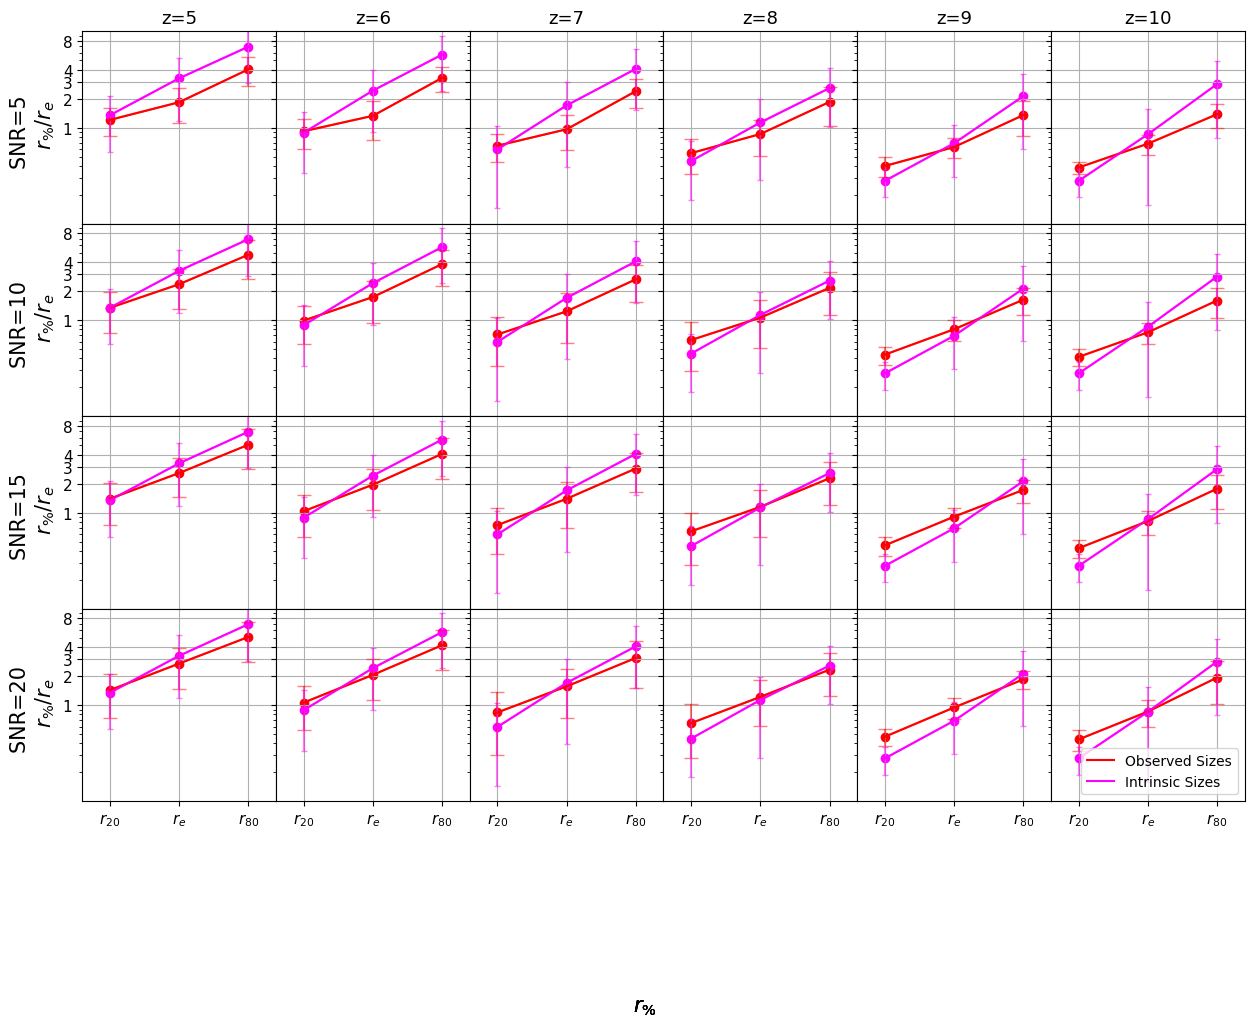

In [93]:
plt.rcParams.update({"font.size": 15})
# plt.tick_params(axis="y",direction="in")
# plt.tick_params(axis="x",direction="in")
# plt.rcParams['figure.figsize'] = [5, 5]

fig, ax = plt.subplots(4, 6, figsize=(15, 10), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)

imgdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/r20r80comp.csv")
r50stat = np.array(imgdf["HLR circ"])[:350]
r20stat = np.array(imgdf["r20_stat"])[:350]
r80stat = np.array(imgdf["r80_stat"])[:350]

r50ints = np.array(imgdf["r50_ints"])[:350]
r20ints = np.array(imgdf["r20_ints"])[:350]
r80ints = np.array(imgdf["r80_ints"])[:350]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a1,a)
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]


ax[1][0].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[1][0].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[1][0].scatter(c, a, color="red")
ax[1][0].plot(c, a, color="red", label="Observed Sizes")
ax[1][0].scatter(c, b, color="magenta")
ax[1][0].plot(c, b, color="magenta", label="Intrinsic Sizes")

ax[1][0].set_ylim(0, 3)
ax[1][0].set_xlim(0.6, 3.4)
ax[1][0].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[1][0].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161 + 70][-70:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161 + 70][-70:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161 + 70][-70:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161 + 70][-70:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161 + 70][-70:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161 + 70][-70:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a1,a)
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]

ax[1][2].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[1][2].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[1][2].scatter(c, a, color="red")
ax[1][2].plot(c, a, color="red", label="Observed Sizes")
ax[1][2].scatter(c, b, color="magenta")
ax[1][2].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[1].legend(loc="upper left",fontsize=10)
ax[1][2].set_ylim(0, 3)
ax[1][2].set_xlim(0.6, 3.4)
ax[1][2].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[1][2].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161][-161:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161][-161:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161][-161:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161][-161:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161][-161:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161][-161:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a1,a)
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]

ax[1][1].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[1][1].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[1][1].scatter(c, a, color="red")
ax[1][1].plot(c, a, color="red", label="Observed Sizes")
ax[1][1].scatter(c, b, color="magenta")
ax[1][1].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[1].legend(loc="upper left",fontsize=10)
ax[1][1].set_ylim(0, 3)
ax[1][1].set_xlim(0.6, 3.4)
ax[1][1].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[1][1].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161 + 70 + 30][-30:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161 + 70 + 30][-30:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161 + 70 + 30][-30:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161 + 70 + 30][-30:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161 + 70 + 30][-30:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161 + 70 + 30][-30:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]


ax[1][3].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[1][3].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[1][3].scatter(c, a, color="red")
ax[1][3].plot(c, a, color="red", label="Observed Sizes")
ax[1][3].scatter(c, b, color="magenta")
ax[1][3].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[1].legend(loc="upper left",fontsize=10)
ax[1][3].set_ylim(0, 3)
ax[1][3].set_xlim(0.6, 3.4)
ax[1][3].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[1][3].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161 + 70 + 41][-11:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161 + 70 + 41][-11:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161 + 70 + 41][-11:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161 + 70 + 41][-11:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161 + 70 + 41][-11:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161 + 70 + 41][-11:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a1,a)
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]

ax[1][4].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[1][4].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[1][4].scatter(c, a, color="red")
ax[1][4].plot(c, a, color="red", label="Observed Sizes")
ax[1][4].scatter(c, b, color="magenta")
ax[1][4].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[1].legend(loc="upper left",fontsize=10)
ax[1][4].set_ylim(0, 3)
ax[1][4].set_xlim(0.6, 3.4)
ax[1][4].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[1][4].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161 + 70 + 45][-4:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161 + 70 + 45][-4:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161 + 70 + 45][-4:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161 + 70 + 45][-4:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161 + 70 + 45][-4:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161 + 70 + 45][-4:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]


ax[1][5].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[1][5].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[1][5].scatter(c, a, color="red")
ax[1][5].plot(c, a, color="red", label="Observed Sizes")
ax[1][5].scatter(c, b, color="magenta")
ax[1][5].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[1].legend(loc="upper left",fontsize=10)
ax[1][5].set_ylim(0, 3)
ax[1][5].set_xlim(0.6, 3.4)
ax[1][5].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[1][5].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")

for i, x in enumerate(ax[1]):
    x.set_ylim(0.1, 10)
    x.set_yscale("log")
    x.set_yticks([1, 2, 3, 4, 8], [1, 2, 3, 4, 8], fontsize=11)
    x.set_xticks(c, ["$r_{20}$", "$r_{e}$", "$r_{80}$"], fontsize=11)

    x.grid()
# for i,x in enumerate(ax[0]):
# x.set_title("z="+str(i+5),fontsize=13)
# ax[1][5].legend(loc="lower right",fontsize=10)
fig.text(0.5, -0.1, "$r_{\%}$", ha="center")
ax[1][0].set_ylabel("$r_{\%}/r_e$")


imgdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/r20r80comp_sn5.csv")
r50stat = np.array(imgdf["HLR circ"])[:350]
r20stat = np.array(imgdf["r20_stat"])[:350]
r80stat = np.array(imgdf["r80_stat"])[:350]

r50ints = np.array(imgdf["r50_ints"])[:350]
r20ints = np.array(imgdf["r20_ints"])[:350]
r80ints = np.array(imgdf["r80_ints"])[:350]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]


ax[0][0].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[0][0].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[0][0].scatter(c, a, color="red")
ax[0][0].plot(c, a, color="red", label="Observed Sizes")
ax[0][0].scatter(c, b, color="magenta")
ax[0][0].plot(c, b, color="magenta", label="Intrinsic Sizes")

ax[0][0].set_ylim(0, 3)
ax[0][0].set_xlim(0.6, 3.4)
ax[0][0].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[0][0].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161 + 70][-70:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161 + 70][-70:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161 + 70][-70:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161 + 70][-70:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161 + 70][-70:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161 + 70][-70:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a2,a)


yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]

ax[0][2].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[0][2].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[0][2].scatter(c, a, color="red")
ax[0][2].plot(c, a, color="red", label="Observed Sizes")
ax[0][2].scatter(c, b, color="magenta")
ax[0][2].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[0].legend(loc="upper left",fontsize=10)
ax[0][2].set_ylim(0, 3)
ax[0][2].set_xlim(0.6, 3.4)
ax[0][2].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[0][2].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161][-161:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161][-161:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161][-161:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161][-161:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161][-161:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161][-161:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]


ax[0][1].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[0][1].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[0][1].scatter(c, a, color="red")
ax[0][1].plot(c, a, color="red", label="Observed Sizes")
ax[0][1].scatter(c, b, color="magenta")
ax[0][1].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[0].legend(loc="upper left",fontsize=10)
ax[0][1].set_ylim(0, 3)
ax[0][1].set_xlim(0.6, 3.4)
ax[0][1].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[0][1].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161 + 70 + 30][-30:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161 + 70 + 30][-30:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161 + 70 + 30][-30:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161 + 70 + 30][-30:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161 + 70 + 30][-30:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161 + 70 + 30][-30:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]


ax[0][3].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[0][3].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[0][3].scatter(c, a, color="red")
ax[0][3].plot(c, a, color="red", label="Observed Sizes")
ax[0][3].scatter(c, b, color="magenta")
ax[0][3].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[0].legend(loc="upper left",fontsize=10)
ax[0][3].set_ylim(0, 3)
ax[0][3].set_xlim(0.6, 3.4)
ax[0][3].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[0][3].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161 + 70 + 41][-11:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161 + 70 + 41][-11:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161 + 70 + 41][-11:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161 + 70 + 41][-11:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161 + 70 + 41][-11:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161 + 70 + 41][-11:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]


ax[0][4].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[0][4].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[0][4].scatter(c, a, color="red")
ax[0][4].plot(c, a, color="red", label="Observed Sizes")
ax[0][4].scatter(c, b, color="magenta")
ax[0][4].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[0].legend(loc="upper left",fontsize=10)
ax[0][4].set_ylim(0, 3)
ax[0][4].set_xlim(0.6, 3.4)
ax[0][4].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[0][4].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161 + 70 + 45][-4:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161 + 70 + 45][-4:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161 + 70 + 45][-4:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161 + 70 + 45][-4:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161 + 70 + 45][-4:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161 + 70 + 45][-4:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]


ax[0][5].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[0][5].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[0][5].scatter(c, a, color="red")
ax[0][5].plot(c, a, color="red", label="Observed Sizes")
ax[0][5].scatter(c, b, color="magenta")
ax[0][5].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[0].legend(loc="upper left",fontsize=10)
ax[0][5].set_ylim(0, 3)
ax[0][5].set_xlim(0.6, 3.4)
ax[0][5].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[0][5].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")

for i, x in enumerate(ax[0]):
    x.set_ylim(0.1, 10)
    x.set_yscale("log")
    x.set_yticks([1, 2, 3, 4, 8], [1, 2, 3, 4, 8], fontsize=11)
    x.set_xticks(c, ["$r_{20}$", "$r_{e}$", "$r_{80}$"], fontsize=11)

    x.grid()
for i, x in enumerate(ax[0]):
    x.set_title("z=" + str(i + 5), fontsize=13)
# ax[0][5].legend(loc="lower right",fontsize=10)
fig.text(0.5, -0.1, "$r_{\%}$", ha="center")
ax[0][0].set_ylabel("$r_{\%}/r_e$")


imgdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/r20r80comp_sn15.csv")
r50stat = np.array(imgdf["HLR circ"])[:350]
r20stat = np.array(imgdf["r20_stat"])[:350]
r80stat = np.array(imgdf["r80_stat"])[:350]

r50ints = np.array(imgdf["r50_ints"])[:350]
r20ints = np.array(imgdf["r20_ints"])[:350]
r80ints = np.array(imgdf["r80_ints"])[:350]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]


ax[2][0].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[2][0].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[2][0].scatter(c, a, color="red")
ax[2][0].plot(c, a, color="red", label="Observed Sizes")
ax[2][0].scatter(c, b, color="magenta")
ax[2][0].plot(c, b, color="magenta", label="Intrinsic Sizes")

ax[2][0].set_ylim(0, 3)
ax[2][0].set_xlim(0.6, 3.4)
ax[2][0].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[2][0].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161 + 70][-70:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161 + 70][-70:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161 + 70][-70:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161 + 70][-70:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161 + 70][-70:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161 + 70][-70:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]

ax[2][2].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[2][2].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[2][2].scatter(c, a, color="red")
ax[2][2].plot(c, a, color="red", label="Observed Sizes")
ax[2][2].scatter(c, b, color="magenta")
ax[2][2].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[2].legend(loc="upper left",fontsize=10)
ax[2][2].set_ylim(0, 3)
ax[2][2].set_xlim(0.6, 3.4)
ax[2][2].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[2][2].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161][-161:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161][-161:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161][-161:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161][-161:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161][-161:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161][-161:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]

ax[2][1].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[2][1].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[2][1].scatter(c, a, color="red")
ax[2][1].plot(c, a, color="red", label="Observed Sizes")
ax[2][1].scatter(c, b, color="magenta")
ax[2][1].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[2].legend(loc="upper left",fontsize=10)
ax[2][1].set_ylim(0, 3)
ax[2][1].set_xlim(0.6, 3.4)
ax[2][1].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[2][1].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161 + 70 + 30][-30:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161 + 70 + 30][-30:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161 + 70 + 30][-30:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161 + 70 + 30][-30:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161 + 70 + 30][-30:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161 + 70 + 30][-30:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]

ax[2][3].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[2][3].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[2][3].scatter(c, a, color="red")
ax[2][3].plot(c, a, color="red", label="Observed Sizes")
ax[2][3].scatter(c, b, color="magenta")
ax[2][3].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[2].legend(loc="upper left",fontsize=10)
ax[2][3].set_ylim(0, 3)
ax[2][3].set_xlim(0.6, 3.4)
ax[2][3].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[2][3].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161 + 70 + 41][-11:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161 + 70 + 41][-11:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161 + 70 + 41][-11:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161 + 70 + 41][-11:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161 + 70 + 41][-11:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161 + 70 + 41][-11:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]

ax[2][4].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[2][4].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[2][4].scatter(c, a, color="red")
ax[2][4].plot(c, a, color="red", label="Observed Sizes")
ax[2][4].scatter(c, b, color="magenta")
ax[2][4].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[2].legend(loc="upper left",fontsize=10)
ax[2][4].set_ylim(0, 3)
ax[2][4].set_xlim(0.6, 3.4)
ax[2][4].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[2][4].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161 + 70 + 45][-4:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161 + 70 + 45][-4:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161 + 70 + 45][-4:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161 + 70 + 45][-4:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161 + 70 + 45][-4:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161 + 70 + 45][-4:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]


ax[2][5].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[2][5].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[2][5].scatter(c, a, color="red")
ax[2][5].plot(c, a, color="red", label="Observed Sizes")
ax[2][5].scatter(c, b, color="magenta")
ax[2][5].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[2].legend(loc="upper left",fontsize=10)
ax[2][5].set_ylim(0, 3)
ax[2][5].set_xlim(0.6, 3.4)
ax[2][5].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[2][5].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")

for i, x in enumerate(ax[2]):
    x.set_ylim(0.1, 10)
    x.set_yscale("log")
    x.set_yticks([1, 2, 3, 4, 8], [1, 2, 3, 4, 8], fontsize=11)
    x.set_xticks(c, ["$r_{20}$", "$r_{e}$", "$r_{80}$"], fontsize=11)

    x.grid()
# for i,x in enumerate(ax[2]):
# x.set_title("z="+str(i+5),fontsize=13)
# ax[2][5].legend(loc="lower right",fontsize=10)
fig.text(0.5, -0.1, "$r_{\%}$", ha="center")
ax[2][0].set_ylabel("$r_{\%}/r_e$")


imgdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/r20r80comp_sn20.csv")
r50stat = np.array(imgdf["HLR circ"])[:350]
r20stat = np.array(imgdf["r20_stat"])[:350]
r80stat = np.array(imgdf["r80_stat"])[:350]

r50ints = np.array(imgdf["r50_ints"])[:350]
r20ints = np.array(imgdf["r20_ints"])[:350]
r80ints = np.array(imgdf["r80_ints"])[:350]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]


ax[3][0].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[3][0].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[3][0].scatter(c, a, color="red")
ax[3][0].plot(c, a, color="red", label="Observed Sizes")
ax[3][0].scatter(c, b, color="magenta")
ax[3][0].plot(c, b, color="magenta", label="Intrinsic Sizes")

ax[3][0].set_ylim(0, 3)
ax[3][0].set_xlim(0.6, 3.4)
ax[3][0].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[3][0].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161 + 70][-70:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161 + 70][-70:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161 + 70][-70:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161 + 70][-70:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161 + 70][-70:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161 + 70][-70:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]


ax[3][2].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[3][2].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[3][2].scatter(c, a, color="red")
ax[3][2].plot(c, a, color="red", label="Observed Sizes")
ax[3][2].scatter(c, b, color="magenta")
ax[3][2].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[3].legend(loc="upper left",fontsize=10)
ax[3][2].set_ylim(0, 3)
ax[3][2].set_xlim(0.6, 3.4)
ax[3][2].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[3][2].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161][-161:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161][-161:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161][-161:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161][-161:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161][-161:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161][-161:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]


ax[3][1].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[3][1].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[3][1].scatter(c, a, color="red")
ax[3][1].plot(c, a, color="red", label="Observed Sizes")
ax[3][1].scatter(c, b, color="magenta")
ax[3][1].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[3].legend(loc="upper left",fontsize=10)
ax[3][1].set_ylim(0, 3)
ax[3][1].set_xlim(0.6, 3.4)
ax[3][1].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[3][1].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161 + 70 + 30][-30:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161 + 70 + 30][-30:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161 + 70 + 30][-30:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161 + 70 + 30][-30:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161 + 70 + 30][-30:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161 + 70 + 30][-30:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]


ax[3][3].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[3][3].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[3][3].scatter(c, a, color="red")
ax[3][3].plot(c, a, color="red", label="Observed Sizes")
ax[3][3].scatter(c, b, color="magenta")
ax[3][3].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[3].legend(loc="upper left",fontsize=10)
ax[3][3].set_ylim(0, 3)
ax[3][3].set_xlim(0.6, 3.4)
ax[3][3].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[3][3].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161 + 70 + 41][-11:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161 + 70 + 41][-11:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161 + 70 + 41][-11:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161 + 70 + 41][-11:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161 + 70 + 41][-11:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161 + 70 + 41][-11:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]

ax[3][4].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[3][4].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[3][4].scatter(c, a, color="red")
ax[3][4].plot(c, a, color="red", label="Observed Sizes")
ax[3][4].scatter(c, b, color="magenta")
ax[3][4].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[3].legend(loc="upper left",fontsize=10)
ax[3][4].set_ylim(0, 3)
ax[3][4].set_xlim(0.6, 3.4)
ax[3][4].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[3][4].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")


r50stat = np.array(imgdf["HLR circ"])[: 350 + 161 + 70 + 45][-4:]
r20stat = np.array(imgdf["r20_stat"])[: 350 + 161 + 70 + 45][-4:]
r80stat = np.array(imgdf["r80_stat"])[: 350 + 161 + 70 + 45][-4:]

r50ints = np.array(imgdf["r50_ints"])[: 350 + 161 + 70 + 45][-4:]
r20ints = np.array(imgdf["r20_ints"])[: 350 + 161 + 70 + 45][-4:]
r80ints = np.array(imgdf["r80_ints"])[: 350 + 161 + 70 + 45][-4:]


r20s_n = [x / 1 for i, x in enumerate(r20stat)]
r80s_n = [x / 1 for i, x in enumerate(r80stat)]

r20i_n = [x / 1 for i, x in enumerate(r20ints)]
r80i_n = [x / 1 for i, x in enumerate(r80ints)]


a = [np.mean(r20s_n), np.mean(r50stat), np.mean(r80s_n)]
a1 = [np.percentile(r20s_n, 16), 1, np.percentile(r80s_n, 16)]
a2 = [np.percentile(r20s_n, 84), 1, np.percentile(r80s_n, 84)]
b = [np.mean(r20i_n), np.mean(r50ints), np.mean(r80i_n)]
b1 = [np.percentile(r20i_n, 16), 1, np.percentile(r80i_n, 16)]
b2 = [np.percentile(r20i_n, 84), 1, np.percentile(r80i_n, 84)]
c = [1, 2, 3]
a1 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
a2 = [np.std(r20s_n), np.std(r50stat), np.std(r80s_n)]
b1 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
b2 = [np.std(r20i_n), np.std(r50ints), np.std(r80i_n)]
# print(a2,a)

yep = [a2[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b2[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]

ax[3][5].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[3][5].errorbar(c, b, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[3][5].scatter(c, a, color="red")
ax[3][5].plot(c, a, color="red", label="Observed Sizes")
ax[3][5].scatter(c, b, color="magenta")
ax[3][5].plot(c, b, color="magenta", label="Intrinsic Sizes")
# ax[3].legend(loc="upper left",fontsize=10)
ax[3][5].set_ylim(0, 3)
ax[3][5].set_xlim(0.6, 3.4)
ax[3][5].set_xticks(
    c, ["$r_{20}/r_{e}$", "$r_{e}/r_{e}$", "$r_{80}/r_{e}$"], fontsize=11
)
ax[3][5].set_yticks([1, 2, 3], [1, 2, 3], fontsize=11)
# ax.set_yticks(fontsize=11)
# ax.set_xticks(fontsize=11)
# plt.yscale("log")

for i, x in enumerate(ax[3]):
    x.set_ylim(0.1, 10)
    x.set_yscale("log")
    x.set_yticks([1, 2, 3, 4, 8], [1, 2, 3, 4, 8], fontsize=11)
    x.set_xticks(c, ["$r_{20}$", "$r_{e}$", "$r_{80}$"], fontsize=11)

    x.grid()
# for i,x in enumerate(ax[3]):
# x.set_title("z="+str(i+5),fontsize=13)
ax[3][5].legend(loc="lower right", fontsize=10)
fig.text(0.5, -0.1, "$r_{\%}$", ha="center")
ax[3][0].set_ylabel("SNR=20 \n $r_{\%}/r_e$")
ax[2][0].set_ylabel("SNR=15 \n $r_{\%}/r_e$")
ax[1][0].set_ylabel("SNR=10 \n $r_{\%}/r_e$")
ax[0][0].set_ylabel("SNR=5 \n $r_{\%}/r_e$")

In [21]:
imgdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/r20r80comp_sn20.csv")
r50stat = np.array(imgdf["HLR circ"])[-170:]


r50ints = np.array(imgdf["r50_ints"])[-170:]

names = np.array(imgdf["ID"])[-170:]
r20ints = np.array(imgdf["r20_ints"])[-170:]
r80ints = np.array(imgdf["r80_ints"])[-170:]

r20stat = np.array(imgdf["r20_stat"])[-170:]
r80stat = np.array(imgdf["r80_stat"])[-170:]

ratio = [r50stat[i] / x for i, x in enumerate(r50ints)]


overr20 = []
overr80 = []
overr50 = []
underr20 = []
underr80 = []
underr50 = []

overr20s = []
overr80s = []
overr50s = []
underr20s = []
underr80s = []
underr50s = []

count = 0
for i, x in enumerate(ratio):
    if x >= 1.5:
        print(names[i], r50stat[i], r50ints[i], x)
        overr20.append(r20ints[i])
        overr80.append(r80ints[i])
        overr50.append(r50ints[i])
        overr20s.append(r20stat[i])
        overr80s.append(r80stat[i])
        overr50s.append(r50stat[i])
        count += 1

print("Count: ", count)


imgdf = pd.read_csv("C:/Users/pauru/Documents/SKIRT/run/r20r80comp_sn5.csv")
r50stat = np.array(imgdf["HLR circ"])[: 3844 + 1772]


r50ints = np.array(imgdf["r50_ints"])[: 3844 + 1772]

names = np.array(imgdf["ID"])[: 3844 + 1772]
r20ints = np.array(imgdf["r20_ints"])[: 3844 + 1772]
r80ints = np.array(imgdf["r80_ints"])[: 3844 + 1772]

r20stat = np.array(imgdf["r20_stat"])[: 3844 + 1772]
r80stat = np.array(imgdf["r80_stat"])[: 3844 + 1772]

ratio = [r50stat[i] / x for i, x in enumerate(r50ints)]


# count=0
for i, x in enumerate(ratio):
    if x <= 0.75:
        underr20.append(r20ints[i])
        underr80.append(r80ints[i])
        underr50.append(r50ints[i])
        underr20s.append(r20stat[i])
        underr80s.append(r80stat[i])
        underr50s.append(r50stat[i])

overr20s = [x / overr50s[i] for i, x in enumerate(overr20s)]
overr50s = [x / overr50s[i] for i, x in enumerate(overr50s)]
overr80s = [x / overr50s[i] for i, x in enumerate(overr80s)]

overr20 = [x / overr50[i] for i, x in enumerate(overr20)]
overr50 = [x / overr50[i] for i, x in enumerate(overr50)]
overr80 = [x / overr50[i] for i, x in enumerate(overr80)]


underr20s = [x / underr50s[i] for i, x in enumerate(underr20s)]
underr50s = [x / underr50s[i] for i, x in enumerate(underr50s)]
underr80s = [x / underr50s[i] for i, x in enumerate(underr80s)]

underr20 = [x / underr50[i] for i, x in enumerate(underr20)]
underr50 = [x / underr50[i] for i, x in enumerate(underr50)]
underr80 = [x / underr50[i] for i, x in enumerate(underr80)]

z_9/flares_17/gal_002 0.6805478181178416 0.3947050393492708 1.7241933856223994
z_9/flares_16/gal_000 0.5233228952523303 0.2373579777026268 2.2047832574137187
z_9/flares_10/gal_004 0.6084298167948833 0.3733463005813814 1.6296661192234279
z_9/flares_10/gal_002 0.9061898771938574 0.5948003080701411 1.5235195155396524
z_9/flares_12/gal_001 0.5668540913605453 0.1477224455382803 3.837291545607757
z_9/flares_12/gal_000 0.7120329315317837 0.4133614042032469 1.7225433344562622
z_9/flares_04/gal_005 0.7825130719078143 0.5129609896435489 1.5254826150650838
z_9/flares_04/gal_004 0.6807233987495855 0.418692938909965 1.6258296605665163
z_9/flares_04/gal_002 0.4488317840451368 0.1776586741391557 2.5263713478666276
z_9/flares_04/gal_000 0.4441299528346218 0.1211838851241149 3.6649258470278445
z_9/flares_03/gal_005 0.6191122263700315 0.34937107949028 1.772076347227407
z_9/flares_03/gal_004 0.9585222880035006 0.6225400964030944 1.5396956654545475
z_9/flares_03/gal_006 0.8867904846292666 0.56240963906617

<>:67: SyntaxWarning: invalid escape sequence '\%'
<>:68: SyntaxWarning: invalid escape sequence '\%'
<>:67: SyntaxWarning: invalid escape sequence '\%'
<>:68: SyntaxWarning: invalid escape sequence '\%'
C:\Users\pauru\AppData\Local\Temp\ipykernel_57644\1569269968.py:67: SyntaxWarning: invalid escape sequence '\%'
  ax[0].set_ylabel("$r_{\%}/r_e$")
C:\Users\pauru\AppData\Local\Temp\ipykernel_57644\1569269968.py:68: SyntaxWarning: invalid escape sequence '\%'
  fig.text(0.5, -0.1, "$r_{\%}$", ha='center')


Text(0.5, -0.1, '$r_{\\%}$')

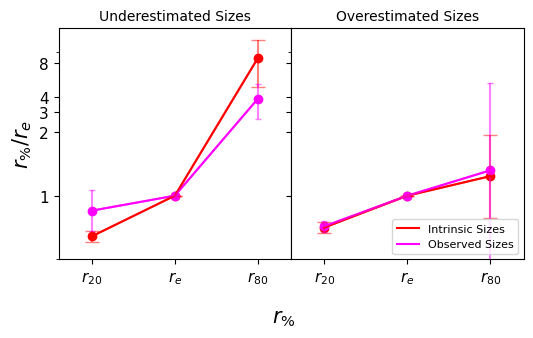

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)

a = [np.mean(overr20), np.mean(overr50), np.mean(overr80)]
a1 = [np.std(overr20), np.std(overr50), np.std(overr80)]
b = [np.mean(underr20), np.mean(underr50), np.mean(underr80)]
b1 = [np.std(underr20), np.std(underr50), np.std(underr80)]
c = [1, 2, 3]

ast = [np.mean(overr20s), np.mean(overr50s), np.mean(overr80s)]
a1st = [np.std(overr20s), np.std(overr50s), np.std(overr80s)]
bst = [np.mean(underr20s), np.mean(underr50s), np.mean(underr80s)]
b1st = [np.std(underr20s), np.std(underr50s), np.std(underr80s)]
c = [1, 2, 3]

yep = [a1[i] for i, sand in enumerate(a)]
# print(yep)
yen = [a1[i] for i, sand in enumerate(a)]
# print(yen)
ye = [yen, yep]

xep = [b1[i] for i, sand in enumerate(b)]
xen = [b1[i] for i, sand in enumerate(b)]
xe = [xen, xep]


yepst = [a1st[i] for i, sand in enumerate(ast)]
# print(yep)
yenst = [a1st[i] for i, sand in enumerate(ast)]
# print(yen)
yest = [yenst, yepst]

xepst = [b1st[i] for i, sand in enumerate(bst)]
xenst = [b1st[i] for i, sand in enumerate(bst)]
xest = [xenst, xepst]

ax[1].errorbar(c, a, yerr=ye, color="red", capsize=5, alpha=0.5)
ax[1].errorbar(c, ast, yerr=xe, color="magenta", capsize=2, alpha=0.5)

ax[0].errorbar(c, b, yerr=xe, color="red", capsize=5, alpha=0.5)
ax[0].errorbar(c, bst, yerr=xest, color="magenta", capsize=2, alpha=0.5)

ax[1].scatter(c, a, color="red")
ax[1].plot(c, a, color="red", label="Intrinsic Sizes")
ax[1].scatter(c, ast, color="magenta")
ax[1].plot(c, ast, color="magenta", label="Observed Sizes")


ax[0].scatter(c, b, color="red")
ax[0].plot(c, bst, color="magenta", label="Observed Sizes")
ax[0].scatter(c, bst, color="magenta")
ax[0].plot(c, b, color="red", label="Intrinsic Sizes")

for x in ax:
    x.set_ylim(0, 16)
    x.set_xlim(0.6, 3.4)
    x.set_yscale("symlog")
    x.set_yticks([1, 2, 3, 4, 8], [1, 2, 3, 4, 8], fontsize=11)
    x.set_xticks(c, ["$r_{20}$", "$r_{e}$", "$r_{80}$"], fontsize=11)
    # x.grid()

ax[1].legend(loc="lower right", fontsize=8)
ax[0].set_title("Underestimated Sizes", fontsize=10)
ax[1].set_title("Overestimated Sizes", fontsize=10)
ax[0].set_ylabel("$r_{\%}/r_e$")
fig.text(0.5, -0.1, "$r_{\%}$", ha="center")

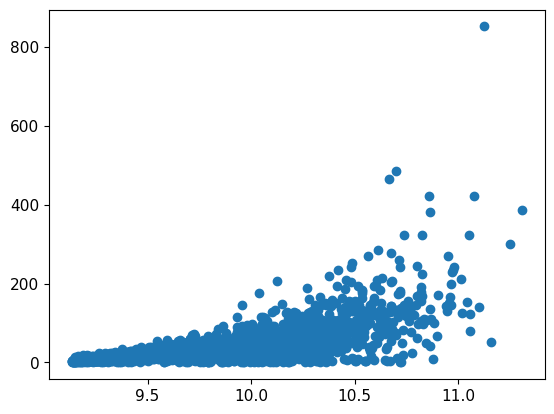

In [20]:
# print(z_5)
sm = numpy.array(z_5["Stellar Mass"])
sm = [x * 1e10 for x in sm]
sfr = numpy.array(z_5["Star Formation Rate"])
plt.scatter(numpy.log10(sm), sfr)